In [1]:
import json
import pandas as pd
import json


In [2]:
from sklearn.pipeline import FeatureUnion
from sklearn_pandas import DataFrameMapper

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# splitting data set into train/test
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from nltk.stem import WordNetLemmatizer 

In [4]:
json_file=r"C:\Users\Lora\Desktop\TxMM\Project\news-category-dataset\News_Category_Dataset_v2.json"

## investigate data 
data = []
for line in open(json_file,'r'):
    data.append(json.loads(line))
    
# Creates DataFrame. 
df_headline = pd.DataFrame(data) 
df_short_desc = pd.DataFrame(data)

# Dropping unnecessary categories from both data frames
df_headline = df_headline.drop(['date','authors','link','short_description'], axis=1)
df_short_desc = df_short_desc.drop(['date','authors','link','headline'], axis=1)

# Grouping similar categories in data frame for headline 
df_headline.loc[df_headline['category'] == 'COLLEGE', 'category'] = 'EDUCATION'
df_headline.loc[df_headline['category'] == 'CULTURE & ARTS', 'category'] = 'ARTS'
df_headline.loc[df_headline['category'] == 'ARTS & CULTURE', 'category'] = 'ARTS'
df_headline.loc[df_headline['category'] == 'THE WORLDPOST', 'category'] = 'WORLDPOST'
df_headline.loc[df_headline['category'] == 'WORLD NEWS', 'category'] = 'WORLDPOST'
df_headline.loc[df_headline['category'] == 'GREEN', 'category'] = 'ENVIRONMENT'
df_headline.loc[df_headline['category'] == 'PARENTING', 'category'] = 'PARENTS'
df_headline.loc[df_headline['category'] == 'STYLE & BEAUTY', 'category'] = 'STYLE'


# Dropping categories with two little samples for headline 
df_headline=df_headline.drop(df_headline[df_headline.category == 'FIFTY'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'GOOD NEWS'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'LATINO VOICES'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'MONEY'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'WEIRD NEWS'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'TASTE'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'TECH'].index)

# Grouping similar categories in data frame for short desc 
df_short_desc.loc[df_short_desc['category'] == 'COLLEGE', 'category'] = 'EDUCATION'
df_short_desc.loc[df_short_desc['category'] == 'CULTURE & ARTS', 'category'] = 'ARTS'
df_short_desc.loc[df_short_desc['category'] == 'ARTS & CULTURE', 'category'] = 'ARTS'
df_short_desc.loc[df_short_desc['category'] == 'THE WORLDPOST', 'category'] = 'WORLDPOST'
df_short_desc.loc[df_short_desc['category'] == 'WORLD NEWS', 'category'] = 'WORLDPOST'
df_short_desc.loc[df_short_desc['category'] == 'GREEN', 'category'] = 'ENVIRONMENT'
df_short_desc.loc[df_short_desc['category'] == 'PARENTING', 'category'] = 'PARENTS'
df_short_desc.loc[df_short_desc['category'] == 'STYLE & BEAUTY', 'category'] = 'STYLE'

# Dropping categories with two little samples for short desc  
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'FIFTY'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'GOOD NEWS'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'LATINO VOICES'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'MONEY'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'WEIRD NEWS'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'TASTE'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'TECH'].index)

# reseting index for both tables
df_headline=df_headline.reset_index(drop=True)
df_short_desc=df_short_desc.reset_index(drop=True)

# checking categories
df_headline.groupby('category').count()
df_short_desc.groupby('category').count()


,short_description
category,
ARTS,3878
BLACK VOICES,4528
BUSINESS,5937
COMEDY,5175
CRIME,3405
DIVORCE,3426
EDUCATION,2148
ENTERTAINMENT,16058
ENVIRONMENT,3945


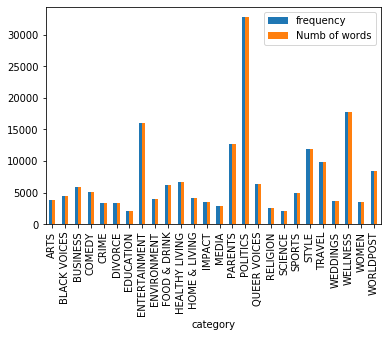

In [6]:
## plotting - same graph is for the headline and for short_desc
## initial 
import matplotlib.pyplot as plt
counts = df_headline.groupby('category').count()
counts = counts.rename(columns={"category": "category", "headline": "frequency"})
counts.plot(kind='bar')

In [5]:
# now checking for average lenght of headlines, and short descriptions, and variance
# if variance is to big then will ignore short/too long samples to reduce variance 
import pylab as pl
# get number of words per headline
df_headline['Numb of words'] = df_headline['headline'].str.count(' ')
average_length_head = df_headline.loc[:,"Numb of words"].mean()
st_dev_head = df_headline.loc[:,"Numb of words"].std()

# plotting average number of words per category in headlines
df_numb_of_word = df_headline.drop(columns="headline")
df_numb_of_word= df_numb_of_word.groupby('category').mean()
df_numb_of_word = df_numb_of_word.rename(columns={"category": "category", "Numb of words": "Average number of words"})
df_numb_of_word.plot(kind='bar')
pl.suptitle("Average number of words per category for headlines")

Text(0.5, 0.98, 'Average number of words per category for headlines')

Text(0.5, 0.98, 'Average number of words per category for short description')

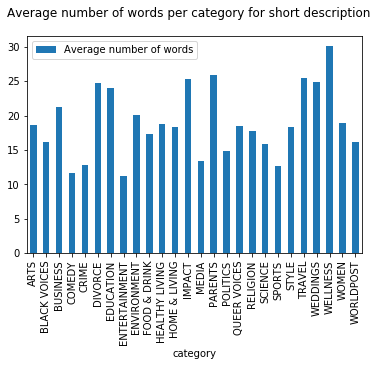

In [5]:
# get number of words per short description
df_short_desc['Numb of words'] = df_short_desc['short_description'].str.count(' ')
average_length_shd = df_short_desc.loc[:,"Numb of words"].mean()
st_dev_shd = df_short_desc.loc[:,"Numb of words"].std()

# plotting average number of words per category in headlines
df_numb_of_word_sh = df_short_desc.drop(columns="short_description")
df_numb_of_word_sh= df_numb_of_word_sh.groupby('category').mean()
df_numb_of_word_sh = df_numb_of_word_sh.rename(columns={"category": "category", "Numb of words": "Average number of words"})
df_numb_of_word_sh.plot(kind='bar')
pl.suptitle("Average number of words per category for short description")

In [7]:
df_short_desc['Numb of words'] = df_short_desc['short_description'].str.count(' ')

In [8]:
import string

#cleaning headlines and short descriptions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

import re 
# removing numbers from string   
def remove(tt): 
    pattern = '[0-9]'
    a = re.sub(pattern, '',tt) 
    return a

def remove_stopwords(text):
    help_list=[]
    stop_words = set(stopwords.words('english'))
    for item in text.split(' '):
        if item not in stop_words:
            help_list.append(item)
    a = ' '.join(help_list)
    return a


def lemm(str):
    x=str.split(' ')
    r=[]
    for word in x: 
        r.append(lemmatizer.lemmatize(word))
    return ' '.join(r)



## cleaning headline df
#lower case
df_headline['headline'] = df_headline['headline'].str.lower()
# removing punct 
df_headline['headline'] = df_headline['headline'].apply(remove_punctuations)
# removing numbers
df_headline['headline'] = df_headline['headline'].apply(remove)
# lemmatization
df_headline['headline'] = df_headline['headline'].apply(lemm)
# removing stop words performed automatically 

## cleaning short description df

#lower case
df_short_desc['short_description'] = df_short_desc['short_description'].str.lower()
# removing punct 
df_short_desc['short_description'] = df_short_desc['short_description'].apply(remove_punctuations)
# removing numbers
df_short_desc['short_description'] = df_short_desc['short_description'].apply(remove)
# removing stop words performed automatically 
# removing empty rows where description not available
df_short_desc['short_description'].replace('', np.nan, inplace=True)
df_short_desc.dropna(subset=['short_description'], inplace=True)
df_short_desc = df_short_desc.reset_index(drop=True)
# resulted with 170098 rows × 2 columns
#lemmatization
df_short_desc['short_description'] = df_short_desc['short_description'].apply(lemm)


# this part is not performed when automatically extracting features

#tokenize each word
#train_x_df['tokenized'] = train_x_df['no_pun'].apply(nltk.word_tokenize)
#removing stop words
#train_x_df['cleaning']=train_x_df['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])
#removing empty strings 
#train_x_df['clean']=train_x_df['cleaning'].apply(lambda x: [item for item in x if item != '']) 


In [11]:
### trial of unigram - bigram - trigram , not that good for headlines 



#df_headline.drop(columns=['Numb of words'])
# associate category names with index and save into new column 
df_headline['category_id'] = df_headline['category'].factorize()[0]
df_headline
category_id_df = df_headline[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
id_to_category

df_headline.sample(5, random_state=0)
#df_headline=df_headline.drop(columns=['Numb of words'])

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_features=5000)
features = tfidf.fit_transform(df_headline['headline']).toarray()
labels = df_headline.category_id  
category_to_id.items()

#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(2, 3), stop_words='english',max_features=5000)
#features = tfidf.fit_transform(df_headline['headline']).toarray()
#labels = df_headline.category_id  
#category_to_id.items()


#
## Chi-square analysis 
#from sklearn.feature_selection import chi2
#N = 3
#for Category, category_id in sorted(category_to_id.items()):
#    features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
#    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
#    feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
#    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
#    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
#    print("# '{}':".format(Category))
#    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
#    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
#    
#    
#### some 3-grams repeat all over categories 



models = [
    svm.SVC(kernel='linear',max_iter=2000),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=2000),
]

# Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )
#Each model will be run 5 times with different test sets of 20%
CV=5
#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty
#For each algorithm 
# Store the entries into the results dataframe and name its columns
for model in models:
    model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()
cv_df

# We will try 3 different classification models on the data
# Each model will be run 5 times with different test sets of 20%


########
# tried to include SMOTE for over sampling
headlines

MemoryError: 

In [6]:
from sklearn.feature_selection import chi2

In [13]:
## using ngram,bigrams, threegrams for short desc 


import scipy as sp
#df_short_desc = df_short_desc.head(10000)
# associate category names with index and save into new column 
df_short_desc['category_id'] = df_short_desc['category'].factorize()[0]

category_id_df = df_short_desc[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
id_to_category

df_short_desc.sample(5, random_state=0)


#####################################################################################################################
#valid_x=pd.DataFrame(valid_x)
#valid_x['char_count'] = valid_x['short_description'].apply(len)
#valid_x['word_count'] = valid_x['short_description'].apply(lambda x: len(x.split()))
#valid_x['word_density'] = valid_x['char_count'] / (valid_x['word_count']+1)
#
#sc = StandardScaler(with_mean=False)
#features_count=sc.fit_transform(train_x['word_density'].values.reshape(-1, 1))
#####################################################################################################################



tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_features=5000)
#vectorizer = CountVectorizer( min_df=5,  encoding='latin-1', stop_words='english',max_features=5000)
#union = FeatureUnion([('tf',tfidf),
                     #('c',vectorizer)])
#features = union.fit_transform(df_short_desc['short_description'])
features= tfidf.fit_transform(df_short_desc['short_description']).toarray()
labels = df_short_desc.category_id  
category_to_id.items()

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    svm.LinearSVC(max_iter=2000),
    MultinomialNB(alpha=0.01),
    LogisticRegression(random_state=0,max_iter=2000),
]

# Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )
#Each model will be run 5 times with different test sets of 20%
CV=5
#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty
#For each algorithm 
# Store the entries into the results dataframe and name its columns
for model in models:
    model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()
cv_df

ValueError: Found input variables with inconsistent numbers of samples: [100, 170098]

In [7]:
import scipy as sp
#df_short_desc = df_short_desc.head(10000)
# associate category names with index and save into new column 
df_short_desc['category_id'] = df_short_desc['category'].factorize()[0]

category_id_df = df_short_desc[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
id_to_category

{0: 'CRIME',
 1: 'ENTERTAINMENT',
 2: 'WORLDPOST',
 3: 'IMPACT',
 4: 'POLITICS',
 5: 'BLACK VOICES',
 6: 'WOMEN',
 7: 'COMEDY',
 8: 'QUEER VOICES',
 9: 'SPORTS',
 10: 'BUSINESS',
 11: 'TRAVEL',
 12: 'MEDIA',
 13: 'RELIGION',
 14: 'SCIENCE',
 15: 'EDUCATION',
 16: 'PARENTS',
 17: 'ARTS',
 18: 'STYLE',
 19: 'ENVIRONMENT',
 20: 'HEALTHY LIVING',
 21: 'WELLNESS',
 22: 'HOME & LIVING',
 23: 'DIVORCE',
 24: 'WEDDINGS',
 25: 'FOOD & DRINK'}

In [8]:

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_features=5000)
features= tfidf.fit_transform(df_short_desc['short_description'])
labels = df_short_desc.category_id  
category_to_id.items()

N = 3
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = np.array(features)[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
    print("# '{}':".format(Category))
    for v in feature_names[-N:4] :
        unigrams = [v for v in feature_names if len(v.split(' ')) == 2]         # List of single word features ( in increasing order of chi-squared stat values)
        bigrams = [v for v in feature_names if len(v.split(' ')) == 3]          # List for two-word features ( in increasing order of chi-squared stat values)
        print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
        print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared state
 


IndexError: too many indices for array

In [44]:
N = 3
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = features[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
    print("# '{}':".format(Category))
    for v in feature_names[-N:4] :
        unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
        bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
        print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
        print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared state
 

# 'ARTS':
# 'BLACK VOICES':


KeyboardInterrupt: 

In [8]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.467419
LogisticRegression    0.474885
MultinomialNB         0.444685
Name: accuracy, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight 


#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_short_desc.index, test_size=0.33, random_state=0)
class_weight = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
#model = LogisticRegression(random_state=0,max_iter=2000,class_weight='balanced')
model= svm.LinearSVC(max_iter=2000)
#Train Algorithm
model.fit(X_train, y_train)



AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [20]:
# Make Predictions
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

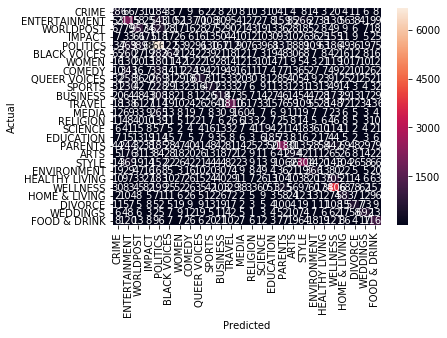

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [22]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df_headline.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['headline'])
      print('')

'ENTERTAINMENT' predicted as 'CRIME' : 53 examples.


162773    timothy geithner u absolutely should get rid o...
22633     religious freedom and lgbtq right move from ba...
23690                        everyone love alternative fact
7408      filmmaker paul haggis exwife defends him again...
36910     mexico make a ‘risky’ lastditch attempt to sav...
62535     house conservative claim democrat have failed ...
122520    madonna to perform same love alongside macklem...
20769     month of trumprussia story have changed few mi...
8316      female comedian from last comic standing sued ...
1674      ‘lethal weapon’ reportedly considering recasti...
3518      barbra streisand suggests nose is why she hasn...
78346     woman explains why she falsely accused her dad...
36533     i dont know whether dylann roof deserves to di...
65642     obamas oily christmas gift faster pipeline app...
89020     crazy cheap deal fly to  country in  day for j...
3111      prince died of an ‘exceedingly high’ amount of...
1665      massage therapist sue marvel c


'WORLDPOST' predicted as 'CRIME' : 67 examples.


53935    glenn beck suspended from siriusxm radio over ...
47551                                        demand demand
48101      the olympics more relevant now than ever before
53858            unequal right abortion and gun in america
64118        wapo bombshell marco rubio wa a teenager once
32164                no my csection wa not the easy option
45210    this gay man is fighting for lgbt right in the...
21413         tower of human skull cast new light on aztec
50243    trump plan to steal the spotlight back with ca...
51815    jamie lynn spear found out she wa pregnant in ...
10890    at least  killed during food aid stampede in m...
96675    an open letter to my sister about my sexual as...
68358    total dick from future black friday show off n...
42398         way to create experience that customer crave
57107    exnew orleans cop plead guilty in postkatrina ...
93304    julianne hough and vanessa hudgens are coming ...
20224    dear celebrity stop running for office you don.


'IMPACT' predicted as 'CRIME' : 7 examples.


16342                language progress for better and worse
93655     ohhhh beyoncé is an alien now everything make ...
158488    the state that recovered most and least from t...
69368      mass grave of yazidis unearthed near iraq sinjar
64881     another college take back bill cosby honorary ...
123742    artist transforms the city of chicago into a g...
110078    unlocking big data value potential through des...
Name: headline, dtype: object


'POLITICS' predicted as 'CRIME' : 137 examples.


89366                           is early reading a problem
27731    new york city might force uber to allow inapp ...
65634           learning to live outside your comfort zone
35559                  cloudy with chance of golden shower
345      jimmy kimmel shred cowardly trump lawmaker aft...
63992     time leo and kate made the golden globe compl...
76818    a tiny hamster visit disney world ha the tinie...
49922    samantha bee teach republican to look happy wh...
64144    no parole for kkk leader who killed black teen...
8227     barack obama share his favorite book and song ...
51045    the empowering reason this news anchor’s bikin...
46395    conspiracy theorist alex jones boast about adv...
77420    camille cosby’s loyalty confounds a new genera...
1796      billboard call out how much money politician ...
44409    alabama chief justice stand trial for blocking...
80137    child are being housed in adult prison across ...
69046    paul ryan there will be no religious test for .


'BLACK VOICES' predicted as 'CRIME' : 65 examples.


52118     gopled house ignores dems sitin approves  bill...
25453     president trump at the americanarabislamic summit
4258      white attacker allegedly tell black man i can ...
50106     obama biden endorse kamala harris in californi...
25129      did begin revolution sour american jew on israel
26357      generation star discus the power of telling t...
59906     donald trump pick up  delegate in northern mar...
122420                the  best linkedin nextlevel strategy
40725     climate scientist are very worried about a tru...
16674     weekend roundup sliding toward a wwi scenario ...
2007      new stephon clark video show officer waited  m...
66975     these star war infomercial are the deal youve ...
67627     campus ministry to gop lawmaker please calm do...
142033            time is ticking for obamas climate agenda
94058     how fear of terrorism may put you at risk of l...
63180      why peyton manning badly need to win super bowl 
66417     rand paul air his grievance ab


'WOMEN' predicted as 'CRIME' : 16 examples.


52030    issa raes insecure teaser trailer finally drop...
8586     ceo suspended after  former miss america call ...
43989    investigation underway for fatal lapd shooting...
10039    brock turner former stanford swimmer convicted...
5680     teen set to testify against man she accused of...
11210                            metoo and legitimate rape
1559     larry nassar’s bos accused of assaulting stude...
7924     woman say man sexually assaulted her while she...
26320    trump administration hire official accused of ...
1576     bill cosbys accuser may this verdict open the ...
45954    syrian family suffering from meningitis evacua...
48345    kfc urged to stop routine use of antibiotic on...
17682    please take side this is no time for silence o...
3185     evangelical pastor claim traditional gender ro...
2196     viola davis on the lifelong impact sexual viol...
66059    obama encourages staff to stay on offense in f...
Name: headline, dtype: object


'COMEDY' predicted as 'CRIME' : 10 examples.


152471    frank ocean sued grammywinning singer sued ove...
5950      viral video of golden retriever gingerly holdi...
87624                       dear educator your voice matter
355       michelle wolf netflix trailer give u a closer ...
33764     from atop the government trump take care of fr...
35736     stevie wonder say farewell to michelle obama w...
72801     marco rubio criticizes his party for holding s...
12435     storm barrel toward northeast on year sandy an...
87633     a homosexual survival guide to hookup apps for...
144107        thing that will pronounce a relationship dead
Name: headline, dtype: object


'QUEER VOICES' predicted as 'CRIME' : 32 examples.


26132     neil degrasse tyson pick apart the science of ...
31529     donald trump talk health care to congress but ...
127668                from death row to restorative justice
135037    do smartphones inhibit a boy ability to commun...
84107             are the ghost of the th century returning
25341     a a queer kid in rural france this writer wa s...
106858                  trapped between delusion and denial
101125          he who know domestic abuse know human folly
6618            eu top court bar gay test for asylum seeker
140883                          ice cream cake recipe photo
75536     we will always love tom hardy for this whitney...
135040    henry hallum yearold cancer patient get over  ...
73002     rick santorum admits gay couple can be just no...
47798     new statistic show climbing british inflation ...
57643     megyn kelly and donald trump may have reached ...
94241         new year new semester college prep for junior
59112     kid have brought more than  gu


'SPORTS' predicted as 'CRIME' : 31 examples.


6346      aly raisman think  year for larry nassar is ‘n...
5925      rob gronkowskis house burglarized while patrio...
67916         new wave of arrest in fifa corruption scandal
105009    lori petty returning for orange is the new bla...
20990     colorado voter are canceling their registratio...
58021     a personal look at what dating is like if your...
53339     hillary clinton nabs victory in new mexico pri...
69170     michelle obama brings broadway to the white house
59928     this is what happens to a gogo boy when he gro...
115338    tip on creating a safe inapp environment for k...
5497      former mlb allstar esteban loaiza nabbed in  c...
55096     triple bombing in baghdad kill  in worst viole...
55245                                    to my white friend
117330                     your weekly travel zen vancouver
45295                 u chess team win olympic gold in baku
3079      police arrest larry nassars former michigan st...
68898     jeb bush accuses donald trump 


'BUSINESS' predicted as 'CRIME' : 20 examples.


70885       ted cruzs patience is being tested by gop rival
54336     thing get super weird when amy schumer get kat...
77895     outrageous animal right activist prosecuted a ...
136232          hamburger gifs the best from around the web
71359           blake shelton sue in touch over rehab story
58026     kentucky lt governor bashing the study of hist...
37049     donald trump claim  percent of his foundation ...
4831      facebook finally yank virtual reality shooting...
82547                            way to improve your memory
82885     something wonderful the king and is ruthie ann...
27345     the royal make a perfect observation about men...
9105      jim spencer died in a pile of dirt the law wa ...
135674    appeal court upholds  million award for doroth...
135680    erica domesek craft guru reveals the one mista...
131066    kate middleton is one seriously glam mommy in ...
154206              a secret sanctuary in midtown manhattan
127631    aït benhaddou setting of gladi


'TRAVEL' predicted as 'CRIME' : 18 examples.


20591     girl scout troop for girl who are homeless wil...
105609              to the woman in the nicu lactation room
121631     reason the life of a toddler is the only one ...
154809     free printable valentine day card to send las...
136652                                     my mother spirit
138542                   ace your wedding vow in  easy step
109029                argentina back to world cup semifinal
83388     huffpollster even republican arent happy with ...
154991           new england skiing after winter storm nemo
149094    yogafinding apps search for upcoming yoga clas...
116226              dont pedal faster than you can daydream
124822                                 maria virgin martini
144868                         grief and the dsm a brief qa
161135    ellie goulding ha wardrobe malfunction in shee...
151712    climate may play role in spread of flu study find
155794                               the best animal poetry
166203                                  


'MEDIA' predicted as 'CRIME' : 12 examples.


66965    state celebrating hospitality with nativity sc...
5477     sean hannity tweet then deletes weirdly specif...
67490    one woman share her difficult experience of tr...
72094    ann coulter say trump got that spicy stuff on ...
67434    this new queer film explores the intricate dyn...
24167    this dad ha mastered the art of tweeting about...
7548     kellyanne conway’s interview with chris cuomo ...
5399     after florida shooting the teen become the str...
68640    the kid who voiced arnold on hey arnold is now...
21270    republican asked for ‘obamacare horror stories...
64874    see how our country is failing woman in one si...
74643    seth rogen announces dc comic preacher is comi...
Name: headline, dtype: object


'RELIGION' predicted as 'CRIME' : 11 examples.


7040       pope accuses clergy sex abuse victim of slander
738      tsa tell sikh man to remove turban find out he...
73771              barack obama pay tribute to black woman
51683    what the u could learn from cuba about ending ...
95747    choose employee like youre planning on climbin...
17493         the thing motherhood forced me to give up on
60493    man accused of shooting and burning  people af...
93139    report patriot may have used deflated ball dur...
92540                          just beet it nature farmacy
90040            the shopping maccabees a chanukah miracle
83818    woman in business judy walker vice president o...
Name: headline, dtype: object


'SCIENCE' predicted as 'CRIME' : 6 examples.


51233     bangladesh police say they may have killed hos...
59753     the new xmen apocalypse trailer is awesome but...
150095    carrie underwood husband id quit if my husband...
60849     nina simone estate tell zoe saldana to take ni...
40456     dear collegeeducated white woman surprise you ...
162747          how not to get pulled over by the cop photo
Name: headline, dtype: object


'EDUCATION' predicted as 'CRIME' : 7 examples.


94274    another large object found in search for airas...
95405    homeless person memorial day honor dignity wor...
75272    dog trapped in hot car could be freed by good ...
69389    deadly paris attack come amid rising religious...
77413    fired lesbian catholic school teacher locked o...
59873                  out here no one can hear you scream
77771    white american still think the police are most...
Name: headline, dtype: object


'PARENTS' predicted as 'CRIME' : 44 examples.


137316    disney thing you need to do before summer is over
128856    brunette moffy crosseyed model signed by major...
69291            quarrel save couple from paris cafe attack
125891              i hate my wedding picture  cosmopolitan
79186     unesco weighs in on debate over where jesus wa...
97370              lady it time to toss the traditional red
108347    hint of hope emerge in deadly american bat plague
16039     steve bannon say trump firing comey may be big...
149554    relationship problem how to breakupproof your ...
11890     paris is installing sparkling water fountain a...
143640                 talking about your cancer experience
144829                                 what dims your light
105229    im an american citizen if you want to remain a...
142316    lena dunhams mcq dress on girl show hannahs st...
166794    craft of the day create a clay catchall plate ...
114911    how this transgender political hopeful plan to...
29658     georgia lawmaker proposal for 


'ARTS' predicted as 'CRIME' : 5 examples.


82153                american pharoah take the triple crown
78094     disability right advocate call out uber over a...
80376             marching with pride and corporate america
25822     amanda peet told her daughter sex is a special...
106211    the need for sahawat in syria to defeat terror...
Name: headline, dtype: object


'STYLE' predicted as 'CRIME' : 14 examples.


47134       german leader are split over proposed burqa ban
121970    eric ferguson charged more than  by hospital f...
166490    latin american recipe traditional favorite  photo
169261    la vida tranquila  one family pursuit of paradise
169117    parenting rule for those who dont live in the ...
122128      cure v remission thought from a crohn caregiver
157632                    american health is life year away
153643                   the shortterm memory of parenthood
105503      man stab yearold daughter dy in police shootout
30474     tarte jump on the unicorn trend with a truly m...
157008    mlk day shooting in new orleans break out mome...
162171                        stop uganda kill the gay bill
166090           tip for creating the ultimate gallery wall
106985    wall street analyst predict the slow demise of...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'CRIME' : 19 examples.


69992     matt bevin to remove clerk name from kentucky ...
127071                              the bauble of the elite
20616                   the art of the trump and putin deal
17027     new memorial in alabama honor confederate soldier
62523     walking dead star hint midseason premiere open...
115914    light go on part xv  serendipity another name ...
48519     linmanuel miranda singing classic disney song ...
141241    yoga for energy  uplifting pose to fight fatig...
46630     trump wimp out on demanding mexico pay for his...
33368     madonna granted permission to adopt twin from ...
166879       way to find friend when youre a stayathome mom
39548     s biggest victory and failure in the effort to...
70022     doj no civil right charge for border agent ove...
12508     kentucky judge who refused to hear gay adoptio...
126440     food thing only chineseamerican kid would und...
117318                easy nutrition tip for healthy living
105565    couple robs woman while shes h


'HEALTHY LIVING' predicted as 'CRIME' : 10 examples.


89457                       growing up in city hall part i
27766    blackhawk army helicopter crash on golf course...
89860                        netanyahus remains of the day
71795    rush limbaugh dismisses climate warning a apoc...
30751    boston st patrick day parade revers ban on lgb...
80850       what republican refuse to say about charleston
87958              deadly suicide blast hit afghan capital
26183    james corden prod jennifer lopez to dish on al...
22127                        new ken same old barbie world
43338    supreme court to decide if bushera official ca...
Name: headline, dtype: object


'WELLNESS' predicted as 'CRIME' : 30 examples.


120737                visiting champagne to celebrate  year
147449    our phone are getting smarter but are we getti...
101224    u attorney trying to jail tortured palestinian...
166230                 fall road trip through the northeast
110782                            what are probiotic really
147570                      private eye aka cupid assistant
113216    if the clipper win the nba championship doe ra...
154124    gloria vanderbilt pioneer of designer jean and...
141260                        an education in incarceration
127612        way to volunteer that really show your thanks
163101                   salt tasting a pinch of perfection
130445                    love letter missouri wine country
163614      devon aoki pregnant with her second child photo
160688                         the best way to fight a cold
155694    rachel weiszs harper bazaar uk cover render th...
144833                          dont be scared it just mole
151283    jimmy fallons makeup skill tes


'HOME & LIVING' predicted as 'CRIME' : 2 examples.


102179      rita wilson riff on taking risk at café carlyle
131694    inside vincent kartheisers japaneseindustrial ...
Name: headline, dtype: object


'DIVORCE' predicted as 'CRIME' : 11 examples.


167312    matt eversman is  and about to open his first ...
120948                          feel like crap need a detox
98953     stuff thats difficult to find  let alone under...
141092     how to survive your first romantic trip together
153482                  what i would tell my something self
148369    matchmaking undone  something borrowed blue ol...
119531                 little big easy guide to new orleans
97468     tragedy in ferguson what will it take to move ...
166590                  repurposing idea  new us for potato
120666    the week worst dressed list present a cautiona...
161297    embrace the suck why i fight after having canc...
Name: headline, dtype: object


'WEDDINGS' predicted as 'CRIME' : 6 examples.


102923    home depot admits  million payment card at ris...
151490    surviving cook island one of the south pacific...
157669    helen hunt golden globe dress  see her red car...
107631    not all migrant kid are equal central american...
110776                  it back cincinnati city flea return
102505    want to see a compilation of dog panting youre...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'CRIME' : 8 examples.


129118            valuable thing my ex taught me about life
121359    how to make the most of a lake placid weekend ...
152951                  dris biohub may cure type  diabetes
113576    the nfl draft sleeper you cant afford not to know
111719    chinese general slam japan and the u at securi...
107778    nearly half of american believe in at least on...
100526    we need to know more but the expert arent helping
166104    laid off got a job interview it might do a lot...
Name: headline, dtype: object


'CRIME' predicted as 'ENTERTAINMENT' : 66 examples.


75972                             you have giving all wrong
76620     friday talking point  the rehabilitation of go...
101053    you must come out how harvey milk challenge re...
24532     we can’t wait solution to k sexual harassment ...
45086     retro disease fighting poster make public heal...
69948     hillary clinton say eric garner deserved punis...
56940     how prince quest for complete artistic control...
74784     sam smith confirms he singing the james bond s...
30479     how farright leader geert wilder radicalized t...
49632      debtfree college isnt a simple a waiving tuition
67122                 ted cruz surge to first place in iowa
52050       nba draft winner and loser from the first round
30048     three u troop wounded after afghan soldier ope...
25537                 karla avelars life of constant threat
19838        dont shame me for wanting to get married young
28136     smithfield make move on market for pighuman tr...
48614                   the incredible b


'WORLDPOST' predicted as 'ENTERTAINMENT' : 79 examples.


24875    sing sing prisoner redefine paying a debt to s...
16099    bill maher it an inconvenient truth that clima...
68310    top kurdish lawyer shot dead during press conf...
22847    republican congresswoman receives threat after...
22309    in a realm filled with hypocrite and liar mitc...
64614             friday talking point  the knife come out
14676    how land conservation is transforming life in ...
15481    merriamwebster isnt trolling you it just redef...
68376    black friday crowd thin after u store open on ...
8785     how a secretive police squad racked up kill in...
17954    hundred killed a mudslide sweep away home in s...
39063    trump lie arent lie because there no such thin...
48619    the spellbinding bond to narcissist and psycho...
30033    europe need to learn how to work with turkey w...
8497     canadian with spellbinding christmas light is ...
2364      yearold japanese man is world oldest living male
28096    germany tell sean spicer that hitler compariso.


'IMPACT' predicted as 'ENTERTAINMENT' : 33 examples.


47141     this music video capture the current political...
107414    birthright didnt kill american idf soldier max...
65331                   macys announces thousand of job cut
52958     orlando sentinel front page tell city to defin...
77080                           how to celebrate elvis week
123827    jessica metzger lost  pound on the quest to be...
30610     harnessing my sexuality a a queer cripple beco...
77866     transgender army sergeant shane ortega open up...
168022                   why health care need social medium
77422      dead after circus tent collapse in new hampshire
39836     someone stuffed canadian mailbox with antichin...
66838     how kendall jenner and gigi hadid made a homel...
55120     trump rescind obama’s transgender directive bu...
44050                  justice for tulsa  and olivia hooker
94815                         new wave woman pulse and nada
16065     hillary clinton rule out seeking office again ...
87936                       likuds victo


'POLITICS' predicted as 'ENTERTAINMENT' : 469 examples.


69770    what the rise of two young cubanamericans say ...
70435    nicki minaj is not impressed with this horribl...
34913                        notmypresident but wait he is
43460    chicago suntimes editorial board on trump the ...
43217    paul lepage say he misspoke when he called for...
17520    if student loan were honest youd probably cons...
16655    defender costume designer explains eerie inspi...
18245    melania trump responds to charlottesville clas...
17767    keeping corporate america honest why putting c...
96864                                      russian economy
41878     illustrator who nail what it like to be a wom...
55559    sander told a female reporter not to moan abou...
46907                           why i march from  to today
4700                   how the pentagon devours the budget
39437     picking an american muslim for the trump cabinet
533      retail group spoof ferris bueller in ad bashin...
9613                                       the era of wa


'BLACK VOICES' predicted as 'ENTERTAINMENT' : 260 examples.


18635     fox news guest blame liberal for innercity vio...
36173     america ferrera to chair committee for woman m...
51656     new york time commission literary short fictio...
46644     trump in unexpected trip to mexico after harsh...
1104      donald trump reportedly approves race summit w...
26376     queer community ready to wage war on trump rum...
57777     watch conan obrien get in a snowball fight wit...
51688     nasa just tested the most powerful rocket boos...
60796     kendrick lamar release surprise new album unti...
31571     if you have one of these toy in your house you...
70971     usher and harry belafonte talk activism in joi...
16259     hurricane irma barrel through caribbean leavin...
70830              jason chaffetz move to impeach irs chief
10717      gift from blackowned business your loved one ...
59605     the sea a youve never seen it before through a...
28811     gop moderate balking at conservative health ca...
33692     trump white house get tough on


'WOMEN' predicted as 'ENTERTAINMENT' : 130 examples.


62272    antonin scalia wa the supreme court longestser...
95608                       needed another christmas truce
11603    israel lobby pushing new allout ban on campus ...
28102    exiranian president mahmoud ahmadinejad plan t...
28997    gay men are being rounded up and killed in che...
8046                       important thing ive learned by 
37610    miss puerto rico stephanie del valle crowned m...
4099              the  funniest tweet from woman this week
53466    donald trump promised to give trump vodka proc...
48766    obama is set to deliver on one promise for syr...
68070             climate activist take over london museum
17734    people cheer company kicking nazi off the inte...
36051            no my baby doesnt sleep through the night
33931    model team up to demand diversity at fashion week
41768    icelandic voter to choose between pirate and e...
78063    new york magazine site crash hour after bill c...
65087    top isi commander killed in iraqi air strike i.


'COMEDY' predicted as 'ENTERTAINMENT' : 343 examples.


29015     wealthy white house staffer finance detailed i...
1394      kathy griffin nail the hypocrisy of critic cal...
19600                         gaza—a disaster in the making
37014                   hillary dont go to the inauguration
62833     boy  found guilty of shooting yearold girl dea...
21680     find your breath while reporting in the age of...
52455     istanbul police violently disperse banned lgbt...
29554                  three real reason “trumpcare” failed
17223     bachelor curse strike again a nick viall and v...
163334      mike brown firing bus want lakers showtime back
25894     flashback to that time the medium wa certain t...
31322     judge rebuke miamidade county for appeasing tr...
132944                the most beautiful place to nap photo
32715           democrat vow dual probe of trump russia tie
12614     house republican approve budget in step toward...
30213     photo from donald trump reign are our way of l...
41223     is donald trump losing to a ma


'QUEER VOICES' predicted as 'ENTERTAINMENT' : 258 examples.


168018                                      nosweat workout
560       adam rippon honor his mom with stunning dancin...
105545    teen arrested after video of vicious attack on...
49427     this is exactly how we imagine hillary is prep...
51019      black officer ha powerful message for racist cop
20348           team trump latest defense collusion is good
56113     one of these tremendous people could be donald...
45562     ding dong booger hole and worm top list of odd...
52260            this toddler is already a star on the drum
34334     how to get away with murder grab the opportuni...
65280     why bernie sander want to make credit rating a...
70636     cryptic bush campaign memo hint at dirt in rub...
9732       jeffrey tambor insists he hasnt left transparent
25434      italy save  migrant and refugee in mediterranean
57032     why the washington post won a pulitzer for a s...
61357     erin andrew ha emotional day in court before j...
16026     here the absolute best nfl cat


'SPORTS' predicted as 'ENTERTAINMENT' : 230 examples.


54711                       public diplomacy in the pacific
82007                meatless monday welcome to the vconomy
52481     brexit poll give remain a boost a referendum n...
62835     bernie sander on snl is everything we hoped it...
140234    wendy williams home ha a room with a tree of l...
66904     lamar odom reportedly still ha trouble remembe...
47167     progressive are still trying to buy their tick...
40656     monty python star eric idle and john cleese si...
33744     disney ceo will miss meeting with trump amid b...
5381      radio host loses gig after calling chloe kim l...
72541     many refugee can’t afford menstrual protection...
61900      child die every day on journey from conflict ...
75649      time black artist used their voice to change ...
50638     gop platform set to criticize obama administra...
66667     columnist who debunks internet hoax give up be...
103633            ray rice isnt the only monster in the nfl
65413      time politician dressed worse


'BUSINESS' predicted as 'ENTERTAINMENT' : 64 examples.


39039               quiet black girl — and how we fail them
15842     will the trump administration ever acknowledge...
68134     charter bus carrying college student overturn ...
63253     science explains why the second rule is actual...
58129     can a bottle made from algae end the world pla...
6544      rnc finance chair steve wynn accused of decade...
80499         these are the world  most wanted isi jihadist
83662                                youth is a lost utopia
51556     yearold reporter told to just be ‘cute’ ha lan...
82294                               when art becomes poison
123379                                        back to basic
72594     an immigration agent could be placed in georgi...
10184                  why i reached out to russell simmons
5434                  uber is still losing carload of money
86473             way yoga and meditation can help diabetes
95129         prime number gap grows after decadeslong lull
70403     facebook may soon allow all pe


'TRAVEL' predicted as 'ENTERTAINMENT' : 138 examples.


75052     atheist join hindu vegan satanist in asking fo...
66954     khloe kardashian will help the heartbroken get...
42720           impression in  minute — and no donald trump
92072                                        sunday roundup
122009         survivalist mick dodge talk new reality show
135418          home for the taking lien loss and profiteer
79910     why do we shoot off firework on the fourth of ...
166214                        wedding insurance i doneed it
62670     woman boyfriend wa angry  so he took it out on...
14899     trump hit puerto rico for broken infrastructur...
24782     former neonazi tell cop he killed  friend who ...
50316     former cia official give turkish coup plotter ...
103780                                       sunday roundup
84854     john boehner say obama need hillary clinton to...
146450       what are some really good mother day gift idea
148712                why everyone deserves palliative care
99850       kid in montana unique theyre


'MEDIA' predicted as 'ENTERTAINMENT' : 69 examples.


36069                                   the last broadcast
92620               kerry washington get glam for the pgas
71276    there won’t be any annoying daily fantasy spor...
14025    miley cyrus lip sync battle with jimmy fallon ...
10783    sarah sander asks press to say what theyre tha...
76066                being calm and mindful for your child
66733    this innocent pole ha some politician in oklah...
77418    here why student at gayfriendly college are sm...
51052    militant launch deadly attack on bangladesh la...
62429    broad city star shut down dumb question like t...
2822     political cartoonist lampoon evangelical suppo...
6732     former rnc chair michael steele trump’s evange...
71865    hillary clinton say shes not ready to take a p...
72989    hurricane joaquin strengthens threat to u main...
21391    kate middleton is rocking a new hairdo in time...
69219    rick santorum ted cruz make robocalls in suppo...
25494      lawrence o’donnell’s future at msnbc is uncle


'RELIGION' predicted as 'ENTERTAINMENT' : 48 examples.


13158    john kelly stunned by selfish congresswoman wh...
92974              the great milliondollar candidate part 
13426    hurricane ophelia shed light on another climat...
76519    huckabee back denying abortion to yearold rape...
10294                            we’ve been here all along
78285    naomi campbell will faceoff with lady gaga in ...
64803    shopping for happiness in the oscar race gorge...
42121    let these jewish woman explain how trump is li...
18828                        breastfeeding and weight loss
57512                    clinton and goldman why it matter
46852    the most memorable look from the  mtv vmas red...
38422    north carolina republican may want to pack the...
79636                       actual soccer team loses game 
65385    what obamas new move on gun doe for domestic v...
72537        california adopts strong equal pay protection
87025    believe it or not seattle just got even crunchier
69006    fda approves nasalspray version of overdose dr.


'SCIENCE' predicted as 'ENTERTAINMENT' : 41 examples.


76144     deborah cox to take on legacy of whitney houst...
53016     thousand flee fallujah a troop fight to retake...
75382     gerrymandering snafu put proposed tax hike in ...
66065        our  favorite art book and culture story from 
132276    gene linked with predisposition to focus on th...
77801                 senate pass year highway funding bill
66175     george takei reveals why he stayed closeted fo...
63397     meet your new favorite celebrity couple leonar...
58496             growth matter do you know how to drive it
148205        daphne oz lost  pound still love to eat video
50063     tuesday morning email melania trump under fire...
60780         read live update from the fox news gop debate
48622                           an african answer to growth
51346     man accused of smearing feces in woman short s...
17584          mom should avoid cry at doctor visit for kid
75849                here whats fueling the ben carson buzz
106784    hilary duff hint that she coul


'EDUCATION' predicted as 'ENTERTAINMENT' : 15 examples.


25561          sciencebacked way to have a happier morning
88312    what we should do about fear of germ on the su...
76826                google new low key ceo is so on trend
68007    the blueprint for a low carbon economy to tack...
57319    how one mississippi district made integration ...
86058     a golden opportunity to tackle gender inequality
56884    updating the party cuba new and not so new leader
24549    ponca tribe leader arrested at standing rock e...
78882    racial satire white squad is painfully hilario...
85006                                      my life in soap
24088    from syria to los angeles a muslim teen coming...
55951      gowdy say administration slowing benghazi probe
92359      st louis city hall meeting interrupted by brawl
66517    police officer kill man reaching for gun at ca...
63342    grease live fan were not impressed with the fa...
Name: headline, dtype: object


'PARENTS' predicted as 'ENTERTAINMENT' : 244 examples.


16145     in america we cannot run from our most despica...
13405     weinstein company may be sold to firm led by d...
131580                 capitol hill shooting child unharmed
100732    this film is hard to watch  but thats exactly ...
98052     why so many woman dont seek help for postpartu...
87564                                         faith in word
62171     how the  presidential candidate stack up for l...
23052     rising obesity now affect  in  people worldwid...
36012     golden globe winner  include moonlight la la l...
139335    the world snail racing championship happened a...
119647                       say it so you lift your spirit
29128     wanda sykes get right to the point with donald...
111603                   can parent prevent eating disorder
140388    jennifer garner max mara campaign mark her fir...
15664     this full house joey theory will upend your world
18567                    why fat on your hip may be healthy
13416     john oliver call out the acade


'ARTS' predicted as 'ENTERTAINMENT' : 176 examples.


110016                seriously halle berry can do no wrong
53929     neil degrasse tyson reveals how school can imp...
95352     senate dems ready to fight back hard on antiab...
63133     huffpollster a seismic shift among voter may h...
82653     report police have fatally shot close to  peop...
95527     this sparkling new park wa a toxic brownfield ...
47302     here what happened when a drag queen interview...
58377     kourtney kardashian get way meta in an itsy bi...
61470     kanye west call out taylor swift for her succe...
45018     video show middle school student chanting raci...
68728     castleton university would like it mascot cost...
156102                    technology can help u live longer
32302     al gore horrific health risk from climate but ...
56801     billionaire ha a  million plan to get young pe...
42777     hey remember how the gop had a bunch of  candi...
29840     seth meyers dig up neil gorsuchs colorful spoo...
42837     why teacher accused of having 


'STYLE' predicted as 'ENTERTAINMENT' : 369 examples.


135424    jake gyllenhaal prisoner star on his collabora...
59828     grime shocked by faulty stage equipment during...
12547     wilson cruz open up about star trek finally go...
66877                          the best celebrity photo of 
125926        don jon a transformation from sex to intimacy
53104     here the letter president donald trump will le...
146238           the fried chicken recipe you want and need
168496                          glutenfree apple lime crisp
145820     careerkilling phrase you should stop using im...
136394                       hot dog five way for labor day
167749                                  oven baked mushroom
169826    are you fighting yourself here is a simple way...
19165      donald trump is something he hate a huge failure
162645    diabetes rate lower in black teadrinking count...
166704                         our favorite food gifs photo
167857    how etsy shop usb typewriter restores antique ...
97301                       how surfing 


'ENVIRONMENT' predicted as 'ENTERTAINMENT' : 29 examples.


31761               why do you keep telling me to be afraid
125802     way your body is trying to tell you that your...
127069     sadistic woman beauty treatment straight out ...
106276             the many portrait face of virginia woolf
23998     climate change is the real job killer not the ...
151843                              america most irish town
9839      america worst idea donald trump dismantling of...
57829     conan obrien bought this octopus instead of ea...
146918    this feel very adult how renovating a house gu...
30336             weird green ice float in antarctic harbor
8463      baby elephant fend off myanmar cold spell with...
106205    by embracing psychology and ignoring poll demo...
19759               trump terrible   mooch improved edition
67952      full podcast season for your holiday bingelis...
105571     what it really feel like to be a childfree woman
72805     first new episode of ahs and other show are fr...
106206    podcast review harmontown epi 


'HEALTHY LIVING' predicted as 'ENTERTAINMENT' : 97 examples.


69752    hawaii face new challenge with federal health ...
43680    what a film about holocaust denial can teach u...
74229    more than half of jeb bush proposed tax cut wo...
34394    shailene woodley think it’s ‘amazing’ malia ob...
57668    pop punk singer appears to forcefully kick wom...
58991    john kasich profiling muslim is a kneejerk res...
49331    no you don’t have to have celiac disease to ha...
24057    coral reef are changing so fast scientist say ...
71163    suffragette deserves better than this tonedeaf...
61268    never mind spiderman battling the sinister six...
16741    dad and daughter turn hip hop song into backto...
59833    investing advice for woman isn’t sexist it’s a...
60497    this man love of liza minnelli to shine bright...
70685           jeb bush fantasy sport should be regulated
43809    mike penny really doesnt want to talk about th...
51286                     simple step to restart your life
48868    florida to begin aerial spraying of insecticid.


'WELLNESS' predicted as 'ENTERTAINMENT' : 83 examples.


134229                  the lost art of the candy aesthetic
139391    lady gaga unveils artwork for new single from ...
105200         scoobydoo movie say being a size  is a curse
106740    the place behind the pine the killing end in l...
115575                   great nonprofit board i have known
168782    the extracurricular game changer pay me to ign...
106016    diverse conversation the academic entrepreneur...
169431        nothing is terrible a back to school reminder
98090     robin wright new pajama line will make you lov...
99621     sure the pharisee preached original sin  but j...
106628    gaza cast shadow over qatar hosting of  world cup
100848    how two ivy league wunderkinds are taking on t...
144647          weekly meditation for healthy sex may june 
143939                            are blond having more fun
158638                        the last of the human freedom
125925          designing the perfect tabletop series part 
162506    freeing your holiday and yours


'HOME & LIVING' predicted as 'ENTERTAINMENT' : 104 examples.


121737    beyonce steal spotlight at presuper bowl conce...
141762    wedding trend celebrity planner mindy wei reve...
136041    city with the worst driver  allstate rank the ...
143436    america first cocktail wa it the sazerac infog...
133437    kentucky fake field goal kicker joe mansour sc...
135258     way to be a better friend no matter how busy ...
129914    rugby soccer player also face brain damage ris...
124454    tajh boyd braxton miller traded incredible tou...
107427    college woman gain valuable career experience ...
165186               simple way to get better sleep tonight
142939                                  europe secret beach
145366    how to feng shui decor your new house after di...
119840             way to tell if youre actually a princess
125409                insomnia symptom raise mortality risk
128805    snl spoof kanye west  kim kardashian and lady ...
125412                   why we believe in the virgin birth
137608                  do you need to l


'DIVORCE' predicted as 'ENTERTAINMENT' : 57 examples.


134731    breaking social silence in nigeria a conversat...
113160                                standing in the light
111445        spring beauty recipe made by your herb garden
115768    heidi klum facing backlash over redface photo ...
129452                    reason why were pumped for winter
169623            note to candidate woman doe not equal mom
153719    oscar ceremony flooding blamed on overflowing ...
131344    rachael ray catchphrase ranked by annoyingness...
155554                        valentine card for food lover
160605    reclaim nyc auction purchase furniture and art...
126211        jesus it my birthday and ill cry if i want to
122333        dessert youre craving now bread pudding video
146264                       bring adventure back to europe
148035    blended family friday meet wendy and arlandos ...
155860    paul krugman rise of machine partially to blam...
152515    day   day of daily inspiration from brilliant ...
99226     did your face make it into the


'WEDDINGS' predicted as 'ENTERTAINMENT' : 48 examples.


166635        surgery tip secret your surgeon wont tell you
169022    fashion gif of the week thakoon addition sprin...
131944       single mom easy doityourself halloween costume
98431     pit bull rescued from horrible condition now g...
139836       dadmissions parenting advice for will and kate
104820    ariana grande break free with an epic vma perf...
137951                           the challenge of happiness
169576        a complete list of inspirational travel quote
101435          ebola burial team in sierra leone on strike
137782                          how to ruin a burrito photo
100998                            when ebola come to church
135649               every fritter recipe you want and need
140988    better data will lead to better care for those...
130790                  an escape goat make a grand getaway
110348                                the oj case wink wink
126027                      ultra hot luxury winter hideout
139366         deer photographed sightse


'FOOD & DRINK' predicted as 'ENTERTAINMENT' : 120 examples.


135333    feeling grumpy a mindfulness practice to help ...
141647                            my mother getting married
163753                            legacy and issue of aging
113170                      are you fed up you will be soon
121461    valentine day wreath are a thing apparently photo
125659    pika mosseating habit may help creature adapt ...
101478    amp up your knuckle ring with french fry and s...
127365             europe by train paris to appenzellerland
112972    there a larger dialogue on gender that ha gone...
119547    here why were optimistic about the american cl...
97755                  look a cozy a taylor swift for only 
138691    forty mile of ice cream from watertown to king...
123684    it ok to hate wearing high heel just take it f...
133295                    how to prep for a happy halloween
121886    the case of bixi bike a learning opportunity f...
162191    chris christie hurricane sandy new jersey dama...
145005                 takeout at home c


'CRIME' predicted as 'WORLDPOST' : 73 examples.


9430      new york bomber sought an isisinspired attack ...
3527      officer charged with murder in shooting death ...
159599                 the daily szep  lepierre and the nra
50620     gunman open fire at candlelight vigil for balt...
26579     wrongway driver crash into tanker igniting mas...
61288     gop candidate are all about religious liberty ...
41612     first poll since james comey announcement show...
27665     here’s what the poll say about tuesday special...
66599     how a proud gun owner running for congress bec...
19244     naacp warns minority woman heading to missouri...
110624    south dakota medium should take off it blinder...
75490     dick cheney iran deal will lead to first use o...
54731     the dresser star anthony hopkins confirms marv...
3066      how noor salman became the scapegoat of the pu...
50740     labor union that endorsed sander say it back c...
66066     catholic newspaper name samesex marriage plain...
80291                     sign you might


'ENTERTAINMENT' predicted as 'WORLDPOST' : 58 examples.


75132                          olivia benson ha a new title
157270    oksana grigorieva mel gibson exgirlfriend suin...
78937            yik yak is now allowing user to post photo
76611     the fight to document the isi massacre of the ...
4067      dwayne johnson get his adorable daughter to sa...
17728     top trump adviser steve bannon out from white ...
49310     hack of democratic committee investigated by f...
34259     spinal tap spoof of donald trump abc interview...
44510       obama power plant rule face key test in u court
25545     north korea fire ballistic missile south korea...
41448     dynamic new video urge millennials to vote for...
75320     coward murdered texas deputy a he pumped gas s...
7349                                          truth and lie
71325     here how subway plan to prove it footlongs are...
1210      janelle monáe may be massproducing those vagin...
11512     mad men creator accused of sexual harassment b...
51586     why the uk started giving out 


'IMPACT' predicted as 'WORLDPOST' : 66 examples.


79192     olympic hammer thrower amanda bingson is a bod...
111424    decluttering with the queen of knife caution  ...
69113           missy on her music comeback  it wa a battle
134996                         ok i admit it i do hate pink
108143    abu khattala the career and arrest of the jiha...
16361     trump detail where his  million in harvey dona...
13822     savannah guthrie daughter is getting creative ...
135670    aliya bokhari on the importance of sleep at hu...
168097       kid should be color blind when it come to race
90037               why you should daydream more in  minute
20119      why i correct other people kid on the playground
89465     hiphop and religion with bun b and professor pinn
22415                destabilizing the middle east yet more
77641           north west is a very adorable soccer player
52261     why elon musk is betting on solar power instea...
101792           offshore wind soon to power cape cod part 
23331        why are republican choosing


'POLITICS' predicted as 'WORLDPOST' : 389 examples.


19906    will and jada pinkett smith finally learned wh...
96838     thing high net worth individual need to know ...
32308    uber promise investigation after former engine...
29743    spicer denies that ending maternity care guara...
31880    health official to decide if the u should get ...
9769     advocate alarmed by powerful conservative grou...
49293    woman and girl from  to  on the impact of hill...
61397    warrior coach steve kerr say more gay athlete ...
42970    bill maher unveils spoof collection of nsfw do...
42466    airstrikes on aleppo are war crime un human ri...
76837    what happened in ferguson one year after micha...
36356    it’s pointless to try to reason with the altright
6007     monday morning email philly street run green a...
5578     south korea to help reunite more family divide...
26618               our nest isnt empty it just rearranged
68107    george lucas clear up that controversial han s...
18380    jessica williams and phoebe robinson  dope que.


'BLACK VOICES' predicted as 'WORLDPOST' : 27 examples.


106247    the quin is manhattan quintessential luxury bo...
78112                  whats expiring on netflix in august 
116546                   the  best health  fitness apps of 
50369                          huffpost hill  trumphell do 
165052           halloween recipe egg with spiderwebs photo
13635                      trump or weinstein take the quiz
69767     south park to take on police violence in new e...
160220    childrens mental health after the shooting in ...
74075     larry wilmore destroys fox news for pushing my...
68049     your favorite childhood news host linda ellerb...
47974     bachelorette party crash bbcs live olympic cov...
63356     report clinton campaign push supporter to omal...
45247     college for convict  the need is great the tim...
50262                           should school ban cellphone
73183     this mobile chlamydia test could change how we...
67890     house to vote to increase requirement for fore...
16773     voting right group will target


'WOMEN' predicted as 'WORLDPOST' : 20 examples.


82384                                     a brother to all
20502    donald trump tweet about gop failed obamacare ...
50896    the email investigation and the tool of ignorance
5984                   south korea join the metoo movement
1577     statue of suffragist millicent fawcett unveile...
74190    in and outside of one tiny room brie larson an...
90623    these gorgeous map show the world great city f...
27434    the dccc is jumping in and the special electio...
72598                 american apparel file for bankruptcy
54166    stockbroker bible just told oil industry to ac...
39273        generation gap normalizing alternative family
86200                            a new strategic framework
29039     simple but powerful habit that will help make...
34521    moma is creating safe space for lgbtq teen who...
45144           donald trump’s phantom florida ground game
67188    this is the biggest challenge bernie sander io...
36740    listen to emma watson sing in beauty and the b.


'COMEDY' predicted as 'WORLDPOST' : 16 examples.


52501     prince mohammad bin salman visit america at th...
50386     the one amazon pilot you’ll definitely want to...
2009      jimmy kimmel go back in time to give baby dona...
5306      stephen colbert unleashes new batch of alter e...
58049     chicago senator want to waive  ged fee for hom...
37023     after high and low of  make  a better year for...
156652        the iconic icelandic sweater past and present
32338            sometimes locking kid up make matter worse
8774      stephen colbert tease new our cartoon presiden...
84298                             long journey to inclusion
18610                           christianity hijacked brand
43290     fbi join investigation of fatal plane crash in...
33915     yes everyones flipping out over beyoncé but th...
106185                      summer boating on deer lake ca 
37940     blake lively and ryan reynolds beautiful baby ...
4131      seth meyers describes donald trump penis in th...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'WORLDPOST' : 36 examples.


137651      nike dunk and  other creative wedding shoe idea
164466    it a pumpkin party healthy pumpkin recipe and ...
75196       dean jones star of classic disney film dead at 
18879              so maybe this wa caitlyn jenner only hat
42519     down go donald the new yorker depicts clinton’...
1003      texas town elect gay air force veteran known f...
102992          john kerry take on code pink at isi hearing
90214                                              get even
55030                       if pregnancy were like a romcom
27363     why house republican seem fine risking humilia...
131094                        kitchen tool you cannot break
112026           what if godzilla wa actually about beyoncé
24748     texas gop antitrans measure push trans student...
97949     st louis teen revisits father advice while ant...
87316                              procrastinator anonymous
114010        fit link  myth about woman and weight lifting
28030     no matter what happens to stev


'SPORTS' predicted as 'WORLDPOST' : 42 examples.


47109     happy th birthday national park sorry youre fa...
5281      u figure skater nathan chen is a total mess ag...
5251      south korea tout idea of cohosting  asian wint...
106550    thousand call for nyt to stop drug testing sta...
50721     a list of thing i do a a black reporter when a...
71738     fbi record of police killing fails to include ...
108068         easy way to start your day on the right foot
48201     u aid to honduras in doubt after killing of ac...
47090     donald trump ha a completely different immigra...
46917     what the mylan epipen scandal tell u about ame...
75069     love win for kentucky gay couple who finally r...
82246     your ultimate guide to summer festival and con...
53785     massachusetts to expand protection for transge...
42885     joe biden say he never heard anything like gra...
43066     john mccain is about to learn the consequence ...
93568                 how did you get to be the way you are
94339                    what to do abou


'BUSINESS' predicted as 'WORLDPOST' : 48 examples.


84929     insane or evil trial fill in detail of colorad...
115240              sweet place to steal a kiss in colorado
89050     what the netherlands can teach u about riding ...
57811     obama’s wall street watchdog doe little to pro...
88937           pamela anderson son brandon is all grown up
84017                                 pornosophy loving sex
88093     jennifer lawrence joke that bradley cooper is ...
53120                                  what is original sin
165083        deepak chopra quote to celebrate his birthday
151911    manchester city loses to everton  in crushing ...
154203      the minute nogym bodyweight workout infographic
48200        thailand tourist spot shaken by deadly bombing
86069     if you dont already hate washington you will a...
40317     megyn kelly on what led up to her clashing wit...
67163     footballloving american harassed for wearing t...
76271                 jane lynch cover anaconda  yes really
2661                    the facebook apo


'TRAVEL' predicted as 'WORLDPOST' : 61 examples.


166578    airline passenger using wheelchair to avoid ai...
97190                   route  ride for the relay day eight
105827                 ski resort beer festival not to miss
134792                           a tomboy take fashion week
137445    aston villa stun arsenal christian benteke goa...
108024                      advocating for independence day
158644    torus nichel designer and fashion star contest...
153786               reason you really want to win an oscar
16150     candidate for illinois governor divests himsel...
127536           r kelly show ya py drop with juicy j migos
32474     larry wilmore to milo yiannopoulos go fk yourself
96238                          holiday cocktail and calorie
118682    this guy acapella version of mike tyson punch ...
110238    this upcoming exhibit on human freedom is iron...
97917             getting covered is good for rural america
83390         the global search for education from shanghai
131459    drake cancel his philadelphia 


'MEDIA' predicted as 'WORLDPOST' : 33 examples.


63728    meet the visionary chicago school leader who j...
90582                           the modern woman manifesto
31183                 cuomos weird and cynical israel trip
60631    lady gaga and taylor kinney make the polar plu...
85128                  bismarck at  a blueprint for europe
24652    donald trump latest budget still take an ax to...
63822    president obama ban solitary confinement for j...
5074     a conspiracy theory about a stoneman douglas s...
90808    martin shore and berklee city music join force...
92163    here everything you need to know about whats g...
65037    here are all the tv show youve never heard of ...
68086    justin bieber ha  goto pose and theyre all sur...
69284    dont jump to conclusion about suicide bomber s...
9861     wall street journal editorial board go to bat ...
92748    the bawdy sexy sundance comedy everyone is tal...
3364     jake tapper hit back at trump he nastier to me...
24295             what a dead body taught me about empat


'RELIGION' predicted as 'WORLDPOST' : 40 examples.


31237    obama epa head savage donald trump’s environme...
83025    italian mafia bos arrested after  year on the run
85991    terry mcauliffe defends hillary clinton dead b...
94319    at least six un peacekeeper wounded by roadsid...
51994                           is cnn in trump pocket now
24932    samantha bee reveals what may happen if you re...
86693        david allan peter at ameringer  mcenery  yohe
25867    resist trump with these mother day card for mu...
20738    trump team disgracefulness power ranking  fami...
5352     sikh uber driver claim passenger pulled gun on...
86371    bridging the divide the uphill climb to facult...
86505    here what the mtv movie award looked like  yea...
78037    kaitlyn bristowe and shawn booth swear to pay ...
15447    family want answer after georgia tech police k...
68279             we need to talk about domestic terrorism
77543    man fatally shot outside courthouse suspect a ...
44593    hundred remember the life of terence crutcher .


'SCIENCE' predicted as 'WORLDPOST' : 15 examples.


89285         the resilient and heroic woman of south sudan
164533                          my friend alan kirschenbaum
145081                   the jodi aria trial season  finale
108671                            the phrase i used to hate
58266     these drone drop lifesaving medical supply in ...
58474     peter dinklage is naked afraid and not tyrion ...
46055     lawmaker launch lastminute bid to block billio...
69644     white actor cast a mlk jr in ohio production p...
163342                        why i dont deserve my husband
167479                          get artsy in edmonton video
139633               why were saying no thanks to diet soda
163870    obese dog may also be at risk for metabolic sy...
65291     missouri bill redefines hot lobbyistonlawmaker...
27983          if we save americorps it may end up saving u
67256               friday talking point  not funny anymore
Name: headline, dtype: object


'EDUCATION' predicted as 'WORLDPOST' : 13 examples.


59225    sasha and malia obama tried and failed to meet...
71323    police department halt plan to ticket good beh...
68435     fsu official say athlete get favorable treatment
89828     dakota johnson join isi in provocative snl spoof
75392    subway denies getting tipped about jared fogle...
88629               combating the stigma of mental illness
57475    vanessa hudgens continues her reign a coachell...
78203    how to choose the right student loan repayment...
77074    watch the ferguson protest unfold on social me...
80926                    an open letter to my black father
95479                                 the best tv show of 
78982     see how far one dad went for minionsobsessed son
87938    u justice throw out ruling that upheld alabama...
Name: headline, dtype: object


'PARENTS' predicted as 'WORLDPOST' : 32 examples.


27583       jimmy kimmel bump matt damon in spoof united ad
130267    arianna huffington on why you should sleep you...
126954    grammy nominee list  jay z kendrick lamar just...
86420     how you can master social selling to get in fr...
30373                             this is u is for all of u
152916    how much academic education doe your young chi...
104952                    being a trans ally where to begin
112330        if youre only something stop saying youre old
124879           new season brings new ski lift and terrain
18925              pet left in hot car is everyones problem
145557                 popular misconception about istanbul
13654     step you can take to reduce your ovarian cance...
125009                           tip for resolving conflict
153354    huffpost tastemakers richard blais and late ni...
19340     read the text of the senate skinny obamacare r...
102059    watch protester tear down a massive lenin stat...
115037          grey anatomyrecap yang l


'ARTS' predicted as 'WORLDPOST' : 31 examples.


90571     a letter to lucy what i learned a i rocked my ...
66461     the fun and easy way to prove that santa claus...
153042                                 never the same again
27663     california man charged in security guard slayi...
51395     michael gove pitch for prime minister after de...
11084     lost leonardo da vinci sell for record  millio...
28272     border agent illegally turned away asylumseeke...
47274     this group is making it easier for black peopl...
149421            the in and out of a spring cleaning detox
140896    celebrity sex  star who said sex is the key to...
33948     senate democrat boycott confirmation vote on d...
82006                how to know when to try something else
108709    are the rich any good think immigrant woman le...
48755     climate change could release cold warera radio...
91614            the men on instagram with the most swagger
88456                              ou frat chant and civics
31459     whats really going on in these


'STYLE' predicted as 'WORLDPOST' : 19 examples.


164708    marykate olsen on her relationship with olivie...
105813    reaching those who suffer what we must learn f...
111880                        transforming va toxic culture
10487            prince harry and meghan markle are engaged
21473     former teen idol tiffany you have to be comfor...
107672    meet the  artist youd never guess were in the ...
15256     alabama senate frontrunner evolution is fake a...
165246    alan cumming snap the good wife actor photogra...
60164                            the overselling of ed tech
114729    can anything save comic sans the world most ha...
166798                                below our strangeness
109556                       follow live colombia v uruguay
123575    allison williams golden globe dress  is a dark...
72058     i reunited with my birth mother who say she wi...
118853    ecigarette use double among u teen  but whats ...
151999    even in business a little forgiveness can go a...
107754      journalist fear nigeria crac


'ENVIRONMENT' predicted as 'WORLDPOST' : 47 examples.


12124     this couple grapple with the possibility of be...
156347                     what not to say to a working mom
155382    are you using knowledge or is knowledge using you
13386              tightening the leash on fake service dog
65328     new york medical marijuana program begin  and ...
38812     journalist are enabling a smear campaign again...
64857     read the full text of obamas last state of the...
110761                     what about hell fiction and fact
95606     single dad of  cant afford christmas present t...
44869     trump campaign replaces one controversial coun...
109380            what we can learn from lawrence of arabia
7920      a mass coral bleaching occurs more frequently ...
163297     the best late night clip of the week videophotos
45096     donald trump tout the support of ted nugent in...
69424     utah judge revers order for lesbian couple to ...
160301    rooney mara go dark and sheer on the red carpe...
148224    weekly roundup of ebay vintage


'HEALTHY LIVING' predicted as 'WORLDPOST' : 33 examples.


42653    why a president trump would be a massive disas...
37393     after my injury it’s time to head back to school
25454    a an lgbtq advocate i needed more from the edu...
24720    hannity continues pushing seth rich conspiracy...
18580    trump evangelical advisor are hoping for a pri...
32968    the root of the haitian revolution are black f...
20161    trump joke about fate of vulnerable gop senato...
66836    lifetime release the first trailer for toni br...
70428         bernie sander launch his first television ad
14292          va loan program may be letting veteran down
24839    mcmaster cant remember if trump called comey a...
41821      haunting halloween nightmare for left and right
19751    hope for hiv cure revived by african child in ...
14768    trump administration find a new way to fight w...
25058    ron cephas jones share exciting detail about s...
25128    what happens when you assume the gender of one...
74022    spotlight and truth shine brighter than trumbo.


'WELLNESS' predicted as 'WORLDPOST' : 45 examples.


152960                          how stressed is your doctor
157414                              top  myth about bulimia
151263                  immigration reform is an lgbt issue
147677                                 west bank necropolis
164684                        the perfectly imperfect bride
135046                                     fig glorious fig
109923                     phillys whacky reception groupie
104176                overcoming adversity a step at a time
128261      nd  fifth boy genius by timothy b husband video
111873    it not the s anymore transitionrelated care is...
132784    nebraska tornado may have been ef weather serv...
155021    janelle monáes grammys pompadour remains perfe...
169257    the story of donna quirkes cancer could be any...
155292                  the best live music venue in europe
126527                food from the s we wish still existed
109862                        doe my liver look fat in this
134189                                  


'HOME & LIVING' predicted as 'WORLDPOST' : 8 examples.


127916                    thick thigh and paris street food
149227    the wine version of a tupperware party in your...
138200                     nogrill summer dinner party main
134868    a taste of vienna  heavenly heurigers and verd...
145868    date idea that will make you feel like a kid a...
167286       be supercoherent  tune into your consciousness
140863    gps guide artistic expression spark individual...
117184                   montreal journal iii cinema lamour
Name: headline, dtype: object


'DIVORCE' predicted as 'WORLDPOST' : 5 examples.


140916    amy butler house tour inside a vintagemidcentu...
122216    ragwitek fda panel say new ragweed allergy dru...
124870    there will soon be way more nordstrom rack tha...
142452            confession of a preschool admission coach
157665    jennifer lawrence golden globe dress  is a win...
Name: headline, dtype: object


'WEDDINGS' predicted as 'WORLDPOST' : 6 examples.


111051                                       let go let dad
123697     delicious and healthy egg breakfast to try today
110031               watch u get even with sensational goal
143521                   when two become one airline merger
116132        the oldest nutrition advice may be the wisest
162937       weight gain during the holiday is hard to undo
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'WORLDPOST' : 13 examples.


154547    a conversation with rihannas hair stylist ursu...
146121    healthy lifestyle could lessen effect of job s...
149245        what if we all lived with an immigrant spirit
106301                           struggling with twink envy
102852            the tipping point for football and female
102792                                       a number story
124635    the best new hotel of  to add to your travel b...
155709    on snake and tradition  ginger nian gao aka gi...
148617    paris photo fair head to los angeles for the f...
104823                  claire dane is red hot at the  emmy
107841                       stop undermining the president
147446    ecofabulous endorses prefabulous  almost off t...
128756                simple holiday recipe starring veggie
Name: headline, dtype: object


'CRIME' predicted as 'IMPACT' : 10 examples.


83593     celebrating malcolm x th birthday through coll...
148813    what marathon runner can teach u about coping ...
8410                      crime that dominated headline in 
83475                   annuity expert and my losing  pound
66606     hillary clinton briefly went missing from the ...
109587                    oceankillers plunder northern sea
60392     poll got it seriously wrong in michigan democr...
56867                                        sunday roundup
76079     there are antiabortion sticker on arizona scie...
90806     brand clash coca cola making milk and apple ma...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'IMPACT' : 25 examples.


108061               is autism a disability or a difference
90696                 shes beautiful when shes angry lesson
78350      perfect place to honeymoon and leave your sma...
37539     drew droege is sassy sloshed and single in a h...
95538                   ll cool j squash legendary rap feud
78738                              barack obama’s long game
80599                     stockholm know how to rock summer
86415     say hello to spring with  beautiful photo of c...
90525                      the presidency and moral courage
74454     the legend of georgia mcbride drag is the new ...
87224     bowling green coach fired for harassing woman ...
49384     u consumer agency unveils plan to toughen regu...
85360     obama ha hit the dgaf portion of his presidenc...
134275          britney spear breakup inspired my new album
110758      annalynn mccord debut film on human trafficking
159706    scary movie  trailer new preview released for ...
121856    why a picture is worth  word u


'WORLDPOST' predicted as 'IMPACT' : 34 examples.


45940    chelsea manning begin hunger strike i need hel...
16303    massive protest call for an end to togo year p...
82539    moneyball lawyer and the vanderbilt baseball mama
95046     infographic the art of stressfree holiday travel
87959               guess who this messy eater turned into
16729    sahar speaks giving the woman of afghanistan a...
9084     suicide bomber disguised a cop attack police t...
85063    magazine printed in hiv blood want to end soci...
48570    there just something funny about this photo of...
34940    white nationalist richard spencer punched in t...
68926    sale of blue nation review give hillary clinto...
83930    rapper ti son messiah harris make his acting d...
51712    lewandowski already sound like a broken record...
31621                                 revolutionary musing
38926    donald trump sold his investment in carrier’s ...
90888    welcome to ukraine one of the biggest kleptocr...
76595    texas jewish neighborhood hit with disgusting .


'POLITICS' predicted as 'IMPACT' : 68 examples.


18950    jk rowling is the richest author in the world ...
73896    golden girl growing old growing up and growing...
9545                      offshorers demand no tax no risk
28673               accepting myself through my mother eye
83306    jane fonda reveals why she thought one of holl...
83744     year of bush presidency   net new private sec...
60349    sander could pull off michiganstyle upset in ohio
34886    keith olbermann say we were invaded by russia ...
16432    linmanuel miranda sings magic school bus theme...
28677    to be or not to be fatter of science sense and...
655      parkland dad ha pointed message for oliver nor...
66135    why kate hudson and her ex are the model for p...
36936        the soviet union and russia tragedy and farce
31236    syria rebel want trump to know theyre the one ...
31227    donald trump suggests the apprentice ha died a...
53374    lebron if you cant score some zzs you cant sco...
82588           a letter to my daughter on her th birthd


'BLACK VOICES' predicted as 'IMPACT' : 19 examples.


95695                               woman driving motorbike
61833     rubio lay out new hardline position on immigra...
93622                                      map and conflict
89950     ukraine president say russian opposition leade...
39943      rep danny davis grandson fatally shot in chicago
61668       claire mccaskill announces she ha breast cancer
110713                       tenure education friend or foe
66596     the daily show know you werent really watching...
81687     is it food or is it foodiness or is it all jus...
19638     sean spicer grows strong learns how to get alo...
68416          start peace in syria with ceasefire and food
86931     woman in business qa bobbi brown editorinchief...
84405     you can now read diary of a wimpy kid in an an...
33507     everyone made the same joke about election nig...
63482     finally the name and location of jk rowlings a...
129027    the state of extramarital affair getting caugh...
70455     death toll in romanian nightcl


'WOMEN' predicted as 'IMPACT' : 13 examples.


93070    ending violence against woman should be common...
89844    chris christie watercolor memory of a candidac...
81335    be a dog get outdoors it national get outdoors...
82185             the  funniest tweet from woman this week
52383    let u never forget that a flick of the ball tu...
95901    homeless kid letter to santa remind u not ever...
10557             why this is our woman life matter moment
81569         wa the film gayby good for the gay community
24447                    summer scam and how to avoid them
95982    ron wyden say cia director ha to change or he ...
13866    my journey with aspergers and my gender transi...
95385                     support for hillary clinton slip
83116                    the fallen served for our freedom
Name: headline, dtype: object


'COMEDY' predicted as 'IMPACT' : 7 examples.


108749    huffpollster fewer than ever american still us...
31697     sesame street share rad vintage clip to celebr...
159597                                      the end is near
68602     crosscultural menu idea for a code switch than...
9304      trevor noah trump back roy moore because bird ...
156591                                        divorce paper
148117                          how to do the perfect squat
Name: headline, dtype: object


'QUEER VOICES' predicted as 'IMPACT' : 20 examples.


130978                   coparenting with my husband exwife
19325                way to encourage better child behavior
148216    risky meat will your meal send you to the hosp...
82087                        you have to touch all the base
113275             boy scout rescue ann curry from mountain
138827                                 mindful spirituality
167546            why check your bag when you can ship them
119886    the top  excuse for not practicing mindfulness...
10448     egypt sentence  people to jail for practicing ...
23118       iran sends food to qatar amid diplomatic crisis
134341                             raw dessert recipe photo
87428     nigeria vote could mark turning point in count...
78734                                           whaddya say
94583                             pope call for freedom in 
74523     after samesex marriage ruling state reconsider...
79152     amanda seyfried i wa being paid  percent of wh...
22506         is iran’s ballistic missil


'SPORTS' predicted as 'IMPACT' : 7 examples.


115341    should breastfeeding mom stay on antidepressan...
1226                             how nick foles got back up
8535      hey conservative what happened to respecting t...
170036                               speakerphone etiquette
85781                         next transformer expected in 
102403    the most overlooked opportunity in american bu...
46878     donald trump is down in the poll but not out o...
Name: headline, dtype: object


'BUSINESS' predicted as 'IMPACT' : 43 examples.


138983     rule for success from the people who got it r...
148229    a conversation with my bone marrow on her th b...
81925                         are college destroying comedy
84471     false cry of activism in samesex marriage case...
135676              incredible centerpiece for fall wedding
80514      thing no one tell you about your freshman yea...
93273     this week in picture faith in practice around ...
110060                the  oldest company logo in the world
115908    mother make  cent on a man dollar  time to cel...
64413     hillary clinton get very little support on yik...
106535                the remarkable legacy of warren benni
87130                               my complex christianity
85174      moment not to miss in disneyworld toddler edi...
88009                                     mom groundhog day
85132                           the witching hour revisited
81976                open sesame are  not always magic word
9207      koch nonprofit president’s ant


'TRAVEL' predicted as 'IMPACT' : 27 examples.


90732           philadelphia paid sick day anatomy of a win
156810                      new reason to visit new orleans
82617     what to do when your vacation rental get a bet...
126472          designing the perfect tabletop series part 
14688         democrat could win the  midterm but they wont
124243    so miracle happen in childrens hospital  just ...
165277    worstdressed list miley cyrus katy perry and m...
124844         tip to make next holiday season le stressful
158382    make a bright and colorful braided rug with fa...
107996            mindful step to make love happen anywhere
135341                        if it conditional it not love
151659                can we bring the holiday down a notch
129919    the letter insult that certain parent stop usi...
46806         huma abedin and anthony weiner are separating
156298    etsy seller cappy sue will ‘jazz up your unwan...
163372    curiosity rover team shift back to earth time ...
129770             snack idea to wow the


'MEDIA' predicted as 'IMPACT' : 9 examples.


77733         spoiler alert yes game of throne fan it true
94651    ditching resolution and going for happy an int...
28175    what if trump and xi were to see eye to eye on...
54190                          you can be donald trump too
80331    taylor swift and emma watson together is more ...
6356     good morning britain asks if millennials are u...
63815    what happened when one woman got real about me...
76387    ansel elgort show off his dance move for teen ...
82523    potash evaporation pond are a technicolor surp...
Name: headline, dtype: object


'RELIGION' predicted as 'IMPACT' : 10 examples.


80254    discover the lgbtq archive thats helping to ma...
44872    trump the dealmaker could address clean energy...
96782            youll moon over mexico moon palace resort
82949                               flood insurance change
39274           five simple way to become a morning person
89889                              best state for business
7484                                         each and both
79689    mysterious first teaser for independence day r...
72501    death toll from south carolina flood rise to  ...
62490              my high school boyfriend the con artist
Name: headline, dtype: object


'SCIENCE' predicted as 'IMPACT' : 8 examples.


62690           five way to explore tokyo just like rev run
107457         nigeria is religion used a an excuse to rape
85485                massive earthquake kill over  in nepal
108037    dear car talk brother thanks for saving my my ...
104837     katy perry give u serious nostalgia at the  vmas
111952           warren get behind schatz in big dem battle
156603                                  winter comfort food
71451     white house announces more corporate climate c...
Name: headline, dtype: object


'EDUCATION' predicted as 'IMPACT' : 19 examples.


81578    ‘the jim gaffigan show mix comic humor and rel...
8820                                      hungry on campus
88892                      bill hickman hollywood wheelman
87275    george r r martin plan to finish next got book...
55171    clarence thomas tell grad do not hide your fai...
95640    of course stephen colbert would end his show w...
80943    baseltopia searching for utopia and dystopia a...
92590       the travel industry loses it way in a blizzard
80509    kourtney kardashian share adorable photo with ...
88319    how many people must be unvaccinated before yo...
79786    misreading public opinion on p nuclear negotia...
96697    the doe loan program is a winner here why the ...
91870    how to be inspired and how youve been doing it...
81926     school out  tip for the first week of transition
93865    religion satire and society in the shadow of c...
91854     thing you wont understand about happiness unt...
91302    what is holding you back overcoming fear and s.


'PARENTS' predicted as 'IMPACT' : 38 examples.


121587          valentine day gift and gadget to score with
98908     video game new art and education for the st ce...
80447     chris christie unveils presidential campaign w...
138142                           sign of emotional wellness
155518                              the practice of geezing
144673                  ira israel the business of yoga iii
140473    abandoned olympic venue an eerie look into the...
92339     the nfl playbook for defending racism against ...
51842     roller coaster derailment leaf  kid  adult inj...
91514            another big storm bear down on new england
142416                  step into the person you want to be
91572     mothering our maiden  and the perfection of li...
79365                        jason collins ha game  and god
144088               the word we all need to hear sometimes
161140     a family tragedy recognizing depression too late
139298    snowden leak show nsa know much more about u t...
130772    gay landmark location stonewal


'ARTS' predicted as 'IMPACT' : 13 examples.


155405     easy way to choose a home swap club and enjoy...
135694                                bar mitzvah relevance
94093             redefining success in  how much is enough
22917      thought i had while watching the harry potter...
110011            mysterious object spotted on distant moon
114681    happy birthday jack word of wisdom from americ...
53319                                         shes on first
126933     lady gaga call for  sochi winter olympic boycott
89433     the second best exotic marigold hotel a movie ...
114047    veteran still cant discus medical marijuana wi...
46233                   iceland  mistake many traveler make
121875     animal that may or may not know the super bow...
54497     fired padre dj apologizes for gay men’s chorus...
Name: headline, dtype: object


'STYLE' predicted as 'IMPACT' : 14 examples.


143819                              beige toothless dessert
146225    call of the wild  offbeat place to connect wit...
169256    the first bell ha rung  rule to help your stud...
166163    toad in the hole egg in a nest what do you cal...
86474     what is islam oldest religious institution afr...
103424    these back to school fails will make you glad ...
73953       no more jet ski maine tell food stamp recipient
166558               the quiet struggle of having a shy kid
169489    fashion trivia quiz which model wa on the city...
162741                           detox made safe and simple
138720    german sound harsher than other language and h...
11732         the  election is still straining relationship
159947                         falling for the niagara fall
65996     this map will help you navigate an introvert h...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'IMPACT' : 16 examples.


75333     kanye west pretended to rush the stage when ta...
122531    five way to improve working condition in the g...
83627                                         my head start
58989        sander get serious a new york primary approach
50841     the wildcatter  hibernia file part i ireland p...
86049     watch live global citizen earth day take over ...
156349    jessica albas instyle cover look like a photos...
163293    snl mitt romney drowns postelection sorrow in ...
82136     head liturgist in charge of music for pope fra...
159623         welcoming inconvenience for the greater good
66736       working parent get big boost from new york city
93625     protecting freedom of expression in newsroom a...
59896     jussie smollett expects lucious stance on lgbt...
157188        mcdonalds meal you wont find in america photo
76398            popular band who had bizarre original name
60507     read live update from the cnn democratic debat...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'IMPACT' : 27 examples.


16899    kris kobach blast chuck schumers push to end t...
17929    bachelor in paradise tried to address racism a...
82704    migrant boat seized off myanmar still at sea d...
81192                       evidencebased v evidenceproven
92480         super bowl prep tip check your tv for safety
85658    when one of the world most insider gallery hos...
88450    house gop vote down nih funding measure one da...
90044     reason the u should stay out of the ukraineru...
95619    a timeline of event that led to the end of the...
93793                   obama give cuba a hemispheric coup
36448    leading scientist urge donald trump to honor i...
22429    reducing gun violence mean reckoning with both...
26319    nyc take a major step toward closing the wage gap
81163            striking photo of border around the world
13339    carrie fisher sent a cow tongue to producer wh...
81256                       how to eat healthy at chipotle
67407    san francisco police chief pressured to quit a.


'WELLNESS' predicted as 'IMPACT' : 82 examples.


157380                                           warm salad
162408                    this thanksgiving thank your body
130446    the real hotel from the shining is digging up ...
140351    waffle house instagram must follow for hash br...
109907                      question you should stop asking
145052    i dream of jeannie costume reworn by barbara e...
162829               sprout home plant of the week snowbush
169502               why i chose not to have a bridal party
98451                  getaway that are only good in winter
163407                         more type of mom on facebook
133794          unique kitchen island to consider right now
97776     dont breathe on this impossibly intricate sand...
145322                             memorial day perspective
155143              kim kardashian hide her baby bump photo
146177    q  a with stuart brioza and nicole krasinski o...
152702    marissa mayer and the working mom a call for m...
137916                          top  lab


'HOME & LIVING' predicted as 'IMPACT' : 5 examples.


160522    historic resort the grande dame of the south p...
159761    david beckhams christmas present for victoria ...
129977             simple step to spectacular holiday photo
107757                                 stock crash in dubai
111878     houston designer us kickstarter to grow her line
Name: headline, dtype: object


'DIVORCE' predicted as 'IMPACT' : 8 examples.


146171    how being a stayathome mom landed me my dream job
110458          soda warning may be hazardous to your sperm
110922       you dont need god to have a life purpose rabbi
169564                   the  best boardwalk in the country
111571             shooting star hot flash and feeling sexy
145601                         place to eat near notre dame
128059    how to secure overpriced inconvenient holiday ...
163228                        how to clean your pot and pan
Name: headline, dtype: object


'WEDDINGS' predicted as 'IMPACT' : 3 examples.


127116         this is where perseverance life in the brain
153412     thing you never want to hear from a roommate ...
114492    there were almost a few wardrobe malfunction o...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'IMPACT' : 8 examples.


118429                     an open letter to the shtty teen
101560    ukraine military say separatist violate montho...
114996        way to cook up chemistry through conversation
132246    because we hate ourselves we tastetested  micr...
117106                       burger anchor new mcswiss menu
99510     strong wind flooding and yes snow mark hallowe...
112950    report donald sterling refuse to pay  million ...
144295                   buttermilk ranch dressing in a jar
Name: headline, dtype: object


'CRIME' predicted as 'POLITICS' : 184 examples.


9969      body of missing california veteran and dog bel...
66563                        fda eas gay blood donation ban
2926      parkland high school shooter nikolas cruz ha b...
17648     john mccain just finished his first round of c...
28742     christine baranski ha the best response to mic...
153077             thing never to say to an adoptive parent
2488      backpagecom founder indicted for facilitating ...
56376     buffett defends berkshire coke stake warns on ...
31274     yelp can now help you find a genderneutral toilet
5258      parkland couldve been worse vega couldve been ...
73436     senate block government funding bill tied to a...
143318     extremely talented people who will put you to...
52607     ayesha curry say game  of the nba final wa abs...
28010     chicago student get into  hbcus earns  in scho...
75796     activist use paper bag puppet to mock universi...
107449                        a new trick to parenting teen
136152             hottest nfl cheerlead


'ENTERTAINMENT' predicted as 'POLITICS' : 543 examples.


65124    man jailed for social security scam set up by ...
55888     hunger striker hospitalized  day into protest...
19331    indiana officer fatally shot by man in overtur...
56212    how downballot candidate are dealing with the ...
71998      four leave espns grantland to join bill simmons
69048          mom get real about what theyre thankful for
16827    why u ally in the middle east should be alarme...
42849    is feminism in danger from unconscious prejudi...
20841    white house only thing inappropriate about tru...
77186    unpaid studentathletes forced to give back the...
75364    kanye west vma speech exposed a heartbreaking ...
1686     american idol judge make executive decision to...
60173                  an open letter to secretary clinton
67403    yale concludes sae fraternity didnt have a rac...
51337    amber rose encourages iggy azalea to date a bu...
30695    whats holding arab woman back from achieving e...
71812    columbia journalism review cut print back to t.


'WORLDPOST' predicted as 'POLITICS' : 621 examples.


92055    obama drink beer on live tv in presuper bowl i...
30384    the refugee archipelago the inside story of wh...
22543    france macron win big in parliamentary electio...
10354    pope francis just missed a huge opportunity to...
10647    zero hope for denuclearizing north korea china...
20562    emmanuel macron fold i respect donald trump di...
27974    erdogan ha command responsibility for aiding t...
38568    tina fey is worried about what the internet is...
27015     stephen king ha a gentle message for trump voter
88280    glee finale flash forward to show dream come true
35448    im prolife christian and i support planned par...
30382    they voted for trump now they say he already b...
1807     democrat sue russia and trump campaign allegin...
18444    matt thorn talk trump’s transgender military b...
37552    newt gingrich think nepotism law shouldn’t app...
29428    rooney mara headline the mesmerizing trailer f...
59215    hollywood actor austen jaye brings story of li.


'IMPACT' predicted as 'POLITICS' : 118 examples.


81383     bloombergbacked news startup tackle gun violen...
95264          an obituary for an unattained education goal
73491     frat guide includes freshman hotness scale to ...
168831       the third man museum and other viennese oddity
9959      why selfadvocacy is essential for you — and ev...
89822     snl woman took sara bareilles brave lyric very...
74581     lawmaker seek to make federal hiring practice ...
156343    death star ice cube mold will make your whiske...
156611    prevnar  pneumonia vaccine approved for kid ag...
92991     joe biden say he not worried about gunshot fir...
87723     woman in business teresa scott founder kennedy...
12        with it way of life at risk this remote oyster...
82988     creating a structured repeatable process for i...
166267      meditation could improve empathy study suggests
81468     the history of professional basketball in san ...
3741      kenya gamble on dirty energy with it first coa...
8918      chicago resident get to decide


'BLACK VOICES' predicted as 'POLITICS' : 283 examples.


37758     russian hacking may have helped trump win but ...
48193      saving the great barrier reef will cost  billion
65810     hawaii surprise gay veteran with the wedding o...
44725                  dina brodsky the secret life of tree
11610       trans in trumpland election victory signal hope
17847     stephen colbert say there just  thing he sure ...
2708      faith group rally against racism on anniversar...
40760       thousand of snowball appear on a siberian beach
60602                                  donald the dangerous
155444    pubic hair grooming injury increased over past...
62882     saint west adorably interrupt kim kardashians ...
122434    save energy and money this winter with these  ...
34448     how donald trump made the cable news chyron op...
77920      huge way obama spoke up for woman on his hist...
15711     landmark california pet store ban treat animal...
33742     sculptor who voluntarily went to japanese pris...
67995     what go through your head when


'WOMEN' predicted as 'POLITICS' : 180 examples.


52098             how brexit poll missed the leave victory
56927            reason you will fail at working from home
6124     humane society board member quit over failure ...
27636    google doodle honor ghanaian entrepreneur esth...
35487    got joy watch the premiere of melmarks joybell...
42254        a climate change policy that benefit the poor
91228    see the latest empowering breastfeeding photo ...
40186    concussion in youth sport separating fact from...
23800          running saved me from postpartum depression
60054    marco rubio and other republican paved the way...
5880     on ‘the bachelor’ ambition is still an ‘obstac...
21275    nikki haley picked the wrong day to complain a...
8761     men try to guess if these situation are porn o...
19311    trump suggests republican take another health ...
22096    cnn draw sean spicer like one of your french girl
54335    youtubers dad open up about his heartbreaking ...
8198     the metoo movement look different for woman of.


'COMEDY' predicted as 'POLITICS' : 338 examples.


36344     rough start for u republican on first day of t...
28514          tomi lahren is suing glenn beck and theblaze
49517     want to watch every antitrump ad better clear ...
158473    homeboy sandman open up on origin childhood in...
64267     donald trump add his two cent to oscar controv...
5876      sarah huckabee sander dish dirt on the trump i...
13314           metoo it took me three year to unfriend him
73616                               finding the smoking gun
34287     well fargo complaint vanish from labor departm...
26279     mark hamill give star war super fan the fright...
68120     david spade is still mad kimye had better seat...
21328     why abraham lincoln is an icon for republican ...
47765     milwaukee africanamerican leader pan trump spe...
126968                        crispy homemade zucchini chip
56407     hate preacher on qatar campus obama give qatar...
104838       my medical evaluation at the weed clinic in la
38046     broadway telly leung want his 


'QUEER VOICES' predicted as 'POLITICS' : 269 examples.


34223     health care the real right to life the right w...
20679     america relieved it didnt elect the reckless e...
25359     sweet ikea ad follows mom emotional adoption s...
68        how rupaul’s drag race is teaching straight pe...
11262     church ordered to remove rainbow flag ahead of...
5837      gay olympian adam rippon reportedly refused me...
2781      perez hilton i would prefer it if my son wa no...
105632     in  black american think relationship with po...
45001     some british jew are seeking german citizenshi...
13484               harvey weinstein and the abuse of power
4238      adam rippon is changing his tune on mike penny...
139638                        let get lost wellington quake
59538     isi responsible for istanbul suicide bombing t...
37460     new orleans agrees to pay  million for police ...
24313     john f kennedy mark zuckerberg and the social ...
1333      the voice contestant make aussie tv history by...
34185     striking new york cabby join a


'SPORTS' predicted as 'POLITICS' : 228 examples.


6429      cleveland indian to abandon racist chief wahoo...
72949     tom daley and dustin lance black pick adorably...
62613     there wa an epic walkoff at the zoolander  pre...
20336               mom the btchiest bully of social medium
146934              doe abercrombie only want thin customer
9972      we now know the  team battling for college foo...
6567      entire usa gymnastics board resigns amid larry...
31660     bill nye warns trump administration could have...
34408               trump secret plan for the supreme court
168181                  fear of aging it all about attitude
33161     mlb player show what dadlife is all about with...
64385     how attending comiccon tested this introvert c...
66423     the kardashian family  christmas card is missi...
59929     these selfheating coat will warm your icecold ...
5499      pity the fool who dont love mr t inspirational...
63817     rob kardashian troll his family with blac chyn...
35601     senate panel to probe russian 


'BUSINESS' predicted as 'POLITICS' : 308 examples.


86780            how to step into your own empowered leader
14414     there only one thing that connects all mass sh...
142728    curly hair chronicle why i selfmedicated throu...
65825     tcu quarterback trevone boykin arrested after ...
44145     tim burton is nostalgic for a time when franch...
53545     uber sack driver after passenger record vile h...
153022              orzo recipe  dinner soup salad and more
88012     the story of how pope francis got pizza delive...
55324     to be or not to be i there the point or conver...
83617     climate change and the true wealth of nature a...
86279     abraham lincoln is our most beloved president ...
12745               weathering the storm a an autism parent
10761     surprise bidder for weinstein company want emb...
106260                      nba kevin love go east now what
87254     obama administration call for  million acre wi...
168112                        my child perfect school lunch
69241     watch these pat fan erupt on a


'TRAVEL' predicted as 'POLITICS' : 114 examples.


128056                                 train like a tribute
160866    weekend box office playing for keep bomb a the...
93893                            the tgif diet  why it work
153355         food safety proposal meeting launched by fda
105065          way to get more out of your class this fall
113325                      the white horse of the camargue
47040     flaviu cernescu ride a unicycle at the top of ...
156193    apple and carrot soup with cilantropeanut chutney
46756     dad writes important reminder to parent after ...
152570    bee venom kill hiv nanoparticles carrying toxi...
41653     nigerian soldier  police sexually abuse boko h...
147176    michael silbers kaleidopope is an insanely awe...
156034    egypt travel remembering cairo golden age of l...
161391         celebrating crohn and colitis awareness week
117830                               quirky way to shape up
163167    lena dunham selena gomez  more honored at glam...
147474                             comba


'MEDIA' predicted as 'POLITICS' : 265 examples.


72095    report find police shooting of tamir rice reas...
69135    carmelo anthony call for prison reform after r...
25996    preemptive move fails pearson shareholder turn...
21368    chris christie shuts down new jersey beach the...
25814    activist are bailing out incarcerated black mo...
38559    indonesia earthquake kill nearly  people and l...
39359    why and how to get involved on international d...
19633    john boehner say republican will never repeal ...
4516     tucker carlson turn on trump imagine if barack...
2629     sinclair bookend critical ad running on  stati...
20861    chelsea clinton throw cold water on donald tru...
50297    donald trump say he raised  million the actual...
24374    report trump to set up war room to repel russi...
67944    dana white say a ronda rouseyholly holm rematc...
39446    tom hank still love how his buttock looked in ...
26787                trump first hundred day by the number
27633    neil gorsuch sounded a lot like justice scalia.


'RELIGION' predicted as 'POLITICS' : 139 examples.


25029                                   no excuse teaching
86484     thing to know when leaving a relationship if ...
136      southern baptist leader who said abused woman ...
44221    virtually every altright nazi i know is volunt...
37934         the time i told my son the truth about santa
77183    cry mother cow greets lost baby in breathtakin...
87289                                          la sapienza
76850    anderson cooper seth meyers joke they cant hel...
61571                       share your election confession
51993            circular economy onehealth of future food
36458    ‘sexually explicit’ book could be under fire i...
71450    for clinton and sander new hampshire remains c...
84952    trailblazing woman marilyn johnson ceo of inte...
8257                 defining what it mean to be religious
15387    powerful earthquake kill hundred in central me...
52905    a a father jimmy fallon ha some poignant quest...
40977    how one phone call resulted in charge initiall.


'SCIENCE' predicted as 'POLITICS' : 57 examples.


142642    white board eyemask might be the cleverest inf...
45992     above average ha completely revolutionized the...
20946     devos should stop stalling enforce obama rule ...
40256      rad woman worldwide who fought for change in ...
127038                         totally bonkers beauty trick
26146             sign that you are emotionally intelligent
44728                   the reality of the emotion of grief
156002    football player married yearold breanna marrie...
74761     donald trump wa open to nationalizing the bank...
128287      creating the sweet valley high cast of my dream
99854         drake throw money and angrily storm into club
417       china mark another milestone in quest to becom...
27286     these adorable dog are stepping out to support...
53289       the calculated plan to outlaw abortion in the u
30394     report trump give cia permission to perform dr...
157256                  fashion trend for fall  from berlin
69026     my white neighbor thought i wa


'EDUCATION' predicted as 'POLITICS' : 114 examples.


36137                           so thats what ok stand for
96544    nationwide protest condemning police brutality...
83660      valerie harper lung cancer deadlier than breast
32339       in trump america we must all become journalist
96666    new york see third night of protest over polic...
40769    police say woman made up story of attack by tw...
73485    vw sent customer letter in april warning of em...
54853    canada inuit youth council leader is voice of ...
73790    this type of brain tumor is more likely to str...
39795    mitch mcconnell want to put off a real budget ...
82181    reforming soccer governance tackling political...
72918    fusion petition white house to end juvenile so...
16877      what are today’s medium topic doing to your kid
83716    everything you need to know about moving past ...
85043                        burning building in baltimore
6384     columbia university refuse to recognize gradua...
46747    brazil free school meal program help local far.


'PARENTS' predicted as 'POLITICS' : 185 examples.


116287    facebook friend help diagnose a yearold with e...
150342                               time travel in morocco
127285         how to open a can without a can opener video
26278     next on the chopping block for house republica...
16775     most voter think trump dislike the medium more...
11578      how ‘will  grace’ achieved the impossible… twice
164890    the best organizing apps for your smartphone s...
83064      in memorial day a tribute from a syrian american
145535    moving chocolate sculpture illusion is mesmeri...
160159         the surprising magic of a courthouse wedding
158088            skyla fda approves first new iud in  year
143157    rage against the machine  bummer for the drumm...
168860    national grandparent day what grandparent do a...
130218    squirrelus interruptus  thing shut down by squ...
114381    what is the downtown podcast an interview with...
166115    cause for concern shattering the stigma of dep...
144206    kid lift lamborghini dad raise


'ARTS' predicted as 'POLITICS' : 84 examples.


50996     jonah hill hilariously flex bad acting chop in...
10040     actual asian comic writer respond to marvel ed...
86064                                is al qaeda in decline
81589     food hub could be revolutionary  but theyre no...
11701      getting the saudi fight against corruption right
24343     the killing of two good samaritan in portland ...
42638      donald trump polling lead is not bigger in texas
34709     reince priebus white house will fight medium t...
35460     this case against bank that allegedly enabled ...
165158    victor cruz touchdown catch from eli manning l...
137601    niki taylor stunning brentwood tennessee home ...
73624     kareem abduljabbar speaks out against ben cars...
40347     bernie sander break down how democrat can figh...
150659            ingenious thing youll want a a new parent
85465                               my son wore my mom jean
60534     trent lott would consider obamas supreme court...
74549     jessica simpson take the plung


'STYLE' predicted as 'POLITICS' : 152 examples.


49256     for a brief moment the internet wa more intere...
165217           afterellencoms best lesbian week ever oct 
65570       huffpost rise what you need to know on january 
163261                              way to help a shy child
57091     the mother buffer app will text mom back so yo...
112139     music festival you should actually attend thi...
114321                      mistake youre making at the gym
33192     appeal court deal new blow to donald trump tra...
128553                  the controversial life of skim milk
151002               two simple yet powerful pattern buster
165116    beyonce  jay z date night the couple prove the...
146191                       creative outdoor lighting idea
44558     republican ask democrat to trust them on flint...
147744    routine hiv screening recommended for all adul...
34282     thank you for not uttering the word jew mr pre...
106417             milliondollar proof eludes mathematician
51468     aclu blast orange county da of


'ENVIRONMENT' predicted as 'POLITICS' : 168 examples.


98635     stevie wonder teach u how to be stronger together
82263     house rep say congress us tech like the dmv bu...
130422                     top place to escape thanksgiving
35490               making sense of the trump russia morass
30114     rex tillerson when it come to north korea all ...
26603     hey president trump even dictator tolerate neg...
11101     early sign that  will be the year of the clima...
13482     police change timeline of la vega mass shootin...
11487     scotland investigating trump resort damage to ...
164470    the olsen twin in the wsj annasophia robb at t...
36026     video from fort lauderdale airport show moment...
43358     this is what happened when someone asked clint...
166277    brian cox scotch pronunciation guide for esqui...
74083        conservative push to defund planned parenthood
14664     beyoncé wa redhot retro at the bruno mar conce...
131082    hotofftherunway bridal look that wont blow you...
11607                    the exxon valde


'HEALTHY LIVING' predicted as 'POLITICS' : 183 examples.


20660    mallinckrodt settle u opioid drug probe for  m...
32687    ana navarro shuts down donald trump supporter ...
53093                  creator win belmont stake by a nose
76218    health official confirm second case of plague ...
17264                   facing history in the age of trump
67576    espn analyst blame liberal medium for war on f...
33820    lawmaker kill bill aimed at selling off  milli...
67461                   watch  way to beat the winter blue
72882    shelter dog head to new home — after waiting  ...
59368                     is prostitution just another job
36284      several wounded after blast strike turkey izmir
38687    obama make standing rock a national monument –...
69742    obama discrimination doesnt make sense to sash...
68548    now there caution tape to warn of the danger o...
36149    adam driver remembers his star war mom carrie ...
55405    europe say number of migrant and refugee arriv...
46643    donald trump should apologize to mexico here w.


'WELLNESS' predicted as 'POLITICS' : 199 examples.


168955    erin burnett make false claim about federal re...
154464    kobe bryant joke about vetoed chris paul trade...
157415    identitybased habit how to actually stick to y...
121565    what you need to know about moisturizing your ...
154907             stepcouples valentine day and date night
165422                       epic apple piebuttermilk shake
101269    the president hit a home run nominating richar...
162040    vilma soltesz pound woman allegedly deemed too...
165424    panic disorder and men courageous conqueror or...
135121    cate blanchetts eyebrow are giving u new girl ...
116852                    breaking the stigma of stuttering
152795    celebrity wedding gift the most outrageous ite...
123569    worth the drive  quick trip from melbourne aus...
147275                                  let move mother day
152901    dr jim nicolai interview why integrative welln...
130606                       the weirdest new fashion trend
123982             beer and seafood the 


'HOME & LIVING' predicted as 'POLITICS' : 71 examples.


141935    a pay card replace paycheck bank fee hurt work...
96923                    lady gaga reveals she wa raped at 
145891    restaurant fear sale hit from proposed stricte...
113481           this man is celebrating  mom on mother day
122172                 india the perfect family holiday in 
107055    the weak argument for a saudiisraeli bedfellow...
156634    stop the binge drinking lady alcohol killed my...
136579                       the best pickle in order photo
113068    veteran wellbeing improving veteran access to ...
138942    hair brush our editor trust to smooth  tease t...
114247          what laughter and meditation have in common
129237    how to keep your child safe on the ipod touch ...
169492    salma hayek look absolutely stunning in plungi...
143031    rupert murdoch wendi deng most expensive divor...
151756    prince harry spotted on date with cressida bon...
126310          fighting to exist in the dominican republic
146046           palestine complicated b


'DIVORCE' predicted as 'POLITICS' : 52 examples.


144720    here are the five best moment from the nationa...
113704    rutgers invite paralyzed player to speak then ...
132182                                     the human agenda
139398                 the body is absent in antibody photo
162154                    thanksgiving engagement and money
156865    restoring peace  way nature in our life can re...
152023            yoga to still the head and open the heart
144977     burger fails to avoid this grilling season photo
113436        hospice veterinarian your pet ultimate relief
168224    new york fashion week designer michael kor ale...
147169    innovating healthcare payment system moving be...
145738        men v woman who behaves worse while traveling
161346    katy perry divorce tested singer sanity singer...
140404    gardening can help depression gardener world m...
113316                   mother day when your mom in prison
125308     the  most unorthodox artistic depiction of jesus
104590    river cuomo coming to fox and 


'WEDDINGS' predicted as 'POLITICS' : 25 examples.


125588    the best holiday gift you can buy at the drugs...
169153    craft of the day share your favorite instagram...
116173    butch meg allen photo project explores female ...
130730    study find clean sheet are a huge turnon for w...
138458                  is your spa ready for a walkthrough
132219    bold exhibition explores man ray other passion...
113158    kaankuun to cancun the backstory of mexico blo...
118815    spring into articulture at the philadelphia fl...
165498    whoopi goldberg and other celebrity who have q...
151764             breaking it down the patient code status
135624          the snackadium football snack at their best
160541    elf shaming parent put elf on the shelf in it ...
152556    christopher nolans next project get a release ...
150534         unexpected island getaway on the cheap photo
130560        awesome wellness retreat you didnt know about
160671    visiting every country on earth  in le than  h...
154305                             shoul


'FOOD & DRINK' predicted as 'POLITICS' : 96 examples.


119496    what elizabeth taylor taught u about bringing ...
125246            melissa vidal lost  pound without dieting
98230     time for the supreme court to establish full c...
97115     college president promise to help the poorest ...
126104    why country should prioritize measuring happin...
153802    seth macfarlane academy award actor host the  ...
110349    new video question false promise of online edu...
135470    cold weather linked with heart risk factor hea...
122035    how to waterfall braid your hair in  easy step...
151504    colin macduff former bike shop welder make pro...
132793               yoga improves sleep for cancer patient
99588     tension flare in illinois after school board m...
140457                miranda lambert address divorce rumor
139751    dear america join me in hilariously performing...
147161    david stein early life a holocaust denier davi...
134859                           new and unexpected workout
101623    soccer fan support for the isl


'CRIME' predicted as 'BLACK VOICES' : 33 examples.


64151      bob dole warns of cataclysmic loss with ted cruz
168009    ryanair facing investigation after emergency l...
82416                        it time to reinvest in our kid
48585     entire russian team banned from participating ...
88038     a pediatrician thankyou note to synthetic chil...
75198        sony back in the crosshairs defends concussion
49182     donald trump is starting to agree hillary clin...
144025    dr dean ornish talk stress and reversing disea...
76711     al gore supporter considering whether he shoul...
28961     trump earns majority of american disapproval i...
107366               a sort of creepy reason to love costco
46910     a visit to the charming montmartre museum and ...
91183     this is the real talk you need before valentin...
68973     soccer player mistaken for terrorist in belgia...
69854     saturday night live envisions a trump white house
74502     hillary clinton wa totally free to delete pers...
27657     beyoncé asks court to dismiss 


'ENTERTAINMENT' predicted as 'BLACK VOICES' : 110 examples.


46766                                trying to stay charged
102392                                       whats half of 
72978     hurricane joaquin expected to hit bahamas tonight
77005     hail smash passenger jet windshield force emer...
59565     trump version of an africanamerican voter outr...
60459     missouri democrat filibuster gopbacked lgbt di...
124422                     the gay philadelphia story part 
113286    what to do when youre not the person you need ...
60826     mitt romney weighs in on trump he a phony a fraud
6895      morgan freeman criticizes genderspecific sag s...
109986    the battle for soft power america digital cold...
77306     salma hayek hollywood studio dont want me but ...
8127      whoopi goldberg had some iconic word for tiffa...
83350     america television consumer have spoken black ...
2765      eagle of death metal singer doe groveling  on ...
161544    when unprotected sex is no longer negotiable a...
42669     if it liberated mosul wont be 


'WORLDPOST' predicted as 'BLACK VOICES' : 28 examples.


8467                    wa mexico deadliest year on record
36995    here carrie fisher in one of the most entertai...
62959    what the polling miss in iowa mean for new ham...
2803     winnie madikizelamandela antiapartheid campaig...
49813                              but what if trump loses
13803                                      the entertainer
11002    polish woman say she wa dragged out of church ...
45749    patton oswalt flip the idiotic hillary clinton...
40162    brian austin green share adorable photo of his...
53513     men on prep give blood to protest fda’s polic...
36491       how do i know if i’m eating enough healthy fat
15201    trump order new sanction to tighten screw on n...
40345    west virginia mayor official lose job over pos...
4646     people rally around french lawmaker hit with r...
21242      reaffirming right after french and british vote
47750    ride out summer  with andy grammers stellar sp...
86791                  not everyone is sexy and thats ok


'IMPACT' predicted as 'BLACK VOICES' : 17 examples.


90529     rudy giuliani obama wa influenced by communism...
105651    why robin williams passing is a reminder to br...
95709                                    why are you eating
38757     america muslim leader call on trump to protect...
87690     jimmy fallon thanks james corden for not going...
81241     ellen pao must pay kleiner perkins  for lawsui...
97423     pharrell williams remark about michael brown b...
132374                          thing not to miss in prague
55285     uk cameron struggle to make briton believe his...
24714     huge landslide buries more of scenic californi...
88230          astronomer solve longstanding cosmic mystery
94141                                          minipad girl
81811     the nervous flier guide to midair bump and glitch
88054     billion dollar usbacked new alliance threatens...
44974        pediatrician say codeine is not safe for child
2286      there finally a legitimate alternative to payd...
105574    watch band controversial video


'POLITICS' predicted as 'BLACK VOICES' : 122 examples.


17179    civil right group sue to block indiana from us...
71221    paul ryan officially enters race for speaker o...
88453                                         dear teacher
47533                              a different kind of mom
74536         how you can still help  victim family member
87847     essential step to bringing a new dog into the...
81924    can evangelicals and christian coexist in america
43879    andrew cuomo agreed to blame bridgegate on tra...
51923    the culture club hiring talent that crack the ...
57616    tribeca feature woman who kill tackle murder c...
35771    huffpost hill  trump somehow make america feel...
87381     likely name option for the next royal baby  a...
70496               medicare to cover end of life planning
49009    donald trump is correct that hillary clinton l...
69498    alabama to make change to voter law after fede...
88323                           seeking help for addiction
27922    mom heartbreaking playground story show why we.


'WOMEN' predicted as 'BLACK VOICES' : 11 examples.


29667                            welcome to the grief club
46677    one of the most reviled prosecutor in florida ...
14409    prayer hasnt worked maybe we should consider g...
84218    photo show the hardship that awaits migrant wh...
18023    jessica chastain is a poker queen in the trail...
66905    the republican debate included lot of misleadi...
33377    child casualty in afghanistan rose a grim  per...
28044    gop lawmaker compare tyrant abraham lincoln to...
12464               because sexual abuse is the old normal
64288    biden is sick of lgbt people getting treated l...
92023                listening and seeing  american sniper
Name: headline, dtype: object


'COMEDY' predicted as 'BLACK VOICES' : 14 examples.


320       alec baldwin trump face ominous soprano scenar...
147584                          the power of relay for life
89090     republican and iran deal opponent are funded b...
5503      jimmy kimmel imago what trump presidential por...
160212    emotional eating how holiday stress trigger pr...
89365     watch tom hank in carly rae jepsens incredible...
100411    second walking dead bad lipreading is still am...
151822    sigourney weaver in christopher durangs whimsi...
124482                     brave act of health and wellness
54013     people read famouslasttexts sent to them by ex...
10908              snl scorch former cast member al franken
31724      charles barkley we shouldnt have just  good team
2198      the joke flow on twitter over the latest trump...
28830     this teacher raised enough money to buy a bike...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'BLACK VOICES' : 31 examples.


27650     white nationalist accused of assault at rally ...
79918     bolivia witch demand respect seek common groun...
39339      is donald trump casting the political apprentice
53344     school can be rough place for introvert but th...
85888     way of treating building in order to see them ...
56037     donald trump latest abortion comment will make...
138826    bad date story that prove your dating life cou...
156005               what the nra and my son have in common
115304    survival in style how fashion helped a young w...
77363     the point of no return climate change nightmar...
95010                                     stand and deliver
39457     yoda strike back against seagull in bonkers li...
61325     so you’re a celebrity who call yourself a femi...
68818     rand paul’s hard line on refugee rankles liber...
22193     republican might actually defund planned paren...
94400     crikey steve irwin had the best reaction after...
66428     the children’s book that took 


'SPORTS' predicted as 'BLACK VOICES' : 29 examples.


74695     richard gere shaken by experience of playing h...
62060                     saw a  percent rise in hate group
73325     nic cage finally reveals if he actually stole ...
23035     uproar over trumpedup julius caesar ignores th...
21040     federal employee leaf noose on black coworkers...
70900                      bush family gather to rescue jeb
161482    climate change this week freaky fracking the s...
52925                            selling trump in park city
72028     uconn student want to give dining hall worker ...
138921                              nofail baby shower gift
46458     donald trump latest hire show he no different ...
136265    my friend are getting divorced i dont want to ...
19315     here are national lipstick day deal that dont ...
42507     lady gaga troye sivan have an important messag...
69679     here what cynthia nixon belief is the aid cris...
76239     kansa city woman death is th reported transgen...
14412      driving while white reflectio


'BUSINESS' predicted as 'BLACK VOICES' : 18 examples.


93879     this dprinted dress is changing the way we def...
66070     after burglar stole kid christmas gift the cop...
154792                       how to buy gourmet coffee bean
136239             new step to getting unstuck by forgiving
125709    naked wedding at san francisco city hall end i...
122457     thing about american that might surprise visitor
319       starbucks say anyone can now sit in it cafe  e...
141493    miranda lambert dress make a repeat performanc...
17182     a we tear down confederate monument the civil ...
109616    dont expect much pornstache in orange is the n...
152492    harlem shake go antigay with bizarre clip prod...
104857                            how burnout saved my life
148832    christina aguileras alleged new house come wit...
72089     watch nicki minajs surprise performance with t...
152489    queen elizabeth gay right royal expected to si...
91111             about  migrant rescued off coast of libya
89342                homeland season  wi


'TRAVEL' predicted as 'BLACK VOICES' : 19 examples.


142812    airport yoga  meditation room  u airport space...
163227      celebrityapproved suite for luxury seeker photo
120583           reason hawaii is the best state for single
152327              st patrick day clothes for under  photo
75687     nanobrews take the nation and beer snob money ...
165776    stirling prize winner  is modest sainsbury lab...
130242              sophisticated butternut squash tartines
57172     supreme court rule for congress  and victim of...
113976    no big deal just a guy skiing down the chairli...
114224    watch meteorologist evacuates during live torn...
165592      home decor obsession may mean selfimage problem
49431     black influencers express outrage over dropped...
97974     when you see something say something tomas you...
158189                         top  travel destination for 
100058    archbishop call for end to confidentiality in ...
138265             mistake we fear well make during divorce
138937    divorce study indicates that c


'MEDIA' predicted as 'BLACK VOICES' : 13 examples.


87422    empire star explains why she never felt like a...
76905    testosterone therapy isnt all it cracked up to...
76756    lady gaga fall oh so gracefully while out in h...
9627     activist apparently behind failed washington p...
61857    this week on how to get away with murder a gui...
31859    an alcoholfree life how to survive early sobriety
88778    ridley wall street journal oped fixates on the...
67990    here what city need to do when mass killer are...
66648    star of wonder many stand in solidarity with m...
22468    lena dunham debut a drastic new haircut with t...
25495             gender equality fact or alternative fact
79445                      thing to say to bereaved parent
70759    here’s how you know the economy is not growing...
Name: headline, dtype: object


'RELIGION' predicted as 'BLACK VOICES' : 11 examples.


15244    preventing sexual violence start with what we ...
93274                                  the pen and the gun
93355    these are the place where teacher report havin...
72331    ben carson support reauthorizing the voting ri...
20405    trump lawyer trump jr meeting wasnt illegal an...
87417               reason you need to visit budapest asap
83445    anderson cooper explains his love affair with ...
75117    this might be the most boston thing weve ever ...
78238    joe biden asks jewish leader to look at the fa...
33977    trump replaces ice chief daniel ragsdale appoi...
92712    business and environmental group call on presi...
Name: headline, dtype: object


'SCIENCE' predicted as 'BLACK VOICES' : 5 examples.


166945    lena dunham seems to forget to wear bottom at ...
92850                 draco malfoy is actually a gryffindor
20110     democrat call for fbi review of ivanka trump s...
76688     fda approval of medical device involves shocki...
60240     california give terminally ill resident the ri...
Name: headline, dtype: object


'EDUCATION' predicted as 'BLACK VOICES' : 15 examples.


90981              obama iran and the late william buckley
85047    new york beloved museum of biblical art is clo...
87918         january jones wear many face for violet grey
67544    erykah badu apologizes to iggy azalea in a vid...
93221    israeli strike kill prominent hezbollah member...
76569    group file complaint against judge who sentenc...
89660                              get to know your dragon
75665    kim kardashian go topless for sultry magazine ...
74474    lawmaker rant against accepting refugee ‘they ...
56465    trump praise sander but may struggle to win ov...
13263    wage are growing contrary to what you read in ...
66976    is climate change a security threat depends on...
54165    donald trump blow off bernie sander debate spa...
85336    the rule of law is china challenge in the sout...
84763    is my upset in vain on the fatigue of another ...
Name: headline, dtype: object


'PARENTS' predicted as 'BLACK VOICES' : 28 examples.


111885    first nighter chalk farm at e carrie robbins o...
101603                    the top  workout song for october
116153                                              privacy
138418                                    easy kitchen diys
134832    the most important climate pact youve never he...
132267    utz carolina bbq chip are the most perfect pot...
50211     pokemon go is a glimpse of our augmented reali...
142150    the curious adventure of kirk lombard salmon f...
137029    jenn rogien orange is the new black costume de...
100536    is being a tough bos different for a woman tha...
90115                 germany is out of the danger business
19420     here why flying the rainbow flag at sport even...
30358     american rate trump’s tweet significantly lowe...
118138    getting naked with stranger the bath of badenb...
151134                    chihuahua just want to play video
162557    crazy stupid hate how to tell if your friend h...
121969    phu quoc the idyllic vietnames


'ARTS' predicted as 'BLACK VOICES' : 28 examples.


86322     hillary clinton cant afford to ignore black woman
64799     you can have valentine day dinner at hogwarts ...
28303     horrible airplane thing somehow not related to...
154801                                        dim sum guide
18698     donald trump is now causing drama with the mem...
16504     labor day a reminder to fight even harder agai...
25942     all you wanna do is ride around sally  and exp...
56913                         whats leaving netflix in may 
136254    the ulterior motif behind why people really ha...
57242     democrat fear bernie sander is turning voter a...
62376         weekend roundup mutiny against the status quo
11817     sean hannity tucker carlson declared too biase...
87523          fossil fuel divestment some point of utility
97425     john boehner actually ha some pretty good tip ...
15168     anderson cooper ha a very blunt message for se...
52961     even before orlando shooting most american cal...
41804         when someone you know refu


'STYLE' predicted as 'BLACK VOICES' : 22 examples.


156843    christina han beauty editor new york magazine ...
117023    suicide prevention in the shadow of the golden...
121176    cv decision on tobacco sale prompt memory of l...
147861              spring break a family wedding adventure
103029                               the truth about being 
123579    golden globe hair  makeup wa all about the dra...
165557    combine passion with purpose the secret to fin...
148433                              coffee talk kelly behun
97544                          the immigration proclamation
168468                    cute kid note of the day i am god
144743    best butter taste test can you tell the differ...
8624             secret of a professional present purchaser
154050                funeral sandwich what are they anyway
157108    the lumineers  snl band performs on saturday n...
103660                            a letter to melissa river
100854    filling the gap in social innovation an interv...
168318    kaelynne paez missing fbi seek


'ENVIRONMENT' predicted as 'BLACK VOICES' : 5 examples.


10447     environmental racism and the appalling silence...
162685    bimbo  twinkie mexican mega bakery may save br...
106882    india arie remembers maya angelou and talk abo...
23798                female access to education isnt enough
135693    bruschetta and crostini recipe  way to top you...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'BLACK VOICES' : 10 examples.


39683    a postelection message of thanksgiving from re...
61002    man accused of masturbating in car near girl s...
90604    why father day is extra significant for these ...
78642         scott walker sign week abortion ban into law
28324       more than two in five american adult carry hpv
38286    suicide bomber kill at least  yemeni troop in ...
89152                                     is disability in
80450              adorable video show  way to hold a baby
13756    jeffrey katzenberg admonishes harvey weinstein...
36643                             donna quesada art review
Name: headline, dtype: object


'WELLNESS' predicted as 'BLACK VOICES' : 25 examples.


115688    the most popular hotel amenity revealed in new...
152165    breastfeeding and obesity nursing for a longer...
107323    snls jeff richards delivers s strangest electr...
112372    doe the pennsylvania democratic gubernatorial ...
147818    robot uncovers ancient burial chamber beneath ...
158092    groupons for medical care how popular are onli...
142248    lesson on love joy and the power of dreaming f...
129019          table talk why cereal is going out of style
107566    is this the world most terrifying theme park ride
98376     the real mover is love a conversation about co...
130496    will kid tracking smartphone apps make hallowe...
97282                   terrifying thing about black friday
109274    even just to celebrate our difference why we s...
154494         powerful baby name in honor of president day
99433     how pharmaceutical company torpedo cannabis le...
103182    remember bringbackourgirls this is what happen...
106572                       why im not 


'HOME & LIVING' predicted as 'BLACK VOICES' : 11 examples.


159882                         heaven help me holiday bingo
165475    martha stewart paint her christian louboutin s...
104404    russian politician beaten after investigating ...
115729    highfat diet increase breast cancer risk study...
100918                               dont settle for a sad 
113069                     mommy garb is it really that bad
125686       your holiday travel with family survival guide
111748        high school dropout rate solution for success
110912    epa carbon standard and iowa breezing past pro...
147155    larry summer reinhartrogoff debacle show no po...
124364    animal photo of the week baby seal greets the ...
Name: headline, dtype: object


'DIVORCE' predicted as 'BLACK VOICES' : 5 examples.


109767    abortion bufferzone ruling in mccullen the sup...
125387                  taylor swift dish on her next album
120234    dont allow divorced parent to create chaos dur...
125581                                   holiday giving tip
153141    the sport guy break down the best contract in ...
Name: headline, dtype: object


'WEDDINGS' predicted as 'BLACK VOICES' : 7 examples.


161806    kendall and kylie jenner when they were just t...
160025     proven way to balance work and family with ea...
114752    how our regulatory system misjudges pesticide ...
103678    watch tom hiddleston play hank williams cover ...
139979    michael levi talk fracking clean energy and mo...
158182                      take a vacation in your kitchen
166484       fearless living boot camp challenge day  video
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'BLACK VOICES' : 7 examples.


98213     the midtown men tell it like it is wa will be ...
155865     sylvester stallone movie better than bullet t...
135194    boy suggests a play date gorilla still thinkin...
125854    birdbnb is exactly what you think it is  and i...
167926                          amsterdam diverse nightlife
103375        giancarlo stanton hit in the face by fastball
117623     crazyconvincing mocktails that taste just lik...
Name: headline, dtype: object


'CRIME' predicted as 'WOMEN' : 7 examples.


11932     under trump obamacare shopping is even more co...
160905               on raising kid who seem to have it all
31930     state gop chair opposes bill to make it easier...
5245      report  baylor football player investigated af...
71744     jeb bush campaign cut back the high life ha ended
64251     gay teen mom take out newspaper ad to celebrat...
95584     the caribbean best allinclusive resort for family
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'WOMEN' : 52 examples.


154858    kim kardashians elle shoot had trouble getting...
75237     drake try to play soccer but end up breaking t...
86761     would going vegetarian actually help californi...
34796     kellyanne conway say she didnt see the point o...
6343      pink ha no time for the idea that female artis...
2112      ed sheeran’s bodyguard humorously instagrams h...
78579     pixar release first trailer for the good dinosaur
128971    what happens to your brain when you eat junk f...
42214     huffpollster million of american have already ...
85333     what is poor customer support costing your bus...
321       asia argentos fiery speech close cannes ‘i wa ...
91924                        house pass th obamacare repeal
898       holy matrimony there wa a proposal at the met ...
5455      taylor swift shake off copyright lawsuit over ...
108797                            annoying vacation picture
64452     judd apatow also think the golden globe comedy...
7258      shawn colvin discus her new al


'WORLDPOST' predicted as 'WOMEN' : 17 examples.


85616    salesforce ceo take radical step to pay men an...
54842    egyptian military personal belonging debris fr...
54673    the billboard music award red carpet  all the ...
22919    top  tip on traveling with a lifethreatening f...
81505    seeking the four freedom is a important today ...
3715     the photo that caused american to ask ‘what ar...
96892    japanese oceankillers issue  death warrant war...
12346    monday morning email what to expect a mueller ...
50062    donald trump suggests republican convention is...
24569    miley cyrus dedicates her voice performance to...
15604                         news roundup for september  
40117    maybe democrat tim ryan is challenging nancy p...
80519                                      bemused in bali
21972    donald trump confirms he called house gop heal...
78035    men watch their girlfriend get catcalled and u...
29321    police thwart plot to steal enzo ferrari’s rem...
26901    republican still dont have the vote to replace.


'IMPACT' predicted as 'WOMEN' : 26 examples.


96702     can you really measure whether a leader ha goo...
93341      how one college student turned studying into art
863                our snack addiction is killing orangutan
143343    climate change this week arctic carbon bomb ca...
84068      time artist didnt violate the environment to ...
36898     george rr martin accurately summarizes  let th...
109536              ramadan amid the new middle east crisis
83677     get outside  outdoor archery game to try this ...
82623     where to find luxury lodging and neotraditiona...
160293    weekend diy idea  easy way to fix up your home...
143338    worst movie remake celebrating the anniversary...
59557             sciencebacked strategy for more happiness
92199     whitney houston daughter hospitalized after be...
91853      step to a healthful cold weather season for y...
89022     key senate democrat say dems oppose blank chec...
92941                                        why we torture
92936     dont rush the marijuana breath


'POLITICS' predicted as 'WOMEN' : 53 examples.


8968     amid sexual harassment probe democratic rep ru...
77857    the cw is remaking little woman a a gritty dys...
58872    apparently there a place in hell for woman who...
52443    orlando lgbt community is wounded but it tough...
13119    bush ethic chief trump ha no empathy for falle...
50848    police in baton rouge face off with protester ...
13632    trump sign order to undermine obamacare insura...
40781    donald trump lost in his old new york stomping...
91076                          frequency law of attraction
16136    drug overdoses are killing a lot more people t...
83881                         way to live a your true self
4228     the constitution give gun owner greater right ...
41092           how to survive the onslaught of final poll
22206    white house admits trump’s ‘tapes’ tweet aimed...
76091     could jon stewart moderate a presidential debate
74801                   qatar sends  ground troop to yemen
45139    one venn diagram to explain cargo short to the.


'BLACK VOICES' predicted as 'WOMEN' : 21 examples.


18354     north korea crisis dialogue and diplomacy over...
12002     pink daughter is so over jimmy kimmels hallowe...
25078                robin wright feminism is just equality
85378     cecily strong think there just one law enforce...
7441      taraji p henson hope proud mary will put more ...
55191     bob harper on that biggest loser study and int...
159014                  how to make resolution you can keep
74634             apple big event didnt impress wall street
32738     connie britton is bringing awareness to a supe...
96548                     when commerce make u want to puke
13835              trump stokes feud with liddle bob corker
65074     iggy azalea new comeback track azillion is not...
16043     joan osborne release album of bob dylan cover ...
15305     virginia republican flipflops almost immediate...
70258     sugar corn syrup maker square off in court ove...
69753       egyptian journalist face accusation by military
55393     why doe the medium keep giving


'COMEDY' predicted as 'WOMEN' : 11 examples.


51326     cory booker sort of confirms vice presidential...
79068     one direction louis tomlinson reportedly expec...
44540     check your privilege before talking about obes...
12661     kelly clarkson brings a whole lot of sas on ne...
10990     late night unveils spoof drug to help sexual p...
43472     if you think donald trump is dropping out you ...
19011     scott pruitt must not delay critical water tox...
104898    honduras el carretillazo why so much fuss over...
92394        the nfls approach to kid today is out of bound
142706      asexual community leader look toward the future
18428                                 huffpost hit the road
Name: headline, dtype: object


'QUEER VOICES' predicted as 'WOMEN' : 29 examples.


75452     broadway actor kyle jeanbaptiste dy at  after ...
134342    addicted to sugar  step you need to take befor...
21271     david beckham defends kissing his daughter on ...
82105     taylor swift breakup mashup is the only song y...
63574     two mom open up about how theyre forming their...
27027     bureau of prison seek software to predict post...
40909     of course people are voting in hoagie shop and...
50745     rick perry on donald trump proposed border wal...
120545    mom homophobic response to gay dad birthday in...
8250      the middle brock ciarlelli on the power of tre...
129672                         the  worst tv role model of 
147599          cute kid note of the day she know her color
22000     doe trump really suffer from narcissistic pers...
19693                        could this ever just be enough
39720     moonlight jackie and manchester by the sea jus...
165064    why your bos should pay for your housecleaning...
81675     beyond dracula dooku and sarum


'SPORTS' predicted as 'WOMEN' : 13 examples.


5739      athlete to watch at the  winter olympics in py...
22467     asianamerican band the slant win supreme court...
85632     ryan gosling wa never the movie star we made h...
61642     taylor swift donates  to kesha after devastati...
47567     check out these exhausted olympian at the end ...
60668     after eli apple the nfl must kick homophobia o...
58354     the first teaser for batman the killing joke i...
7352       woman have accused larry nassar of abuse his ...
62857     gloria steinem apologizes for remark about you...
90967     greece confident of agreement ahead of eurozon...
62605     a lot of people just realized donald trump cou...
82951     pug puppy doe the most adorable thing when he ...
159713    white christmas weather  new york pennsylvania...
Name: headline, dtype: object


'BUSINESS' predicted as 'WOMEN' : 21 examples.


81352      step to build confidence a a firsttime job hu...
156353              can tech for baby make parenting easier
63102     exercising more doesn’t necessarily lead to we...
44322     how medical tattoo can help people with skin g...
3197      elon musk estranged father ha child with stepd...
18168                            this is exactly who we are
85810         so this is what it mean to be a brave actress
92586                        what we learned from auschwitz
3012           trapped inside the monster energy frat house
111964          watch maddow is super amused by gop senator
123178                                        god whispered
47644     john krasinski call marriage to emily blunt hi...
53612     why laverne cox is lending her voice to the fr...
73191      nothing but the truth on lying and memoirwriting
69083     benedict cumberbatch is the hot new supermodel...
88850     cinderella  star lily james recall the first t...
96556                           the tape


'TRAVEL' predicted as 'WOMEN' : 10 examples.


123593     common mistake bridestobe make after getting ...
151043    gordon ramsay meme our favorite angry chef int...
150625                    the uncertain certainty of moving
80120     when we fully claim black life matter we move ...
96264     akai gurleys death shine harsh light on vertic...
80848                charleston quenching the ember of hate
85676     the passion of crowe the water diviner mark ru...
126552                            the heartbeat of a nation
153218         new orleansbased trial ass  gulf spill blame
144679    table talk how yearold hannah robertson is mak...
Name: headline, dtype: object


'MEDIA' predicted as 'WOMEN' : 8 examples.


74419    what the white house want every family to know...
2074     this year pulitzer prize honor reporting on th...
27308    bill oreilly wa just a symptom fox news is the...
90733                                  this marvelous mess
81515    prefame angelina jolie photo shoot is s perfec...
13839    a if trump werent enough woman are falling beh...
96232    these mom are helping knit the world largest c...
29086    louisiana deputy get  year in prison for killi...
Name: headline, dtype: object


'RELIGION' predicted as 'WOMEN' : 5 examples.


41929    huffpost hill  team trump looking to cuck the ...
92425    this tech bear couple bought jebbushforpreside...
81544    chris pratt would rather be beyoncé than his j...
92447          way woman succeed in sisterhood and society
19188    majority of american want congress to move on ...
Name: headline, dtype: object


'SCIENCE' predicted as 'WOMEN' : 2 examples.


159530    reflection for improving work relationship in ...
85706                         see the person behind the eye
Name: headline, dtype: object


'EDUCATION' predicted as 'WOMEN' : 7 examples.


26231    nazilooted library item must be returned to ow...
90233    dont rain on her parade kimberly faye greenber...
69082    arkansas judge accused of trading sentence red...
83817    woman in business catherine courage senior vic...
22246    why doe donald trump insist on more military s...
86413    former blackwater guard sentenced to life in p...
60021             the first rule of trump rally fight club
Name: headline, dtype: object


'PARENTS' predicted as 'WOMEN' : 47 examples.


50674     pawn shop burglary linked to threat against ba...
36475     ben affleck remembers any party with donald tr...
157428    were still learning what an open adoption look...
79328       getting out from under student loan for teacher
117191    davion only teenage orphan still not adopted d...
142156         classic american dish for the fourth of july
160372    chapped lip remedy  way to stave off dryness t...
135810    food informant a week in the life of stella ra...
97702         taylor swift is averaging  million view daily
126763    what my daughter teacher said that transcended...
148108    huffpost stressless challenge day  exercise tr...
111868                                     im not there yet
104149    how realizing her bipolar wa a medical conditi...
108977    watch deadly newborn star to destroy their cos...
164070    watching the travel industry from behind the s...
74375     haunting life jacket image illustrate desperat...
10319     man with autism offer sensory 


'ARTS' predicted as 'WOMEN' : 18 examples.


138915                                       the black hole
20641     california law could change everything for the...
11744     how making music ha helped me to accept both m...
160305    musee mecanique san franciscos weirdest museum...
39061      hilarious and honest card that sum up life wi...
25095     catholic school teacher say he wa fired after ...
96337     tear of sisyphus republican resurrect acorn on...
32069          my bathroom struggle a a transgender student
38738     comedian jeff foxworthy surprise mother at the...
35851     house republican are trying to rush an obamaca...
25647     how the spur kept james harden and kawhi leona...
34330     men guess what beauty blender are and it comed...
115332                        the legacy of spring cleaning
48628          suicide squad is good margot robbie is great
33700     french soldier fire on armed man who attacked ...
25680     hero school bus driver evacuates  kid before b...
67532     cleveland city council vote to


'STYLE' predicted as 'WOMEN' : 26 examples.


125567    mariah carey blasted by human right foundation...
149255    paul krugman bitcoins would have been consider...
16203     let gwendoline christie school you on represen...
123473    how acting like youre divorced could save your...
125930           this baby ha some serious christmas spirit
146738                        a day for mother and daughter
108018    advising student about college in this new eco...
128746                        when coparenting is difficult
158842    sacramento new year eve shooting  killed in vi...
38230     blast inside cairo coptic cathedral kill at le...
98902     recognizing samesex marriage equality not only...
108208                  stephen colbert just thanked racism
128471            antibacterial product more harm than good
135103               what rapper  chainz eats for breakfast
72278     fail reporter asks wrong congresswoman about a...
103486                    my conversation with robin sharma
117349    beware a majority of job refer


'ENVIRONMENT' predicted as 'WOMEN' : 3 examples.


82572                  graduating this year read this first
126993                 how to teach kid about their private
72470     clinton campaign urged to abandon new hampshir...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'WOMEN' : 27 examples.


7643       a week in somerville massachusetts on a  salary
88210    california governor say mitch mcconnells proco...
84436    celebrating  year of the huffington post exemp...
15437    noah syndergaard just sent a trumpbashing twee...
90610                                        talking brave
12995    there still a lot we dont know about the attac...
30850    paul ryan suggests new health care bill tax cu...
43363    rhymefest want to help chicago resident combat...
33839    here how  and why  the falcon could win the su...
47226    cher say my people will not believe donald tru...
20280    florist who turned away gay couple want suprem...
88742    the walking dead spinoff will definitely catch...
61972    exsailor executed for  murder dismemberment of...
81032    greek government signal new concession a debt ...
69335    icymi who face more sexism female politician o...
48658    how doe a something virgin go about losing her...
17925       resistance purchase that also support the ac


'WELLNESS' predicted as 'WOMEN' : 52 examples.


154066    castel gandolfo where the pope will spend his ...
100043                             what do millennials want
116679                             brain sleep switch found
162271    ruslan khasanovs lumen type brings a whole new...
130287      the best scented candle for a cozier home photo
155309    valentine day gift idea a diy mini office orga...
159835            hanukkah  christmas can we celebrate both
98895     the center mike thompson say p i love you because
157227    yoga for beginner  gentle yoga pose for every ...
142234                       divorce illness and compassion
125193    how a facebook post answered this single mom p...
113335    marco rubio i dont believe human are causing c...
167255                   mastery over the mind through yoga
105329                    watch maya angelou on facing evil
142582    memory prosthesis may help restore enhance bra...
154095                             light camera oscar party
107516    it end today eric garner parti


'HOME & LIVING' predicted as 'WOMEN' : 6 examples.


145444         the next big thing  place to go sandboarding
121591    chrissy teigen hate photoshop just a much a we do
157332    the tot spot art and activity table for the pl...
157427                    how adversity add meaning to life
137841    awkward ad for selfstorage company try to reel...
100196                               i live because i dance
Name: headline, dtype: object


'DIVORCE' predicted as 'WOMEN' : 19 examples.


127881                   parent a time of thanks and giving
155172                                         donnie dorko
127481    how to design a home office space for success ...
139585                                       berry over bug
161804                    dr toy rx for playful spontaneity
120644                          lunch with a yearold foodie
110997    habsburg nostalgia europe most embarrassing an...
153652                history tenacious teacher or torturer
122011                             funfilled friend getaway
102655       the effect of delaying puberty for trans youth
154449    week in instagigs mumford  son rock the stage ...
101484         how entrepreneurship made me a better parent
128221                    people who should have googled it
142442                                 parent time is money
112485    catholic priest fire back at game show host fo...
102363    throwback thursday how a dna test broke an imm...
104754    the  mile crosscountry road tr


'WEDDINGS' predicted as 'WOMEN' : 9 examples.


104603    watch johnny manziel take an aerobics class in...
134439    dog cat garden snake and zebra a physician jou...
147066                              how to fix a broken mug
126169                        the  stage of getting engaged
118748                   trusting the synchronicity of life
167223          why straight mom should parent like lesbian
119051    the  most disgusting eating habit you develope...
101645    grey anatomyrecap whats up with maggie in puzz...
127910        cute kid note of the day how to cook a turkey
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'WOMEN' : 7 examples.


124936    one of the most underrated strength exercise y...
139348    metallic heel top our accessory of the week photo
119756    kid reenact the  oscarnominated movie and ever...
145411    bob harper on jessica albas bikini body celebr...
135308    blurred line model emily ratajkowski want to b...
112451        climate change a a weapon of mass destruction
99426                                the return of jim crow
Name: headline, dtype: object


'CRIME' predicted as 'COMEDY' : 9 examples.


6237      nassars defense attorney say  survivor just fe...
62054     cbc pac chairman say bernie sander socialism c...
69412                           how the taliban get it cash
13067     senate advance judicial nominee with history o...
56984     warning this activity book may give you a bieb...
68156     these are the victim of terrorism in colorado ...
58571            inside bernie worrells allstar nyc benefit
56427             for nebraska’s poor get sick and get sued
153076                     your weekly travel zen indonesia
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'COMEDY' : 137 examples.


7776      radiohead sue lana del rey for copyright infri...
73124           boehner a victim of unrealistic expectation
24611     ellen gave andy cohen a custom romphim and yes...
21978              netflix cancel girlboss after one season
69354     national fraternity sorority group withdraw su...
63181     new york city school take historic step forwar...
98650                                     a dream to pursue
83100     these radically colorful photograph will brigh...
18397     why militarization against melanin should matt...
66029     dog flip out when he unwraps his christmas pre...
43228     senator tight with special interest traveled t...
18782                donald trump is the fastfood president
142045    destress mind and body with this simple summer...
61817      seattle themed filter to live by © michelle m...
1424      the end of avenger infinity war is what happen...
777       ‘brooklyn ninenine’ ha been canceled and twitt...
14143     sen patrick leahy giving harve


'WORLDPOST' predicted as 'COMEDY' : 16 examples.


43856    two police officer stabbed in belgium in possi...
67752    investigator piece together portrait of tashfe...
24707    james corden delivers emotional tribute to the...
87772    kentucky basketball v college basketball in  vine
38266     another hero departed monument man bernard taper
79206      quiz how much do you and bernie sander agree on
22268    isi destroys the mosul mosque where it declare...
76593    japan emperor offer deep remorse on wwii anniv...
9716     no the royal wedding church staff wasnt told t...
25249    will global warming influence woman risk for p...
45858            how the night of could have been my story
5942     australian asylum seeker told to choose life i...
17348    report incident at embassy left diplomat in cu...
18623                        let transgender soldier serve
83613    a simple formula for peace and security in africa
29770    british lawmaker tried to save the life of pol...
Name: headline, dtype: object


'IMPACT' predicted as 'COMEDY' : 6 examples.


11769    during this month of thanks let be thankfulfor...
48912    imagining the world with a nucleararmed donald...
20885    will trump open a pandora box of litigation ov...
37202    weekend roundup the berlin attack ha sealed th...
91485    flipflopping on adoption aussie pm proposes sh...
51392    fbi interview hillary clinton in email investi...
Name: headline, dtype: object


'POLITICS' predicted as 'COMEDY' : 92 examples.


48299    paul mccartney admits the beatles felt threate...
68259    whats the difference between corn syrup and sugar
8514     folk are adding donald trump to ruin their fav...
8443     melania trump order large portion of historic ...
61298    zhelyazko ivanov gps guide on expressing grati...
21878    kellyanne conway is back on the sunday show bu...
72574           condé nast nabs the guardian wolfgang blau
25930                   navigating emotional labor at work
4485     trump tariff tirade make more sense after you ...
32977    a valentine for my best friend my life wouldnt...
24045    the single most important race youve barely he...
72758                             new artist review qualia
40756           zika appears to affect woman more than men
12029    donald trump want to weaponize justice departm...
22869    bernie sander condemns shooting at congression...
80548               a little number  can save your  kidney
7423     top goon donald trump brag about selling a fig.


'BLACK VOICES' predicted as 'COMEDY' : 24 examples.


63519     chris christie argument against planned parent...
111371    yoga how we serve survivor of violence and tox...
27098     up to  robber storm bart train in flash mob ho...
33895     chrissy teigen slam troll who asked why she di...
49273     liberal put corporate democrat on blast over t...
127692    inside llewyn davis clip feature riotous pleas...
2805      the view from the mountaintop martin luther ki...
17474     charlottesville resident slam city’s response ...
46501     suicide prevention awareness month what i wish...
63410      common habit that are completely killing the ...
26605     lying to the press is nothing new for the pres...
18557      way tech might be eroding your kid manner emp...
22505     juneteenth should remind u of the importance o...
32411     twitter couldnt handle how terrible lifetime b...
70683     rei ceo say closing on black friday is a radic...
23830     celebrate pride month with logo beautiful anim...
66855     house pass tax extenders legis


'WOMEN' predicted as 'COMEDY' : 12 examples.


46472    putin say he doesnt know who hacked the dncs e...
47233          why voting third party is crucial this year
32289     dont rely on your fitness tracker to lose weight
67509               kristaps porzingis new york next giant
60671    why these ferguson activist are  voting for be...
11473                           an open letter to louis ck
41147    donald trump will get a popular vote surge in ...
51879                            how david cameron blew it
81652    greek pm tsipras insists on debt relief a nego...
95850    sitting is the new smoking and a hazard to you...
20982            congress must reclaim warmaking authority
41191    future generation are listening the challenge ...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'COMEDY' : 18 examples.


46419     to america sorry the islamic republic of iran ...
75680     walk the moon to perform shut up and dance on ...
71706     funniest parenting tweet what mom and dad said...
129077                               the lonely hebron walk
72684     oregon college shooter father asks how did he ...
64649     ted cruz go in on donald trump over birther ac...
5215      daniela vega to be the oscar first openly tran...
76765     actor ben kingsley doe a spoton patrick stewar...
127744      huffpost give thanks what were grateful for in 
12528     un right chief call humanitarian situation in ...
146366    a conversation with fashion designer sir paul ...
22145                     justin trudeaus sock are on point
56093     here what we know about a donald trump v hilla...
115307                   alice medrichs passover rocky road
49557     nancy pelosi declares opposition to obamas tpp...
41753     funny or die spoof apple new halloween product...
41368     judge reject gop effort to sen


'SPORTS' predicted as 'COMEDY' : 23 examples.


32170              body of  migrant wash up on libyan beach
57629     new york city public advocate just told hedge ...
51529     transgender american can now fight and die for...
68600     space race history is so much better when ever...
141250              weekly meditation for healthy sex july 
62789                obama try to calm fear over zika virus
48113     ibtihaj muhammad and the u women’s fencing tea...
77855     serena williams prof strong is beautiful in aw...
67130     the drugsmuggling case that shook the rubio fa...
72036     bengal win because of science say neil degrass...
62043     kristen bell first instagram photo is the defi...
64336     this toddler fight with all his might to stay ...
78356              movie theater stay busy despite shooting
166355    maardiatreme volcano research may help geologi...
61646                welcome to dropout city south carolina
70699     adele showscases her toothless grin in the cut...
50495     frightening thought trump inne


'BUSINESS' predicted as 'COMEDY' : 8 examples.


62865     a litmus test for iran on the world stage spor...
54659       senate set for showdown over woman in the draft
117930               the  most ethical destination on earth
132292    what parent shouldnt say to their child about ...
55617     samantha bee say a sad goodbye to ted cruz the...
80073                     the exquisite sound of the moment
142654    these summertime activity will zap your stress...
17628     why democrat could consider registering republ...
Name: headline, dtype: object


'TRAVEL' predicted as 'COMEDY' : 24 examples.


55084     regular exercise could help prevent cervical c...
100894                                      chasing a dream
83973     is it food or is it foodiness well doe it help...
153172                           sweet nothing bitter truth
90568                         parenting a transgender child
154552           the  best hidden beach of costa rica photo
102764    intimidation uncertainty mar aid work in myanm...
70059     carrie underwood belt out smoke break at the cmas
154521    carnival cruise line ha enjoyed huge corporate...
90555                                 get your game plan on
126544    gift for wino these sunglass are made from win...
95238                                        fearless woman
77642     loved one gather for bobbi kristina brown funeral
100766    the architect of germany third industrial revo...
129144                   thing your smile may say about you
58935        your skincare routine need spring cleaning too
100785                           nigeria


'MEDIA' predicted as 'COMEDY' : 19 examples.


10048     seth meyers ha a scathing message for matt lauer
63140                jeb comeback watch please please clap
22046    how successful people stay productive and in c...
90671       the  most creative instagram account to follow
2413     lou dobbs flip out on live tv urge trump to fi...
73051    steve harvey ink production deal to develop sc...
62503    obama downplays fear after supreme court block...
18871    at creativity explored adult with disability e...
63757    you will never be a happy a this young canadie...
40702    my global citizen opinion on the american elec...
45776       what is up with the backlash against fit woman
25280    stephen colbert brings down the house with a d...
49487    what would happen if toddler could negotiate l...
24772    blackowned business to help replace  contamina...
75295    a majority of republican believe obama is a mu...
68080    ted cruz joke about hillary clinton sitting in...
87528            lesson for entrepreneur from lee kuan y


'RELIGION' predicted as 'COMEDY' : 12 examples.


9138     more people are celebrating christmas without ...
73760    carly fiorina jump into second place behind do...
30062                  new york columnist jimmy breslin dy
22034             protecting egypt and it coptic christian
65375    inside amy schumer and broad city renewed by c...
86280    belly rub the cat shot by neighbor out of fear...
36299    more than  law professor oppose jeff session f...
95439                  one direction slowed it down on snl
71095    christie brinkley prof supermodel are just lik...
56882    egyptian soccer fan set stage for growing anti...
26027      beyond the nea budget the political side of art
73689    naomi campbell show the emmy red carpet how it...
Name: headline, dtype: object


'SCIENCE' predicted as 'COMEDY' : 4 examples.


125768    rick steves european christmas buon natale fro...
73361     tear stock plummet after john boehner announce...
151899    paris photo by joanna lemanska capture serene ...
62527     football legend joe namath might donate his br...
Name: headline, dtype: object


'EDUCATION' predicted as 'COMEDY' : 5 examples.


96331    cia chief legal officer behind blacksite progr...
87824    im with stupid meet bob noxious my local libra...
80583    lord mayor alan yarrow  conference on inclusiv...
64499    marco rubio encourages people to buy gun becau...
15031    actor michael rapaport take a knee unloads on ...
Name: headline, dtype: object


'PARENTS' predicted as 'COMEDY' : 40 examples.


153494                                       salt sugar fat
40369                         on turning  with spina bifida
12153     millie bobby brown drop the mic with her stran...
115075    supersize my foyer on size and snark of mcmans...
91487            yes there is a right way to use technology
76250     gop move right on birthright citizenship alien...
128889                         thor the dark world wide web
128568                             a woman of a certain age
72976     beyoncé jay z prince among act slated for huge...
40972     no matter what happens on election day most am...
135335              can taking a timeout save your marriage
31297     hearing loss is the silent killer of relationship
148548    neil patrick harris and david burtka reportedl...
113011    use proven program or manage using data two ap...
34513     usain bolt stripped of olympic gold medal for ...
38270     trinidad la brea pitch lake the world largest ...
47013     trump white nationalist buddy 


'ARTS' predicted as 'COMEDY' : 20 examples.


83016     this love story will make every scrabble nerd ...
139000    the most embarrassing social medium mistake an...
125744    is your relationship mathematically sound  tip...
83476     woman devastated by charge she killed fiance w...
38144     mitch mcconnell back congressional probe of ru...
33889     teen asking an older woman to take selfies wit...
117959            animal photo of the week one for the bird
43233     suspected paris attacker lawyer resign over cl...
69682     fox host say he would have replaced mizzou foo...
41679     fbi james comey opposed naming russia a an ele...
105580    lauren bacalls iconic hollywood glamour floore...
165747                    animal who are watching you photo
151257    an interview with lebanese artist pascal hache...
144581    helena bonham carter vogue uk cover is porcela...
31966     montana abortion bill would force doctor to re...
90938                                     first in last out
157899               the kid got no iany


'STYLE' predicted as 'COMEDY' : 42 examples.


106227                     awesome august beauty buy under 
145833             beatles guitar go for  in recent auction
143758                       traveling in the north country
142697         discovering a whole new universe in the soil
165828       reusable replacement for foil and plastic wrap
20169     the handmaid tale ha apparently turned elisabe...
133086    government shutdown having a very real impact ...
142071         traumatic brain injury may raise stroke risk
13720     conservative call on mitch mcconnell other gop...
168998                        casting doubt on organic food
134444                    for pedro duck and all the others
133083    how vintage english transferware saved nancy r...
98617                       stephen glass break his silence
36250     obama pen criminal justice article for journal...
109124             country you can visit for le than  a day
100616    kim kardashian make the oneshoulder look busin...
163772    michelle obama don asos africa


'ENVIRONMENT' predicted as 'COMEDY' : 16 examples.


18816         meet the white house newest star a whiteboard
157186               the worst run city in america  wall st
128315                               gorg jewel for   under
17246                            the cost of enabling trump
168749    new york fashion week backstage beauty center ...
134287    meeting president obama get you the ultimate s...
18922                     ending iraq’s humanitarian crisis
41832     alabama worst drought in memory is about to ge...
42125        the zoloft blob just dropped an epic drake dis
150645    epilepsy whats the condition that caused lil w...
156346    spanish tourist rodrigo benazul stranded for t...
61615     huffpollster bernie sander might be gaining su...
67827     human case of rabbit fever  have jumped this year
55647     donald trump distorts hillary clinton’s gun st...
121155         photographer look into the gaze of the blind
74953      finland prime minister offer his home to refugee
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'COMEDY' : 26 examples.


59353    woman on trial in exboyfriends murder testifie...
67538     lesson medicine learned from the life and dea...
88331                            mephisto at the crossroad
29004    rohingya rebel leader vow to keep fighting mya...
69443    major donor on left consider funding black lif...
11202    cardiology nurse heart attack survivor ha mess...
54531    portland school ditch textbook that question c...
73471    selena gomez take the plunge in london rocking...
27660    eric trump actually complained about mean peop...
48164    hillary clinton launch official campaign podca...
15235                  how nonprofit make our life livable
57461    jj abrams keep u scratching our head about rey...
96309                                 let pas the able act
61420    viral rabbit video isnt so cute when you know ...
73734    the emmy were really a celebration of black si...
86393    on pentagon spending will the real rand paul p...
73198    with next term looming supreme court justice m.


'WELLNESS' predicted as 'COMEDY' : 26 examples.


97233     here proof youve been thankful for the wrong r...
121488        tip for instilling true gratitude in your kid
97499                     economic history and thanksgiving
158979    gps guide jenni simcoes simple tip and tool fo...
100989            bruce lieberman east end at gallery north
168298    bacon barter comedian josh sankey travel ameri...
116152                     the  people youll meet in hawaii
101322    how the washington national won over a young a...
105780    artist creates handmade digital image by stitc...
160072    holiday gift wrap that make the most of your t...
147045    the best skin care line to give mom on mother day
153208                           whats wrong with the oscar
139193    hang it high hang it low  idea for displaying art
167952       a night at the museum the best art hotel photo
112355    watch elton john and system of a down make cro...
110419    this author think all woman are crazy  and wan...
155796                   in conversation


'HOME & LIVING' predicted as 'COMEDY' : 26 examples.


134148                         lesbian gynecological health
112442    monica wehbys support fell amongst gop voter w...
140352                   is it really all going to turn out
118491    the secret to getting out the door faster in t...
115728    eating at the world best restaurant el celler ...
164777                         the shifting morass of moral
135990    meet julia margaret cameron the victorian quee...
160740    inappropriate use of the er an emergency physi...
122734                      exploring denver el chapultepec
161117                          the nfls adhd adderall mess
141432       pool fails how not to be cool this summer gifs
136215    carey mulligan sunglass hit the venice red car...
142342    model natalia vodianova work a a model wasnt e...
128257      nd  fifth be prepared by constance mcphee video
108175           newspaper reporter get some very grim news
143116    meditation in action  tip for mindful cooking ...
165512    martha stewart wedding officia


'DIVORCE' predicted as 'COMEDY' : 9 examples.


105304                           rick perry turn himself in
112428            year later  reunion reflection on success
169619             simple recipe for a stressfree labor day
158465             spain most anticipated holiday for child
101185      katy perry reportedly picked to play super bowl
120137    beer bottle domino for when you have way too m...
115111    yes the chia seed you eat are the same one tha...
159894                          the heart of christmas past
111683    françois hollande and the french socialist fai...
Name: headline, dtype: object


'WEDDINGS' predicted as 'COMEDY' : 12 examples.


157700    a look inside dayglo ‘the world most colorful ...
168566                      why my wife threw out her photo
108434                         the vanishing republican jew
154729    wedding on tv couple get engaged and married l...
157382                    the domo toaster ha arrived photo
146024                          signature airport specialty
134011    michelle obamas belt at the  congressional bla...
154725               a dream honeymoon at walt disney world
114437     these new pun by hanksy are eyerollingly perfect
150801                                        forever young
134015    victoria secret fashion show casting is quite ...
154541    rahkeem lehaman dunk high school player pull o...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'COMEDY' : 26 examples.


144752    brooke shield style evolution from supermodel ...
161698                  the mom stay in the holiday picture
96968     nycs seminal gallery of satan to showcase at s...
132580    yearolds birthday message for mommy is a prese...
120854     proposing this valentine day drew seeley ha  tip
107259    three city show how food truck live and die on...
119988          heat up valentine day with chocolate fondue
106075              rumor are lebanese medium culprit take 
120936                     is naughty nice on valentine day
136838    study to determine how to treat anemia in prem...
135266                starting our northern european cruise
137932    country living appraises an s domedtop chest w...
100545                  watch bill maher tackle ebola panic
101952                                   the  view of anger
145827    weekend box office star trek into darkness sli...
106320    the reward is in the risk dating a risk taker ...
121881    genderbased violence in cambod


'CRIME' predicted as 'QUEER VOICES' : 6 examples.


48039     alex rodriguez becomes a dad in front of the w...
136301    why innovation can shape health care just a mu...
122417                              where are the brave one
52161     in a deadly crash who should a driverless car ...
5157      florida shooter former friend say she reported...
95456     turkey most perfect beach is an actual butterf...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'QUEER VOICES' : 70 examples.


19412     transparent season  trailer drop with a messag...
74831     frankie muniz suggests malcolm in the midlife ...
152496    national park hike perfect for when spring act...
68563     what to watch on tv thanksgiving weekend besid...
17381     william and harry open up about the day follow...
137670    the more time i have with my kid the more time...
43324     the definitive answer on whether it safe to ho...
95334      way to make positive lasting change in the ne...
12285     stephen colbert and billy eichner try to rehou...
166350                          lithuania the hill of cross
2110      john cena and nikki bella split just week befo...
125793                      pencil skirt for afterhours fun
89799     gop house majority leader get rid of the filib...
136186    perfect flight survey completes our vision of ...
12075     how to help a friend with a substance use problem
35846     donald trump join gop lawmaker in their repeal...
3793      grey anatomy shorttimer to sta


'WORLDPOST' predicted as 'QUEER VOICES' : 28 examples.


13443    california horror fire kill at least  people i...
45579          epipen price sting but who should carry one
2156     abuse survivor demand concrete action after po...
21300    the ripple effect of medicaid from my life to ...
10739    over  swedish woman sign letter denouncing sex...
51377    novak djokovic loses to sam querrey in upset a...
72206    reflection of a humbled son on the th birthday...
48197    what happened when the olympic committee faile...
7686     moment after midnight same sex couple marry in...
47176    the mystery of david bowie credit on frank oce...
88838            tyga instagrams his love for kylie jenner
93269    this weekend let make art like nun artist cori...
10426    archbishop of canterbury i genuinely do not un...
91433             kanye performed twice during the grammys
20045    can trump use the presidential pardon to thwar...
47669    were better off not knowing anything about the...
15291    aung san suu kyis speech on the rohingya crisi.


'IMPACT' predicted as 'QUEER VOICES' : 16 examples.


96895     aside with jon chattman sweet and notsosweet e...
20204     here is the th person who wa at donald trump j...
58190     outrageously awkward book title raise commuter...
56655      gay twin reveal how they came out to one another
103061       we made it to the white house and capitol hill
91371     from uniform  impersonal to personalized and t...
77896     deposition show donald trump a quick to exagge...
121196    george zimmermans controversial celebrity boxi...
85291     baltimore oriole executive passionately defend...
85280      trouble in paradise how u ally uae crush dissent
75227     deaf dog took a bullet for his owner and now h...
101790    company doing the right thing  for young emplo...
85223     unapologetic selfportraits that shatter percep...
91844                the waiting game in the music industry
80963     most people dont know how to read a sunscreen ...
78893     watch stephen colbert last night at second cit...
Name: headline, dtype: object


'POLITICS' predicted as 'QUEER VOICES' : 96 examples.


30937    tim kaines son arrested for allegedly rioting ...
22214             the nyc circus ban is just the beginning
60880    koch brother wont spend money to attack donald...
5616     the education department officially wont deal ...
73251    beyoncés  global citizen fest setlist wa prett...
58328    michael jordan watched unc lose the ncaa title...
51881    dan rather worry that the medium ha become a b...
1567     prochoice gop senator keep voting for trump an...
27364    donald trump complains about deadline he set f...
52315          here another way uber lyft are beating taxi
67321     bikers shot in waco with same rifle type poli...
40925    democrat could win more than a dozen state leg...
21451    privilege is inhumane and appropriation is one...
74558            bikiniclad hilary duff beach it in hawaii
14473    spain harsh crackdown draw worldwide attention...
9612     thursday morning email australia celebrates a ...
13394    puerto rico plan to have the light back on by .


'BLACK VOICES' predicted as 'QUEER VOICES' : 22 examples.


22625     cerebral palsy didnt stop this college junior ...
93195     sias dancer give emotional performance of elas...
71609     pixar will make you cry a usual with this  yea...
73580     phyllis tickle dead beloved religion writer dy...
29196     trump the master dealmaker seems determined to...
5087      queer eye emotionally reflects on the unique c...
71361     khloe kardashian and james harden reportedly p...
139630               social medium  smurfing the web safely
63457     these  factor will determine the iowa caucus o...
129029    microwaving candy what your favorite candy loo...
86864            new ted cruz superpacs take in record haul
56877     discussion of freedom at the istanbul film fes...
78209                populist push worry red state democrat
1353      time up demand investigation into r kelly sexu...
85489           historic tower collapse in nepal earthquake
55608     firstrate wingman bernie sander help staffer p...
69913         chloë grace moretz is the 


'WOMEN' predicted as 'QUEER VOICES' : 22 examples.


87033                       can you fight off a police dog
90590                        how to save up for travel in 
93463           rome journal piazza tommaso di cristoforis
87220    this coed coding class for teen in ghana is br...
68475           gratitude can transform your life here how
2361     model turn to twitter to be first trans woman ...
27763    shark kill teen surfing with family off wester...
66825    ceo who price gouged hiv drug arrested for sec...
84701    lily tomlin and jane fonda break down myth abo...
80283    why i burned and buried the confederate flag  ...
96679    protect inventor or take down troll patent ref...
96438    million of abandoned u oil well still spewing ...
25528         reliving the lost joy of mother day in the s
38221                       hilarious truth of raising kid
18582    you must conquer this feeling for worklife bal...
25312            are u strategist living on another planet
68450     vegetarian athlete that will be avoiding turk.


'COMEDY' predicted as 'QUEER VOICES' : 19 examples.


54700                                    scott grime  drive
2297      let conan show you how to live a facebookfree ...
67687     police report in laquan mcdonald case appear t...
63412                     where did the republican party go
84807       how technology made nighttime baseball possible
72360     urban outfitter call for free labor is just it...
123724    american hustle  year a slave lead  golden glo...
31949     four black trailblazer on how they are empower...
94758     how adoption force evangelicals to grapple wit...
123352    for your winter daydreaming pleasure the best ...
95409     snl investigates the story of christmas with a...
160810                you just got engaged top  thing to do
39658     aasif mandvi share his flight safety rule for ...
66848     horrifying video show roadrage machete attacke...
160813                     way to write away holiday stress
3572      john oliver want your help telling mike penny ...
165715                                  


'SPORTS' predicted as 'QUEER VOICES' : 16 examples.


60452      flint family file federal class action suit o...
84297     the era of predatory forprofit college might b...
102406                     my conversation with gail sheehy
77981     senate aim to vote on defunding planned parent...
61662     the  presidential campaign is marge worst nigh...
168120      conversation with peter sterios on going within
75676          can a magic spell really help your love life
97356               the funniest tweet from woman this week
86259     south korea grief on anniversary of sewol ferr...
83379                      mad men om is where the heart is
45506     this desperate dad is trying to ward off the t...
70167     trevor noah toughtalking republican trying to ...
91117     washington post staffer call for release of co...
55555     riley curry upstage steph during mvp press con...
4664      u olympian deletes selfie with ivanka trump i ...
68515            in praise of adele my fat flawless heroine
Name: headline, dtype: object


'BUSINESS' predicted as 'QUEER VOICES' : 12 examples.


80578                      please just stop clarence thomas
74179     obama unveils new financial aid policy in iowa...
118530             cumin recipe to spice up your life photo
83009     this ceo will send your kid to school if you w...
14596     tv reporter water break right at this moment d...
56654     the man card an american tradition of presiden...
81554        from one blue to another the chris judd i know
89921     netanyahus legacy a fractured israel and a div...
43463     trump tower wa a war room a campaign damage co...
86663     a new chapter the new epilogue to hillary clin...
157890    luxury without electricity at a yoga retreat i...
48307     wednesday morning email trump double down on s...
Name: headline, dtype: object


'TRAVEL' predicted as 'QUEER VOICES' : 26 examples.


161876      sport imagery athlete most powerful mental tool
138584    cheyenne jackson divorce from monte lapka is a...
165166                     rome most inviting vintage hotel
99610     the antares rocket failure so whats wrong with...
150490    mighty movie podcast sally el hosaini and jame...
97625     eating more hummus could help put an end to ci...
88769     boston st patrick parade to include gay group ...
136491    the economic crisis make infidelity too expensive
164940     great place to bed down on your northeast col...
108726    take an extra look child heatstroke death on t...
109649    labor group encourages green card holder to be...
43477     david letterman went all the way to india to h...
163491    thanksgiving craft easy decoration idea thats ...
104200                                    backtoschool blue
117711                       move of the day horizontal row
167640    mumford  son on snl i will wait  below my foot...
75372     obama want his alaska trip to 


'MEDIA' predicted as 'QUEER VOICES' : 7 examples.


12653    from sponge bath to sex game it nicole kidman ...
2385     ingraham return to airwave with no apology and...
96334    no illinois did not just pas a law making it i...
25503    trump plan likely to aggravate u inequality no...
67860    chaplain counselor pastor rush to help in san ...
1811     la time union preparing classaction lawsuit ov...
58915    republican want gun in school but not at their...
Name: headline, dtype: object


'RELIGION' predicted as 'QUEER VOICES' : 21 examples.


18455                     north korea nuke and negotiation
79602    ryan reynolds marriage equality is fantastic a...
72835    empire drama taraji p henson and terrence howa...
72936    whimsical photo series brings pregnancy cravin...
52137    ben affleck slur word defending his one true l...
92065    watch the awesome jurassic world super bowl tr...
81223     empowering woman requires collaborative solution
86434    ted cruz announced his presidential run at the...
44346    gary johnson struggle to name a foreign leader...
95463    in memory of danny garvin one of the heroic ho...
78241    greek bailout talk delayed once again official...
58341                   essential read for adoptive parent
43660    rick scott refuse to extend florida voter regi...
96822                what do bird have to do with anything
15883    here how you can protect those affected by dac...
36041       netanyahu should not attend trump inauguration
54305                         this is how a revolution e


'SCIENCE' predicted as 'QUEER VOICES' : 4 examples.


102235    underserved kid learn a year worth of math in ...
146985    interest in qualifying for the boston marathon...
135663                              cheesy tailgating snack
127693    christmas in conway is a winner for the hallma...
Name: headline, dtype: object


'EDUCATION' predicted as 'QUEER VOICES' : 7 examples.


32048    the republican obamacare dilemma in one minute...
10007                   data number education and audience
31832    someone recut ‘la la land’ a a david lynch mov...
26052    the assassination of democracy a death of a th...
16948    beyoncé will help a many a we can in hometown ...
89805     john boehner downplays gop division in dhs fight
95748          toprated charity that changed the world in 
Name: headline, dtype: object


'PARENTS' predicted as 'QUEER VOICES' : 41 examples.


148993    facebook cheating may be used against you in c...
106358           question and hope now that the war is over
156945          fascinating gift made from your breast milk
162038    graham hughes british adventurer becomes first...
17878                      we dont need the freedom to hate
85624                            cure cancer cure education
12892     want to increase black turnout make the fight ...
17737     all proceeds of this adorable uterus emoji app...
147950    i lost weight mandi toan consulted a medical w...
133810              how to make bangup blue cheese dressing
92600     at least  killed in protest on anniversary of ...
81918      woman illustrator you should follow on instag...
167385    lisa rau and robert cannon planning a super ha...
133111    a dentist view on tackling the national dental...
161942                          choosing a first dance song
65651     sauditurkish strategic cooperation opportunity...
119576        shocking outrageous and ge


'ARTS' predicted as 'QUEER VOICES' : 26 examples.


65170             the latest threat to freedom in hong kong
16859     chris christie ted cruz is lying about hurrica...
169475               job disappearing from america  wall st
25298     fred weasley call out catfish using his photo ...
71406     harry potter fan are having way too much fun w...
34025     minority in america the time to fight for one ...
54082                         the poem of a soldier passing
22447     dave grohls daughter rocked the drum at a foo ...
82284     frontier airline offer  flight on select route...
19861     congress reach deal on sanction bill for russi...
50515     thursday morning email  people have died in ja...
42977                 rule for a successful second marriage
143359                 armanis secret island of pantelleria
101798               are most woman always running on empty
115328                                          who are you
82769      why amy schumer is your new feminist best friend
104289                      lie about yo


'STYLE' predicted as 'QUEER VOICES' : 21 examples.


138519    welcome to the new mindful leadership page on ...
104191    what i want my kid to learn from the jennifer ...
100198    ebola war the race to stop ebola before it too...
166205         lot of tear with le than a few month to live
133155    world cerebral palsy day  mom speak out about ...
61230     warren buffett rail against presidential candi...
160333                downton fever hit the british embassy
164974       wedding trend  hot trend that are here to stay
169722            tip for finding the perfect wedding dress
120993     thing parent who are obsessed with their kid ...
102876           five life lesson from five convicted felon
37919     this is u writer to take a stab at second how ...
10882     how adding bright color to your wardrobe can h...
61162     mya taylor just became the first transgender p...
159779    mistletoe could help fight colon cancer study ...
67993      reward for info on whoever left this puppy in...
157399    prison yoga former inmate brya


'ENVIRONMENT' predicted as 'QUEER VOICES' : 10 examples.


158490    azealia bank  perez hilton twitter feud with a...
41933     this u citizen is voting because his undocumen...
39261     always missing deadline your childhood could b...
145794                  wedding song for a black tie affair
128320    defiant whisky is the first one weve ever want...
46933     ask a queer chick my mom say i’m claiming to b...
123124    gregory weiler ii found not guilty by insanity...
135689                       tackling the backtoschool blue
124432    idris elba isnt going to play james bond hate ...
91088                                       boy will be boy
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'QUEER VOICES' : 15 examples.


18477    sean hannity fails badly in no petty political...
94235    this accidental photobomb is one of the best w...
76613    how frat hazing inspired a book about sex betw...
80911    the u and israel are preemptively discrediting...
19063    chelsea clinton school donald trump on showing...
66332    hyatt hotel payment system hacked by creditcar...
89784               way to support a breast cancer warrior
90905    response why alexandra villarreal matter to th...
88733    nothing new in the ape crack about michelle obama
72287    the color of debt how collection suit squeeze ...
32857    trump considers four veteran strategist to rep...
36117    nypd dont use rape like mine to justify victim...
41736    it all but official donald trump wont release ...
91812    the real message scott walker is delivering fo...
69741     piece of poignant wisdom from s glamour woman...
Name: headline, dtype: object


'WELLNESS' predicted as 'QUEER VOICES' : 35 examples.


136537    short courtship lead to long marriage for one ...
151022    easter idea enjoy the occasion with these awes...
158044                           there is no stress in life
106579    kim k share adorable photo of north at work wi...
117815    parent this gadget is more than just a colorfu...
133770                 phonics motorcycle  mourning michael
148386              furlough cause delay at major u airport
148056                           designing your perfect cut
102922    green group announce ad buy against iowa repub...
155705    harry style celebrated his birthday in a burbe...
135819         groom shoot pov footage at his wedding video
125479    what santa claus can teach the rest of u about...
99830     u soldier quarantined in italy after returning...
126308    the other kind of leader  what i learned in th...
99411                   clearly iggy azalea can take a joke
143396    jerry cammarata first father to receive patern...
162225    healthy thanksgiving leftover 


'HOME & LIVING' predicted as 'QUEER VOICES' : 5 examples.


139542    nia kiesow medium coordinator and her natural ...
138766                chicago carnival  cow welcome to the 
148291    world oldest hamburger mcdonalds burger from  ...
115469    neuroscientist miguel nicolelis explains how a...
140532    peek inside this juhu beach apartment in the b...
Name: headline, dtype: object


'DIVORCE' predicted as 'QUEER VOICES' : 9 examples.


125665    service learning to develop leader against hunger
116099                             animal photo of the week
143302                          the reason for your mistake
123212                        food you should never eat raw
117430    for lgbt person a strong loving relationship i...
140757                my mama know best about life and work
159766    walmart beauty magazine beautyscoop created by...
97686     watch new nfl dad celebrates fatherhood in the...
127491    dzhokhar tsarnaev boston bombing suspect ha li...
Name: headline, dtype: object


'WEDDINGS' predicted as 'QUEER VOICES' : 19 examples.


100733                      the day my life changed forever
123495                 santa fe onetime treasure see it now
161169    kate middleton hospital prank nurse fooled by ...
128814    palins national debt mischaracterization v ame...
104319         lost in the chaos  lgbti people in emergency
161884              hygiene hypothesis or old friend theory
161239    jennifer lopez dance again singer open up abou...
120742    what parent and others can learn from sochi ol...
151047    meditation made simple learn the practicality ...
145001                                         jolly rogers
141786                         i scream for vegan ice cream
142551              old hollywood wedding inspiration photo
115670    illinois man with infectious tb must stay home...
126514          medication nation childrens health in peril
106107     amazon want you to fight it battle with hachette
153718             sheryl sandberg need to get over herself
160762    everything i need to know abou


'FOOD & DRINK' predicted as 'QUEER VOICES' : 6 examples.


116286    friday doesnt care how old you are so drink li...
125333      unique holiday dessert for your christmas table
99624                          vettovet how we know it work
112521                 safe climate caucus wake up congress
151550                          vegan cheesecake  can it be
146222                           bruges is beyond beautiful
Name: headline, dtype: object


'CRIME' predicted as 'SPORTS' : 22 examples.


104323    ferguson protester hope to transform anger int...
57027         being tall might up your risk for this cancer
18911                  trump’s foreign policy is a disaster
50990     world only flying eye hospital provides eye ca...
49967     ted cruzs campaign manager say christie turned...
44011                                 hey is matt drudge ok
52377     corey lewandowski dodge tough trump question o...
36353     progressive group launch ad urging senator to ...
65584     obamas second term could be the most consequen...
42975     man who held better to grab a py than to be on...
110707    should more consumer be selecting adjustable r...
65324     kid tell their overweight father  daddy i dont...
137642                          canada the beautiful people
71676     lamar odom likely suffered brain damage accord...
28051     the world finally know when harry style debut ...
135574                                   it suck to be sick
30788     watch day without a woman orga


'ENTERTAINMENT' predicted as 'SPORTS' : 108 examples.


74201     the infuriating reason that car repair are so ...
20581     activist clergy arrested at capitol hill durin...
47809     these senator somehow trust donald trump with ...
34442     this is what the world look like when youre co...
60786     study find woman who want abortion are often g...
85905           here a fulllength the little prince trailer
12152     one tiny detail in stranger thing  will melt y...
121788    jonathan groff looking star on the hbo series ...
101147             how not to talk to a woman on the street
6716      joel taylor star of discovery channel storm ch...
68903     george takei slam virginia mayor who want to b...
34500     senate confirms nikki haley a trump un ambassador
41573     father of alfred olango man shot by cop launch...
14116     trans teen sue catholic health organization af...
73684     bobby jindal would vote for a muslim candidate...
39632     ben carson considering housing and urban devel...
60728           hillary sorensons gps gu


'WORLDPOST' predicted as 'SPORTS' : 27 examples.


7137     dozen of human skull discovered in shallow gra...
53878    ‘i can watch it on tv’ excuse for republican s...
34564    what melania trump inaugural ball gown designe...
5780     mapped how monsoon rain could submerge rohingy...
29949    disability advocate confront congress on propo...
38333           office christmas party is naughty and nice
77161    genredefying talent soar at red wing root iii ...
8428     how this muslim teacher in berlin is fighting ...
93977     reason being good in bed wont make him put a ...
30876    political street theater how to organize a die...
16052    death toll from powerful mexico earthquake ris...
20190    gop new health care effort would cause  millio...
38710      von miller know it always been cool to be smart
58625      new york to raise minimum wage towards  an hour
19406                  can italy deal with it fascist past
36943    nypd officer offered more pay to wear body camera
36994    ireland olympic rower return with another hila.


'IMPACT' predicted as 'SPORTS' : 13 examples.


93835     blake leeper want to be the first american par...
123293    overweight american who pick diet drink eat mo...
136986    big bang theory apartment might be more realis...
50605                           daily meditation born again
75747     josh duggar check into rehab after admitting t...
30317     these second grader write really funny sympath...
44852     drugresistant gonorrhea strain in hawaii a fir...
72556     harry reid republican are acting a puppet for ...
10384     how to make sure your donation go the furthest...
104373    after dark meet kenny kenny visual poet and ni...
101716                                 le mi for millenials
96234                      qanta ahmeds message and mission
77521                              shakeup at rolling stone
Name: headline, dtype: object


'POLITICS' predicted as 'SPORTS' : 130 examples.


37152    trump tweet arent for the public they are pres...
48859                  a summer guide to seattle best park
24920         my life parenting a child with down syndrome
25766    hilarious video capture the conundrum of mothe...
91102    the girl from those missy elliott video made a...
28814    kerry washington scandal reaffirms the life of...
5884     white house staff secretary rob porter resigns...
61858    this week in normalization a top exec get osca...
10224    white house plan to replace rex tillerson with...
7964     house of worship damaged by natural disaster c...
12455        deadly car bomb explosion rock somali capital
44427    afghan civilian among  killed in u strike on i...
33428    here what happens when nelly furtado hears her...
12598    aerial image reveal north korea secret network...
8927     judge temporarily block deportation of cambodi...
22679                    can we predict political uprising
22241    daddy game proper my kid wont stop punching me.


'BLACK VOICES' predicted as 'SPORTS' : 39 examples.


29240                          of course cancer isnt random
126411     beastie boy slam goldieblox with counter lawsuit
15027     pittsburgh steelers stay off field during anth...
27866     sound like netflix is bringing back where in t...
61599              sheldon adelson and the missing  million
17174                             news roundup for august  
70845     watch nicki minaj and beyonce prep for feeling...
165133                 tip for guy who just came out expert
50488     will tom hiddleston and taylor swift subject t...
77195     fox news wa the real winner of the republican ...
46248     beyoncé hate when people sing happy birthday t...
44326     newspaper loses subscriber receives death thre...
61005     this oscarwinning short film is a beautiful ho...
13916     harvey weinstein’s name to be removed from all...
48849     pregnant woman facing miami blazing heat told ...
42435     kurt vonnegut once said nobel laureate bob dyl...
38217                    the root of the


'WOMEN' predicted as 'SPORTS' : 19 examples.


30246    trevor noah warns paul ryan get ready to be th...
40299    elizabeth warren blast trump for embracing lob...
34801    aziz ansari offer donald trump simple advice o...
96495    mo and the movement reflection on the third an...
4317     frida kahlo and other historic woman are being...
8165     uk train company answer sexism complaint with ...
31786         trap you fall into that limit your happiness
96897             being jewish during the christmas season
10950    gabby douglas says dressing provocatively enti...
10405    mikayla holmgren blaze trail a first state mis...
27674    the blonde buzzcut that celebrity just cant ge...
50260    what actually happens when you throw a little gas
22323    your health may be in susan collins’s hand and...
31370    u hit al qaeda in yemen with more than  drone ...
5124     olympic swimmer ariana kukors is ready to figh...
91382    positive postit note day shed light on a tragi...
3168     aly raisman is not ok with banning gymnastics .


'COMEDY' predicted as 'SPORTS' : 42 examples.


8807      you better  watch jimmy kimmels  unnecessary c...
6233      puppy gamely predict winner of super bowl on t...
44747     im a pastor and donald trump america scare the...
27360     chaffetz cummings seek answer from trump on hi...
77375     uh oh republican warns that people may soon be...
43428     the red sweater you need to look like national...
49387     obama praise the america i know say hillary cl...
17394     trump ha a harsher condemnation for the medium...
29745     teen asks horrible friend to design her first ...
45154     teen wa fleeing police when fatally shot foren...
22657     a kid is at the wheel in this drivethru prank ...
118517                                   better out than in
26641     nancy pelosi i never thought i’d pray bush wa ...
3511      trevor noah ‘i’m sorry man but donald trump is...
168079            the  easiest texmex recipe to try at home
81839          mckinney officer ha history of racial animus
47325     virginia governor restores vot


'QUEER VOICES' predicted as 'SPORTS' : 31 examples.


45254     an open letter to lester holt martha raddatz a...
3606      gu kenworthy named grand marshal of miami beac...
72391     harvard debate team loses to new york prison i...
48009     violent protest erupt in milwaukee after polic...
78246     this incredible trans woman is challenging the...
935       the gentleman caller present  queer icon a you...
20924     iraqi prime minister declares victory over isi...
137648            woodpellet grilling is fast and flavorful
4779      catholic school force queer coach to resign af...
11015     some people think starbucks is promoting gay a...
66626     tina fey and amy poehler bring sarah palin and...
73847                james franco interviewed himself again
38102     rogue one actor star war is one of the few thi...
59992     another big retailer is cutting back on sellin...
65196     disqualified after concussion football player ...
4017      caitlyn jenner trump administration ha set tra...
77827     john legend to handle music fo


'BUSINESS' predicted as 'SPORTS' : 26 examples.


45847      perfect tweet for anyone struggling with ment...
90213                  meet jon vein a collaborative leader
49000     the trump have no idea how sexual harassment work
130982    how accurate are the recent claim of the dange...
85328     lost in the dysonwest debate obama hasnt ideol...
87822     sean hannity say obama want to give the irania...
80809     chris pratt recreated his jurassic world scene...
45099     cuteness take human form a kristen bell anna m...
129731                    it ok let elmo be a carrot pusher
12468     gay florida state diver find his niche a an ou...
89128          powerful step for building positive momentum
125710                      away for the holiday sun or ski
121775    adopt a pet in new york city featured animal f...
169466    beer drinker swill faster from curved glass sc...
89003     one of our favorite trans teen just landed her...
93546      becoming selfish a case for radically loving you
158495    weekend box office texas chain


'TRAVEL' predicted as 'SPORTS' : 26 examples.


119328                        all right all right all right
45403     oromo asylum seeker in egypt are selfimmolatin...
169561        celebrate your wedding at a bed and breakfast
145965                        the secret of staying married
49536     gunman attempt to rob pokemon go player end in...
111354    joining force with michelle obama and national...
52822     maryland gov larry hogan say he doesnt plan on...
143655                 old and new style at flagler college
133453    celebrity chef  of the s  at london national p...
141924    world health organization we need to treat  mi...
153507    dont be scared it just hollandaise the easy bl...
97162                    the united police state of america
30756     this aggressive ad for trump s game show seems...
145911    sea butterfly photo show stunning underwater b...
143928    mark oconnor violinist and former child prodig...
109752    shredding the fourth amendment in postconstitu...
122291        guaranteed way to emotiona


'MEDIA' predicted as 'SPORTS' : 8 examples.


6687     prosecutor in larry nassar case thanks journal...
5527     fox  friend host grill raj shah say you got bu...
76742    baby dy after dad seen allegedly beating him w...
71418    young photographer meditate on life in and out...
96159                 finding justice in the giving season
94805    a city at the edge of the horizon the  kochimu...
36534    from trump land nobody know whats going on and...
10864    alabama medium group reject ceaseanddesist ord...
Name: headline, dtype: object


'RELIGION' predicted as 'SPORTS' : 7 examples.


50155    murdoch have decided to remove roger ailes — t...
43572    there a glaring contradiction in donald trump ...
73655    vice went to prison with obama now it going de...
84440                  you better mind your black business
9805     bostonarea church list mass shooting behind it...
46616    john mccain easily survives primary challenge ...
85641    environmental disaster are about responsible g...
Name: headline, dtype: object


'SCIENCE' predicted as 'SPORTS' : 16 examples.


138972    hot sauce recipe homemade always taste better ...
44440     bulgaria announces new female candidate for un...
99242     california raid destroy sick kid medical marij...
166262    omega fatty acid supplement studied to see if ...
103687            dear mom you are stronger than superwoman
130300                                           smelly dog
59323     why you need a lightweight puffer jacket this ...
134254             music game and apps for budding composer
78178     obama joke about birth certificate during keny...
74437              rosh hashanah  the jewish new year begin
154253     oymyakon the world coldest inhabited place photo
10754     a world turn more slowly we face earthquake bo...
65894     kanye west is gqs most stylish man of the year...
157790    is there still a stigma attached to single mot...
54209                trump style  insult and domestic abuse
60312     gawker reveals where it drew the line on celeb...
Name: headline, dtype: object


'EDUCATION' predicted as 'SPORTS' : 9 examples.


38549              four migrant drown off coast of morocco
45844    clinton stand by deplorables but walk back the...
78703          vatican lends helipad to pediatric hospital
16844    the  busiest american city to avoid this labor...
93941             knit mitten for injured koala you got it
70297       tattered justice system overlook dangerous cop
95843                  the sociology of annoying xmas song
88209    robert plant and jack white performed together...
74817    canadian election candidate resigns after caug...
Name: headline, dtype: object


'PARENTS' predicted as 'SPORTS' : 48 examples.


116947                  larry avents washington dc october 
37972     lady bunny drag trump with twas the night befo...
82529            tip for coping with a debilitating disease
153058                           let hear it for the kidney
91406     why greece call for wwii reparation from germa...
155036     snow recipe strawberry snow ice cream  snow icee
92581              let curiosity back into the concert hall
32091     constituent shame gop lawmaker who are ducking...
61813     what key  peele get right about black republic...
27991           immigrant child are trump collateral damage
8666      i have anxiety — but it doesn’t define me a a ...
157376                          success clue from the movie
151768           the  most bikefriendly city on earth photo
91644     iran warns pragmatist president could fall if ...
60143     dog whisperer cesar millan defends method amid...
36737     obama will meet with congressional democrat on...
159905                      neighborly h


'ARTS' predicted as 'SPORTS' : 13 examples.


160861      wall street bonus expected to be lowest in year
81836     why it never too late for premarital counselin...
56222     adaptoys is changing the game for people with ...
52688         watch kevin hart drop the mic on james corden
23032     congressman introduces the covfefe act because...
67091                  autism trauma there a virus for that
41342     man ordered to pay  million for cutting fire h...
44739     drop everything prince george and princess cha...
46673     top cop call for firing  chicago police involv...
15322     lawrence odonnell lost his mind over a malfunc...
96625     missouri high school student warned they risk ...
75033     kim davis attorney say marriage license issued...
96764     judge release limited detail on eric garner gr...
Name: headline, dtype: object


'STYLE' predicted as 'SPORTS' : 44 examples.


147268     reason to shop dubai the ultimate dubai shopp...
151601    zero mile gastronomy this isnt your grandma ga...
103871    the biggest fashion week trend is already in y...
160408    dont get fooled again a guide for dating after...
153351    acne bacteria strain linked with healthy skin ...
7991       how to get your engagement ring properly insured
154398    clean your office coffee mug at home to avoid ...
70141     melissa mathison oscarnominated et screenwrite...
163963    wardrobe malfunction photo see this week almos...
161611                       the new rule for online dating
116458                  how i proposed marriage  to her dad
134808    matthew dempsey psychotherapist share video ab...
108739    ancient ear raise new question about human evo...
111201                   lovingkindness for yourself a well
110036    watch teen recreate madonna iconic mtv vma vog...
51643     congressional office building ha leadtainted w...
136105    from no homo to yeah bro how g


'ENVIRONMENT' predicted as 'SPORTS' : 20 examples.


73308     obama and xi a lot of climate a little cyber m...
31728     john oliver issue warning to republican on oba...
163351    wardrobe malfunction photo see this week almos...
38508     can light treatment help people with chronic pain
60680     turkish police fire tear gas at newspaper a eu...
162135    bcs bowl projection notre dame grab title game...
169398    bryan fischer connects gay men and pedophilia ...
67100     this is why michelle obama love her hawaii chr...
24710     these are the life cut tragically short at the...
42790     amber tamblyn lipsyncs a trump make america fe...
106544    why id rather be called a black american than ...
72311     one of nation largest homeless camp is getting...
35452     chasing imaginary problem instead of facing re...
151840             weekly meditation for healthy sex march 
86603     big winner and big loser in the house and sena...
99859     new york ebola patient enters next phase of il...
38064        firefighter canned for raci


'HEALTHY LIVING' predicted as 'SPORTS' : 24 examples.


63882    watch this swimmer disappear into winter storm...
76576    officer boast of annual michael brown bonus pr...
43737    loretta sanchez did the dab in the california ...
93031          will the supreme court honor dr king legacy
54822    arianna school trevor noah on the sleep revolu...
16745    being a female police officer in afghanistan c...
68812    oklahoma woman who plowed into homecoming crow...
77597                        american pharoah doe it again
49589    this  razor is made of sapphire is it worth th...
42023    exnasa engineer prank hard with jimmy kimmels ...
67710                       unity is key at cop and beyond
62065     million kid in africa need help amid el niño ...
46277     thing i do to give my body the proper nutriti...
13335    reproductive health and right in an age of ine...
67612    rubio seek to undermine cruz on national secur...
11740    in new testimony carter page forced to reveal ...
56634    trump biggest win on tuesday were these obscur.


'WELLNESS' predicted as 'SPORTS' : 42 examples.


122235    couple who met in jail get engaged with help o...
133412    why drag queen are better role model than disn...
113321           what do you know about the color of nature
157232    doctor behaving badly in social networking sit...
117139    what the most romantic photo of all time can t...
151949                                   newborn care guide
152304    tom ford i didnt have a child because i wanted...
152992    laura galvan style blogger spent le than a dol...
118033                           no need for need for speed
143399                 table talk the history of father day
109141            dont be scared it just your immune system
102735                  turkish hostage seized by isi freed
169725    huffposts oasis makeup and massage center chec...
160459    kim khloe kourtney and more kardashian style a...
137531    elvis presley graceland mansion ha plenty of p...
138293    white house would cost  according to zillow photo
153857    top five story on huffpost sci


'HOME & LIVING' predicted as 'SPORTS' : 12 examples.


97890                   why are woman and child still dying
132446    you can raise secure kid even in this financia...
127413                      strange new way to use red wine
167390    it the health care stupid a our health go so d...
146746    oscar de la renta wedding invitation designer ...
145018               summer vacation for the blended family
145860    healthy breakfast idea what  celebrity eat in ...
145341       the one diet that can cure most disease part i
115210         tip for parent to avoid  online trap for kid
139251           paris v napa and sonoma honeymoon showdown
110030                 watch u goalkeeper make amazing save
97321     how to incorporate fitness into your holiday r...
Name: headline, dtype: object


'DIVORCE' predicted as 'SPORTS' : 13 examples.


125654    britney spear release piece of me setlist for ...
126148    fake freckle olivia wilde reveals shes into th...
114739     reminder that the bright side is right in fro...
163520    adrienne maloof divorce from paul nassif is se...
165985    amanda steinberg founder of dailyworth channel...
106651    un chief gaza school attack a moral outrage an...
129873                        thing only a mother could say
149766    billion of cicada sound kind of pretty to u photo
146078                divorce party tacky or tasteful video
120859    hot honey the ingredient you need in your kitchen
135207    dad catch foul ball while holding baby daughte...
126750                          never eat these frankenfats
140412                              america best steakhouse
Name: headline, dtype: object


'WEDDINGS' predicted as 'SPORTS' : 5 examples.


168852    carine roitfeld celebrates cr fashion book wit...
105923    barneys pay  to settle allegation of racial pr...
128188         sign you need to unplug from your smartphone
134543    pippa middleton instagram party appearance sho...
103258    flashback marvin gaye delivers iconic anthem a...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'SPORTS' : 20 examples.


111661    tourist say  museum al qaeda film unfairly por...
135798                    wedding dress trend by city photo
107299               the best cosplay from comiccon  so far
151099    soybean meal peptide could stop colon liver an...
145558    how to handle the inevitable online dating dri...
110353    up close and personal with george w bush horri...
156491                       mast cell tumor in dog and cat
136098    ancient human settled amazon region far earlie...
133413    breaking up with ‘breaking bad is hard for alb...
133156    resveratrol compound in red wine could be bene...
134824    amy winehouses music video in honor of what wo...
125868            anger disorder inflammation may be linked
122259    research link severe mental illness and substa...
143421                         hobby to share with your kid
102791                       nfls bad actor and head injury
99957                      tankman the gop and voting right
117374    be a superhero help bring the 


'CRIME' predicted as 'BUSINESS' : 8 examples.


109321    a timely bunch of hero why our world cup men a...
80237     is your marketing old school what about your c...
45398     surely the clinton campaign is joking about th...
143247    russia lgbt community to have firstever nyc pr...
130385                     nanette lepore share her journey
62223     doctor without border hospital in northern syr...
76414     with cakeboy writer sean santiago creates a ne...
37811     of course there’s an a cappella rudolphthemed ...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'BUSINESS' : 30 examples.


13914     child sex offender awarded joint custody of vi...
131655    detroit stunning architectural ruin and why do...
88976     huffpost hill  secret service agent really gla...
168770                   how to make baked potato fan video
89713                                           have a ball
58933       dog play dead so he can stay at the park longer
128387                             new orleans street music
155398    valentine day gift idea felt luggage tag perfe...
24092     withdrawal from the paris accord  not the trea...
128391              how to find happiness in a hectic world
70958     nypd union call for boycott of quentin taranti...
121851    nfl player have their revenge against late nig...
7340      amber tamblyn demand disney add woman of color...
78615     icymi the peril of gchat venting and why suffe...
90509     meningitis bacteria to blame for oregon studen...
39155     gilmore girl actor defend against critic who s...
164483                          fearless


'WORLDPOST' predicted as 'BUSINESS' : 52 examples.


79575    marvel greatest superheroes recast a dog in th...
14244    indiana ha issue but there nowhere else id rat...
42532    donald trump just lost but so did american dem...
95649     stage door not the messiah he a very naughty boy
93412                       islamophobia and charlie hebdo
76599                  egyptian heatwave death toll nears 
8215     ceo of world’s biggest catering company among ...
49677    bernie sander give a nod of support for tim ka...
22316    no space no matter how progressive is impermea...
10372    amnesty accuses shell of complicity in killing...
94515                            movie for the next  month
89221             ending the trafficking of woman and girl
68375    chicago protester ready black friday march for...
60301    if you feel depressed during the winter month ...
59119      trump’s big plan to stop a contested convention
47369    of course there an annual convention for redhe...
91105    anna wintours reaction to cry baby north is pr.


'IMPACT' predicted as 'BUSINESS' : 50 examples.


82932       disney best ever example of motivating employee
87206                      what make good government leader
151838                                       the big reveal
3125      this german teen is leading a global plan to p...
66756     kim kardashian say star war brought her and ka...
91106                          obama look to expand the war
81393                                     on being american
163349    breakup advice whats your greatest piece of ad...
121867    see photo of beyonce preparing for her grammy ...
6797      workplace automation is happening and woman wi...
121195    street style fashion week the most exciting fa...
81184     fox morning show need to go forever pastor pac...
170014    michele bachmann look better than ever in blac...
160840    jamie foxx snl monologue django unchained star...
90811            bird tell an urgent climate change message
85950       cuban dissident ally of u policy or a hindrance
87319      em nude survey  open april  r


'POLITICS' predicted as 'BUSINESS' : 167 examples.


66674                       lauren conrad is a redhead now
72029    who else besides joe biden might crash the debate
7131      attorney general call on congress to legalize...
37912    this tea bag trick for broken nail will blow y...
23426    no palm oil is not responsible for  of global ...
30761    stephen colbert take aim at ted cruzs dinner d...
16034    why i’ll never complain about turning another ...
20104    russian lawyer who met with trump jr willing t...
9225     epa leader from past gop administration slam p...
33748    your sunday is open again because these puppy ...
92189             serena williams how to stand out and win
17612    america founding father would be outraged by t...
10204    loose credit rust belt woe lead to foreclosure...
65683    saudi execution of shiite cleric draw worldwid...
84206    finally a website that make shopping for nude ...
32247                     my ocd doesnt look like your ocd
93877    saks claim it ha the right to discriminate aga.


'BLACK VOICES' predicted as 'BUSINESS' : 21 examples.


73152     kanye west set to perform at democratic nation...
63234     drake super bowl ad make you wanna call someon...
87178                       ply get thrown off stage by fan
94928     inspired by robin williams margaret cho is on ...
83143     owner of pressure cooker in washington bomb sc...
42802     the people who know how to actually rig an ele...
79464     there wa a silver lining to the disneyland mea...
77567     manhunt underway in memphis for alleged cop ki...
140269                           egg and inspired parenting
22327     real story of american who will be affected by...
47392     amber tamblyn doesnt agree with body shaming d...
24046     noose found in africanamerican history museum ...
128362    fit link how to navigate a brunch menu yogurt ...
132274    kindness one  kindness beat murphy law in mont...
57466     billion of cicada are about to rise from the e...
117920              the lake are dead the alligator are not
48551     over  dead after suicide bombe


'WOMEN' predicted as 'BUSINESS' : 28 examples.


82148    hundred of thousand on precipice of losing eve...
95668    brooke shield speaks out about her mother alco...
35775    girl who lost teddy bear during fort lauderdal...
92247    why mitt romney think he can win and jeb bush ...
36286    oklahoma city trailer link timothy mcveighs te...
87472                               why doe racism persist
81246    laudato si and water the vatican encyclical le...
95706    this doctor belief your back pain is all in yo...
53999    how do you make a young doctor really understa...
92446    eye only  bradley cooper and julianne moore shine
18508    arrow star shuts down homophobe trolling his f...
92188     kendall jenner and ansel elgort are looking cozy
84126      student loses hope after too much testing video
80196    att customer take to twitter to express anger ...
8062     hoda kotb say shes not making matt lauer money...
84772    how to solve dartmouth diversity and inclusion...
80202                        cadillac escalade first dri


'COMEDY' predicted as 'BUSINESS' : 19 examples.


77913     tina fey lip syncs to beyoncé and it flawless ...
78962           your smartphone can tell if youre depressed
76727     we found some unused draft from tinder’s twitt...
115897     relaxing activity for when you just need to c...
59073     amy adam and jimmy fallon sing rihanna and gre...
92098                a week in the life of the tiger mother
144024                       recipe of the day avocado soup
82179     hawaii pull the plug on embattled health insur...
150633    free yourself from emotional debt move beyond ...
10165     stephen colbert tell donald trump you dont get...
135667    top three reason to visit the willamette valle...
27859     rival protester clash over trump in berkeley c...
39050     airline known for transporting soccer team ope...
17517           let get trump evangelical council to resign
140637    lawyer appreciated even le than business execu...
30006     ben afflecks relapse is a common scenario for ...
87230           why wegmans is america f


'QUEER VOICES' predicted as 'BUSINESS' : 15 examples.


5777      new combo hiv medication approved by fda promp...
93944              rome journal the sacred and the profound
13716     this mom is collecting halloween costume for k...
78463     new alzheimers research reveals startling stat...
108757      how loved one can help you cope with depression
18729     it look like love may be in the air for the in...
41849     friday morning email more grim report for trum...
50958     obama say dallas police shooting despicable hi...
25400              how the republican health care bill kill
51538     marco rubio proud of endorsement from prominen...
119894    daily multivitamin use linked with lower catar...
84908     fire captain charged in coldcase murder of exw...
72276     hail caesar the coen brother new clooney movie...
44243     bill clinton take his time getting on air forc...
115303     organizing tip thatll finally get your house ...
Name: headline, dtype: object


'SPORTS' predicted as 'BUSINESS' : 23 examples.


44017     artist race against time to paint mural on mel...
85031     patricia arquette my dream for a more equal world
85882                  the fundamental question about water
27963     what john legend and chrissy teigen learned in...
48442     amanda knox documentary among four newly annou...
65383                bet renews being mary jane for season 
170096    katy perry flash her bra in a completely sheer...
50174     republican convention prayer go completely off...
57404     picasso and pornhub what i learned from magazi...
86070     how to teach men of color four critical condition
51438     federal judge block florida law to end abortio...
41971     more than  migrant believed missing after boat...
35046     vin diesel flex his voice to audition for carp...
71927     new york martyr ruben tejada receives hero’s p...
62137     supreme court honor justice scalia with longst...
92230     millennial woman are taking a laissezfaire app...
71581         race in america changing r


'TRAVEL' predicted as 'BUSINESS' : 41 examples.


103964                             stop writing long report
151031     difference between the first child and the ne...
144869                           teen suicide and contagion
105418        dead after police cadet open fire on ex house
139845    dr toy on power of play and expanding play for...
140174    stephanie gilmores espy award fashion is spot ...
154665                  the best bachelorette party getaway
149667    time to teach our doctor how to be stem cell s...
132014    are we addicted to facebook or are we just add...
119747    this video will make you think twice before yo...
145282                                dadmissions the  blue
163188    i lost weight rebekah courtney set small achie...
109578    how this jaded queen wa taught the true meanin...
164925        hexaflexagon quesadilla just might work video
46161     the only republican hillary could beat is trum...
120529    matthew robinson disabled army veteran attacke...
149444        thing you must do the day 


'MEDIA' predicted as 'BUSINESS' : 30 examples.


53166    meet the new queer singersongwriter you cant m...
27678      gorgeous field of flower worth traveling to see
66435    how the grieving are turning to new tradition ...
8329     buzzfeed fire white house correspondent adrian...
90538     reason why american should be cautious of  ga...
58066    obama relents in fight over fast and furious d...
60988    here what the poll say could happen on super t...
75660    pennsylvania court release trove of pornograph...
55696    we really want to believe this is what the fir...
89192          the street of paris are all about the skirt
2527     in an extraordinary act of defiance denver pos...
96811                               this actually happened
6482     new york state probe social medium bot firm ex...
80330    coming to your sens how to stop your negative ...
75093    this truck pulling this tree is what the inter...
28988        photo show aftermath of colombia deadly flood
71434    this obama adviser had permission to tell the .


'RELIGION' predicted as 'BUSINESS' : 6 examples.


63236    terrible iowa performance ha not deterred jeb ...
94779    flutie foundation target three key autism area...
21587    with historic vote in sight mitch mcconnell’s ...
81437    soaked in bleach the mysterious death of kurt ...
89123                                  unyielding tenacity
19920                        zero tolerance is intolerance
Name: headline, dtype: object


'SCIENCE' predicted as 'BUSINESS' : 13 examples.


70056     how to get away with murder creep closer to th...
67269     police union endorses trump after he vow death...
59560                   the excruciating worth of criticism
158482    top local nonprofit of the month fighting hung...
148819         mint chocolate recipe because you deserve it
108748          why doe this town have two grenade launcher
153666                   russia to enact public smoking ban
66064     men who bern calendar is the sexiest way to su...
163930                    fema fuel awol for sandy survivor
60321     muscular guy are seen a better leader but ther...
127036                                satan is in the bread
63499     zika virus is at least  year old here why your...
165721    breast cancer awareness month there is hope af...
Name: headline, dtype: object


'EDUCATION' predicted as 'BUSINESS' : 35 examples.


49659                        the right kind of daydreaming
66721    la vega reviewjournal reporter believed credib...
85017     way standup comedy can teach u to effectively...
59238    popup magazine is a heretoday gonetomorrow exp...
90219    i wa assaulted on campus  year ago and im stil...
55315     can the new sfmoma turn techbros into art patron
85774    woman in business debbie chinn executive direc...
82987               the latest from the cinque terre photo
95525                           who are we to judge uganda
80205                bait and switch foil ny adoptee right
79967                                  nascar and the flag
77124    the bbc is filming song of praise at migrant c...
18672    gender equality and the invisible problem in t...
91653           joe biden stir  speculation with iowa trip
82239                what nate silver analysis miss about 
78675    how hillary clinton tough father helped to sha...
55563    espn to have first female analyst call top soc.


'PARENTS' predicted as 'BUSINESS' : 42 examples.


110394               letter to my daughter future therapist
153294                         breaking the dietbinge cycle
98455     stephen colbert furious to learn nyc only ha  ...
59674     how to get away with murder wrap up season  wi...
161919    electric cocktail shaker is not the best food ...
134466                               when a choice make you
150180    drinking yogurt taste test the best and the wo...
119405            childhood obesity have we turned the tide
168474    kim kardashian  kanye west hit fashion week in...
126187     more reason hawaii is the healthiest state in...
89415         change within to create change on the outside
150395            adhd seen in  of u child a diagnosis rise
15885     honor the past focus on the future  and climat...
169156          the best hotel villa in the caribbean photo
108227     thing entrepreneur do differently than mere m...
92289       the technology that unmasks your hidden emotion
141863    gps guide  graceful jellyfish 


'ARTS' predicted as 'BUSINESS' : 18 examples.


96596                    debunking the holiday suicide myth
89630     oklahoma is one step closer to allowing nitrog...
79771     huckabee weighs in on donald trump controversi...
84774                           adventure in instagram land
35807     these hardees worker wound up with le than min...
93055     pba president patrick lynch face leadership ch...
91507     i on exceptional living  cindy crawford charit...
83894               cassandra wilson unique holiday tribute
121874    counterfeit super bowl fan gear may be tainted...
35059     a gop senator told a democrat to lighten up du...
27315     ryan reynolds ha a very normal reaction to fan...
93714     a different type of attack on minority right i...
81142                              argentina at a crossroad
96854          umphreys mcgee on yoga brotherhood and  show
57470     william and kate lovingly recreate princess di...
82863      more detail emerge on fifa brother use of u bank
159709    le miserables trailer samantha


'STYLE' predicted as 'BUSINESS' : 44 examples.


128179    weightless project aim to help both obesity an...
167854                                      brown bag lunch
157299     step to selfactualization and becoming the be...
108444               marco rubio i can beat hillary clinton
123513    a look back at marilyn monroe and joe dimaggio...
165189    celebrity best friend style it pay for star to...
121472                                        whine pairing
145264                                    a living memorial
114484                           a cheatsheet for life  tip
130368                                   halloween cocktail
106964    watch this beautiful king cheetah give birth t...
11092     the best sheet mask to give everyone on your g...
137092    miley cyrus secretly growing her hair long and...
122247       teaspiked dessert from earl grey to chai photo
153234    felicia rivera lesbian teen claim yearbook dis...
169877    elderly with heart risk factor may be more dem...
166721    are used converse a foot fetis


'ENVIRONMENT' predicted as 'BUSINESS' : 30 examples.


99249     lost in translation finding confidence in flam...
21227     indiana gop request for obamacare horror story...
91835     outrage of the month fake iv fluid not intende...
117803                         the world most famous street
154850                  map most popular baby name by state
84909     muscular dystrophy group pull the plug on it j...
111983                                  the joy of boarding
9762      moyers and mckibben time is running out for th...
88571     the lesson from sisis last meeting with u cong...
90825                  why st louis should move to illinois
85954        pregnant naya rivera hit the beach in a bikini
92467     isnt it time to take hoover name down from fbi...
85793     pulitzer prize winning play and a winning dire...
88027                                     dating technology
49636     elizabeth warren to keynote democratic convention
95551     big eye is about the most quiet feminist youve...
13035      white extremist charged with 


'HEALTHY LIVING' predicted as 'BUSINESS' : 40 examples.


21246                       make the deal now mr president
46659    turkey ha arrested  people in connection with ...
78963    this awesome instagram account show the value ...
18066    saving life and money in the fight against ame...
66846    animal protection law are getting better acros...
76938          ranking the gop race to overtake youknowwho
96461                         the choreography of my dream
21265    new religious movement trans people using art ...
14599    whole food yom kippur cake doesnt seem to get ...
52047    protester fight cleveland plan to restrict fre...
16071    previously unpublished kurt vonnegut story arr...
45838    steven universe creator rebecca sugar on lgbt ...
23522    this pride month think about the power of your...
33056    trump extreme vetting of refugee empowers dict...
57354    the truth about the stolen pop icon by andy wa...
37566                               why i love my mom jean
88716     ruth bader ginsburg quote to celebrate  notor.


'WELLNESS' predicted as 'BUSINESS' : 103 examples.


129830         how to write a condolence letter  suggestion
123230    these  spice will instantly make you a better ...
137827               you can stay here dream villa for rent
138659    the problem in the u is economic mobility not ...
169638    may cause miracle interview with latham thomas...
115501    how one teen silent courage inspired a movemen...
146050    want to help heal the world start by sharing y...
100626                                         my pet sound
136531           early morning meditation first thing first
107788    alcoholism and drug addiction are treatable di...
131684    this is how to be a great bff when your friend...
138020     watch airport timelapse video from swiss airline
111483                          mean gay and beauty culture
149735                          one cup of coffee at a time
99079     ken dious loses to jody hice in georgia house ...
158630                           travel resolution solution
167823                             past 


'HOME & LIVING' predicted as 'BUSINESS' : 26 examples.


110996                        are all calorie created equal
112129          sarah lost  pound if i can do it anyone can
124290                       glutenfree beer that dont suck
168486         friend or food the ideology of how we decide
154304    for a stressfree ride declutter the car with t...
97599     woman in business qa cristina marianimay coceo...
138206                  marijuana stop child severe seizure
126789    emmy rossum i love those gross pimple popping ...
120436    stellar photo of beach at night will whisk you...
167417    easy tip to extend the lifespan of your home a...
105972    why you need painting to say that painting is ...
168935    romney  bain jimmy fallon sings james taylor k...
98848     romney democrat lost because they werent proud...
131795    this autocorrect fail is every kid worst night...
134232    harry potter proposal is full of riddle magic ...
116376    rize turkey where real magic happens by meetin...
138505    an introvert guide to survivin


'DIVORCE' predicted as 'BUSINESS' : 19 examples.


135155    ohne titels spring  makeup  nail take u back t...
124852              step to fitness success in the new year
118806                          is yelling the new spanking
167184                 the aftermath of hurricane addiction
113007    how usda rubberstamps humane and sustainable f...
100387       strength training move for a fullbody makeover
160729           the transformational power of storytelling
165436    bath and beyond share your diy weekend renovat...
99934     first nighter ivo van hoves strong take on ang...
167016                   how breast cancer made me a yogini
116930                     the direct path to selfawareness
166727    food packaging label what do they all really mean
158279        marrying again an opportunity to get it right
166480        sprout home plant of the week chinese lantern
108505             mythical number and satanic ritual abuse
106724    bill murray will voice your favorite animated ...
146816    urban outfitter controversy br


'WEDDINGS' predicted as 'BUSINESS' : 11 examples.


108849    love faith and the new york ranger why i final...
134419    ranbaxy import ban suspected human hair in tab...
125006    the sassy model from beyonces video are awesom...
165121    snl stefons halloween tip on weekend update video
126664     this is what happens when parent use smartphones
161801    sriracha oatmeal may be our new favorite savor...
160676    what sausage is made of and other fact infogra...
112568                way woman sabotage themselves at work
145378    marc neikrug healing ceremony composer talk th...
103819    september  let u not lose sight of the signifi...
126000            doe daddy time have to be video game time
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'BUSINESS' : 21 examples.


108485    sheldon adelson warren buffett and bill gate c...
133879    amevive psoriasis drug show promise for treati...
98605        how do we unlearn the lie learned in childhood
122980     ridiculous pinterest project nobody ha time f...
121097    alexander wangs fall hair  makeup tapped into ...
160973    american yoga how many people practice in the ...
163405    best athlete tweet of the week lebron james br...
100033    share of hazmatsuit maker spike on nyc ebola news
122046    what is the difference between the lychee ramb...
124538                              the first baby name of 
135056      rehoming after adoption teasing out the problem
124163                          the chedi of the city navel
128603                           mindfulness for new father
138476      is miss universe olivia culpo dating nick jonas
106074       the global search for education creative china
128544                              fashionable living room
117471                              calm


'CRIME' predicted as 'TRAVEL' : 20 examples.


67252     meet the champion youth society for the preven...
29262            body of two un investigator found in congo
66205     home alone star reprises role to respond to ma...
61479     this guy walk in snow to create amazing giant ...
36288     russia offer philippine weapon and close frien...
46102     here why this tv producer ha always felt lucky...
107197                    detained journalist for cnn freed
55280     sinkhole discovery suggests ancient human in f...
75399     scott walker open to building wall along borde...
71345     kate hudson skillfully dodge question about ni...
29691     british mp hold back tear while remembering fr...
62758     woman who accused bill clinton of sexual assau...
36460     ryan gosling pay tribute to debbie reynolds wi...
2778      designer of waterslide that decapitated yearol...
123342    dont say shhh to urine incontinence  it nothin...
77078                          volunteering on shaky ground
78712        donald trump will not apolo


'ENTERTAINMENT' predicted as 'TRAVEL' : 95 examples.


9069      white critic love three billboard like they lo...
30366     stop piling on rachel maddow for not taking do...
161542    hivpositive this world aid day come out and st...
71889     toyota launch back to the futurethemed ad camp...
126424    ecotravel tip ethical way to visit the home of...
66680     officer acquitted after breaking black man jaw...
87314         inspirational idea for a peaceful night sleep
84801                            remember your tender heart
30060     the rolling stone pay tribute to chuck berry w...
72046     olive garden asks uniformed cop to leave becau...
58092     bernie sander say he will certainly support hi...
42261     trump nailed with fbi voter suppression compla...
89014     method man list doj report a contributing fact...
135014       got chore there a vintage s atari app for that
92831     inside the uniform under the hood  longing for...
66752     doctor can benefit in a big way from your onli...
76025         heroic american thwart tra


'WORLDPOST' predicted as 'TRAVEL' : 90 examples.


30536    in defense of liberty equality and a tolerant ...
28499    president america first escalates yet another ...
87858    tig notaro is working on a top secret tv show ...
33952    trump convenes black history month listening s...
57906    protpp opeds remarkably similar to draft by fo...
43666    texas drop losing fight against resettling syr...
86535     reason woman in midlife need more than their ...
34742    see a sneak peak of showtime documentary about...
2293     report algerian military plane crash near the ...
53934                 the ridiculous sht people say to dad
50587    the draymond green situation suddenly look a l...
51109     reason unpaid internship are seriously not wo...
74414    lawmaker who hailed  hero still shun bill to h...
70607             the  funniest tweet from woman this week
76531    real and simple no  answer to your most basic ...
88368             leaked report jerusalem at boiling point
5229     all  passenger crew feared dead in iranian pla.


'IMPACT' predicted as 'TRAVEL' : 44 examples.


82015     doe hollywood think it not a good a it used to...
153609                      mexican martini regional drink 
110667                 theyre against it theyre against him
91687     cancer messed with the wrong btch take my life...
70338     north west went trickortreating a an adorable ...
20302      the omar khadr settlement reaffirms canada value
112697        if childhood participation trophy were honest
82073     tony blair new job fighting antisemitism in eu...
82551                           new era challenge to growth
156088                                  totally enlightened
65563     lena dunhams latest bikini selfie ha u dreamin...
96181     woman win  lawsuit after cop arrested her for ...
168830    who to follow on pinterest cfda milk made  mor...
87449           how to forecast the environment for success
125166      north face jacket can look cute  here the proof
160923    curiosity pollution mar rover leaf behind spac...
55610     trump selects a white national


'POLITICS' predicted as 'TRAVEL' : 112 examples.


13500    the yellowstone gateway business coalition pro...
34449    woman say kid tried to carjack her with highwa...
57401                             mtv award gifting suite 
34689    will the momentum to stop solitary grind to a ...
17       ireland vote to repeal abortion amendment in l...
28228    uniteds flyer friendly ad is le cheerful with ...
14652     essential you need to host the perfect tailga...
12322    kristen bell daughter forced her to dress up a...
13360     exploring breast cancer in transgender community
62586    youll want to protect your leopardprint jeggin...
53381    gop senator donald trump ha  week to fix his b...
43779    tim kaine and mike penny twisted the fact in t...
86302         lifelong learner in a rapidly changing world
62956    texas judge faith in god is why he refuse to p...
9503     twitter user erupt over gop congressman divers...
66972    oklahoma da tackle defendant running from cour...
87515                                            bad tra


'BLACK VOICES' predicted as 'TRAVEL' : 18 examples.


157783    virtual choir  eric whitacre creates awesome k...
24989     trump on the verge of exploding the health ins...
46765              kaepernicks problem he hasnt said enough
42026     tesla report quarterly profit for first time i...
56686     connie paetschs gps guide on living up to your...
52497                musthaves for photographer this summer
57381     bernie sander introduces run the jewel at coac...
84930     nypd sergeant shot in the face while on duty i...
3574      sloane stephen talk resilience and representat...
57834     advice from  lesbian couple who have been toge...
70883     idris elba join disney zootopia cast a a brawn...
151235    random access memory daft punk new album hitti...
17048     berkeley protester engulf farright rally just ...
3306      yvonne orji on her faith hustle and insecure s...
74592     these state are implementing plan to make sure...
62001     the xfiles finale promise to be most shocking ...
107198                        ny time ed


'WOMEN' predicted as 'TRAVEL' : 14 examples.


13481    woman boycott of twitter inspires company to t...
18859    boy applies for nasa planetary protector job i...
20326    rob kardashian somehow found time for a sock c...
94760                                       i am punk rock
95906           sexual assault statistic are not the point
92856                                      davos awakening
80219               what really happens at chaz dean salon
58524    greece demand imf explain disaster remark in e...
82557    my daughter education didnt meet my expectatio...
36597    donald trump end the year again disputing u in...
83629    why we should be very concerned about whats hi...
90687                      grexit must die now and forever
54520    these beautiful beach in italy will give you m...
90174                      visualizing the future you want
Name: headline, dtype: object


'COMEDY' predicted as 'TRAVEL' : 49 examples.


32285     finance guru tiff the budgetnista share tip on...
163272                          natural remedy for insomnia
104254       item we just know youre going to want for fall
141301         firework in the water line gasland ii on hbo
6074      alec baldwin is back a trump — in bed — boasti...
96507             the rise of india booming medium business
85248                             life after losing a child
29748      high stake for trump in vote on health care plan
31292     torus spelling and dean mcdermott welcome fift...
83458                                 subprime student loan
125770    rick steves european christmas presepi manger ...
43814     maryland man charged with theft of classified ...
88929                      i am not my internet personality
37420     corey lewandowski to drain the swamp by openin...
145686                  bunion may be hereditary study find
67527     donald trump will still headline big pennsylva...
138802    what the end of doma mean and 


'QUEER VOICES' predicted as 'TRAVEL' : 33 examples.


48072     usa anthony ervin win gold at rio olympics in ...
34700     activist swarm congress member office to prote...
92784        dreamer prepare to confront republican in iowa
67308     your best updatedxmascarols tweet totally ruin...
71069     hundred rally in new york city to protest poli...
160226     the world friendliest  least friendly city photo
9742      art gaysel founder alex guerra discus miami ga...
156340    sag award  the cutest married couple of the ni...
12096     trump pick federal reserve governor jerome pow...
104286    coming out again a singer battle depression an...
142718         road trip behind the scene of soprano finale
92612                        genocide  year ago still go on
8375      celeb stylist brad goreski marries producer ga...
138973        not all happy couple have had happy childhood
138831    grazins grassfed burger a small diner aim to m...
85382                         the cost of gender inequality
73779     trump say hed absolutely consi


'SPORTS' predicted as 'TRAVEL' : 33 examples.


149423                            the top  wedding apps of 
143921                            on the trail of the whale
89712          this is what pass a collegegourmet on campus
99285     going against the flow bastiaan janmaat ceo  c...
38879                         being normal almost killed me
59003     hugh jackman rescue swimmer and son from dange...
86065         the  most environmentally responsible college
51314            patriotic progressive embrace the flag too
118614        the top state for healthy eating and exercise
148858           money manager find benefit from meditation
158509    kobe bryant dunk chris paul posterized early i...
6073      flight attendant told eagle fan to tone it dow...
136351            chopped the ultimate salad chain showdown
132992            how to stop stealing a kid ambition part 
61930                more voter fear trump than support him
86805     music i mostly hold dear string quartet of tso...
156624           the birthday party i do


'BUSINESS' predicted as 'TRAVEL' : 47 examples.


86667     aisle view inside the corridor of king henry c...
28254     tired of daylight saving time lawmaker look to...
121137              tom hardy in talk for johnny depp drama
156351    oprah winfrey style evolution the medium titan...
59767      these sister slay this version of down in the dm
88079           essential step for tackling your income tax
81155                                  searching for normal
112600    choose to chew on better health choice for you...
81759     judge assigned to dennis hastert case to remai...
99811     corbett friend screwing with newspaper endorse...
62092     meeting justin bieber instantly turned jenna d...
96568                                     pipeline politics
151194                      tip to ease performance anxiety
168166    obamas oval office patent president chose the ...
84594     how my daughter taught me that every moment is...
165737             karl lagerfeld model are not that skinny
95387     the cromnibus will diminish th


'MEDIA' predicted as 'TRAVEL' : 9 examples.


16568                                   black voice matter
29680    five body found hundred feared dead a migrant ...
5641     tweeter criticize cnn over propaganda piece on...
13167    chilling report detail myanmar horrific campai...
70908    marco rubio missed intel hearing just day befo...
44904    why justice kennedy stonewalled a reporter who...
11257    an open letter to editor rejecting metoo meat ...
7637         and the most enviable job in journalism go to
85284               why so many american feel so powerless
Name: headline, dtype: object


'RELIGION' predicted as 'TRAVEL' : 26 examples.


65312    paul ryan score dual win with obamacare repeal...
88041      what it really take to combat childhood obesity
87343         when is it time to walk away from a marriage
93704    thank goodness golden globe hair  makeup wa fi...
79539    new york knicks waste more money than any othe...
78098    huffpost whats working honor roll man with aut...
50429    terror attack have become shockingly common in...
90127    fifty year later question about malcolm x assa...
87083    one direction give first interview following z...
65232    project greenlight breakout effie brown join l...
36510    judge close hearing on roof mental fitness for...
72250    republican activist increasingly favor outside...
91452       the next top prosecutor and white collar crime
76068                                             lincoln 
8500                        this christmas have a nice day
21727    stephen colbert reveals the new ground rule fo...
41665    supreme court toss sentence of five juvenile w.


'SCIENCE' predicted as 'TRAVEL' : 32 examples.


148129    carrot cake with cardamom currant and gingercr...
104835    how a small wireless handset transformed my cl...
26403     american trust in scientist split along partis...
81939          the  highestcalorie meal at chain restaurant
41566     russian online troll tell samantha bee why she...
55880      sheldon adelson say he will support donald trump
147530    preventing kid from smoking do school program ...
59270     tesla just quietly killed off one of it newest...
42950     nearly  nation agree to cut greenhouse gas in ...
167543                  a scenic bike ride through brooklyn
67368     eclipsed actress saycon sengbloh ha the role o...
148130                  are you an unsung hero  this is why
43740        snapchat is reportedly planning a  billion ipo
121116    portland jogger fall on her butt in snow right...
84978                                 an old soldier say no
166944    anne hathaway wedding dress the actress wed in...
27979     syria will not survive conflic


'EDUCATION' predicted as 'TRAVEL' : 8 examples.


89273    obama invokes stonewall in selma anniversary s...
80547       ipo for all or how to create your own currency
80679    why i decided to attach my business to the hap...
95378               chicago showdown facing up to magritte
87210    why student at the university of washington wa...
85314         wwe extreme rule  match rumor and prediction
87252                       the muppet show is coming back
88293    obama applauds quick reaction against racist f...
Name: headline, dtype: object


'PARENTS' predicted as 'TRAVEL' : 81 examples.


25277     after peddling islamophobia trump to give spee...
100296         fear mongering because it all they have left
19773                                    outfest  highlight
87080             taylor swift rock her bffs birthday party
150928     leslie mann before she married judd apatow photo
99478     a millennials perspective on what a jim inhofe...
109281    rocking the cradle of civilization antiquity t...
121942    cathy horyn venerable fashion critic leaf the ...
34463     man accused of killing five people at florida ...
144359                           three way to honor rhubarb
117522    chronically employed are there more option tha...
95374                          way to improve your life in 
105895                       expanding a culture of service
146635    cheating spouse updated ashley madison app hel...
100838                                 not a holocaust film
166103                   how to clean burnt food in an oven
80542     pictureperfect day for samesex


'ARTS' predicted as 'TRAVEL' : 72 examples.


14835     college basketball coach adidas exec charged i...
131669                             i am robin robert sister
31714     jimmy kimmel roast donald trump throughout osc...
46932     trump go back to original immigration position...
25258     the uninsured rate ha never been lower dont ge...
33355     should police be allowed to keep property with...
82558                 an autism diagnosis script for doctor
89884                   topline question from mom about mmr
70389     teen who work at nasa and ha  degree say he no...
144065                                         broken dream
53489     if trump is winning why arent congressional re...
83253             burundi politics of ego and not ethnicity
138917      teen dating violence affect  in  new study show
94314     day of reckoning nears for accused boston mara...
137688         the trick to keeping neutral far from boring
88287     here why gay and bi men might be twice a likel...
116587    more evidence parent should mo


'STYLE' predicted as 'TRAVEL' : 82 examples.


167284                         the  type of mom on facebook
10068     prince harry meghan markle meet their adoring ...
148317    runner  stone one editor obsession with orange...
113985    april gornik recent painting and drawing at da...
79584     michael bay might secretly be a genius despite...
141774    midcentury kitsch to caveman chic  offbeat ame...
147285    circle the wagon how child learn to express em...
167353           why would you need a shrink to lose weight
111355    after one too many foul the world cup deserves...
164847    nonspeaking at time autistic provides insight ...
84400     ted cruz say cop helped garland texas shooter ...
163244    beauty street style aminta iriarte fashion blo...
153345                         the truth about push present
106132             watergate american democracy finest hour
166854                  bacon weave get bacon in every bite
13428     kumail nanjianis snl monologue somehow hilario...
102615    here a good reason to be nice 


'ENVIRONMENT' predicted as 'TRAVEL' : 74 examples.


99864     jim carreys matthew mcconaughey impression is ...
90802                                         namaz in fear
79796                      great conversation gabriel byrne
140835    uk mom awaiting kate middleton baby name choic...
125800                           the  cocktail of christmas
17985     boyd tinsley to hate group in charlottesville ...
116001                              reason trader joes rule
35480                to the politician who voted to kill me
93187     this richard sherman interception literally sh...
111980    cancer type may be linked with socioeconomic s...
166279         outstanding apps that help kid learn to read
87205       will cuba survive the americanization of havana
51472     jessica williams exit daily show by calling ou...
91131     grant hill originally wanted to play for dean ...
79957     podcast review the john dredge nothing to do w...
121801    super bowl xlviii bronco seahawks ready for su...
19172                                 tr


'HEALTHY LIVING' predicted as 'TRAVEL' : 29 examples.


39431    the way out of trumpland electoral college and...
11969    george hw bush called trump a blowhard and sai...
45615    obama ha some issue with how the medium are co...
54848    bangladesh homeopathic doctor hacked to death ...
15801    im not the perfect disability activist you wanted
95680                         mother poland is no pushover
95530    apparently reese witherspoon like jcrew a much...
96487                   indian the most connected diaspora
83314       thing i want for my child in elementary school
12558    rosie o’donnell open up about feeling ‘complet...
46995    most gop voter didnt really want trump mass de...
78538    twista speaks out against the ongoing violence...
90248                             if these wall could talk
84737    the difference between real and fake news abou...
54676                summit  sea  question for martin frey
94225    turkey approves construction of first new chur...
89697    lindsey graham just took a cheap sexist shot a.


'WELLNESS' predicted as 'TRAVEL' : 129 examples.


113304    lax fifa policing of political interference in...
104436              raising awareness for raising awareness
116225                        why we really experience fomo
156047                    the hole in the middle of the bed
146589    joe biden talk climate change and natural gas ...
148615                         wayne white on the imageblog
148032    mix n twist ice cream and topping mixer is fre...
112107    why woman shouldnt be excused for violence aga...
119339    escape the deep freeze  destination where it  ...
131927    martha stewart comment about gwyneth paltrow s...
141521    awesome america  fact and attraction you need ...
132088               elopement etiquette the runaway couple
134847                               world best food market
105219    facebook is quietly making friend with state l...
161240    cb recall lucky beggar wallet and issue an apo...
140434    what we talk about when we talk about work and...
149781                                  


'HOME & LIVING' predicted as 'TRAVEL' : 72 examples.


169074    sonny coates songwriter call mr t his style ic...
111092                           sisterhood powerful on mar
114232    jack lew defends effort to help bank process m...
129233            thing i learned while i wa in north korea
130141                    making perk work for your company
141128                   dont force kid to say theyre sorry
127961          how girl with autism are being shortchanged
116908    trx training the fullbody coreburning workout ...
169867         traditional swiss living in gimmelwald video
119675                        the best spring vacation deal
169336             oasis  how you unplug and recharge video
163665    home style chic laundry storage regardless of ...
131902    the  biggest mistake people make when consider...
114730                           daily meditation earth day
164039    bride of beverly hill premiere linda hogan sho...
120186    the harsh dilemma of preparing kid for the wor...
126387    you didnt do  right if you did


'DIVORCE' predicted as 'TRAVEL' : 17 examples.


104187                  the incredible shrinking presidency
112650               the disney school of dream and reality
126464                                     holiday presence
118313    kukui nut oil  us for this ancient hawaiian se...
121909                 from physician burnout to mindful md
165171       celeb hairstyle of the week jennie garths updo
155325                                 way to glam up onion
158639    what can your child learn from having a hardto...
102667    to keep global warming within manageable limit...
159496                      nofail holiday anywhere workout
102751    charles dance just dropped a major game of thr...
106331    we are lesbian family vacation turn into dyke ...
168462    stanley tucci and eric ripert drink vodka and ...
119578            the best food and drink bargain at costco
118941    freedom from slavery came early in an unexpect...
134851                             take a bliss break photo
100905    want to be more memorable crea


'WEDDINGS' predicted as 'TRAVEL' : 42 examples.


100309    the compelling need to improve the higher educ...
153242                     becoming a dad what an adventure
146102    model kylie bisutti image i took a a lingerie ...
140869         why instagram is ruining your wedding memory
166036    paul ryan workout photo see more politician in...
147334    speak up for kid mom detail daughter journey w...
126400    when do you mind your own business and when do...
135088    food informant a week in the life of ryan sutt...
125998     buy ticket join u at the next third metric event
152082                       what doe acupuncture feel like
148876    ice cube tray the polar bear design win for cu...
133376                        thing a caregiver should know
125490      only beyonce could rushorder a custom  necklace
147991          when do you have to get an anniversary gift
98076     watch common core implementation what do we kn...
168776           why we lie time is a factor study suggests
149125    movie award  mtv red carpet br


'FOOD & DRINK' predicted as 'TRAVEL' : 102 examples.


111528    bakery owner vow to stop making wedding cake a...
123965    marc jacob working with miley cyrus how did th...
98911            how sustainable luxury can save the planet
149526                                  am i overprotective
137289        way to keep stress from hurting your marriage
100639    texas health worker with no symptom isolated o...
113727    the truly awful part about food allergy and ho...
138169                          recipe of the day corn soup
136699                               your weed is my poison
154632    burglar break into student home then throw a p...
161995    voluntourism in lao and saying thank you with ...
139980    honeycombinspired modular furniture for everch...
138452                           this is your gut on gluten
120928                                               legacy
161040                         yuletide a a secondhand high
100781                   money lesson to teach our daughter
97916     blackowned food truck give new


'CRIME' predicted as 'MEDIA' : 8 examples.


47561                     affordable way to travel longterm
98563                  ready or not here it come retirement
167535                       navigating through chemo brain
20397     dear internet tracee elli ross heard your magi...
128944    blended family life mean twice the hug twice t...
53170     nfl great calvin johnson is grossing u out wit...
48380     the world seems to only care about refugee whe...
73954     bristol palin is wrong it a good thing that ob...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'MEDIA' : 41 examples.


13931     trump ha a new plan to undermine obamacare and...
18096     james alex field jr can and should be charged ...
5717      video resurfaces of fergie saying quentin tara...
75390     bernie sander defends gun control record brag ...
33545                             india nsg trial and trump
42538              clinton got trump to take the bait again
23592                               news roundup for june  
46738     florida state university uncovers drug that ma...
4684       stacey dash of clueless file to run for congress
2725      how fixer upper popularized a new kind of wall...
675       avenger infinity war director reveal who died ...
19250      thing that lasted longer than scaramucci in t...
29601     slick rick childrens story is getting turned i...
76038     jimmy carter reflected on personal presidentia...
13915     behold rose leslies seriously gorgeous engagem...
47428     navy seal to pay  million over tellall book on...
19714     a search for the flavor of a b


'WORLDPOST' predicted as 'MEDIA' : 21 examples.


31062    tracee elli ross praise yearold yara shahidi i...
4402     vatican bank’s exchief indicted for embezzleme...
51566       u marine corp to make  job title genderneutral
15660    busy philipps ticked after shes mistaken for s...
66768    faculty sharply divided on mounting cost of co...
79024    chicago set to have highest sale tax of any ma...
33662    america is indeed becoming “great again”…thoug...
84033          woman weigh in on whether penis size matter
57106    donald trump isnt happy that harriet tubman is...
17427    olympic thrill and a few chill on a summer pug...
37698    shelter hope one dog’s tragic story will inspi...
80374    amy schumer denies she ha a blind spot about race
27175         new study show antisemitism soared last year
16690    body wash ashore after boat carrying fleeing r...
20230    a another smog season loom india must act soon...
40990    taye diggs make surprise lastminute endorsemen...
9179     norway eliminates fm radio despite majority di.


'IMPACT' predicted as 'MEDIA' : 10 examples.


159094             walmarts safety vow at odds with reality
80470        are critic the real dinosaur in jurassic world
162128    turkey fact  thing you never knew about the wi...
15130     this former coal miner perspective on climate ...
126924    bro porn heterosexualizing straight men antiho...
95836                best buy serial and the era of outrage
39288     here a great way to explain what transgender m...
89451                  why our kid dont love school anymore
85942     hofesh shechters untouchable at the royal ball...
65779                                       whither america
Name: headline, dtype: object


'POLITICS' predicted as 'MEDIA' : 90 examples.


42582    actually it wa terrorist not hillary clinton w...
8322     despite trump administration fearmongering  is...
57963           how doe one set a price on a historic site
25063                      the  stage of white house grief
68956    these sleek new supersonic jet will likely sta...
52973    donald trump suggests obama may be sympathetic...
36253    u prosecutor identify fbi agent accused of lea...
52614    a year after the charleston massacre the only ...
14098    jimmy kimmel cant get enough of trump freaking...
27159    bill clinton troll donald trump with a really ...
44057    clinton had a great week but she shouldnt get ...
25844         what mother day feel like during infertility
18714    venezuelan government suppresses military upri...
30181      actor and filmmaker talk hollywood whitewashing
20103    france armed force chief resigns after public ...
712      trump administration ax funding for nasa syste...
75857    straight outta compton top box office again wi.


'BLACK VOICES' predicted as 'MEDIA' : 12 examples.


27509                        breaking up with breastfeeding
29054     stephen colbert give that ’hi stranger’ clayma...
69492     kentucky elected it first black statewide offi...
148817                                   best new hotel of 
14201     anna kendrick’s creepy instagram pic becomes h...
123715           queer new world meet brooklyn hamm samwich
53556     watch muhammad ali pull the greatest prank on ...
85250      police throw rock back at protester in baltimore
4265      jemele hill chris berman never left any racial...
66222      dead after rare december tornado sweep throug...
33181            twitter is really going after donald trump
31942     a quick guide to this year’s oscar best pictur...
Name: headline, dtype: object


'WOMEN' predicted as 'MEDIA' : 12 examples.


50487    america sweetheart meghan trainor ha no plan o...
38435    michigan republican are trying to pas a restri...
58057    ny finally get to cover a new york presidentia...
38707    gop leader break with donald trump on suggeste...
13247    trump resume twitter attack on comey and crook...
10035    the cognitive dissonance we feel because of ma...
77576    donald trump campaign fire staffer after racia...
90596    gop lawmaker push white house to aid ally in i...
2643     how coded language and emojis are helping chin...
7399     don’t forget why moira donegan started the ‘st...
83464    keeping truth legal it is our right to film po...
30889    kickass google doodle celebrates  gamechanging...
Name: headline, dtype: object


'COMEDY' predicted as 'MEDIA' : 16 examples.


12302           john kelly dangerous historical revisionism
39537     internet a doubleedged sword stained with fake...
2518         snl just nailed your relationship with legging
4042      trevor noah blast trump claim that video game ...
4369      john oliver nratv is like a ‘deranged letter f...
104897    are you ready for the naked truth lesson from ...
84621                               blessing in the sunrise
30649     anger at donald trump could break the democrat...
1080      colbert mock giulianis bonkers fox news interv...
25071     donald trump say joe lieberman is his top choi...
55747     at least  killed in fighting between turkish s...
28654     undocumented man whose wife voted for trump ha...
56788     shawn mendes will perform at the  billboard mu...
150015    autism portrait i am  in  feature  family livi...
1546      trevor noah taunt fox news over kanye west sup...
21724     congressman launch petition to stop deportatio...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'MEDIA' : 20 examples.


77605     key ally of burundi president assassinated by ...
114008            a little gay jewish boy life is a cabaret
77634     a fair way to choose candidate for republican ...
13643     south park responds to harvey weinstein news i...
77738     ryan seacrest’s knock knock live axed after ju...
8447      anderson cooper and andy cohen met on a setup ...
72877     new york police will document virtually all in...
25558           making room in mother day for my two mother
114649    got chocolate milk what you really need to kno...
7456      here an amazing way to explain gender expressi...
168021         sinead oconnor singer is a bald beauty photo
39631     dementia rate might be decreasing and scientis...
27138     trump pledge never again on israel holocaust r...
69632     watch aziz ansari and stephen colbert joke abo...
47664     trumpexplainsmovieplots is the best thing on t...
56461      alarming finding about how poor sleep hurt yo...
8952      designer stefano gabbana i don


'SPORTS' predicted as 'MEDIA' : 27 examples.


73014                 city where you don’t want to get sick
73454     one artist old blotting tissue become accident...
33471     restaurant show customer whats wrong with dona...
149424               minimalist you selfcare is not selfish
91155           why azealia bank will never redefine faggot
60110                     taylor swift wa a very cute child
115337    what france can teach the rest of the world ab...
5189      u woman to face archrival canada for hockey ol...
77786     martin omalley aim to set the bar on criminal ...
14627     mom terrifying post underscore importance of c...
69381     france defiantly plan to go ahead with climate...
84342     ben carson it time to rethink the supreme cour...
49346     rudy giuliani say it might be time to electron...
66933     dad make awesome star warsthemed lunch for his...
59019     this incredible ballet company is creating a s...
140902           expansive posture may lead u to dishonesty
1247      washington nfl cheerleader say


'BUSINESS' predicted as 'MEDIA' : 35 examples.


143904    the purge box office total school the internsh...
81345                                  the iphone graveyard
80761                    a day in the life of a modern poet
74491     help u figure out what antonio brown’s new hai...
115238    kate middleton is having the best day ever in ...
79791     britney and her boy recreate her oops album co...
85918                      a congressional assault on earth
145698    cheating wife reported lover escape from third...
58315     hillary clinton bernie sander will face off in...
41966     female politician consistently face violence r...
62209                what your sleep position say about you
86112     denial of the armenian genocide is brutalizing...
124493          how to throw a downton abbey premiere party
16004                           when flying is not a luxury
162068    november is national family caregiver month  t...
9994      sheryl sandberg warns of metoo backlash agains...
91527                         buzzfeed w


'TRAVEL' predicted as 'MEDIA' : 16 examples.


169305                                  how to live forever
134728    astronaut cady coleman i gave gravity star san...
142895    confession of a bridetobe why im not excited a...
169878    urban outfitter spark controversy with prodrin...
126492                        video how to make a hot toddy
79514     carli lloyd correctly say shes the best player...
101909                                    can we trust uber
107794    illinois legalizes medical marijuana for child...
141626           i scream you scream summer flavor round up
150821                                the road rage warrior
161628    stool transplant could soon be standard treatm...
154330    amy poehlers bang are one of her stranger hair...
116075    ask healthy living why do i look so terrible a...
103094                  dear abbys nonapology is ridiculous
164855            ending fear over the new autism diagnosis
122297    finding love in a ski resort the odds are good...
Name: headline, dtype: object


'RELIGION' predicted as 'MEDIA' : 6 examples.


24303                        mcmaster’s debt to the fallen
23689    what trump fight against extremism can learn f...
83258       what are the best graduate school student loan
89353                       the guy with the gun is afraid
51545    new york time reporter land book deal to repor...
79668    the secret vega hotel room you didnt know existed
Name: headline, dtype: object


'SCIENCE' predicted as 'MEDIA' : 7 examples.


66787     this is the most important thing to remember w...
124480    the leaprus  hotel is russia finest mountainto...
162672    holiday gift guide   entertaining essential photo
83346     devastating photo show how an oil spill consum...
23687       the creative process is a healing one  an opera
138882                    nutrient to help you sleep better
117227              my yearold daughter tried to catfish me
Name: headline, dtype: object


'EDUCATION' predicted as 'MEDIA' : 6 examples.


13908    nathan lane claim harvey weinstein attacked hi...
57318    michigan resident are pretty unhappy with rick...
16978    german police raid home of suspect plotting to...
41802    hilary duff and boyfriend offend with racist p...
77069    shooting on same street leave  dead and  injur...
90009                   this dog is best friend with a rat
Name: headline, dtype: object


'PARENTS' predicted as 'MEDIA' : 14 examples.


101562    inmate already serving life admits to  other m...
149682                     thing to know about prep for hiv
121035                  please dont ask what im up to today
166632                  are you lonely in your relationship
140559    walk down the aisle  woman reveal who gave the...
138758                hardtogetto restaurant worth the trip
139370    planet around red dwarf star may face watertra...
95274                                       endangered cuba
154876             valentine project for the craft impaired
140463                 the world most unusual food festival
90251              more measles case reported in california
105284    letterman remembers his friend of  year in tou...
100336    pot in your pantry marijuana use in toddler an...
159847     jennifer anistons s look is still in style photo
Name: headline, dtype: object


'ARTS' predicted as 'MEDIA' : 12 examples.


31318     tillerson under fire for sidelining global hum...
9862      nyc met museum refuse to remove painting that ...
32255      thing that happened when i stopped caring wha...
149511                                  a great clairvoyant
129068           the nyc craft beer festival winter harvest
156683                                        it in the air
113302    on mother day giving woman what they really de...
110671           courtney robertson reveals bachelor secret
49179                                     headinsand purist
30482     internet mistake professor’s wife for nanny he...
104291    walk down the rainbow hall of this ancient hin...
147015    the beatles th anniversary  mustsee beatles sight
Name: headline, dtype: object


'STYLE' predicted as 'MEDIA' : 23 examples.


150216                people are the only thing that matter
111056    lawyer are now the driving force behind mortga...
151102               important woman in health and medicine
152370    hybrid grapefruit could help fan of the fruit ...
163924    eddie murphy tribute chris rock jamie foxx and...
163910                                      a desperate god
122853                            the  best cereal in order
158736                                            manifesto
164194                      soft pretzel bread recipe photo
101540           ebola aid worker shocked by who amateurism
163083            what are the latest bridal trend who care
152071    the history of the irish car bomb and why you ...
118851        the magic of seaside resort in the off season
111892    tasting your way around the wizarding world of...
97278                           woman in college leadership
31885     psychedelics could play a role in tackling the...
156717                           stop yo


'ENVIRONMENT' predicted as 'MEDIA' : 9 examples.


135025    wayne newton la vega mansion is for sale for a...
53301     bernie sander is said to plan large layoff fro...
96658     starbucks open highend coffeehouse with vision...
82672     amber rose tan topless to avoid more awkward t...
139574    oxytocin could increase anxiety fear in respon...
74023     dnc chair defends debate schedule a gop contes...
86113     watch how the public would have reacted had ma...
66625     why model carmen carrera doesnt always want to...
68531     fed warn georgia over denying syrian refugee f...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'MEDIA' : 11 examples.


45339    brain cancer is now the deadliest form of canc...
56341    when it come to gay men masculinity and femini...
38945    huffpollster most of the public doesnt want to...
65602    pitch perfect costars anna camp and skylar ast...
28462    wading into the amazon rainforest in search of...
71932    video show dramatic confrontation between poli...
71737                                     stop the madness
14458            celebrity react to the death of tom petty
14736                           the gop stockholm syndrome
81298    got star wishing this guy happy birthday is a ...
20433    stephen colbert shred jeff session for meeting...
Name: headline, dtype: object


'WELLNESS' predicted as 'MEDIA' : 38 examples.


128838    could you handle sleeping on the street for a ...
149707    bad breakup angry girlfriend key ex car with e...
131285    mom talking money  secret for dining out with ...
109244    this bizarre blanket measure your inflight hap...
157350    mental illness patient confidentiality and gun...
134826    miley cyrus wrecking ball to hit no  on billbo...
98072                 empowering young african with a voice
166427    murderabilia ha andy kahan victim advocate up ...
104031                       back on track after the summer
159735    kelly osbournes bikini cover for cosmopolitan ...
157479    coke ad on obesity is brilliant  wheres the we...
168068     way to wear brigitte bardots bombshell hair p...
142836       not your mother divorce three st century trend
144380    gravy candy archie mcphee ha released new savo...
149794                      though we appear to be sleeping
131900                a parent full focus is a form of love
111033        lesson business can learn 


'HOME & LIVING' predicted as 'MEDIA' : 2 examples.


152786    food informant a week in the life of david har...
107875    will neil patrick harris be on american horror...
Name: headline, dtype: object


'DIVORCE' predicted as 'MEDIA' : 2 examples.


130003           mayonnaise is a chocolate cake best friend
103794    this nfl fan map break down america real rooti...
Name: headline, dtype: object


'WEDDINGS' predicted as 'MEDIA' : 5 examples.


106643    this  pill show why fixing health cost is so hard
169105    pinner to follow paper source dezeen magazine ...
129162    why improv comedy will give you the best minds...
169157                   crazy thing people do to ice cream
159946    how to experience winemaking in france aquitai...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'MEDIA' : 7 examples.


108866    embed routine and ritual principle no  of the ...
122550            pill thrill the future of female sex drug
146767    biggest loser divorce sam poueu and stephanie ...
116777    bone found under garage could solve year cold ...
139908    get rid of sweat stain forever with a little b...
126276             portrait of rupaul the drag queen a muse
109883    realizing your full potential part  nothing ve...
Name: headline, dtype: object


'CRIME' predicted as 'RELIGION' : 10 examples.


67425     a yahoo roils martha nelson stay focused on me...
51748     the greatest love story never told come to the...
68578                   new and fun way to eat out in italy
165050                are political pundit making you panic
143319             the transformative potential of the poor
91082     new school new start navigating college a a tr...
93361               ball boy are out long live the ball dog
7377      californian confesses to cold case slaying in ...
76303     india is home to the world first completely so...
105538    paramores tribute to robin williams is a power...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'RELIGION' : 27 examples.


32854     trump pretend to care about woman by meeting w...
57444     ted cruz win wyoming presidential nominating c...
80890                             are animal global citizen
3263      bill murray compare parkland teen to vietnam w...
43325       gunman kill at least  at shiite shrine in kabul
32436     trump to interview four candidate for national...
74404     george clooney slam donald trump for idiotic c...
17810     that charlottesville press conference make me ...
10493     three billboard outside of ebbing missouri  a ...
44203     joe biden donald trump ha played u all for sucker
82674     how an essay on sexual paranoia caused a frenz...
66388                jackie wilson hologram tour coming in 
134925     thing we can learn about style from surfer chick
72148     doctor without border meet bombing without con...
86151     we cant get these  new star war image out of o...
18725     report trump eye stephen miller to replace sca...
53820                                   


'WORLDPOST' predicted as 'RELIGION' : 43 examples.


26161    education wa a huge factor in how people voted...
20474    two israeli policeman shot dead and gunman kil...
22682                      resistance in a time of gunfire
1711     pope francis buy gelato for rome poor and home...
3473     sudan the world last male northern white rhino...
26042    gop governor laugh at gop plan for people with...
26768    brazil city paralyzed by nationwide strike aga...
9753     christian leader warned trump against recogniz...
61502    norman reedus battle hoverboard zombie in walk...
9551     pope francis question traditional translation ...
94149                         which wolf will you feed in 
72830    here are the most emotional image in the after...
78194    a lifechanging true story reveals the secret t...
86274                          america it been a privilege
20654    newly discovered amelia earhart pic is b milit...
90563    what oscar movie would look like without all t...
8691                stop killing the christian of pakist


'IMPACT' predicted as 'RELIGION' : 12 examples.


162681          hero of hurricane sandyand how you can help
31180                         the  alternative to trumpcare
86988                                   blackout to wake up
121868    carly rae jepsen and owl city wont see royalty...
123172              confession of a tonya harding apologist
141417                   is it safe to exercise twice a day
83186     young  entrepreneurial socialimpact startup so...
91815      way to sustain your inner connection no matte...
132284                             power playground workout
90621           see the new york post outrageous front page
88561                          when nasa had nuclear rocket
115924        lena dunham get a little help from marc jacob
Name: headline, dtype: object


'POLITICS' predicted as 'RELIGION' : 76 examples.


10697    christian daca recipient reflect on what theyr...
34171    a dog purpose debut at no  at box office despi...
30962    to have and to hold sentimental clutter after ...
65908    not enough doctor are treating heroin addictio...
13665    kentucky governor trot out that old lie about ...
26391       mad about obamas paid speech blame gerald ford
14824    u join international  crackdown on illicit onl...
3090     tuesday morning email the trump administration...
19485     willa ford blame  for her failed pop star career
66677     cheap beauty gift that come straight from the...
67019    bloom county creator berkeley breathed reveals...
79150     faith fact about scott walker son of a preach...
22296    the most important vaccinepreventable cause of...
34159    american are using wetooareamerica to share th...
45436    glue stick are the secret brow tool youve been...
87142     woman in business qa darline jean coo pulsepoint
29823    romeo and juliet born in same hospital just ho.


'BLACK VOICES' predicted as 'RELIGION' : 17 examples.


17236     trump admin release report trying to justify b...
106179    low carbon city in china serious challenge and...
67193                tip for bisexual to banish winter blue
21341      people become new u citizen to celebrate four...
49053     frank ocean is finally dropping his album this...
17274     u court reject bid by republican voter to thro...
146275                       there is life after loneliness
14618     a single genetic tweak could explain how zika ...
122424    macklemores the heist best rap album at  gramm...
165656                        how did hong kong get it name
17560     a trump pardon of disgraced sheriff joe arpaio...
85150     killing tsarnaev part two friend of jahar rall...
32777     kkk leader widow and stepson charged in his death
2750                                mlks funeral rare photo
75609     a debt ceiling showdown between republican com...
168739    wax on wax off parenting how to stay focused a...
145078             texas shooting spree 


'WOMEN' predicted as 'RELIGION' : 13 examples.


77918    how to wear fall newest fashion while summer s...
83082    the seismic shift in irish value and one reaso...
21182    new jersey lead the nation in reducing it pris...
88719    do director view their nonprofit board through...
47410                republican set to lose senate control
91431           ariana grande slows it down at the grammys
31518    justice ruth bader ginsburg wont be at trump s...
90516        federal judge ruling strike fear in immigrant
81027                       letter to my son on father day
89599    the fantasy world of benjamin netanyahu respon...
22403    pennsylvania radio host quits after he ordered...
7189     most american catholic woman want the church t...
8405     topless femen activist stage metoo protest aga...
Name: headline, dtype: object


'COMEDY' predicted as 'RELIGION' : 11 examples.


154766                         craig jimenez love san diego
9641      the simpson new christmas couch gag is certain...
78302       jennifer lopezs ageless moment through the year
82489                  what motivates lindsey graham to run
36951     how american baby behave differently from infa...
80119     nature add a psychedelic spin to lucinda bunne...
58526     in sign of hope bombed brussels airport to reo...
110719    berlin plan house of one a place where jew mus...
149475                                       luxury problem
26251     cory booker spell out his twitter advice for d...
37540     here how trump could try to stop company from ...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'RELIGION' : 30 examples.


28167     united airline incident is an act of police br...
53098     you can help bring postpartum depression out o...
27294     in europe a solidarity march for science — and...
126377                    a guide to california napa valley
110637    meeting log obama quietly coddling big oil on ...
115977     hotel chain with the best bath and beauty pro...
96832                            america weve got a problem
5488      transgender pastor is welcomed into church wit...
7807      alan cumming will play first openly gay lead c...
71558         violence escalates in jerusalem and west bank
123810    anticipating the golden globe one high tea and...
78777     tennessee shooting suspect texted friend an is...
31365     trump team tie to russia face sharper scrutiny...
55764     benghazi committee turn  year old but still is...
51799     ruth bader ginsburg smack down future abortion...
119888                     sleeping with the band mike watt
3976      pastor fired from methodist ch


'SPORTS' predicted as 'RELIGION' : 6 examples.


69342       homeless man take massive risk to save his dog
94362    did mario cuomo pave the way for today conserv...
86897    game of throne star defend controversial scene...
93815    warning this is what chris christie would like...
83747    woman in business laura fegley executive creat...
83281          packing essential for a summer in barcelona
Name: headline, dtype: object


'BUSINESS' predicted as 'RELIGION' : 7 examples.


164548                imans secret to staying young forever
38959     donald trump speaks to taiwan president revers...
80975     the last father day gift i gave my dad  an exc...
155478    lana turner style evolution old hollywood glam...
83995     why i didnt judge you in the grocery store par...
125712    dadmissions the persecution of the working parent
88185     the imf would be delighted to cooperate with c...
Name: headline, dtype: object


'TRAVEL' predicted as 'RELIGION' : 17 examples.


115123              the ultimate spring wedding inspiration
94213      aussie shark spotted in bondi at water polo b...
133746                        lena dunhams red carpet curse
101731                                  in defense of crazy
143310    stereotypical dad style hawaiian shirt dorky h...
163985      open letter to the ethiopian adoption community
107603    director of anna kendricks new movie men are o...
112320    conservative the way we treat immigrant is wro...
127938                     hotel that take you back in time
151522    a dishy food star and his fishy alter ego dr klaw
61000     actress tasha smith share her hair journey in ...
131857               dont miss the chance to impact justice
137512                         should i stay or should i go
108539                  it could be worse it could be china
155174    bill maher tell donald trump to suck it up dis...
131407               reason to take a texting sabbath today
110999            would the marlboro man


'MEDIA' predicted as 'RELIGION' : 4 examples.


85981    obama commemorates th anniversary of oklahoma ...
93620    st century black giving   high impact principl...
68492                                          impulse  ep
95390    there an awesome new way you can help raise aw...
Name: headline, dtype: object


'SCIENCE' predicted as 'RELIGION' : 4 examples.


168150                     amazing ski tour in the dolomite
123803    dollar store are getting too expensive for man...
91482                                  william r catton jr 
74938     seaworld change policy on whale in sign it bow...
Name: headline, dtype: object


'EDUCATION' predicted as 'RELIGION' : 3 examples.


84484    john g heyburn ii judge in civil right case dy...
69022    hollywood diversity problem doesnt get more ob...
95704                     telling your mental health story
Name: headline, dtype: object


'PARENTS' predicted as 'RELIGION' : 25 examples.


96407               courtney act and the queen of christmas
97189             young global leader embrace prison reform
7801       pope francis breastfeeding is a language of love
142346                     the best place to eat in seville
95940     catholic church in australia obligatory celiba...
98121              the funniest tweet from parent this week
164136            easy way to improve your home curb appeal
144625    photo weather channel tornado hunt suv thrown ...
88251                     jewish voter value trump interest
131368    kevin jonas is reportedly selling the gorgeous...
116106    how trans right became the civil right struggl...
112494                  warrior introduce kerr a head coach
78943       fifa hire former clinton aide firm amid scandal
33142       kevin smith announces jay and silent bob reboot
11888     the one weird detail in dracula that you compl...
95028             george w bush pearl of wisdom on painting
131011    world strongest beer snake ven


'ARTS' predicted as 'RELIGION' : 9 examples.


107508             lebron asks for forgiveness with cupcake
34514     trump talk on terror and iraq ha expert worrie...
87458     u s army corp of engineer to kill thousand of ...
102993     essential tip for straight actor playing gay ...
63664     these teen just made it a lot easier for new j...
122540    what doe the first tycoon tell u about capitalism
90275       this undersea world will stop you in your track
88235       watch obamas interview with the huffington post
127733                           is poi the ideal baby food
Name: headline, dtype: object


'STYLE' predicted as 'RELIGION' : 9 examples.


118790     reason why handheld device should be banned f...
120201    why most people are deathly afraid of public s...
79000     more than  central american applied for refuge...
87957       with fewer electronics this is how a city sleep
153284             bpa may raise kid asthma risk study find
166988    jack white storm off radio city stage angry mi...
136680    michelle obamas peplum top is by prabal gurung...
168629            forgetting god afghanistan and generosity
58409              everything you need to know about barolo
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'RELIGION' : 8 examples.


27250     trump’s ‘axis of adults’ sends powerful messag...
77280      shootout leaf black man dead and officer wounded
16256                                i am a male babysitter
168164    heidi klum pink hair the supermodel take the o...
83039     stunning aerial footage reveals extent of aust...
90957     a holocaust survivor band play the music of th...
83169     woman in business qa leana greene founder and ...
112693    theater linda lavin get too much sun broadway ...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'RELIGION' : 7 examples.


80281        when microaggressions become macro confession
69848    donald trump learns how to take a joke in snl ...
82280     woman share their perfect imperfection in mom...
87594               here some good lgbt news about indiana
94584                            is off to a violent start
12591    root beer hair is the most flattering brunette...
93532              how do i get a flat rockhard midsection
Name: headline, dtype: object


'WELLNESS' predicted as 'RELIGION' : 33 examples.


130634    historic sea fort reborn a luxury hotel photo ...
138493         her majesty queen elizabeth faux pa in nevis
138864     hypothetical conversation with my future teen...
107362    humpty sharma ki dulhania humpty sharmas bride...
143681                             yum edible wedding favor
149812    how  day can change your life the hope street ...
109305    conflict and late rain drive thousand from the...
155885               weekly meditation for healthy sex feb 
128197          ecards that will do the breaking up for you
99098     hickenlooper defeat republican challenger in h...
104134                              bucket bear is now free
97012     something ha to change and it must start here ...
154936            tomato soup recipe  different take  photo
156966    michelle obama hillary clinton and jill biden ...
151722     way we should change our perception of beauty...
165625                           activate your dream wisdom
138456            let get lost from grou


'HOME & LIVING' predicted as 'RELIGION' : 5 examples.


109859                                a the world bank turn
129238    stepmoms this one piece of advice could save y...
118551                 daily ritual you cant afford to skip
108291    exclusive bet responds after coming under fire...
117162    scientist who discovered ebola frustrated by d...
Name: headline, dtype: object


'DIVORCE' predicted as 'RELIGION' : 3 examples.


115956    why you should never buy minced garlic in a ja...
122330    how sibling interact tied to younger child dev...
169928    craft of the day make a unique and useful cork...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'RELIGION' : 6 examples.


111667                               obama poll watch  may 
137701             remedy for common divorce health problem
110946          are you perpetrating crime against yourself
98870      pointz landlord say his luxury condo will be ...
164196            prospect park after hurricane sandy photo
114497                 educating the self first thing first
Name: headline, dtype: object


'CRIME' predicted as 'SCIENCE' : 3 examples.


28743     the simple school lesson that helped this year...
126958    best rap album grammys nominee drake jay z amo...
48177     sarah paulsons ahs hint add evidence to charle...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'SCIENCE' : 27 examples.


83821     ed helm destroys rolling stone rape story scan...
73596     gwyneth paltrow attends scream queen premiere ...
123386                       sign that you could be happier
68221     jeb bush trump not a serious candidate but i’d...
105561         ugg is sick of being pigeonholed for it boot
71961     arkansas church kick out young gay man for ‘ch...
88020                            way to be a happier parent
71715          how lisa simpson changed the vegetarian game
86068     one big happy star kelly brook on the changing...
148768      huffpost tastemakers new soft serve at milk bar
92701     report u suspends counterterrorism operation w...
158434    packer v viking live update wild card playoff ...
162710    aj green touchdown bengal star make amazing on...
6167          temptation lead singer dennis edward dead at 
68992     think being young and lgbt ha gotten easier th...
62264     snl nail the awkwardness of watching a sex sce...
143912    hula painted frog newly redisc


'WORLDPOST' predicted as 'SCIENCE' : 19 examples.


5307     oxford student win prize for photo of atom tak...
60299    trisha wongs gps guide for savoring life great...
6271     breathtaking photo show the super blue blood m...
751      righttodie advocate david goodall end life lis...
74960    getty is quietly charging blogger for socially...
49532    harrison ford couldve been killed by the mille...
33947    trump supreme court nominee college newspaper ...
61110     killer sneaker thatll actually make you want ...
42234    after  year of drought a starving madagascar t...
18897    the morning email trump back plan to reduce nu...
96114     generosity around the world week in daily giving
52804    donald trump side with democrat over nra in gu...
35422    hidden figure continues it reign at the box of...
38504    fear hope and preschool politics one parent’s ...
28756     trump adult child are complicit in this mess too
94769    buying a coffee for a stranger     an open let...
12826    china communist party elevates xi doctrine cem.


'IMPACT' predicted as 'SCIENCE' : 10 examples.


47100    denée benton aka ruby on unreal is headed to b...
96732    what should an lgbtq person do during the holiday
84912    video time inc ha video syndication deal with ...
3362     area of plastic in the great pacific garbage p...
17001    waterproof advice for making your home vacatio...
15495    un group iran’s imprisonment of father and son...
79833          easy tip for clean eating on a small budget
50718    manhattanhenge return to the big apple for the...
26263    colbert night of the living bill aptly describ...
54881    why doctor worldwide are looking into this lit...
Name: headline, dtype: object


'POLITICS' predicted as 'SCIENCE' : 39 examples.


32156    even camila cabello cant get enough of this fa...
92775                 thinking globally and acting locally
38302                meeting the challenge of islamophobia
240      white house sinkhole probably metaphor for som...
64532    netflix just announced the premiere date for a...
16737       couple sue amazon over defective eclipse glass
72746    this machine will create the largest manmade w...
93838    investigator pinpoint the source of deadly lis...
62641    ferguson council vote could help finally end p...
37297    facing overzealous prosecution by carmen ortiz...
10463    anthony scaramucci quits tuft board after thre...
19031    kellyanne conway wonder why gop cant do simple...
62468                    a message for mom of single woman
74531    recent federal student loan look a lot like su...
30800      bernie sander ha a plan to win back trump voter
72921    justin theroux say jimmy kimmel cried a little...
59752    samantha bee just owned dude who say hillary c.


'BLACK VOICES' predicted as 'SCIENCE' : 3 examples.


138811                 recipe of the day stuffed grape leaf
31345     immigration judge will be exempt from trump fe...
44919     this video of a boy asking obama if he can ado...
Name: headline, dtype: object


'WOMEN' predicted as 'SCIENCE' : 10 examples.


52438         huffpost hosting big father day event in nyc
37122    remembering george michael with  of his greate...
82615    an internal struggle al qaeda syrian affiliate...
89404    whats the impact of netanyahus brash address t...
85202    ryanair is about to get even cheaper and proba...
89389     we want to shop with reese witherspoon at talbot
29100    maddie ziegler upcoming movie the book of henr...
10710                 when men misremember violating woman
34545    this federal program is the reason anyone can ...
92061    obama avoids saying whether he like hillary cl...
Name: headline, dtype: object


'COMEDY' predicted as 'SCIENCE' : 17 examples.


80829              how to read a bad book by a great author
34101     artist are offering free drawing in exchange f...
44366     the supreme court will decide if this band nam...
157171    barnacle use spermcasting to overcome penis le...
105625    savannah guthrie supersweet update about her n...
134338                       photo  wowworthy home for sale
122442             can shared history bring people together
89137            an update on advance health care directive
47880     so simone bile finally met zac efron and he ga...
71707     here a sneak preview of pixars new short on hi...
33727     why naomie harris almost turned down moonlight...
78344     michael jackson almost played jar jar binks in...
167464    cameron diaz find the perfect color for her sk...
66898     state rep withdraws bill to revoke mizzou athl...
160899                   date night idea for married couple
558       twitter user hilariously skewered these terrib...
106787      obamacare is more unpopular 


'QUEER VOICES' predicted as 'SCIENCE' : 8 examples.


113998    seven year ago today a story about suicide and...
24251              defending journalism in the age of trump
16187                   let irma’s first casualty be denial
22886     ice agent are using battlefield surveillance t...
156663    mom drew barrymore motherhood is like having t...
58119     exercise may help overweight men with insomnia...
78960     kid sink impossible basketball shot is blown a...
61981     pope suggests woman can use contraception duri...
Name: headline, dtype: object


'SPORTS' predicted as 'SCIENCE' : 9 examples.


133719    childhood cancer should be top priority for ch...
91432     one search of a stock photo site will show you...
53771     jane goodall to cincinnati zoo director i feel...
136935    food shame how our lunch defines who we are fo...
146320                          the alphabet of happiness f
65036     the most ridiculous republican response to the...
70216     sara bareilles want her female fan to learn ho...
98672     mom put herself back into family picture in bo...
44953     adele is just a bummed about the brangelina sp...
Name: headline, dtype: object


'BUSINESS' predicted as 'SCIENCE' : 14 examples.


82606     woman in business qa  keli dailey creator news...
82377                                    a columnist lament
51076     watch two people use photo therapy’ to challen...
61657                       the lighter way to cook lasagna
72442     mom viral facebook post offer powerful message...
129728             how to make kettle corn without a kettle
86438     smartwatches do little for journalist but more...
63203     bernie sander win on climate change in mock io...
80433     rift with greece set europe into uncharted ter...
53312     a violent criminal athletic record doesnt matt...
88090                               israel and her minority
88351                         palestine solidarity censored
83735     lesson for urban city how chicagoans stand up ...
150108    remodeling project are on the rise according t...
Name: headline, dtype: object


'TRAVEL' predicted as 'SCIENCE' : 33 examples.


78968     kardashianjenner sister support caitlyn jenner...
89065                brilliant quote from woman illustrated
145215     cool home aquarium that are completely helpin...
129537    bikers involved in alleged suv brawl indicted ...
111151    hillary clinton i will decide on  when it feel...
101467                 doritos and me a lifelong love story
107009     why you should add a done list to your todo list
134590                      single mom sexcandy on the side
150597    meningitis vaccine recommendation is it good f...
145006                                       fresh fish tip
100080                    why spain poor fear goldman sachs
117060     seemingly harmless habit that are actually su...
136626    home alone house set the scene for one of the ...
123642           intention preparation action result repeat
144094    cute kid note of the day an unintentionally an...
113608            toyota wont sing rick perry taxbreak tune
147201    cinco de mayo idea  easy diy p


'MEDIA' predicted as 'SCIENCE' : 7 examples.


5108     fox news is launching an overthetop opinion st...
62952     huffpost rise what you need to know on february 
74239      the fight to be the oldest bar in new york city
39584    saturday powerball lottery jackpot now top  mi...
30420    devastating cbo report expose the empty promis...
54935    chinese jet intercept u military plane over so...
30078     big misconception about life that threaten yo...
Name: headline, dtype: object


'RELIGION' predicted as 'SCIENCE' : 2 examples.


28469    hbos girl kendall jenner and me despicable u
85985                 aisle view come to the fun home
Name: headline, dtype: object


'EDUCATION' predicted as 'SCIENCE' : 6 examples.


83360    gop senator push for birth control access but ...
73614    health chief expects tough obamacare enrollmen...
89284              why michelle rodriguezs apology is lame
88532                    a ref favorite team i love em all
52870    james corden and the red hot chili pepper stri...
88998    michael brown family release statement after s...
Name: headline, dtype: object


'PARENTS' predicted as 'SCIENCE' : 23 examples.


167742                             tracheal collapse in dog
116715     way to turn your big day into a superherothem...
144839                                        my son and me
113656    the animal of chernobyl have reclaimed their h...
103866    two catholic diocese are fighting over somethi...
169008    kristen stewart stuns in first red carpet appe...
135545    olivias somewhere over the rainbow performance...
96933     thing learned in the first month of having a baby
109567           gop senator fight against clean water rule
105038    from gaza to ferguson exposing the toolbox of ...
18101     deadpool  stunt driver dy on set in motorcycle...
97543     you wont believe the progay move this chickfil...
161877    pat mcgrath dare u to wear swarovski crystal e...
102518    an important step in our fight against climate...
99720                        trend spotting  top food trend
158731             andrej pejic land first elle cover photo
102074               top obama official 


'ARTS' predicted as 'SCIENCE' : 11 examples.


49775     how i told my husband and boyfriend i love ano...
137596                the most delicious secret cut of pork
138916                         our wedding wa perfect for u
84504     a very famous gay man once popped the question...
91891                woman body and sexuality are not gross
118547     way to maximize existing natural light in you...
123295     five concrete resolution for woman divorcing in 
122537           nollywood piracy and the millennial crisis
29282     donald trump will never get bored of this spoo...
138251    why princess beatrice is more stylish than kat...
30094      year after invasion iraq war lesson still unl...
Name: headline, dtype: object


'STYLE' predicted as 'SCIENCE' : 13 examples.


159379                         top  new year resolution tip
151789    steubenville rape trial verdict to be handed d...
95726     race relation forgetting ferguson remembering ...
17749     penny call trump a builder of boundless optimi...
142471                           nomoney home makeover idea
104177                           daily meditation endorphin
153269                                        color me pink
161631                 my stylish amazing race packing list
146842                                         too soon man
150847    kate gosselins style evolution from spiky hair...
164830    common travel misconception and how to overcom...
121991    karen body beautiful hold it hair gel keep my ...
168073    ciudad valdeluz abandoned town in spain sits n...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'SCIENCE' : 49 examples.


147537    how to buy a grill print this and take it shop...
76164     politico denies unionizing effort wa behind re...
148827             susan sarandon married life is difficult
123850                           can chocolate make you fit
101059    taboo nation bill maher islam and the censorsh...
116653                        oh how the mighty have fallen
92971             looking for love put down your cell phone
7870      climate change ha quadrupled ocean dead zone r...
73989     janet yellen explains how the fed reduces inco...
144570                     the  key to health and longevity
127724            how giving thanks will help you stress le
47269     celebrity apprentice continues without trump a...
85050        how chronic illness prepared me for motherhood
51263       suicide bombing hit three saudi city in one day
140678    long gown show serious leg in this week danger...
82158        obama face new dynamic with europe at g summit
82159            are turkey day of freed


'HEALTHY LIVING' predicted as 'SCIENCE' : 26 examples.


89839    why black history still hasnt paved the way fo...
54784    he wa an inmate now he a phd and he want to pa...
95588                             avoid the second mistake
10794                               time to save the world
49140     never trump from a republican girl point of view
30613    just get over it dealing with highfunctioning ...
11823    st century fox reportedly looking to sell majo...
32379    video show officer recovering missing toddler ...
90051    climate oscillation and the global warming fau...
17442    asian millennials are traveling solo for their...
88940    some kid threw double middle finger at lebron ...
78500    kid fail adorably at explaining adultery on ji...
25826    paul weller is looking for a kind revolution i...
66713              stop hiding behind the second amendment
35482    this local news segment show the obamacare dan...
76366    chris matthew think trump is the only one talk...
59257    u frustration simmer over belgium struggle wit.


'WELLNESS' predicted as 'SCIENCE' : 60 examples.


138560                  the ultimate iced coffee taste test
144794                       recipe of the day pot de creme
97169                       lesson ive learned from running
153794    the price of gasoline and the patently absurd ...
169972                                     of louse and men
111026      horse racing tested by the test of the champion
131543    jellyfish sting an increasing public health co...
120847    no offense honey but i cant wait to go on my s...
143707                            doe yoga count a exercise
163972    will ferrells vote obama ad is unsurprisingly ...
113721                    improving our nation brain health
145832    mel brook make a noise american master at the ...
169634     the spectacle of rio de janeiro from above video
132757    we dont talk anymore a chatty playlist for joh...
108020    think big act now for nature unexpected common...
138604          recipespecific mealdelivery website part ii
110594    meet the colachos men who jump


'HOME & LIVING' predicted as 'SCIENCE' : 9 examples.


151657                 blowing bubble meet gum my pet peeve
114273    what about the men they need life outside of w...
149141    im so in love  or am i  experience that signal...
147203    mediterranean diet lower cholesterol level eve...
120102                should you fire your divorce attorney
130275    killing my goldfish thought on power and perso...
134733    urban outfitter applies for liquor license at ...
124098    danielle jonas medication is helping me with a...
133165                    how to explain evil to your child
Name: headline, dtype: object


'DIVORCE' predicted as 'SCIENCE' : 5 examples.


168134    diy nail art rodarte fall inspired manicure photo
162527                          one thanksgiving two turkey
144337                          the  key to a healthy brain
98162                                 do i look like a slut
160639          thing no one tell you about getting engaged
Name: headline, dtype: object


'WEDDINGS' predicted as 'SCIENCE' : 3 examples.


119110                         help my son is a tech junkie
153428    michael jackson king of pop is our ultimate st...
133729                            welcome to internet rehab
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'SCIENCE' : 12 examples.


148619    the pansy project is paul harfleets way to bea...
135910     emotional intelligence tip to use at work and...
112270                    defining american on memorial day
118676    tiger wood surge into contention at doral with...
120171                             hooked on healthy travel
166700         reason to organize important family document
111200                       the great noshampoo experiment
124344    ancient pompeii elite ate giraffe  sea urchin ...
108888                               slum priest in bangkok
135979      meatless monday rip esselstyn ha the last laugh
113437    what my mom journal revealed to me after she w...
126468                sneaky way skinny cocktail can add up
Name: headline, dtype: object


'CRIME' predicted as 'EDUCATION' : 10 examples.


50940     u capitol briefly locked down amid report of w...
132359    new hampshire elementary school ban child game...
93332                         girl power apps for young kid
77278     poor neighborhood in la to get green carshare ...
89721         why i dont love dr seuss but  reason i should
5013      armed officer assigned to stoneman douglas res...
33809      how moonlight director barry jenkins cast chiron
13064     a college cost rise congress must save the per...
38894     the border between bangladesh and india ha bec...
65530     what to do before signing a gym membership con...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'EDUCATION' : 8 examples.


138991                                      dr drew open up
31116     chris martin moshes with fan during iheartradi...
67486        chrissy teigen blame medium for ruining comedy
97344                              jumping on the cromnibus
13520     the ultimate livingston montana road trip play...
87886                 a tale of accidental entrepreneurship
91442      little word how apology can enhance romance  ...
123274    nutritional anxiety from the fear of bad nutri...
Name: headline, dtype: object


'WORLDPOST' predicted as 'EDUCATION' : 13 examples.


44351    sudan used chemical weapon in deadly darfur at...
3410     france target sexual harassment with onthespot...
83326    judge dismisses domestic violence charge again...
45232    wwii prisoner of war responds to donald trump ...
16703    woman are opening their own business in afghan...
56473    indiana gov mike penny endorses ted cruz for p...
41333    all the way this election is messing with your...
58079    ice cube on whether hed let his son date a kar...
81679    a deranged stalker tried to kill colin quinn a...
11412      arab medium saudi purge promise tighter control
19938    one story of glioblastoma living with sorrow a...
83336    tomorrowland or george clooney moon over a too...
7564     reuters journalist charged in myanmar after re...
Name: headline, dtype: object


'IMPACT' predicted as 'EDUCATION' : 30 examples.


82494         the some day when youre a special need family
164468        hidden unspoiled beach in south florida photo
86301         stephen curry hit  three in a row at practice
168746                hospice keeping promise honoring life
84671     what you should know about the experience of b...
75098     jen welter say woman nfl coach could help dome...
149488      cute kid note of the day waiting for baby photo
77052     police audio leaked in killing of unarmed blac...
116583                          surviving the crossfit open
95105                                        fa la la la la
91845      fempreneurs who built a business from their b...
83740     gaza roll out the red carpet for film festival...
83696     the one thing missing on your postgrad checkli...
80108      global warming greece and international violence
123197                  midcentury modern style tapered leg
91767     are painter reference photograph a form of che...
159093    this political polarization is


'POLITICS' predicted as 'EDUCATION' : 68 examples.


7938     why free college tuition is spreading from cit...
23199               degradation of the nationstate concept
95887           hanukkah lesson for environmental activist
4429     teacher removed from classroom over white nati...
34046    camila cabellos cover of say you wont let go i...
56743              big oil ad beat out climate news on cnn
55090    neighbor  take on sexism and double standard i...
82327     job tip for recent graduate a millennials gui...
26584    fyre festival organizer hit with  million lawsuit
87688    going against the flow jordan passman ceo of s...
36065    more than brick and mortar and country club house
1890     obama profile parkland survivor for time  most...
53976    director actually show keira knightley some lo...
91271                   a reason to applaud johnny manziel
95797                     this attached mom christmas wish
7581     why would devos cancel a student loan rule tha...
52550    ancient city discovered beneath jungle surroun.


'BLACK VOICES' predicted as 'EDUCATION' : 19 examples.


29550     man sentenced to  year in prison for taping do...
85922     why we have grave environmental concern about ...
63919      dish from southeast asia that american need t...
134251                                    jk iguatemi video
108102    bethenny frankel fight back after instagram co...
113263                          tuition cut and tuition cut
1696      no prom or graduation ceremony for teen who ma...
154840                    want to tap into your heart power
15562     trump mention rocket man kim jong un a white h...
96636                                    the unwanted guest
73944     beyoncés new track with naughty boy will get s...
110711                                 papa can you hear me
46562     winning asylum is even harder for central amer...
47266      another bushera staffer endorses hillary clinton
6107      bronx teacher investigated after report she st...
115223    how food texture influence our perception of c...
87562     saudi attack on yemen aim to p


'WOMEN' predicted as 'EDUCATION' : 14 examples.


35928      here what the oscar nomination should look like
46536    chuck grassley reassures republican he still a...
70410    ben carson camp want debate to have  minute of...
33053          the usarab relationship in the age of trump
53606    narrow focus on hiv response overlook pandemic...
93249             whats not to understand child were raped
77372    awesome dad build meter crazy straw for his da...
462      the miss america pageant is now headed by woma...
25223    protecting the environment and growing the eco...
29146    pakistan ambassador refuse to acknowledge stat...
56697    north carolina republican urge people to keep ...
20705    from charleena lyles to sophia king black woma...
24626    my recent firsthand lesson understanding chall...
37589     merry christmas from samantha bee and glenn beck
Name: headline, dtype: object


'COMEDY' predicted as 'EDUCATION' : 4 examples.


26394     let’s all cringe over chris rock’s awful advic...
87620                               new artist review debut
135589    manifesting our destiny with imagination devot...
93441      plastic surgery and selfies whats the connection
Name: headline, dtype: object


'QUEER VOICES' predicted as 'EDUCATION' : 12 examples.


85891     thing i neglected to do this weekend to instea...
88026         isi is the mirror that reflects our dark side
81989                               god love caitlyn jenner
135621                                   escape to paradise
124408    finley boyle  dead after dentist visit parent ...
128992    study suggests bleach can reverse the aging pr...
89040      how gay porn helped build the gay right movement
83850     grace helbigs commencement speech reveals secr...
36198         ibm just made an awesomely queerfriendly move
90360     top republican defends u ban on paying ransom ...
88988     will the  diplomacy saboteur have democratic e...
96463                    my first experiment in nonmonogamy
Name: headline, dtype: object


'SPORTS' predicted as 'EDUCATION' : 11 examples.


78347     bernie sander appeal ha doubled among american...
4857      exnfl player in custody after instagram post p...
73949     denzel washington say hell direct produce augu...
106287    bringing israel reality home we may have to ha...
93549                       somebody give this kid a trophy
106288                      is it time to arm the peshmerga
82843     we want to know that were making a real contri...
83554                             tacky tuscan tourist trap
102414    this totally nail what it like to crush on a s...
105658    myblacklifemattersbecause spread powerful mess...
146315             anger linked to raised heart attack risk
Name: headline, dtype: object


'BUSINESS' predicted as 'EDUCATION' : 27 examples.


81118     the precrisis heloc chicken are coming home to...
79476     in defense of closed captioning which is entir...
57135                   the beach girl behind the beach boy
89103     two year later white house still hitting roadb...
165077    how to kill the tsa fullbody scanner for good ...
83804              the  funniest tweet from woman this week
150653    marshmallow peep left open on a desk for an en...
73796     dad in baby doe case say mom not to blame for ...
86591     why this major venture capital firm ha no fema...
89580                          huffpost hill  snow news day
99253                                 is america governable
90764               progress and laugh found in tampon joke
89019     jean vanier untiring advocate for people with ...
57639     popular mall store accused of screwing over wo...
94182                i dont need a new year  just a new day
162062        wedding invitation for hollywood biggest star
11410     corporate america’s dirty litt


'TRAVEL' predicted as 'EDUCATION' : 15 examples.


117080    hm pull offensive star of david shirt off the ...
94163           a year of great opportunity for progressive
127878                  the toh top  best new home product 
152172    european on a whole are getting healthier  but...
136835    the  stage of realizing youre not getting ice ...
114693      how butt clenching gave me more body confidence
81608                                 rebellion in the rank
122690                         reason you are a travel snob
114063     supermom join force for meaningful mother day...
158331            toddler try a tricky tongue twister video
152980                                        sweet nothing
115271     wedding later a bacheloretteweary guest ha an...
132608    best dad ever shave leg to show tween how it d...
92164      doug williams made history on this day  year ago
154098    cheese flavor every kind you need to know info...
Name: headline, dtype: object


'MEDIA' predicted as 'EDUCATION' : 6 examples.


81634    these zodiac sign are most common among world ...
16542    what legal recourse do you have a a victim of ...
6490     garrison keillor fired for harassment go after...
22738    demand for answer mount a london tower fire de...
79340                        surviving a weekend in berlin
68880    obama administration take deportation relief f...
Name: headline, dtype: object


'RELIGION' predicted as 'EDUCATION' : 7 examples.


83101    artist jim bachor fix chicago pothole with ice...
83126    texas governor greg abbott deadly flooding is ...
70050    chris christie mike huckabee bumped from main ...
51210    republican horrified by trump comment continue...
87810    dierks bentley weighs in on the girl crush cou...
81102            dude who love cat could change everything
89027              the ten commandment of networking email
Name: headline, dtype: object


'SCIENCE' predicted as 'EDUCATION' : 4 examples.


136973    jonathan adlers new york office space is just ...
57633     judge weighs bid to dismiss child sex abuse cl...
156660    pinner to follow lovely cluster benjamin moore...
103038    bill strickland visit to akko israel  and his ...
Name: headline, dtype: object


'PARENTS' predicted as 'EDUCATION' : 50 examples.


107523     white house to tweak birth control coverage rule
151770    cameron groezingerfitzpatrick teen with peanut...
68089              tupac shakur biopic recruit new director
131912                     a good fall recipe turnip gratin
119432                          how to be nicer to yourself
81106     normal human can speak up and bring change mal...
136518               the simple habit of happy people video
165326                     recipe of the day easy short rib
133209                mindfulness doe not lead to happiness
112745           are common core standard actually data tag
130212    jason bateman will direct and star in the fami...
81848                        who isnt running for president
168417                                    hold want lightly
161999    aerobic exercise could help beat cancer fatigu...
20050                               news roundup for july  
138046    thom browne fashion designer ha a sleek stylis...
97714     diva plan a musical feast whic


'ARTS' predicted as 'EDUCATION' : 6 examples.


30784     mark zuckerberg and priscilla chan announce ba...
94411     ariana grande  big sean did not split are stil...
43280     donald trump tax plan is a ludicrous windfall ...
84102     there is a secret apartment at the top of the ...
47480     police violence the symptom of deeper societal...
115256           aquitaine  bordeaux left bank v right bank
Name: headline, dtype: object


'STYLE' predicted as 'EDUCATION' : 9 examples.


167442                     repurposing idea  new us for map
104548                    this is what an athlete look like
45134     kristin chenoweth croons a johnny mercer class...
154636    proflowers receives barrage of twitter complai...
95696     how pop culture can change the way we talk abo...
118349                       way to keep your passport safe
142345                         deep dish pizza a love story
126792               deciphering cryptic holiday dress code
144704    photographer marriage proposal utilizes camera...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'EDUCATION' : 4 examples.


83639     abandoning your careful plan can make life eve...
162765    know thine enemy  of the worst antilgbt moment...
92654       dazed and dizzy the republican majority stumble
159035         the favorite car of america wealthy  wall st
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'EDUCATION' : 13 examples.


17908    chief exit officer – why ceo are abandoning tr...
22218                       if trump and modi talk climate
8755      realistic way to become a happier more chill ...
88945            suede piece youll want to wear all spring
86080    here what happened when a lesbian photographer...
93496                 the ultimate guide to growth hacking
78385    harry reid rip republican for their move again...
22418     way to help refugee without leaving your comp...
96647    the walking dead gun it whereas hell on wheel ...
81171    with hope solo u soccer ignores lesson taught ...
85699    to meet new student standard we must support a...
80064                                   my mother love win
63231    georgia activist face arrest blaring siren dur...
Name: headline, dtype: object


'WELLNESS' predicted as 'EDUCATION' : 51 examples.


120852                         breast lift surgery surprise
101632    of course tom and jerry wa racist the question...
167423    s and s trend that we knew would stay in style...
134465                                 beijing with lin lin
159258       alan thicke unloads toluca lake mansionfinally
149137                  disney princess a the avenger photo
152733    an ironic lowkey unconventional wedding is sti...
129542                       is snl ready for a black woman
125036    krysten ritter of dont trust the b star in jor...
105877    you can be the proud owner of zac efrons first...
157115    garry winogrands photography retrospective bri...
101506    dougs dozen  better name for the flatulence de...
118783    lilian bryant lost  pound and fell in love wit...
98982     life and death in hope how much do you bid for...
124873    what i did wa the right thing to do birth moth...
161077                         prewedding jitter top  cause
105602      jessica simpson and her kid 


'HOME & LIVING' predicted as 'EDUCATION' : 3 examples.


110924    the only real question anyone ha about any cha...
115627    dear men please dont bring these bad hairstyle...
153173    rodarte sister give advice on fashion design f...
Name: headline, dtype: object


'DIVORCE' predicted as 'EDUCATION' : 4 examples.


117263        diet and health there there and getting there
105954    meet the girl reshaping little league one  mph...
121067    lunch letter the little thing we can do to bri...
127594    credit relationship are contractual not confid...
Name: headline, dtype: object


'WEDDINGS' predicted as 'EDUCATION' : 4 examples.


166393                  fearless memoir world fair chapter 
117039             headache only whiskey drinker understand
100180     woman have accused bill cosby of rape  so why...
111113    how to end afghanistan war negotiate with taliban
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'EDUCATION' : 3 examples.


103585     face it is it worth taking a grudge to the grave
151510    bouquet toss turn violent in shockingly funny ...
167698    jimmy fallons thank you note for rosh hashanah...
Name: headline, dtype: object


'CRIME' predicted as 'PARENTS' : 41 examples.


75826       facebook open up donate button to all nonprofit
64576     icymi how to spot a liar and why curing cancer...
156330    on praise and bribe what the new york time got...
154775       a loving little reminder for valentine weekend
75780     scarborough slam de blasio for new york homele...
156655    al roker weight loss today weatherman open up ...
96079          blackwhite wealth gap ha reached a year high
146273    sarslike virus  new coronavirus case confirmed...
140267                   the  health test woman cant ignore
15442     like issa rae i’m also ‘rooting for everybody ...
104322    at least  ferguson officer have been named in ...
50751     draymond green reportedly arrested on assault ...
69610                            bob dole endorses jeb bush
128361                     break the routine  be deliberate
74534      book you should add to your usual backtoschoo...
74607     paula abduls gps guide reveals how the star fi...
16199     these pic of cindy crawford da


'ENTERTAINMENT' predicted as 'PARENTS' : 159 examples.


54146     behind long airport line a chain of tsa cut mi...
77140     here are all the ugly remark trump ha made abo...
13976     blade runner  fall short at box office on open...
39785                the world chess champion is in trouble
24844     man set on fire during protest in venezuela ca...
5968      kylie jenner announces the name of her first c...
30807     water utility that dared challenge farm pollut...
66110     kesha return to the stage to perform with new ...
61548     tackling a problem why you really should sleep...
76238     jimmy carter to discus cancer diagnosis on thu...
78078              autopsy planned for bobbi kristina brown
127722                       escarole and pomegranate salad
1225      new mom kylie jenner explains why she love cha...
65519     why california need way more bilingual prescho...
5340      let decode kylie jenner and travis scott new p...
2400      amber heard follows through on promise to dona...
61063      tweet that nail why it frustr


'WORLDPOST' predicted as 'PARENTS' : 36 examples.


20296    amidst talk of trump corruption and failed age...
71640                                   joe biden deciding
38991    journey to you – an entrepreneurial approach t...
52170     successful business leader including republic...
7572     it so hot in australia hundred of bat just dro...
27387    lawmaker say female genital mutilation case is...
94005                      suttons defense is indefensible
53498      supreme court make slipup in death penalty case
5055     syria child death toll prompt scathing sentenc...
49808    super petite from the ever expanding john holl...
89058    manipulated satellite photo reveal a multicolo...
95217            it all about home  family for the holiday
45037    trevor noah bombing prof new yorkers are truly...
89524                              why is success a jalopy
90421    jeh johnson agrees with obamas refusal to call...
13701                            the boondoggle of success
13959        diwali festival light up new york time squa


'IMPACT' predicted as 'PARENTS' : 93 examples.


157877                convincing argument for vieques photo
43683     donald trump say  percent of federal regulatio...
86320                      chris christie back in the  fray
51977              my rockstar boy wear twinkle toe sneaker
90871            false memory brian williams and david carr
90353                 julianne moore stuns in custom chanel
53426     rachel bloom understands what it like to be th...
41978               cable news ha a terrible sexism problem
87739                                    dog or lena dunham
92434                           a new kind of valentine day
92819     should bank be allowed to robocall your mobile...
92976                                 should you get an iud
130394    man weight at prostate cancer diagnosis could ...
90730      unfair perception of people with disability o...
90432          why were all becoming independent contractor
87086     steven tyler new country music career what it ...
55562     behold the most trumpian state


'POLITICS' predicted as 'PARENTS' : 131 examples.


34654    mark twain wrote this neverbeforepublished fai...
66463    the most powerful writing about gun violence p...
74918    lawyer for kim davis vow to appeal contempt order
80263        best fourth of july freebie discount and deal
1001     melania trump online safety pamphlet seems lif...
86960          making inequality the center of the  debate
38455    democratic governor vow to hold the line again...
3241     the march for our life is proof that generatio...
49100    an experiment in jordan desert aim to provide ...
60626    tom bergeron share touching family photo after...
40822    year republican incumbent john mica loses reel...
25595    whats next for the obamas michelle promise the...
75744    tv shooter showed bizarre behavior throughout ...
73569    los angeles official declare homelessness stat...
35359    this photo ha the internet wondering where ken...
86856    landmark dutch lawsuit put government around t...
62934                           silencing critic of isra


'BLACK VOICES' predicted as 'PARENTS' : 48 examples.


84830     maryland gov draw down national guard a baltim...
122429    a lesson for dr kim and the world bank a it po...
8837      a black kid in a hoodie brings tidings of comf...
64332     tanehisi coates why is bernie so strong agains...
32082     beijing south china sea building could soon ho...
52818     this is probably the first mammal extinct beca...
162665    snl mock cnns the situation room with wolf bli...
27512          a de facto death sentence for an iowa father
38810       these lip tint are made from your favorite wine
50373     tim tebow dismisses rumor he speaking at gop c...
50104         donald trump formally nominated for president
157787     u news rank best and worst diet for heart health
48229     leslie jones cheering for simone bile and aly ...
134250       rancho la puerta  the ultimate in local eating
150024          getting rid of the food allergy fear factor
32868     bruno mar and the time rock out to prince medl...
166864           together we can do what


'WOMEN' predicted as 'PARENTS' : 71 examples.


82813    a look at legislation that could be harmful to...
20449    these  woman are fed up with sexual harassment...
81157                                           i hate him
66623       martin shkrelis twitter account appears hacked
91220    a shameful perception will beget a difficult r...
90931    sealed with a kiss the religious history of x ...
88471    bad sport why a comcasttime warner cable merge...
95099       christmas eve shooting kill  at louisiana mall
81495    so we guess this mean farrah abraham is single...
26009     bad day happen don’t let them ruin your momentum
95212                              climate change forecast
88206    lee kuan yew legacy the singapore model of cle...
79288    on this week cheap celeb find list blake livel...
23797                           the future of memorial day
6886                   romantic gift that can be delivered
72879    new international greenhouse gas limit are pro...
95003            top  highlight of  in ending homelessne


'COMEDY' predicted as 'PARENTS' : 77 examples.


93641             let not fall for the terrorist trap again
26484             pink daughter is basically doc mcstuffins
37511     judge declares mistrial in case of excop who k...
80785     south carolina college president join call for...
6956      bill maher im down with metoo im not down with...
142633    joe zee sound off on instagram video and more ...
166252                       rotational lift  half kneeling
79528     here what the new ghostbusters are going to drive
113272    the twitter account all goodfellas fan need to...
146128    fecal contamination found in  of public pool s...
22725     trump will add cuba to list of obama achieveme...
83860     watch queen latifah and jimmy fallon beatbox b...
117852              benefit of having a friend with benefit
13007                         we can and must win for child
37072            forget donald trump pokémon go wa king of 
110049                  who knew sauropod could be so small
151157     kid choice award honor kriste


'QUEER VOICES' predicted as 'PARENTS' : 85 examples.


165141                             animal photo of the week
123727    pharrells happy bump pitbull and keha from uk ...
163934    arcade fire win butler endorses barack obama f...
156609                 one small sign of society unraveling
20857               credit card fraud what you need to know
84548     the fashion advice from our mom that will neve...
78841     gov kasich make heroin overdose drug available...
108682    gop senator say recreational weed will end in ...
150723    doughnut plant video inside mark israel new yo...
91678     under noelias spell the global superstar set h...
47212                     daily meditation mantra for peace
113350             strip club lose appeal on state pole tax
96320     eric garner haunting last word become performa...
168824    blake livelys wedding dress wa marchesa not ch...
32771     alone show how jail continues a long tradition...
157796        design hotel with bright and bold decor photo
81666                there is no theatre


'SPORTS' predicted as 'PARENTS' : 33 examples.


77811     huffpost whats working honor roll an ingenious...
91610     wall street pay banker to work in government a...
165687    beauty street style chinaza moses designer scr...
67897     carly fiorina closing gun loophole for suspect...
57933     british spy battled to stop harry potter secre...
69602     video show school resource officer slam black ...
77296     quiz how much do you know about the gop candid...
62390      huffpost rise what you need to know on february 
49593      republican delegate are angry at congress dammit
89949     woman in business qa mary pearson founder pear...
75964            back to school tip for parent of lgbtq kid
4884      mirai nagasu say her parent hard work in resta...
45736             mike penny wasn’t always such a putin fan
76198     if clint eastwood ran for president he would d...
76270             how summer job program can help save life
84013     how to get your difficult sleeper to sleep in ...
60205     woman admits shes staying in c


'BUSINESS' predicted as 'PARENTS' : 46 examples.


104855             divine laughter robin williams reverence
57231     here are some of the people making north carol...
67862     mets general manager sandy alderson diagnosed ...
77648     ruby rose latest look give u another reason to...
89846     trans woman open up about survival sex  came v...
114023    dear family whisperer how do i deal with my mi...
128379    how to eat well and feel well for thanksgiving...
42923                        the night bob dylan made sense
57943     chris pratt reached peak husbandgoals at the m...
163884                                      end of the year
54511                tsa security head fired over long line
72518                     u deportation rate hit a year low
113937     secretive whcd preparty draw hollywood celebrity
91685                                      brain and bottom
95136                                       merry christmas
110640    watch messi set up argentina first world cup goal
24186        tip for your child first su


'TRAVEL' predicted as 'PARENTS' : 76 examples.


154720         the redder the better beautiful bride in red
95745      human resource trend your small business need...
157101    warren buffett congress is the biggest problem...
112718                        daily meditation the mountain
91545     keen to project a progressive image the uae pi...
104235          in praise of public servant and taxi driver
129171                pumpkin spice now with  pumpkin video
122382    south korean hike hallasan the country tallest...
85566                                build it like chi bang
129389    philip treacy is still defending princess beat...
141813    vintage ikea ad say store is the only sensible...
161270                       the easy way to decorate cooky
92676            pope francis want all annulment to be free
121313    opera tavern and the ape  bird in london two i...
81108     will ferrell and mark wahlberg are duelling da...
157507                   can yogi chai tea help weight loss
116161                    the daily szep


'MEDIA' predicted as 'PARENTS' : 9 examples.


55583    bangladesh hang islamist party leader for geno...
80223    the most outrageous celebrity outfit of the su...
23467    hawaii becomes america first state to adopt th...
931      bill o’reilly offer to stand next to sarah san...
47000    what portraying michelle obama taught tika sum...
14435    training school for resistance activist expand...
62309    love is lifting these queer couple higher in i...
6576     watch a sean hannity get a brutal reality chec...
26908    jason chaffetz ha become a fixture of tmzs exp...
Name: headline, dtype: object


'RELIGION' predicted as 'PARENTS' : 25 examples.


86378    couple start online petition to resolve baby n...
87340    woman say shes obsessed with proving her husba...
88149    facebooks war continues against fake profile a...
79472       taco bell delivery is what killed the dinosaur
45870    peace through resilience colombia should now f...
88765    woman in business tracy benson founder and ceo...
88468    is this a blip or a tip in humanity onslaught ...
65215     dad describes delivering his own baby on twitter
72042         texas congressman plan bid for house speaker
87231                                     mind over matter
27123    talk of federal tax cut chill affordable housi...
24503    look at these politician who dont punch report...
84827    the spice girl just reunited and it will serio...
81701                                stop this habit today
35667    there were some thing to cheer in donald trump...
89878    john legend speaks to the crack in the system ...
94157    connecticut top court to rule on teen right to.


'SCIENCE' predicted as 'PARENTS' : 21 examples.


9420      oxford researcher make startling discovery abo...
17448     beltway republican respond to bannons return t...
141474    american animal the most patriotic specie in t...
66105             police fatally shoot nearly  civilian in 
87259     philadelphia woman arrested for trying to supp...
96710                   people around you control your mind
70196     source kevin durant interested in your crappy ...
160825                    selfforgiveness and making amends
45432     olivia wilde take down subway rider who dont g...
82112     report man wrongfully imprisoned for  year wit...
167541                          mental health in a marriage
94011     rebel music youth led social movement and thei...
65148               powerball jackpot skyrocket to  million
104970                        gray lead a to win over angel
38361     hooded thief swarm san francisco apple store s...
107458       gallon of sewage poured into popular surf spot
23319                  the babadook is t


'EDUCATION' predicted as 'PARENTS' : 73 examples.


84239                              breaking up with myself
89101    the meaningless clichés bachelor contestant co...
96586    what to do if youve got too much to do this ho...
80825                                life with my down kid
86885    alaska prudhoe bay loses top spot among u oil ...
27114    the trouble with asking the military to play d...
88229    dc church installs solitary confinement cell r...
91336                                      hello valentine
35408                    how one candy bar changed my diet
2533     chuck e cheese’s now offer sensory sensitive s...
89410    science confirms that men are the more narciss...
82437    jon stewart call out medium for coverage of ca...
80887                              the charleston massacre
79132              the xmen apocalypse leak and it intense
89581              sara zielinski interview sara zielinski
80522    celebrity tweet about the supreme court ruling...
94311    ebola survivor share story via mobile app to h.


'ARTS' predicted as 'PARENTS' : 41 examples.


88120                         i didnt have this end in mind
84746       amazing and touching military photo from april 
48179     here what nate parker want christian to take a...
36366     nearly  inmate escape after suspected rebel st...
32320                         an open letter to judd apatow
47150     universal patent a wand and spell ride that so...
160948    dr jaime awe reallife indiana jones sue lucasf...
78531     shaq said best lakers could rout best bull and...
165157    joseph morgan touchdown drew brees connects wi...
87149                      highestpaying company in america
143360    this week worstdressed list feature amanda sey...
14101     in bizarre photo op trump tell press this is t...
59913     birth of a nation director nate parker to pen ...
96547     bull derrick rose wear i cant breathe shirt at...
26812     senate intelligence committee divided on wheth...
102329                              houston  a shining star
129671                easy guided medita


'STYLE' predicted as 'PARENTS' : 106 examples.


98399                                       torke in tahiti
129614                                 death is not destroy
161436    art therapy and mindfulness training lower str...
120064    why do your kid allergy mean my kid cant have ...
116980    vega ha most expensive room service in the cou...
80358                                wish for the class of 
160356    internet is changing adoption  for better and ...
150920                                   fun with fenugreek
163125    ask airfarewatchdogcom excess valuation boardi...
155002    jessica biel look adorable with beyonce and ju...
123012    here why the idea of traditional marriage is t...
102895    people with disability share the cruel thing t...
111739    what doe your favorite bill murray movie say a...
43142     jk rowling say the fantastic beast series will...
125931    pippa middleton engaged to nico jackson rumor ...
7327      so that’s why we look so different in selfies ...
62771     christina aguilera crash hayde


'ENVIRONMENT' predicted as 'PARENTS' : 36 examples.


117805                    way to make time for your passion
99187     non sequitur unearthed conversation between te...
67225                     climate deal text agreed in paris
134934    brain surgery to remove amygdala lead to woman...
61563      huffpost rise what you need to know on february 
77657              ronda rousey fight bethe correia in ufc 
53997          this is the only royal cemetery within the u
125084                                 three is the new two
25631                                               look up
54337     root remake to highlight strong black female n...
159543    behind the scene of one of the most fascinatin...
126991    how technology speed up time and how to slow i...
88840     björks first music video from vulnicura ha her...
102960               my wakeup call from arianna huffington
110074    this is how kimye celebrated north west first ...
19747     flurry of law enacted on women’s access to hea...
66146                                   


'HEALTHY LIVING' predicted as 'PARENTS' : 104 examples.


41824    er apologize for not letting national anthem s...
13354                                 the semtex president
24090     way to test for cultural fit at your next int...
32523    sen elizabeth warren slam pruitt big polluter ...
25420    african american woman don’t need a break we n...
87138                  christ wa seen in indiana this week
71659          ryan seacrest sell squad goal series to cbs
19318    texan teammate argue about existence of dinosa...
58042    the supreme court extremism of clarence thomas...
90537    berlinale  event quantum entanglement and the ...
18543    meet the yearold who helped pave the way for m...
45778                   phyllis schlafly and the kingmaker
84692    we welcome bruce jenner with open arm  but he ...
25651         this yearold’s poem break apart the wage gap
93232                  listen the woman who see like a bat
63014                                  beauty and the foot
22915                                    huffpost hill f


'WELLNESS' predicted as 'PARENTS' : 325 examples.


142081    voguecoms north west defense the name is not t...
150325                         the virus in our food supply
157079    malia sasha and flotus look stunning at presid...
110138             why scott walker will never be president
140963    triskaidekaphobia at the altar my wife refused...
131618                             homemade halloween candy
130585    the race to redefine calorie iconoclast start ...
98316                             enact the usa freedom act
159417                             paul krassners tweet of 
139988    teaching your child well mostly generally spea...
149777        the best food tumblrs the top  of april photo
149805    family voluntourism  thought to help you start...
154690    love in one photo reader share their couple photo
104049    u federal judge order ohio to restore early vo...
135336                                     bev miami sept  
158581    newtown parent express worry a child go back t...
116347                    bizarre truth 


'HOME & LIVING' predicted as 'PARENTS' : 58 examples.


141891                     date idea for th of july weekend
106680    lollapalooza bound what to eat shop and do in ...
123218    let your worry wash away with these calming oc...
131464    review carrie  a remake not worth the blood or...
158384                   reuse a tissue box a a garbage bin
107350        dedicated to the employee of malaysia airline
158450       thirteen reason why your marriage may fail in 
129763     reason to stay married even if youre thinking...
132841    the secret life of walter mitty review earnest...
100018                               bully in the classroom
165305                         the hope for brave new world
114905    hallmark hall of fame in my dream strike a rom...
137825     incredible outdoor kitchen that go way beyond...
127903    teach your teen to live healthy through genero...
106691    marvel bos not sure when female superhero movi...
124693                     unique way to ensure a positive 
150906                                wa


'DIVORCE' predicted as 'PARENTS' : 100 examples.


154913    missy robbins win cochon  new york  beat out  ...
131959    the  food that give you the worst breath ranke...
133845             the transforming power of mindful prayer
122228                the  most outrageous ice cream flavor
158925    north by north west and other favorite movie s...
129453                life lesson weve learned from running
109944             the fine print on our favorite columnist
106919     pop culture icon who revolutionized the way w...
165511    katy perry john mayer style the singer radical...
144738       multigenerational vacationing  homestead style
116238     surprising thing you didnt know about america...
112409    how pope francis pilgrimage to the holy land c...
116371    bar refaeli get a liquid gold facial that may ...
122497    dr francis collins there is an uneasiness abou...
112484    abercrombie is finally over it bizarre obsessi...
162896    kate middleton  prince williams engagement wa ...
127946                             the f


'WEDDINGS' predicted as 'PARENTS' : 52 examples.


122717    moving to china why a little crazy is a good t...
110468                           why ive forgiven my father
111080    here evidence that coming together is a beauti...
145463    princess charlenes jumpsuit at cannes might be...
128278    the  diet and exercise secret male model swear by
159833                                how chemotherapy work
160537    jp and ashley married  thing you dont know abo...
129450                    the best beauty product for bride
158267    biggest loser premiere recap season  part  the...
130671                   creepy fun halloween dinner recipe
169259    death by prescription drug how dare you say my...
117466                        tip for restless leg syndrome
117068              way to renew your love life this spring
115377    taco bell announces next doritos locos taco fl...
138267       usher wedding singer yes if one mom ha her way
125026    from father to son mentorship and entrepreneur...
124744                                  


'FOOD & DRINK' predicted as 'PARENTS' : 77 examples.


97644     simple truth we will only win this  and other ...
128525    hold onto your hat candy crush candy are appar...
153845     gorgeous home exterior that give these proper...
109882    increasing competition and reducing fee can he...
103353        calling all mind table talk with benjamin moe
158662    emio tomeoni timelapse video kansa city dad ho...
141000    fleur de coin home in summit new jersey is a s...
127348    delta fly university of florida basketball tea...
105231              beyond the icebucket a deeper challenge
98788                  seahawks mascot land on fan in stand
146491             worker taking the most sick day  wall st
139065    kate uptons david yurman ad elevate her to gis...
147420    david beckhams hair in the s wa actually kind ...
161859    selita ebanks unofficially retires from being ...
122093    mindful at work challenge day  changing your p...
99013     marc marons sad conversation with an isolated ...
139822    disney d expo tip and suggesti


'CRIME' predicted as 'ARTS' : 4 examples.


115961    driving the wild atlantic way on the west coas...
74396     two die in plane crash involving tom cruise mo...
45381     u military say key isi leader killed in airstrike
45006     refugee boat capsizes off egyptian coast killi...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'ARTS' : 85 examples.


1960      cary elwes of ‘the princess bride’ to join ‘st...
17235     conor mcgregor call floyd mayweathers strip cl...
20936     reince priebus ‘the president absolutely did n...
14437      american win nobel prize for biological clock...
38138     family group take it antilgbtq crusade to the ...
6805      actor who played tinky winky on teletubbies de...
71191     what the benghazi hearing would look like if b...
71725       abc news medical reporter dy in hawaii accident
7983      ‘community’ creator dan harmon apologizes to w...
82975     accused kayak killer pushed paddle away from d...
87448           robert menendez charge could come wednesday
43744     here how scrap can help grow the food of the f...
61824     supreme court battle will put democratic candi...
130992    why you must own the lotus moon pumpkin enyzme...
126903                 gemma ward give birth to a baby girl
67781     the big problem with the new york time gun edi...
14004     california suing trump adminis


'WORLDPOST' predicted as 'ARTS' : 28 examples.


79778      inside the tank mr wonderful on building empire
17759      city enlist ‘doulas’ to reduce infant mortality
12161    sam smith open up about the downside of fame a...
69984                   warcraft trailer debut at blizzcon
88019               trick for making your good habit stick
17516    progressive white athlete must learn how to st...
86235           mercy over vengeance for dzhokhar tsarnaev
51027    transgender men now allowed to join one of nat...
1864     saudi arabia public cinema ban lift with a sho...
78932                      an mtv cribsstyle tour of pluto
48472                      the best way to use stale bread
15404                              is it ok to cry at work
80400                                         betterocracy
16281    listen to a neverreleased newlyrevamped george...
64107    pwc chairman we want our employee to take vaca...
56327    take our fitness challenge to move more and fe...
94510                            way to travel smarter i


'IMPACT' predicted as 'ARTS' : 10 examples.


80530     ted cruz want to be able to vote out supreme c...
89876     why this psychologist think the science behind...
90361     see the fresh blood from drag race live and in...
93618     cleansed crisp and crippled the challenge of s...
90138     george wallace rosa park stokely carmichael an...
39328     james marsden say he stalked his crush helen m...
77869     valerie harper hospitalized before stage perfo...
129065      traveling that suck when travel burnout happens
61284     the wto gave environmentalist a new reason to ...
87291          can online fundraiser save struggling school
Name: headline, dtype: object


'POLITICS' predicted as 'ARTS' : 38 examples.


18208    the intervention of richard spencer and the al...
143      report michael cohens business partner coopera...
27899    powerful earthquake rock underwater diver in t...
30189    mass effect andromeda is a stark reminder that...
10189           joe biden owes anita hill a public apology
88895    rand paul push for criminal justice reform at ...
45090    obama gather world leader to pledge billion in...
86189                                 is barth on the mark
48435    this woman’s spin on a romantic photoshoot is ...
11898    gop tax bill mostly benefit the wealthy tax po...
9760     a feral trump lead the feral right and vice versa
86959    rand paul campaign website accepts bitcoin don...
56200    former top john mccain aide say he backing hil...
44403    former usc football player sue ncaa over unpai...
23355    brown entertainer are having a moment and it’s...
92455    team geographically dispersed leverage all sen...
11719    public cynicism enables costly political hypoc.


'BLACK VOICES' predicted as 'ARTS' : 30 examples.


90476     woman in business qa kelly robert historic mis...
154839    cooking off the cuff with the duck ill have my...
91208                                        perfect martyr
17705     stop avoiding your creative destiny let it beg...
26381     fbi director say legitimate journalism differe...
54435     kochfunded effort to win hispanic crashing bur...
44314     pepe the frog creator urge american youth to t...
6185      father of black history celebrated in google d...
109325    the devil you know why i chose to remove both ...
10796     african american museum to digitize vintage ph...
67114     seattle pass law allowing uber driver to unionize
24409     donald trump isolationism is his first great e...
295       janet jackson becomes first black woman to rec...
5609      lupita nyongo talk the culture of hair alongsi...
154777                                         manifesting 
22292     very extra yearold outshines prek class in moa...
46638           michele bachmann god rai


'WOMEN' predicted as 'ARTS' : 9 examples.


9913     fleabag actress ha powerful message for all th...
34359    golfer berhard langer dispute detail of trump ...
83088    obama honor those who made the ultimate sacrif...
34880    justice department say donald trump can appoin...
13962    irish dental clinic under investigation after ...
27003    here why you dont ask nba star chris paul a du...
81849    the epic festival you missed while you were at...
56262    watch ted cruz confront donald trump supporter...
55902          huffpost rise what you need to know on may 
Name: headline, dtype: object


'COMEDY' predicted as 'ARTS' : 13 examples.


148122    health care cost for boston marathon amputee a...
50962     huffpost hill  bombcarrying robocops dont see ...
8882      dude rap about the hell of  while stresseating...
164448                hurricane sandy coping with the storm
73066     new the revenant trailer ha leonardo dicaprio ...
19780     how cocoon central dance team made dancing wit...
49563     progressive congressman warns against ‘bernie ...
152413    day   day of daily inspiration from brilliant ...
83698     mariah carey sings vision of love and infinity...
90887     tina fey amy poehler and jane curtin return to...
39570     sean hannitys attack on journalist sink to new...
138796             to tweet or not to tweet at your wedding
38199                           answering eisenhower’s call
Name: headline, dtype: object


'QUEER VOICES' predicted as 'ARTS' : 40 examples.


73096     larry brown and smu suspended by ncaa for acad...
22370     journalist lash out a georgia campaign bar med...
83867        republican are baffled by jebs iraq war bumble
97335     telling people they sound racist can be awkwar...
76950     berkshire hathaway to buy precision castparts ...
107379    how would you want to see your favorite tv sho...
39923     laura jane grace advice for trans youth who ar...
11356     poet sam sax chat about queer identity sex  me...
89070     aclu sue florida county over prison gerrymande...
69227     how a supreme court ruling on abortion could w...
111958                             green news report  may  
79595     at last samesex marriage  how to keep your sho...
60271     nypd commissioner bratton is a baldfaced liar ...
9648      queer califas west hollywood exhibtion host sp...
77167     kim kardashian and hillary clinton take the ul...
274       bill konigsberg explores a new side of the gay...
72822              huffpost rise morning


'SPORTS' predicted as 'ARTS' : 12 examples.


148773    am i the only one who isnt comforted by patton...
60642     emotional intelligence can boost your career a...
160307    ncaa commits more than  million to hbcu athlet...
140901    royal baby heathrow gift airport get in on bab...
11290     lebron james ride the new york subway and tick...
73101                    are men souring on hillary clinton
47356     sen mark kirk say president obama is acting li...
47580     this olympic wrestler and her coach have the b...
51049     chinese worker in ghana why are wild rumor abo...
46929     donald trump the nsa is ‘coddling’ hillary cli...
101721    new backtoschool checklist item in california ...
40404     donald trump dismisses power of the press in f...
Name: headline, dtype: object


'BUSINESS' predicted as 'ARTS' : 14 examples.


94564     why i am optimistic about the future of race r...
92956     the u meat animal research center and the agro...
159697    men twice a likely to lie about a death to get...
86664                        escape to sizzling new orleans
157197           weekend box office mama take an early lead
93271         elon musk want to bring the internet to space
82012        one way to save the ocean eat more forage fish
89030     lebron james start game without headband possi...
94824                 phrase that will change your life in 
163888            are your belief an asset or your downfall
131721          butterfinger peanut butter cup to debut in 
131649      test to detect hidden blood clot on the horizon
84525            what kid are really thinking on mother day
51416                        i know a lot of radical muslim
Name: headline, dtype: object


'TRAVEL' predicted as 'ARTS' : 59 examples.


156840    beyonce and jayz beyonce talk marriage in gq o...
86834     duke coach k can coach but can he dance no no ...
102125                this may be the mother of all pm myth
139163    brunch wedding idea for delightful daytime aff...
158751                the day i became older than my mother
136733            the word of the dream can never be enough
79242     the islamic state next target mediterranean to...
142963                        fun game for summer road trip
103137    why you should get help for your fear and anxiety
159261                            brother lay down your arm
99031                           david valadao tk house race
155644        paid parental leave u v the world infographic
131246                                   we need each other
98053             the mediapollster axis stole the election
97139            happy people arent always great at empathy
132175    bill roundy showcase minicomic orientation police
163036    schizophrenia patient care in 


'MEDIA' predicted as 'ARTS' : 11 examples.


16571    my response to the latest charlie hebdo cover ...
7558     time magazine latest cover ha trump hair on fi...
90165               the neuroscience of marijuana munchies
15477    germany farright party set to enter parliament...
86689    stunning new time lapse video show the sun up ...
89821          making new discovery in florida old capitol
2388     internal email sinclair ceo tell employee not ...
93686    michael keaton win best actor thanks son in em...
15297                                  spirit in the night
36324    ted kennedy advice for divided democrat in dar...
40944    hillary clinton donald trump chase lastminute ...
Name: headline, dtype: object


'RELIGION' predicted as 'ARTS' : 8 examples.


87814            it not a matter of if it a matter of when
82837     reason you need to travel with your best frie...
79210    want a lesson in how people judge woman voice ...
47177    trump new campaign manager is gambling it all ...
93647       this lbj fan say you should see the film selma
85422               did tyga get a tattoo for kylie jenner
71335    paul ryans remarkable personal demand for beco...
80220       liberal artsprofessional divide is an illusion
Name: headline, dtype: object


'SCIENCE' predicted as 'ARTS' : 14 examples.


85697     even the most well known author know a snub is...
139558                               let rethink alzheimers
48071     voter say economy supreme court are top campai...
94927     first theater to screen the interview loses in...
2727      there one letter in the alphabet that almost n...
60257      shannon gwashs gps guide on celebrating yourself
156601                           historic place to rock out
69823     the first thing introvert should know about pu...
137561        bra size and bigger breast wheres the science
51304                 framer implied breaking glass ceiling
68320      art therapy technique for destressing this se...
62260       highlight from the gop debate in south carolina
96496     dont let seoul mayor buckle to homophobia and ...
164532    meat loaf  mitt singer may not be eligible to ...
Name: headline, dtype: object


'EDUCATION' predicted as 'ARTS' : 8 examples.


85827    this is why christopher nolan wont explain the...
96577            snl cold open tackle eric garner decision
81428               classic dadisms for living on your own
85167    in nepal quake aftermath volunteer mobilize to...
95423    presidential task force release recommendation...
88419                     and the cow jumped over the moon
62461    mytruelove campaign show who girl are really c...
91269    the secret life of an image consultant with a ...
Name: headline, dtype: object


'PARENTS' predicted as 'ARTS' : 31 examples.


51481     donald trump warns that a plane flying over ne...
43891     teen made up clown attack to avoid being fired...
126205                       is alien life surfacing nearby
162828             how to clean a can opener with wax paper
136497    how to drink like your favorite disney princes...
95729     jules muck brings street art to santa monicas ...
149593            yoga and the importance of play in school
147769          sleeping with the band fitz and the tantrum
120582                                               i heal
84022     why gay marriage doesnt open the door to polygamy
147048    weight gain tied to personality change impulsi...
147245    rolling stone ticket slashed in price for los ...
141552    gay american history secret of the united stat...
116207                       the cookie monster at the door
109658    is this the real reason kitchen nightmare is over
156527     is there a category missing at the academy award
157678                 simple step to ge


'STYLE' predicted as 'ARTS' : 36 examples.


163436     question about travel for filmmaker rafael ga...
147794    michael jordan wedding tent is the largest in ...
68131     aid activist completes month rowing journey ac...
108904    california highway patrol freeway beating cast...
118648      overcoming unconscious bias against female boss
98925     ahs freak show star talk about his gay charact...
78300           megamerger anthem to buy cigna for  billion
153795    happy birthday steve job business leader refle...
165410            the art and soul of engagement photograph
167005    rory mcilroy late to ryder cup single match ov...
114943    why the rich get richer while the rest of u ar...
163423    save big buck with a flexible date airfare search
133425    joseph gordonlevitts mom open up about her son...
112571      three rule of life we need to break in business
161069    im shocked that my daughter isnt the perfect a...
152346    why do child hide commonplace thing from their...
104186       academic freedom at the uni


'ENVIRONMENT' predicted as 'ARTS' : 21 examples.


104368                     concrete wall  eastern michigan 
89021                 you can rent leonardo dicaprios house
36096     paul ryan reveals why republican have a big ob...
149499    best wedding photographer of  named by america...
22798     in mexico a firebrand leftist provokes the pow...
54872     how nice of dr luke to now let kesha perform a...
164543                             the paradox of no choice
84553       watch how to cover up that embarrassing sunburn
131663                great destination that survived sandy
73423     pope francis to give historic address to congress
71616     mexico say drug bos guzman narrowly evades cap...
18738     here’s what i learned watching usain bolt run ...
78274     the tontine a th century solution to a st cent...
20797     russian naively hail putintrump meeting a a su...
71525     baltimore police were told to use seatbelt for...
164547    happy birthday kelly osbourne here looking at ...
127067              way to avoid gaining


'HEALTHY LIVING' predicted as 'ARTS' : 10 examples.


69776     second of summer michael clifford fall off st...
26071    oblivious paul ryan pose for photo with man in...
82821                the truth about doing yoga with child
91563      maybe coin toss arent entirely random after all
84899    hartford seminary interfaith dialogue program ...
92805            the single greatest mistake investor make
95736                          the healthy food transition
13549    weinstein scandal inspires model to share stor...
20812    trump foreign policy is buy american — become ...
85825    resting on the smallest wing the flight of con...
Name: headline, dtype: object


'WELLNESS' predicted as 'ARTS' : 56 examples.


122676    this couple understands the true meaning of in...
142181    dehydration myth  thing you should know about ...
110885                            clinton take jab at putin
105840    jeff johnson win republican primary to challen...
137083    rachel zoe star of show called the rachel zoe ...
114112                              elizabeth warren moment
154283                           a parent by any other name
125433     thing youll only understand if you studied ab...
109098             mya slam those jay z cheating allegation
161872                       wealth school facing your fear
142194                    climbing st mark bell tower photo
114564    political inclusiveness the key word for arab ...
150191      unique food pairing inspired by my threeyearold
103912              sweet baby name for natureloving parent
144950    truth ive been in an abusive relationship for ...
151025                   how to tie up plant with pantyhose
100872                         isi may h


'HOME & LIVING' predicted as 'ARTS' : 24 examples.


160711                  surprising food remedy for diabetes
127844    school meddle in parent homepacked lunch why i...
164316       weekly roundup of ebay vintage home find photo
129163                        world coolest surf town photo
116096    snl give fox  friend a science lesson from nei...
134966                                surprising vegan food
113896      bradley cooper look unrecognizable for new role
137280    do you think willpower is a limited resource w...
149918             nicole kidmans anchorman  cameo revealed
164178    reason to sneak your kid halloween candy infog...
133208                                what arent you saying
164947            thing gossip girl taught me about fashion
145382    memorial day driving advice you can actually u...
120236    here are two last name you probably shouldnt h...
133243    what marcella hazan taught me about marriage a...
168334                         daddy where do job come from
164901    dr april pettit tennessee doct


'DIVORCE' predicted as 'ARTS' : 4 examples.


120240                              reason to visit hamburg
162242    moon dust floating particle may offer new expl...
127819                               love letter pittsburgh
108093    giant hole in siberia ha scientist scratching ...
Name: headline, dtype: object


'WEDDINGS' predicted as 'ARTS' : 10 examples.


128118     incredibly relaxing soaking tub to inspire yo...
155820    super bowl food finding healthy eats in new or...
141643    the craziest thing model have had to do for fa...
124087                                               under 
152355    need a beer float recipe for st patrick day photo
107852                                watch beck get slimed
127237    the world largest edible home is made of ginge...
100103    ill have a glass of grapefruit juice with my b...
159479    the californian who are shaking up wine mainst...
139847    two yearold boy two dramatically different new...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'ARTS' : 19 examples.


117668           would you know if you were having a stroke
107832                   here why you can call him kmac now
151014    tabura a dance workout with an ethnic twist an...
117535    what they dont tell you about planning a weddi...
102894              the islamic state is obamas rubiks cube
136576    what doe assertiveness have to do with stoppin...
141275                 worst national anthem supercut video
102579      a story of survival on a first grade field trip
139378    retired lieutenant general jack gardner on how...
116028    this game of throne makeup tutorial brings the...
107525    playful learning and rigorous assessment can w...
159877    early language skill help kid manage anger lat...
97829        it time for hillary to start busting some ball
131911    bravo andy cohen talk booze cooking and his de...
142509    wedding flash mob officiant lead disco flash m...
135904    how to build the perfect burger a graphical de...
156229                    go red for wom


'CRIME' predicted as 'STYLE' : 8 examples.


58890     adorable tiger cub turn into fearsome big cat ...
80214                                the wellmeaning friend
77008     leaked document  combat vet denied va health c...
33580     florida dope haul seized heroin packet bear do...
32940       ww bomb force up to  to evacuate home in greece
76523      vloggers who perfected the art of coming out ...
150022                  watch stop resisting the remarkable
40236     i’m a jewish queer woman and i already see the...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'STYLE' : 266 examples.


635       billie lourd honor those having a tough mother...
80627     when my nineyearold and i talked about charleston
74639     zoo visitor see the worst and doe the exact ri...
90673     the book of negro an american storyhistory sti...
41646     this baby dressed in a different halloween cos...
157273    beauty horror story the most painful bikini wa...
85492     completing the circle a conversation with rach...
54656     hillary clinton bernie sander ha the right to ...
58709     walmart clerk scoobydoo impression ha u rollin...
89094                     looking through the glass ceiling
3294      amber rose take down troll who called her year...
71860     dr dre proposes tour with eminem snoop dogg ke...
76028     deadly car bomb in afghanistan target nato convoy
78767     google gain  billion in biggest oneday rally i...
77426     these view can be yours with one hot air ballo...
47675     man who wrote speech of benghazi mother at rnc...
78153               bernie sander defend


'WORLDPOST' predicted as 'STYLE' : 18 examples.


83618    hillary clinton campaign begin drafting policy...
2362     st mary hospital get ready for kate and willia...
43307    paul lepage call for trump to show some author...
79873    millennials overwhelmingly favor no vote in gr...
24050     netflix release with black star to watch this...
8287              report russian tanker fueled north korea
53603    muhammad ali a transcendental treasure a unive...
23       thousand travel home to ireland to vote on abo...
31189        tweet by tweet we become trumpterra incognita
43577                 reminder that we need our girlfriend
31892    nordstrom copresident business impact of trump...
84846    educating for democracy what make a great student
30201    trump budget invests in private school cut pro...
19570    stephen colbert give the boy scout oath a hila...
37311    ronda rousey want to show you how ripped she i...
19936    how lula evolved from brazil top politician to...
24054    intrepid sister reveal how isi depends on role.


'IMPACT' predicted as 'STYLE' : 26 examples.


99817     california energy strategist push for  clean e...
80136            how a tvfree summer is changing our family
103064    even cynical bastard should take part in the p...
52814              chinese spy ship shadowing u navy vessel
91055           a valentine homage to okeeffe and stieglitz
121       youre going to use that selfcheckout machine w...
23507     this fitness trainer wrote a letter to her but...
160926                                  where is sage smith
162124    animal photo of the week lioness elephant and ...
40842        this california republican held on to his seat
10593     where to donate to help sexual assault survivo...
10561     these  number may make you think twice about b...
36454     france just made every citizen an organ donor ...
82083     lincoln chafees metric system suggestion actua...
84580                            the future of spirituality
106208    childfree by choice how woman are redefining t...
64016     why a top diversity adviser sa


'POLITICS' predicted as 'STYLE' : 89 examples.


72269    nene leakes talk trump loving the gay and bloo...
50124    missouri police officer paralyzed from neck do...
22160                      i am an ally and what that mean
38853    oakland warehouse party fire death toll could ...
33163                    trump weighs a revised travel ban
19768    improve relation with russia  it pose little m...
43089       stephen colbert rock a segway like a total bos
77488    weaponized marijuana is allegedly the new scar...
17288    man drive through mourner at st louis vigil fo...
29385    doe the new spiderman homecoming trailer give ...
25002    rod rosenstein stand by the memo trump used to...
61391    big news the gop ha a plan to make a plan to r...
76944    jack dorsey bought a bunch of twitter share an...
34902                         a conversation with adam ant
73365      most republican happy to see john boehner leave
12683    gop candidate attack democrat over voting righ...
59787       even siri know how sad the cleveland brown a


'BLACK VOICES' predicted as 'STYLE' : 68 examples.


70318                             huffpost rise november nd
27099     abe cabinet minister under fire over controver...
66819               dennis hastert recovering from a stroke
8258      woman rewrite the constitution in jayzs family...
82508                       how to do your own damn eyebrow
81930             spectacular video let you fly around cere
168816                               a crispness in the air
144534    paul krugman debunked reinhartrogoff paper did...
164450                   sandy swoop in to fire island pine
74102       alfre woodard join marvel luke cage for netflix
170004    trastuzumab emtansine tdm drug helped breast c...
126410    you can save the date but you cannot have all ...
134331    heidi klum show her fashion prowess on the red...
100479    rick scott v charlie crist nonpartisan candida...
2245      michelle obamas face is on this teen prom dres...
167473    kellie pickler rock a shaved head to support a...
77797     mariah carey will direct a mov


'WOMEN' predicted as 'STYLE' : 54 examples.


91551    rolling stone editor comment on brian williams...
92129          songbird carry on dinosaur predatory legacy
24535     pennsylvania drug counselor die of opioid ove...
4376           rita moreno wore her same oscar dress from 
95386    a new normal uscuba relation and the path forward
81579            way to rekindle your professional passion
41921    gay politician call for yuengling beer boycott...
53232    there are more white voter than people think t...
77614    french riot police use chemical to disperse mi...
84455                        the mother shame we all share
55283    hawaii could be devastated by a tsunami within...
44896    everyone think this is lady gagas character in...
9181     roy moore accuser say alabama is about to make...
32604    this austrian cafe charge extra for people to ...
94160                      you dont have to read this blog
7243     you might not be a harvey weinstein but you co...
76123    bad inflight announcement mock the horror of f.


'COMEDY' predicted as 'STYLE' : 65 examples.


41221     obama imagine if i said the thing donald trump...
69181     texas county say sandra bland wa despondent ov...
98631                         a marine heals through poetry
151295                keeping the scale tipped at happiness
26737     last word cynthia lee fontaine reflects on her...
91466     why we should all watch the video of the pilot...
11836     black organizer call for boycott of target oth...
128368           thing you probably didnt know about dublin
96501                              how to listen like a pro
92408      cheeky valentine day card to give your pregna...
117853    chemical in everyday product can ruin your health
149381    spring scented candle to match your home decor...
6640      learn how to troll trump so hard that he block...
127041    fergie prof being a mom doesnt mean giving up ...
136889    volunteering could boost happiness decrease de...
42515        why it important to meet kid on their own term
145685    the recipe thatll finally make


'QUEER VOICES' predicted as 'STYLE' : 54 examples.


103067       the mystery of the tomb of alexander the great
62075     ben carson gop wouldn’t wait to replace scalia...
18200     little mermaid star fire back at those who say...
127745    the question you should never ask couple this ...
13578     paris plan to eliminate gaspowered vehicle sal...
21551     video producer greenscreened that crazy nra ad...
73568     just another lingering flu by dr david lourea ...
32885     donald trump tweet are so whiny they got anoth...
71338     joe biden told colleague he didn’t have the ba...
146911                   please dont call this a trade show
56497     migrant and refugee child find a home in greec...
65712               way to tell client why you are valuable
4284      here your first look at nancy pelosi gueststar...
23169             a complete list of the  tony award winner
18524     inequality in access to care undermines cancer...
34439     hamilton star wayne brady say to fight for the...
28473                       implication 


'SPORTS' predicted as 'STYLE' : 31 examples.


97354     here what happens inside your body when you ov...
53587     hillary say shes got the nomination but bernie...
1081      why the kentucky derby horse have such interes...
58295     cruz headed for a win in wisconsin but nominat...
48037                simple habit you can adopt to keep fit
165689    jesse jackson jr congressman allegedly used ca...
37901     china defends it right to ready slingshot in s...
45737     american woman take gold silver and bronze in ...
5024      miami heat to wear patch in honor of parkland ...
74169     you can now donate to a political candidate st...
5097      leslie jones and adam rippon commentating on f...
94203             january is the month for personal renewal
68918     bad obamacare news is real that doesnt mean ob...
4953      lindsey vonn fall short in likely last olympic...
76705                 sesame street headed to hbo this fall
72272              bernie sander ha one prowall street vote
117331                                re


'BUSINESS' predicted as 'STYLE' : 54 examples.


61556     russell simmons all def digital partner with f...
31920     donation jump for ill woman who ripped tom cot...
89328                  rape happens in gay relationship too
86869                                a chennai bicycle ride
90587                let u check more than one religion box
140833                                      meld wine glass
121844    california see high death rate in unusually se...
138235                                appreciate the moment
31458     what we know so far about the jewish center bo...
67668     blown tire force morgan freeman plane into une...
67560     watch the moment when morning joe loses patien...
144558    search for the unicorn exhibit at the cloister...
125711                         fun way to exercise with kid
146919    destination wedding when to splurge and when t...
36859     trump dont blame russia for hacking blame comp...
100488    stephen collins reportedly wont be prosecuted ...
95338                         the elepha


'TRAVEL' predicted as 'STYLE' : 109 examples.


169757                     trying to imagine the boy flight
164817    russell crowe can you really have it allcareer...
168057                    how to remove car odor with basil
20779     mom of  issue beautiful reminder about the har...
132054    ralph laurens jean apparently match everything...
10766     where to find the best travel deal on black fr...
168803                   poppy seed cake no secret no shame
168055            recipe of the day itsnotyourbirthday cake
117376    youll shop until you drop after seeing this we...
137930         beyoncés vogue cover outsold michelle obamas
165190    fergie josh duhamel and five other celebrity c...
154356             project seek to build map of human brain
113722              orthopedic disease in large breed puppy
152981      thing you should know for national lipstick day
105989                 how garry winogrand captured america
165994    preventing hat hair  way to avoid a flattened ...
158402    odd mar flower  snakelike form


'MEDIA' predicted as 'STYLE' : 19 examples.


58182    official raid home of activist behind planned ...
23824    the final game of throne season might get mass...
72483    pastor struggle to bring healing after oregon ...
37951          what can you do for aleppo protest and pray
28508    ricky martin join the cast of versacefocused a...
77943    niccolo porcella somehow survived this insane ...
12069             in state the estate tax nears extinction
54687    time to put woman and young people at centre o...
73945    kentucky deputy clerk lawyer kim davis disobey...
95983                 charli xcx performs boom clap on snl
57025    erykah badu share touching tribute to prince o...
13206    judge order trump administration to allow undo...
64471    the amazing thing one mom did for her star war...
85329    actual movie dialogue that work for everyday s...
77036    taylor swift brings fetty wap onstage to perfo...
67929            oh man the panther might actually do this
69570    watch aladdin meet hamilton in sidewalk rendit.


'RELIGION' predicted as 'STYLE' : 14 examples.


53047                                on fighting the fight
41607    former ag alberto gonzales james comey made a ...
90533     hot effing tuna take the beacon theater by storm
36459    how to teach your kid about consent in le than...
46695    kevin bacon horse around during his tom petty ...
38456    we cant get over simone bile epic orange pantsuit
75735    derek jeter flawlessly hustled president obama...
19425    republican have failed to repeal obamacare how...
38340    cosponsor of heartbeat bill never even thought...
17870                       that google antidiversity memo
916      the religious imagery stitched throughout the ...
85792    woman hospitalized after being hit in the head...
38042    coalition of abortion provider sue texas over ...
73717    how california is helping lowincome student su...
Name: headline, dtype: object


'SCIENCE' predicted as 'STYLE' : 18 examples.


89931                                     executive order m
75385     demi lovato stuns in a pink minidress at the vmas
43592     the parenting doover  thing i would do differe...
119794         youve never seen casablanca like this before
93756     two suspected child suicide bomber hit northea...
49417     gabby giffords walk on stage without assistanc...
75761     not racist guy say honoring mlk will make him ...
144126    ali wentworth at the third metric conference y...
159022    why do we blink so much blinking provides ment...
144032    let toy be toy compare s toy catalogue to toy ...
73253     artist placeunknown us instagram to explore ga...
151835    twice removed greg mocilnikar and andy kolar n...
101692     kristin cavallari get in on the short hair trend
57485                      bernie from brooklyn the musical
49291     bill clinton could be the first spouse hillary...
47007     starbucks to stop throwing out perfectly good ...
75821      beauty and style hack that wi


'EDUCATION' predicted as 'STYLE' : 16 examples.


84740                            whose business are you in
65881    pennsylvania man fake tumor to swindle church ...
66771    almond with fish is the healthy food combinati...
23295    millie bobby brown teach u how to pull off cle...
93218                                 resurrecting dr king
53732    game  of the nba final devolved into a series ...
85818                     who will do this for you at camp
45840    central michigan upset with incredible hail ma...
92322          matt shepard is a friend of mine and my son
24544     what worry u about the new health care for woman
88623       irish baby boy name in time for st patrick day
89983      proof that employee wellbeing is a priority in 
93594          meet huffposts newest campus editorsatlarge
16953                            news roundup for august  
19828    what happened when i came facetoface with my o...
84303                        mother day  damn you dementia
Name: headline, dtype: object


'PARENTS' predicted as 'STYLE' : 135 examples.


15629                     the aftermath of hurricane donald
133884    why im doing ivf on live tv one woman fertilit...
103136    liberian town loses it ‘prayer warrior in late...
63893     obama say bernie sander proposal havent been p...
108600    fox new york affiliate want to focus on more p...
153329    how to rock a lbd little black dress with a mo...
58053     steph curry threw  eyepopping pass in one quar...
117102         quiz are you secretly a terrible party guest
157294     europe best airline food according to skyscanner
19653     draymond green to face california lawsuit over...
129411    how to solve tricky airline customer service s...
113152    time to smack down trespassing vigilante and thug
138536                              the right kind of happy
79535     jane lynch open up about living with social an...
119366    highcalorie diet could extend survival for al ...
99637     photo royal pitcher honor late cardinal player...
158078    diet through history the good 


'ARTS' predicted as 'STYLE' : 42 examples.


158504                all the world a stage for james latus
126445    the video game childhood and why parent should...
107141    freddie prinze jr did not enjoy working with k...
125810      top  way to give the gift of story this holiday
137597    doe this tweet from nate berkus mean his incre...
96682     dementia  neurocognitive disorder is the new d...
91843               the quran voice blessing or terrorizing
82785                  better than an acceptance to harvard
76131     jimmy fallons worstroadtripever tweet are the ...
128406                   key to peace that you already have
126447       cell phone and cell biology are we selling out
36685                            my  mclaughlin award part 
21706     new connecticut law will keep people from bein...
87414           a european weekend in the desert of la vega
169477                            there once wa a unionmade
30476     boaty mcboatface is preparing for it first ant...
147621    hairstyle appreciation day our


'ENVIRONMENT' predicted as 'STYLE' : 19 examples.


108698    u reach major milestone  american student stud...
16519     denmark corporate sector just sold off it last...
133636    x factor contestant surprise his girlfriend wi...
19724     gop congressman ready to duel over health care...
130328                      trendy coat for fall and winter
144573    the tipsy hostess guide to moving if you absol...
102304    obama adopts a reactive approach rather than s...
92438                       how the mormon punked the press
95006     ap denies claim that north korea censor pyongy...
62966     gop voter are ready to see most of their candi...
47049     fox news wont stop linking hillary clinton to ...
16813     mel b get revenge by stabbing simon cowell in ...
133641                how to make mason jar salad that last
92214                                    spirit of the hawk
157804    weekend diy idea  easy way to fix up your home...
72893     bill cosby face new sexual assault accusation ...
111417          what you dont know about


'HEALTHY LIVING' predicted as 'STYLE' : 38 examples.


24888          if youve ever been told youre too sensitive
39083    legalization march continues with or without d...
65240    we dare you not to smile while watching this s...
22561                a freemarket failure in the heartland
89758    sex offender registry are not really keeping y...
90779                     the iceman cometh theatre review
56899    reince priebus call on gop to back nominee eve...
79952    insurance megamerger aetna to buy humana in  b...
10242    your christmas tree may be filled with a many ...
27126                     the worst presidential  day ever
68063    paul ryan push mental health reform instead of...
34247    iraqi and afghan who helped u among first deta...
76964    it possible for you to read to the end of wiki...
89611                         weaker union  higher ceo pay
19394    samantha bee reveals rrated parenting techniqu...
43439    far away from home syrian psychiatrist are hel...
66788    scott weiland died from toxic mix of drug acco.


'WELLNESS' predicted as 'STYLE' : 97 examples.


132080    huffpost workout my least motivating playlist ...
144163       summer beer you need to drink before labor day
150403    if you dont support breastfeeding in public yo...
99704         reason why every woman need a gay best friend
134222                            how do you define success
150221    a simple recipe for national chocolate mousse day
123457                             love letter philadelphia
130041                  an open letter to divorce therapist
110276                                  your friend and you
142294    james gandolfini helped marcia gay harden get ...
98505     american cellphone targeted in secret u spy pr...
136036                transgender surgery fundraising guide
130121              thing every homebuyer should know video
137248    clean wood floor with vegetable oil and white ...
100284    obamas fighting a new kind of war  while criti...
117616                  the world our child will never know
126001    threegift christmas parent try


'HOME & LIVING' predicted as 'STYLE' : 123 examples.


152748    organize your key by color coding with nail po...
155337    the case for prevention saving more dollar by ...
97676                                            impossible
164712                                      the bottom line
159335                          want to jumpstart your life
152696                           psychological stretch mark
121652                     february let have some crazy fun
132082    affective touch boost sense of self study sugg...
135765      channeling sexual energy into productive energy
120110    how to exclude someone from your bridal party ...
131115    trying to talk to my family and integrate heal...
124540                          mile in  day lesson learned
148387    the world largest swimming pool is where you w...
166911     mama dont let your baby grow up to play football
163591                        chili with bacon and mushroom
142889                the most outrageous playhouse for kid
122136              hot maine lobster di


'DIVORCE' predicted as 'STYLE' : 19 examples.


132142    retro roadmap the lunch counter at sine  cent ...
122851    yes you can wear orange lipstick and here how ...
118083    for a legendary weekend like neil patrick harr...
128610          place to buy yoga gear that arent lululemon
107602    extreme sport that requires athlete to risk th...
136023    kosciuszko park gang rape  woman allegedly ass...
148250                       journey to the moroccan sahara
102474                       i wont put a leash on my child
157727    best  worst beauty of the week katy perry sand...
138430    kid at wedding ha a blast with his mom gown video
157637    alternative medicine use common in kid with ch...
156769    internship attire how to look fashionable and ...
122140    dunkin donut cookie dough and brownie batter d...
155719               cute kid note of the day sisterly love
148178    uggs are more popular than you think  more fun...
99598     the race to nowhere start in early childhood c...
153811            dog may threaten wildl


'WEDDINGS' predicted as 'STYLE' : 74 examples.


134308    dad given month to live walk daughter down the...
161035    top  thing youve yelled at both your husband a...
136784    everyday household item transformed into dazzl...
127378              secret babysitter would rather not keep
140498                                          forgiveness
117499    when health care outcome are determined outsid...
152224                       crazy fertility myth  debunked
133538    are you intimidated by yoga get over it and ge...
135445    palindrome baby name the same forward and back...
140615    robert zimmerman jr what make people angry eno...
128580    that special time of year holiday mean waiting...
103393    gay christian mingle a story of lgbt second ad...
142823     hertz dream car offer superluxe vehicle for rent
122687                  incredible million dollar ski house
137778    six decade of cosmo cover show how sexy ha and...
157838    why im so excited about the gay wedding at the...
147510         dark spot can be conceale


'FOOD & DRINK' predicted as 'STYLE' : 64 examples.


169871        destress by taking control of your life video
110375    starbucks and arizona state create a new educa...
124578    the past wasnt awesome the future not bleak an...
113882    tammy haddad brunch kick off starstudded whcd ...
134768     question stranger need to stop asking pregnan...
137754      relaxing into summer with school on the horizon
101241    watch three mindbodysoul tip to making life de...
126590     illuminating sanskrit word for christmas yoga...
139267    ziggy marley say love can never have a negativ...
112094    paul tough explains why rich kid graduate poor...
97059     the ultimate gift guide for the rich and clueless
105876      global policy needed to keep shark in our ocean
135274                       losing my parenting superpower
99919     ground zero greek orthodox church begin rebuil...
149803               genius style lesson from mad men photo
135251                          the lowdown on fashion week
108328                             kicki


'CRIME' predicted as 'ENVIRONMENT' : 14 examples.


29749     thursday morning email the aftermath of the lo...
74300     this is how bad it gotten for jeb bush he flyi...
64131     the full story behind michael caines controver...
50315     thief doe a little dance after stealing wallet...
75410        obama to rename mount mickinley a mount denali
67992     chick hearn predicted how long kobe would play...
69191     jeb bush doesnt know why people wont say radic...
64942     ciara wa slutshamed for wearing a floorlength ...
14137                             trump fake news obsession
74546     what the marijuana lobby could offer hillary c...
106851    george ossei on african american and the civil...
49799     how the traditional nylon toothbrush may be ca...
36040                 why it’s time to drop the d from ptsd
59218     progressive new law tackle florida woeful rape...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'ENVIRONMENT' : 27 examples.


37224                           let not just hope this time
72263     that mischievous kid on ahs is the son of an o...
68753     donald trump say he want surveillance of certa...
19616           genetics test to improve prenatal screening
92195     ten of thousand rally for spanish antiausterit...
3831      the touching story behind the african dancer r...
59713            american say joining isi wa a bad decision
39511                   what europe can teach u about trump
80327                                     this week in flag
59551     reese witherspoon starstudded birthday bash is...
92666     faizolhardi zubairy stretch beyond your comfor...
31285     trump administration considering separating wo...
12654     ellen pay tribute to selfless college student ...
19117      show that make the case for watching televisi...
77989     democrat want to extend civil right protection...
146309    sarslike virus  new coronavirus case confirmed...
77760            how to solve a problem 


'WORLDPOST' predicted as 'ENVIRONMENT' : 52 examples.


15687    mom cute video inspires her to create pregnanc...
49173    first nighter you better believe that the andr...
23327                     wonder woman in the age of trump
84878    outburst of genius in san francisco ballet rom...
92292                                  a race against time
38897    this shelter is reuniting pet and people after...
61839    nasa received an earthshattering number of ast...
8690     scotland ban traveling circus from using wild ...
86481    here what company need to do to get wellness p...
80846    indian country all too familiar with rachel do...
21140    the struggle to secretly cast the brand new we...
89330    boko haram pledge allegiance to isi in audio m...
8255     china shuts down domestic ivory trade in effor...
58684    breaking teen talk is totally not ruining lang...
10258    bali call for more evacuation a volcanic activ...
58261    several state ban official travel to mississip...
75439    word of wisdom for the introvert in the classro


'IMPACT' predicted as 'ENVIRONMENT' : 36 examples.


85257                    mourning the end of the baby phase
130392    behindthescenes tour of the sriracha factory v...
81617         dallas shooting suspect confirmed dead police
13572      rick perry mistakenly call puerto rico a country
156009    kate middleton nose prof it shes the perfect w...
5679      why this california city is taking on chevron ...
16366     trump’s bullying and it consequence a wakeup c...
9881      heartbreaking video of a cow eating plastic tr...
92337                          the demise of the summer job
96300     happy dance  meditation can be whatever work f...
103720                         mountain lion attack yearold
91297                    remember your kid on valentine day
46279     iraqi woman us chilcot report in war crime law...
8266       moving beyond trump — rebuilding our civiliza...
81458                iraq strategy should also fight hunger
162682                 least valuable ceo revealed  wall st
7434      a california city measured res


'POLITICS' predicted as 'ENVIRONMENT' : 109 examples.


96696    harvard black student pen powerful response to...
10485    corporation make big climate promise only to r...
95453    taylor swift  lena dunham hold hand after grab...
27280    handmaid tale showrunner is already talking ab...
837      att hired firm linked to michael cohen to get ...
86363    why the fda doesnt really know whats in your food
7380          injection site provide safe spot to shoot up
91383    exclusive interview rock city on the th grammy...
13055    trump administration claim it not blocking abo...
87840            how successful people handle toxic people
64630    people are complaining to the wrong wheaton co...
70499    police brutality against black woman come into...
92954      traveling internationally do these  thing first
15985       the story of dreamer is the story of my family
8909                   the tax cut and the fake trump boom
70689       angela bassett on how she know a role is right
37227    the millennial drive to make social impact  th.


'BLACK VOICES' predicted as 'ENVIRONMENT' : 7 examples.


93648                   what being a mother is really about
160822                                best workout song of 
84406               cognitive behavior therapy for diabetes
60036     officer pulled from patrol after video appears...
169385    the best political joke of the week the rnc ed...
80023     miley cyrus kiss victoria secret model stella ...
5744      petition asks marvel to give  percent of black...
Name: headline, dtype: object


'WOMEN' predicted as 'ENVIRONMENT' : 3 examples.


38713    eric holder to lead democrat new redistricting...
5350     female journalist tweet morethanababe to prote...
87478    virgin produced launch loyola marymount univer...
Name: headline, dtype: object


'COMEDY' predicted as 'ENVIRONMENT' : 27 examples.


99799       grateful for a gift that is repairing the world
163861    prince charles  camilla tour australia  papua ...
168078    olivia palermo steal the show at london fashio...
113346     that barefoot running shoe company lied to u all
38581     isla fisher thanks donald trump for showing th...
125700        what your christmas decor say about you photo
132942    oreo peanut butter is a black abyss wed like t...
68954     this yearold girl shared a selfless wish in he...
145076                  why i nursed my toddler at legoland
33713     michael bublés son noah is progressing well fr...
143953    black american give entertainment option faili...
195       the latest entry from the comedy wildlife phot...
73071     extreme sport star erik roner dy in skydiving ...
37064     hail mary bronco fan sacked by security guard ...
146137            how one little comma can change your life
77915     senate gop fasttracks bill to defund planned p...
6963      cable news chyrons tell the bi


'QUEER VOICES' predicted as 'ENVIRONMENT' : 9 examples.


96744     jimmy carter push college to get tougher on ca...
160225    carey mulligan wear valentino armor dress to a...
115903            the university of texas keep austin weird
39112     how court could force cop to get serious about...
33498     kellyanne conway’s credibility questioned afte...
97952     kochlinked group us dark money to fight back a...
94534      beauty tip to hide your new year evesized han...
70534     your state and local election are now a super ...
25519     a top trump official just flunked the jimmy ki...
Name: headline, dtype: object


'SPORTS' predicted as 'ENVIRONMENT' : 13 examples.


77928     claire mccaskill shotgunned a beer when todd a...
5436      yearold snowboarding sensation suffers sickeni...
45933     sponsor drop bronco brandon marshall after nat...
96265           powerful mindset shift to start using today
157903        suzanne somers sex life is rockin actress say
25297     lawmaker running for jeff session old seat is ...
2917      yearold accountant win ovation in emergency nh...
105010            darren wilson supporter rally in missouri
63734     the kardashians are taking this whole blac chy...
148779    social medium may make kid more likely to valu...
98042     the art of persuasion  brain hack to leverage ...
6110      these pup rescued from puerto rico are part of...
5062      report alleges rampant sexual misconduct at da...
Name: headline, dtype: object


'BUSINESS' predicted as 'ENVIRONMENT' : 47 examples.


83784            preying on the promise of higher education
81801     democratic congressman why is bernie sander si...
163298               holiday  sharing our family with yours
56122     amy schumer took over a woman’s tinder account...
78711     former pastor suggests christian should fight ...
80786     how this openly gay college runner is paying i...
98647      way to leave your lover  but one way to have ...
96539     debacle new republic print edition go dark til...
123752    lost engagement ring find it way from hawaii t...
67896     creative dad slays lunch bag game with awesome...
104337         mcconnell widens lead over grime in new poll
80977           think youre sensitive to gluten think again
42526          yearold declares a debate loser donald trump
93052                         a lesson in vanishing monster
74586     ‘big victory’ university of california sell of...
57250     belinda carlisle say governor is making it hel...
92435               way to make your res


'TRAVEL' predicted as 'ENVIRONMENT' : 55 examples.


148908    what can you and i learn from the boston marathon
134386        what lipstick taught me about being a new mum
163752    divorce stress  way to relieve stress during d...
164957    bean could help control blood pressure reduce ...
102640     he saw thing no one else would for another  year
121981                            america best chicken wing
141835    gisele linda evangelista  more vogue italia co...
104768                       an appalachian trail road trip
158260    melissa joan hart resolve to put her phone dow...
163821    shutterbug  picture to take of your tot each m...
144798    steve nash divorce court battle with exwife he...
156479    surprise marriage proposal man enlists help of...
109085    celebrating the fourth of july with airport pr...
143169    the  best craft beer in america in  according ...
164873    taylor swift make u want to try red lip asap p...
99293             the danger of branding female empowerment
130064    waxing on your period  more do


'MEDIA' predicted as 'ENVIRONMENT' : 7 examples.


2499     sunday show shirk climate expert after a fires...
2497     former sinclair reporter it wa a culture of mi...
96595                              bo ryan know basketball
26766    new leader of france national front step down ...
66851    high school finally realize teen need to sleep...
41967    putin say u hysteria over russia is election ploy
76118                                     math trump trump
Name: headline, dtype: object


'RELIGION' predicted as 'ENVIRONMENT' : 5 examples.


15969    united nation pass new sanction against north ...
93298    keith olbermann not exactly thrilled penn stat...
80972    the view from the white house a a mass shootin...
37825    obama vow action against russia for hacking dn...
89533                              why we have to getequal
Name: headline, dtype: object


'SCIENCE' predicted as 'ENVIRONMENT' : 36 examples.


67427     what you need to know about the freddie gray t...
62760     the white house try to get tough with dodgy co...
12262                              osama bin ladens america
106182    carrie preston talk true blood female director...
152480                             learning from the master
88067                                   back to the future 
63480     jimmy carter to make rare address to britain h...
24929                            way smart people stay calm
134333                                   staying on the bus
65637     at stake in  ending the vicious cycle of wealt...
102239    accused cop killer researched how to elude pol...
79569             fao schwarz soon gone but never forgotten
113344    celebrating world lupus day gaining ground wit...
72849      fox news geraldo rivera we are a gun sick nation
106525                      redemption in the present tense
143891    jason collins gay nba player march in  boston ...
69688     doj say it will take deportati


'EDUCATION' predicted as 'ENVIRONMENT' : 2 examples.


49744    the writing life digging into the past to lear...
36312    woman advocate argue jeff session is unfit to ...
Name: headline, dtype: object


'PARENTS' predicted as 'ENVIRONMENT' : 28 examples.


146685    amanda seyfrieds commercial for givenchy is a ...
106961               the louvre garden are teeming with rat
125253                   surviving the holiday with allergy
7885      the bomb cyclone transformed the east coast in...
162421    lindsay lohan v charlize theron who wore her c...
115392    kate middleton play cricket in high heel becau...
152583     way to tell if you are still in a relationshi...
164755            the art of losing lesson from a wolverine
111653            world cup preview group e player to watch
121297                              feel the love in philly
135860                      battling the alpha mom syndrome
130148    eminem  rihannas the monster top british singl...
155909              super snack for super bowl sunday part 
137967    rihannas bikini and more cheap celeb find of t...
103333            evolution right now is in the marketplace
54383     ca philanthropist keep blackrock on defensive ...
154094    up up and away beautiful ballo


'ARTS' predicted as 'ENVIRONMENT' : 11 examples.


34981     on inauguration eve trumpsters party in the sw...
67845     patton oswalt discus why comedy is pretty fkin...
93653     lake michigan ice boulder are back and some sa...
75216      percent of dc prisoner in one type of solitar...
104929              this dude hate the ice bucket challenge
88150     domestic murder and murdersuicide it not about...
14894     yes medicare for all is definitely a litmus te...
117883    rome in  hour a cinematic adventure in the gre...
43853     trump undercut easy obamacare attack with dig ...
35254     dozen of moving company are refusing to help t...
45582                                  a patriotic neighbor
Name: headline, dtype: object


'STYLE' predicted as 'ENVIRONMENT' : 14 examples.


99659                       cherishing every moment is hard
113427    what i know about being a daughter now that im...
155303    why putting kid on the biggest loser is a bad ...
99034                      rep zoe lofgren win another term
120246                             why she ate a diet story
33382     british medium urge people to romaine calm a l...
146182    fix stubborn carpet dent with just an ice cube...
165584              how to make the best nacho cheese video
137363    why plastic bag ban are being fought by the re...
105799      will content marketing replace traditional sale
157167            the economic lesson of martin luther king
169203    dragon dagger holder and  other weird craigsli...
19802     carrie underwood post a bikini pic with an imp...
97375                         daily meditation thanksgiving
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'ENVIRONMENT' : 20 examples.


96170                    were here were queer were covered
86108                             are you paying attention
30802    fishing tycoon known a the codfather will plea...
46654    france marine le pen back trump and denounces ...
29927    rupauls life in s new york is set to become a ...
92832        american sniper dial in on the reality of war
63597             suspect dy in police shooting in memphis
85934                                       in oz we trust
30522    trump said not to believe the jobless rate sad...
80950    bryan cranston brought back walter white at el...
76712    attorney general file petition to dc court to ...
25622    why a democrat is participating in trump voter...
11857         reddit and violent speech can hate be banned
18803                 china extends her silk road to haiti
50403    friday morning email what we know about the ni...
74813               the deadly business of human smuggling
25730           nato’s trojan horse roll toward washingt


'WELLNESS' predicted as 'ENVIRONMENT' : 60 examples.


110793    huffpollster most american still think gitmo s...
143295     outdoor tiki bar that make u want to hula dan...
110401    is entrepreneur barbie the doll we have been w...
147936    balancing dog jack can hold almost any househo...
144633    barn bococks brand war star war parody turn co...
116459    great rail journey ha the one train trip youll...
121276                        mantra for mindful living in 
157948                       thing adoptee want you to know
125756    ashley graham plussize model is poised for bre...
153625                     reaching for the heart of spring
111059               thrill ride orlando top roller coaster
167628    know thine enemy  of the worst antilgbt moment...
124597     principle to harmonize your work and personal...
145841    puppy with deadly case of mange saved by good ...
102178    this slowmotion video of tattooing is painfull...
152834    carrie fisher princess leia bikini inspired ma...
110571           thing you should know a


'HOME & LIVING' predicted as 'ENVIRONMENT' : 13 examples.


128936    these coldweather mistake are messing with you...
138785                   how to turn your life around today
131238         the world best and worst airport to sleep in
156707                   im not a crafty mom and thats okay
120756    the essential russell stover valentine day che...
140354    make a diy sliding barn door out of simple har...
132066    parenting a gifted child lesson from the andrakas
156563    dancing the jarabe tapatío in baja california ...
145410    togo burger by seulbi kim rethink fast food pa...
120022    he saidshe said how to demonstrate cohabitatio...
97601     the global search for education whats the news...
162221    kate middleton pregnant prince charles is gay ...
112566    what hugh jackman got wrong about wolverine at...
Name: headline, dtype: object


'WEDDINGS' predicted as 'ENVIRONMENT' : 7 examples.


100346                         an undying bicycle tradition
141553       what will the future of heterosexism look like
121253    no candy bar here this vending machine sell on...
105238                                second guessing syria
143708    an interview with deborah madison vegetable li...
124804                 goal for improving your wellness in 
128578    how to feel great about the way you look lesso...
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'ENVIRONMENT' : 18 examples.


135222                                         wheres mommy
128157    are black tv show and film encouraging more ra...
100343                                         state of art
137320    obesity death toll heavier than previously tho...
127434         hong kong confirms first case of hn bird flu
153491    mary alice stephenson glamgood wa inspired by ...
153735                            beijing in three long day
156999        key  peele honor martin luther king day video
100548    jena malone might play robin in batman v super...
146170      how to make bechamel sauce dont be scared video
133972           where to see new england best fall foliage
146791    espresso chart break down ingredient ratio for...
133465    flotus go dancing hailee steinfeld model and m...
100031    five reason the lgbt community should not sit ...
130557                     best glutenfree halloween recipe
109787    u soccer team craft perfect getoutofwork note ...
121556    proof that cat babysitter are 


'CRIME' predicted as 'HEALTHY LIVING' : 3 examples.


36449    powerful  magnitude earthquake hit off the coa...
87437              some radioshacks will survive after all
97392                   love letter silver city new mexico
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'HEALTHY LIVING' : 38 examples.


22967     twitter let trump know who his daddy is with t...
83996     beautiful new un video present lgbt everyday h...
64943     constable serving eviction order kill yearold ...
61075     chris rock took an oscar to compton and it wa ...
59994     how crazy exgirlfriend is changing the game fo...
75047          these cat are going to teach you how to live
61153      clinton eyeing general election fight with trump
37812     denzel washington talk about peeing his pant i...
46189     huffpost hill  hillary clinton now embroiled i...
87267     huffpost hill  hillary clinton rent giant offi...
31791     how we learned are learning transformative jus...
35144     this congresswoman is disgusted by trump this ...
89133     the growing importance of manager in employee ...
21717     senate republican look to strike a deal on hea...
18414     vibrator and pegging kit are among the broad c...
41980     alex trebek rapping drake jumpman took home th...
36865          a parenting new year reso


'WORLDPOST' predicted as 'HEALTHY LIVING' : 8 examples.


45212             mike pences vp role model is dick cheney
87106    charlize theron meet the kill club in new dark...
19669                 a major crack in iraqi shia politics
57730    huffpollster electoral college estimate show h...
20805    distrust and verify an appropriate u governmen...
15671    floyd mayweather defended donald trump grab th...
79941              a year of decision for global education
62994    why la reid place jay z in the same league a m...
Name: headline, dtype: object


'IMPACT' predicted as 'HEALTHY LIVING' : 25 examples.


57992     exvanderbilt football player convicted of rapi...
3383      it’s about taking back what’s ours native woma...
76069                                                      
163878    victoria beckham wear flat and the world doesn...
94740     culturallyinclusive and traumasensitive yoga f...
159694         charitable giving a great american tradition
82035                        an open letter to john paulson
87123                           i had a miscarriage at work
4300                                   where zika came from
126342                  five myth about being a doctor wife
30991     john lewis on selma march  year later i though...
2049      scientist accidentally create a plasticeating ...
6668      air pollution exposed why you might be breathi...
95953     dysfunction in the nonprofit sector  reality o...
50067     cleveland police are using bike to prevent vio...
89054                                  dear brand new mommy
5081       foundation partner to tackle 


'POLITICS' predicted as 'HEALTHY LIVING' : 63 examples.


86177    why we need to change how we talk about climat...
53695    what the new superbug mean for the fight again...
27762    woman thrown onto subway track after being gro...
61994    george mitchell gop obstruction on scotus is a...
38998    why trump would almost certainly be violating ...
11893    donna brazile say she faced sexism from top hi...
49556    former u attorney ditch gop over ‘dangerous de...
70310    yearold defends his questionable behavior with...
71883    domestic terrorist organizing online are real ...
5708     navy seal who killed bin laden call trump para...
76200    no charge for cop who killed man who had his h...
10063    former nsa employee admits taking highly class...
49946          here why michael moore think trump will win
76736    tlc set airdate for child sex abuse documentar...
61423     huffpost rise what you need to know on february 
13072    concussion law are working but young athlete a...
32067    a grim pattern presidential voting and workpla.


'BLACK VOICES' predicted as 'HEALTHY LIVING' : 8 examples.


4738      donald glover needed white translator to convi...
12615       aap issue new guideline for doctor waiting room
128946                  celebs wearing isabel marant for hm
144117    valerie trierweiler win la frondeuse court cas...
44999     top house democrat no tpp vote in lameduck con...
10379     tamir rice the loss of black innocence and the...
67096     mom call teen daughter ‘spoiled bitches’ they ...
153599         single skiing the best chairlift pickup line
Name: headline, dtype: object


'WOMEN' predicted as 'HEALTHY LIVING' : 21 examples.


42104    donald trump say hed love to duke it out with ...
39215    republican strip their antilgbtq provision fro...
81222    president obama to appear on marc marons wtf p...
19877    assads secret ingredient the iraqi military un...
81971    video spark investigation into california cop ...
82110    even these gop presidential candidate agree wi...
67876     way to help stray or feral cat survive the wi...
94619                the not so curious case of galaxy ic 
40620    barack obama look to a veteran whenever the wo...
81226              rachel dolezal booted from police panel
80353    a catholic schoolgirl tell her side about an o...
96443    every year thousand of head are traumatized by...
85662      pointbypoint takedown of an antigay infomercial
42633    shooting outside san francisco school leaf mul...
51774     hardly anybody want to speak at trump convention
89315    how to be an entrepreneur who can see around c...
85217                a troop of echo rock  roll  saxopho


'COMEDY' predicted as 'HEALTHY LIVING' : 7 examples.


59329     kendall jenner ride a horse in her underwear t...
120542                            ellen page come out a gay
52726     app allows user to help save migrant crossing ...
37632     why home alone is really the perfect christmas...
55847     britain ruling party defends linking muslim lo...
132367    killing kid question critical thinking or crit...
71578                  elephant killing theft from humanity
Name: headline, dtype: object


'QUEER VOICES' predicted as 'HEALTHY LIVING' : 23 examples.


32370     democratic member quitting federal election co...
4771      activist blast australia new deputy prime mini...
96132             boost creative expression with meditation
19459     banning transgender military service hurt our ...
104851    revisiting the pain of mental illness in ameri...
50326     donald trump make mike penny introduction all ...
66444     these kid cant control their excitement over d...
62477     everything youve ever wanted to know about par...
47484     the syndicate on acorn tv imagine downton abbe...
117859           yoga pet peeve that totally wreck your zen
43614     grandma halloween display show the horror of a...
108754    everybody left the world cup party when her le...
66361     chipotle tweak cooking method after e coli out...
2485      watch what happens when guy in audience asks o...
23759                              what refugee really want
126451    claire koch parent couldnt hear her kindergart...
12399     these kid and their pet are do


'SPORTS' predicted as 'HEALTHY LIVING' : 13 examples.


72140     norman reedus make epic entrance at walking de...
148242                     superfoods to start eating today
4210      nba star reveals struggle with panic attack an...
94061                           is yoga really for everyone
38638     oakland warehouse manager ha meltdown during l...
160243    holiday gift guide  lastminute gift for everyo...
15247     student rejoice after brigham young university...
94042      scary story that will make you rethink the bl...
8674      venus williams will not face criminal charge f...
73250          here how to conquer your fear of missing out
4863      olympics snafu see u champion curler receive t...
117971    harry potter theme park expansion enlists oliv...
52946     donald trump wish there had been more armed or...
Name: headline, dtype: object


'BUSINESS' predicted as 'HEALTHY LIVING' : 28 examples.


86848     human right watch sue dea over bulk collection...
81209                                when losing is winning
39158     weve all been this kid looking for goggles tha...
94662                               happy economic new year
27255     kenyan decide  the warning the party nominatio...
151912    fan pick nose behind tnt broadcast crew wink a...
126900    couple say doing porn together make their marr...
136997    after an affair should you confront the other ...
64125     researcher unearth shocking huntergatherer mas...
58133     khloe kardashians latest throwback photo is ab...
84901     why you should always say hi to that cute pers...
39639              trump pick nikki haley for un ambassador
86801                                     from rain to rich
141334    weekend diy idea  project you can accomplish i...
45264     donald trump is the more extreme candidate ame...
69449     cbs news defends democratic debate moderator a...
80875     who am i to be financially fem


'TRAVEL' predicted as 'HEALTHY LIVING' : 28 examples.


105849                        please god not robin williams
157206                                   breaking into cuba
99766                              recipe for a renaissance
44737     george w bush interrupted obama to ask him to ...
53163     how clothing designer eileen fisher came to em...
111452             my life of autism and aspergers syndrome
121229                       reader writer nonreader and me
138117    kid and tv watching an extra hour can harm kin...
98368     getting child out of poverty requires a twogen...
98523                                           here i wait
66443     gop lawmaker say armed citizen should clean ou...
78658     taylor swift give lady gaga credit for helping...
113256    the simple yet valuable lesson arianna huffing...
158609                        a downton abbey premiere menu
134643                 how much power do you assign to word
51817     social medias most touching tribute to bill cu...
138656    the end of splash gay chelsea 


'MEDIA' predicted as 'HEALTHY LIVING' : 7 examples.


56708                    what will happen to prince memoir
49842    antitrump republican hold irish wake for gop j...
81397      caitlyn feminism and what it mean to be a woman
86569     thing you can only learn about life by traveling
18102    what went wrong with the police response in ch...
48092    kenny baker the actor who played rd in star wa...
40484              white woman let u think before we tweet
Name: headline, dtype: object


'RELIGION' predicted as 'HEALTHY LIVING' : 6 examples.


91475         kim kardashian is a glamorous gilded goddess
15858    read amber tamblyns searing open letter to jam...
90162          the challenge of transfer application essay
66813    we asked gop candidate about the surge in anti...
25125    dougs dozen  patriotic quote for a donald trum...
6451     pope francis urge european country to do more ...
Name: headline, dtype: object


'SCIENCE' predicted as 'HEALTHY LIVING' : 10 examples.


101756    joe biden the u and it ally face a long fight ...
153011    eva mendes style evolution from beehive on her...
116626    the top  craft brewery in america according to...
74604     nickelodeon kel mitchell share  memory that wi...
59902                      march  super tuesday live result
56474     will this be the most donothing year of a stau...
96174     why questioning the rolling stone story isnt t...
89592     how the world of crime photography ha changed ...
90256      pat robertson try to explain fifty shade of grey
165059           naturally rid your home of mold and mildew
Name: headline, dtype: object


'EDUCATION' predicted as 'HEALTHY LIVING' : 17 examples.


93081    like athlete business owner need to learn from...
94069    chess in a conflict zone turkeysyria border part 
82331           what your er doctor wish you would divulge
81629     question for claire dearing who run from dino...
38930    senate democrat urge obama to ensure the cia t...
86425            star war imperial army attack los angeles
90984      comic and celebs pick their favorite snl sketch
82013                what emmas mattress mean for medicine
23993                                    off with her head
82777             how to move from entrepreneur to manager
95393    khloe kardashian slam bullsht rumor about brot...
87411                            because i almost lost you
11205            a call to action for sleepfriendly school
54426          huffpost rise what you need to know on may 
81873    jimmy fallon look at the pro and con of female...
20638                            the myth of the year plan
89146    no im not still pregnant this is just my after.


'PARENTS' predicted as 'HEALTHY LIVING' : 58 examples.


63372     hedge fund billionaire and untraceable money f...
150883                           thanks but im not pregnant
100704       ask memory interrogation and the college essay
84956     north korea say it ha arrested a south korean ...
86995                      april is autism acceptance month
75205       how to keep wearing florals all fall like a bos
17033     trump confuses two female finnish journalist d...
18962     randy newman sings mocking tribute to vladimir...
96021               the funniest tweet from woman this week
133511    akeem hunt touchdown purdue rb tightrope sidel...
91227     gop consultant pleads guilty in first super pa...
32239     the ideology of incoherence and the rise of th...
103075                              no dog or woman allowed
114742    what one genderbending photographer learned fr...
132590                    this food video will make you cry
151085    bunny dessert recipe are the most adorable way...
91800                                  t


'ARTS' predicted as 'HEALTHY LIVING' : 12 examples.


69030     a drug company is putting worklife balance bef...
150658    cocacola solves the obesity epidemic the chair...
32043     listen to this woman emotional testimony in su...
85406              kim richards reportedly check into rehab
36282     turkey say istanbul nightclub attacker probabl...
96767           new republic editor resign in major shakeup
60881     bernie sander win crucial victory in minnesota...
38193     photographer capture the beauty of the burkini...
82264     brian wilson find the silver lining in his rec...
107142                    here your fall tv trailer roundup
65358     nfl alum describes shame he felt when he went ...
41847     michael mcqueary penn state whistleblower in s...
Name: headline, dtype: object


'STYLE' predicted as 'HEALTHY LIVING' : 20 examples.


131898            the creative space of the rich and famous
74482              new study find recession mean fewer baby
138631                               obtuse cheese a lament
147565    milf bra campaign true  co want photo of mom f...
129842     mistake everyone make when choosing a paint c...
30931     conservative pick up mixed message from white ...
136731    can technology help you turn the table on your...
144942    how to stop procrastinating by using the twomi...
166387    reggie wayne onehanded catch colt receiver mak...
106513     absolute truth about being a dad according to...
57448       u plan to step up military campaign against isi
121312                        way to recharge your marriage
119961    feeding my voracious passport with a jellyfish...
109284          more trouble ahead for young sudanese woman
129938    law curb workplace smoke exposure but some ind...
104442    the meaning of the koch brother tape i dont kn...
147801                yes i really am bi


'ENVIRONMENT' predicted as 'HEALTHY LIVING' : 13 examples.


64206     how to rid your life of fomo if i can do it an...
95488                                     thank you america
92803     report u and iraq preparing assault to recaptu...
83189             the robot are coming the robot are coming
77579     obama to unveil tough emission cut a part of c...
98570                 literacy for all yes the new literacy
85437                                     before a decision
110659    this is what it look like when plane land righ...
13131     mayim bialik is ‘very sorry’ for her controver...
91939        what might have been treaty and nationbuilding
80796                       a hungarian lens on photography
69575     most american believe in the bible fewer care ...
89913                          on alan turing me and my son
Name: headline, dtype: object


'WELLNESS' predicted as 'HEALTHY LIVING' : 174 examples.


146057    blake shelton miranda lambert the voice judge ...
111283                     an insomniac step sleep strategy
140772                    grow herb in a potted arrangement
151414                           the touchscreen generation
159895    brunch recipe for new year day from hoppin joh...
149989    wedding lesson reader share what they learned ...
103327    meryl streep host the ny premiere of my old la...
118133    passion perseverance and our expanding definit...
146697    dream study research show that behavior in dre...
105694    lalit a literary magazine launch third print v...
161589                  historic hotel bar around the world
138173      could sparkling torrontes be the next big thing
106971    just how much doe paul ryan want the governmen...
141372    artys grand finale with fiora mark a return to...
139137                     step to controlling your emotion
148899                                    cairo social club
98118                   the unfulfilled 


'HOME & LIVING' predicted as 'HEALTHY LIVING' : 12 examples.


143760             sweet note linger after cape town dinner
140729             why im pretty sure my husband is the one
127546       how green is your tree sustainable holiday tip
97616                taylor swift america merchant princess
141613     reason why outlet shopping isnt all that grea...
144388        rheumatoid arthritis and inflammatory disease
137132    giuliana bill rancic share the secret to their...
166390    movie review the other dream team documentary ...
141436    the very public very desperate crumbling of th...
122783     marijuana v alcohol is one worse for your health
142821                        recipe of the day spinach pie
118195    this woman with vitiligo reminds u of what bea...
Name: headline, dtype: object


'DIVORCE' predicted as 'HEALTHY LIVING' : 11 examples.


120367               hey man why are you surfing on a river
124340     thing about the men youll date after your div...
122478    cressida bonas show u how a st century princes...
101335                     eu austerity you must be kidding
152608            how becoming a mom improved my body image
114736    someone inserted beyonce into famous painting ...
142782    the orchid boutique ha the best bathing suit i...
115407    the old definition of success will never make ...
116516                            it time to retire patient
97023                      beyond the bound of conservation
127511      on this world aid day i celebrate black gay men
Name: headline, dtype: object


'WEDDINGS' predicted as 'HEALTHY LIVING' : 6 examples.


109227                                 big bad israeli film
162247                     way to give back on black friday
123706    lost remains of ancient georgian queen ketevan...
163475                          tim hawkinson out on a limb
143686    fort lauderdalehollywood international airport...
149315               is big medium slowly killing our child
Name: headline, dtype: object


'FOOD & DRINK' predicted as 'HEALTHY LIVING' : 19 examples.


102536              a freshman guide to feminism in college
132079        yoga room that will instantly relax you photo
123993    disney princess lingerie might kill even a gro...
123974    half an avocado at lunch help overweight peopl...
101395                the secret sauce of college admission
116952                                  untrue snapple fact
123954                              two month in antarctica
121710    yearolds for the first time in forever duet wi...
118765    eating a kitkat like this is totally ground fo...
128887    visionary medicine neurosurgery simulation and...
114697                       the case for loving your enemy
99785                               the psychology of color
138019                      how to do more of what you love
99909     dysfunctional level in nonprofit board and org...
107556    tom petty is wrong religion isnt more likely t...
101832    these  way people are recognizing breast cance...
117576                         talking t


'CRIME' predicted as 'WELLNESS' : 20 examples.


86133                    why we bond with our dog like baby
102948             embracing change in an uncertain climate
86136     woman in business qa sabrina parson ceo of pal...
47786     donald trump border wall could have yuge envir...
95306                           the kid stay in the picture
67292     willow smith just dropped her surprise debut a...
157250    aaa five diamond list  new hotel and restauran...
101686       ashton kutcher and mila kunis reveal baby name
130374    american airline is the most popular airline a...
102949    lanny davis seems to believe that roger goodel...
132358    bullying prevention program may have negative ...
57694     forget twitter this app provides you with a re...
69546     jeff van gundy rip dallas fan for supporting h...
61937     charge dismissed against six exemployees of re...
63522     stunning font collection reflects the fleeting...
89481            belle of the ball the best disney princess
53024     orlando victim deserve real ac


'ENTERTAINMENT' predicted as 'WELLNESS' : 130 examples.


75465     armed suspect used periscope to hunt for man s...
43035     yahoo dodge question on hacking verizon deal b...
26785     friday morning email trump i thought it would ...
109441                          beautiful innovation orphan
48360     former cia chief point out huge hypocrisy of t...
51183     furious thunder fan burn kevin durant jersey o...
85819                       the myth of black gay privilege
129735          is it ever ok to call yourself a mixologist
60108                           how to exceed your goal in 
87134     this one thing can enhance your office product...
13714     china’s fight against desertification should n...
107131    the tradeoff between inflation and unemploymen...
1372      internet burn former snl comic for needing  da...
79854     tiffani thiessens daughter and newborn son are...
93469                                   grandma and grandad
87373     childrens health for corporate profit a fair c...
53216                        ryan defend


'WORLDPOST' predicted as 'WELLNESS' : 49 examples.


24192              how to raise a family on a tight budget
94397    the senate  democrat got  million more vote th...
16261                                 dear secretary devos
20559    the untold story of the tiniest victim of yeme...
94161                         lesson from my gratitude jar
17738    instead of focusing on yesterday monument arti...
91235    fbi open investigation a chapel hill victim ar...
72270    this guy is trying to save matt damon from a l...
78802              a usiran realignment is not in the card
83193                      eight word from president obama
73903    donald trump  vaccine is he ready to be respon...
18616    japan call for world without nuclear weapon on...
58594    human right watch chastises louisiana for enda...
22395    the issue with wishing someone a happy and hea...
11448    army sgt la david johnson found bound may have...
61281         the huffington post to interview killer mike
71068    complete video of all  hour of this week fugaz.


'IMPACT' predicted as 'WELLNESS' : 155 examples.


88286                             cure for a long work week
89761        how to avoid ending up in a tree in the amazon
62046      los angeles cop charged with sexually assault...
50664     conor maynard seamlessly fit oldschool rb hit ...
41719     cam talk going on her first solo tour and firs...
92174                               way to be happier today
2724      for people with social anxiety the internet is...
44505     trump held it together for about  minute and t...
126927    jonathan allen talk lgbt issue and life after ...
130395                      is your pooch prone to scooting
117809                        the adoption system isnt fair
82796     kurd in iraq and syria move closer in isi figh...
90184                                        shade of shame
87007     interview with the etsy of the african print d...
73633     more charge on the way in connection with baru...
12857      foolproof halloween makeup idea for your last...
86697     sankalp qa unitus seek to laun


'POLITICS' predicted as 'WELLNESS' : 186 examples.


15493    hey emmy the dividing of our country is not a ...
21177    despite promise florida police are acting like...
84820                   on what it mean to be a lgbtq ally
17914            the speech donald trump should have given
71420    malcolmjamal warner likens cosby scandal to wo...
10525    the other thanksgiving turkey the fcc stealth ...
15026    milo yiannopoulos flounder at desperate free s...
4222     the west virginia teacher strike wa rare milit...
95831                                my country ti of thee
59442    what mississippi educator are telling student ...
37896    syria assad say aleppo liberation is history i...
95607    men who like spicy food have higher testostero...
13313    nfl owner decide to punt in meeting on politic...
57960           republican move to hide the gender pay gap
31650    twitter made the oscar a whole hell of a lot f...
85159    the chilling connection between racist google ...
16708    nothing can stop this afghan super mom from pr.


'BLACK VOICES' predicted as 'WELLNESS' : 42 examples.


89668                                        tomorrow woman
25689     mother day ad show mom from the perspective of...
73480     morena baccarin is expecting a child with ben ...
87405                           lesson from the battlefield
89096                               my civic duty the chaos
76308     heidi klum take on donald trump again and it e...
165054    parent need sleep help during hour when live a...
95507     google doesnt want to go it alone with driverl...
57174     vw reportedly reach deal with u to buy back ne...
5554      spur coach say u need black history month beca...
86240          disconnected in an overconnected world part 
69733     mizzou student divided over president’s resign...
93444     the guard of kabul from the frontline of the a...
76750     lewis fogles murder conviction tossed after  y...
157870                  magic johnson it over for my lakers
63807     toni braxton unbreak my heart is lifetime most...
91637     notorious drug smuggler to be 


'WOMEN' predicted as 'WELLNESS' : 119 examples.


95420                                our fight for justice
14249                           news roundup for october  
25536    sorry i wa in the way but the thing is i have ...
56102    even chris evans squirm when ice water is pour...
95691             the missing piece in the recent election
84323                      taipei sustainable urban design
78542    more  candidate private number brought to you ...
50415    coffee with a cop help officer and civilian fi...
84369    the radio shack phenomenon and the future of p...
92919    barry levinson blame hollywood diversity probl...
81232    china is willing to help severely droughthit n...
95731        eric garner and the value of black obese body
22563                   donald trump bungle the afghan war
87568                           myth and  truth about teen
92073        why rescue the latest failed chief for change
88161    mission impossible  get a rogue title and bonk...
79976                                  what i signed on 


'COMEDY' predicted as 'WELLNESS' : 49 examples.


125058    chickfila cow seems to really really like john...
4124      samantha bee urge nra member to join scientolo...
113268    donald sterling estranged wife say shell event...
89525                                  good habit live long
109603                       beauty truth we now know are b
88130     most important election of  chuy garcias peopl...
117924    twas a rough week for blonde on our best  wors...
91696       the next kate upton wow in a little white dress
80094     jon hamm celebrates jon stewart best daily sho...
92059     obama wont say whether he like hillary clinton...
61450     kesha release powerful statement for victim of...
112670    year of living dangerously take on climate den...
116549    this iceland ice cave proposal is hauntingly b...
86942     bill clinton i dont think im good at campaigni...
113269                                 be a girl who writes
131715                      america best haunted hotel tour
79934              is bernie sander too 


'QUEER VOICES' predicted as 'WELLNESS' : 91 examples.


26220       your child is born with cerebral palsy now what
91623     here why you need to know broadway and tv star...
119165    popular infant sound machine may be hazardous ...
79936     will it matter the pope the environment and si...
35517     from hiv prevention to wild party activist joh...
79886                 cana ballyhoo for a miracle in israel
20998     a mom spotted barack obama in an airport and h...
63205     former staffer for trump campaign file sex dis...
129078             pretty thrifty  look from your drugstore
110731                are you joining the cozygirl movement
85556                my fight for marriage equality on guam
46773     of course calvin harris didnt thank taylor swi...
95340               force big government to kill big carbon
93020     on the anniversary of roe v wade let talk abou...
56549     we need to teach kid empathy say national teac...
81056                my husband wa living in the wrong body
56053                  bush   have no pl


'SPORTS' predicted as 'WELLNESS' : 49 examples.


85657                        another charlie brown election
21342     drake bell mourns the loss of exgirlfriend ste...
5320      i cant explain witchcraft adam rippon ha a per...
88747        why hillary clinton will be the next president
100514    paris hiltons outfit is the most paris hilton ...
73441     game of throne creator never set out to offend...
90438                               patriotism reconsidered
170095    claudia schiffer style evolution the gorgeous ...
113965                                  the balayage effect
85726                       statementmaking sunglass under 
47734     im scared of what the estrogen shortage might ...
136927    tyler weaver  criticized by librarian for read...
82608       jordan medium at dead end law restrictive study
61915     glenn beck think god killed antonin scalia to ...
72303     house democrat want a new committee too on gun...
5685      johnny weir say he a commentator not a complim...
83362                                   


'BUSINESS' predicted as 'WELLNESS' : 173 examples.


169409    electronic recycling green way to get rid of c...
90616                    thing i hate about the game i love
82584                       when people make unusual choice
93166     everything married samesex couple need to know...
42609     how this woman is helping to bring health care...
89150     class action suit v beneful will be hard to prove
73448     why the ncaa is so uneasy about the rise of da...
80267                              what about a job program
21985     crisis put future of saudi reform and gcc in d...
93938     how the rewilding movement can renew your sens...
65342     quentin tarantino leaf fk you message in cemen...
117779      food thing only san franciscan would understand
86727     what little league baseball tell u about the s...
85723     child abuser shouldnt be able to run out the c...
154855    new york fashion week backstage beauty big s h...
141325    divorce care package  thing you need to surviv...
80278     the real reason i didnt wish m


'TRAVEL' predicted as 'WELLNESS' : 148 examples.


133554                    iconic recipe that define america
98901              dad why is that man wearing a red flower
98900                                           making love
154355    florida meteor shower flash of light spotted i...
165545    a pretty paper pumpkin craft for those who nev...
146151    mpdla immunotherapy drug show promise against ...
136373      appliance recall understanding their importance
103738                                                     
146737     funny embroidery design from etsy that will m...
59085         weekend roundup between engagement and terror
135740                                            the dspot
129481    scarlett johansson porn can be productive for ...
91662      thing we learned from kim kardashians love ma...
161830    rome colosseum get protective barrier to keep ...
99068     mark greenberg midterm election result greenbe...
125604       thing ill do differently in my second marriage
141015                bhldns la boutique


'MEDIA' predicted as 'WELLNESS' : 23 examples.


91160    jon stewart is retiring and it going to be kin...
75876    houston astros mascot resurrects the single la...
65818    denying people a job after theyve left prison ...
64968    oh nothing just rose and jack reuniting after ...
74685    michael slagers lawyer want him out of jail be...
18213    we must ask refugee what they feel about retur...
83980    lightning strike what the weather taught me ab...
80114    the hypocrisy behind mississippi resistance to...
75302    how nycs commissioner on domestic violence wan...
20845    why a bipartisan health care bill might make s...
14908    new orleans prosecutor used fake subpoena to p...
90093                       the record shop episode  vinyl
57595    trump campaign manager will not be prosecuted ...
6230     mika brzezinski shuts down michael wolff inter...
32341    even under the aca your health insurer is play...
37738                all about the gay love of auntie mame
1240     ceo mark zuckerberg say facebook will rank new.


'RELIGION' predicted as 'WELLNESS' : 46 examples.


95163                                         sprinkle joy
67469    inside the sad strange family feud that helped...
81492              no lil wayne did not sign to roc nation
1499     many american prefer a higher power to the god...
82470                       thing not worth thinking about
58183    mormon rework of adeles hello is on a mission ...
80596    a war that should never have been necessary th...
36268    democrat want to investigate whether trump’s t...
79484    which nail polish color match theshoe it thedr...
2525     pennsylvania diocese release name of  clergy l...
84791                                  nepal and baltimore
78070    there a free foot waterslide coming to new yor...
91209       dad sings frozen song wrong drive daughter nut
82995    why growing up mean failing learning and movin...
95243    gay agenda not even close when it come to reli...
83256    rainbow form over dublin a ireland vote for ga...
89823    netanyahu arrives in u sign of easing of tensi.


'SCIENCE' predicted as 'WELLNESS' : 114 examples.


63141     when you have the perfect valentine date thing...
109415    will supremes apply cell phone privacy to meta...
94024     new mom kristen bell is pretty in fuchsia at p...
75657     phoenix court waif misdemeanor fine warrant fo...
56068     how to win friend and influence people paul ry...
128288               weekly meditation for healthy sex nov 
74480     shooting reported at union station near capito...
112668    disney could learn a thing or two from this ar...
62522                               fbi arrest cliven bundy
145152                             dog with eyebrow picture
155450           ive earned my right to ‘parental overshare
63161     lifesaving heroin antidote to be sold over the...
144034    how to usher in your dream the universe is lis...
64278     cher doesnt think donald trump actually want t...
36955     kim kardashian and paris hilton reunite for kr...
74532     natalie portmans a little insecure about garde...
91330      cant get a standing desk thes


'EDUCATION' predicted as 'WELLNESS' : 44 examples.


81440                                nepal call part three
67195    icymi geek psychology and anorexia place in li...
94549                      skulking away from a failed war
92725    ron bruder there a social and structural barri...
81667                       how to do trieste in a weekend
91665                       when your best could be better
95474               why we travel anticipation and arrival
15004    susan collins criticizes obamacare repeal bill...
87148           frank sinatra all or nothing at all on hbo
95146    healthy living comic today time for your annua...
54508              the quiet violence of the unwanted kiss
11328    strategy for evaluating the trump presidency i...
96198        side effect of getting back from study abroad
86648                              are you a ladyinwaiting
80432    victim of illusion the nonsolution of the gref...
86085      this is what a school funding crisis sound like
80057    here is how phil jackson and the knicks can wi.


'PARENTS' predicted as 'WELLNESS' : 442 examples.


131507                     a small dash of soviet nostalgia
149638    karlie kloss hair in moda operandi ad ha u mis...
134192    want a more relaxed evening do this before you...
133552                           do your opponent honor you
110193                   this community is ours  let own it
12832     glossier just dropped it firstever fragrance a...
81878     cheating in athletics the real cost of a lack ...
124607                    chain kick off  with healthy food
102523    be mesmerized by this magnetized iron dust dan...
10963       reflection on being thankful a an autism parent
141771                     way to slash your wedding budget
167197                wedding planner or personal assistant
157407    lakeside wildlife haven and raj opulence in so...
111689                       wa i a teenage sexual predator
97252     focus on profit is not enough for a great busi...
144287    for some woman with breast cancer a long time ...
149542                  who are the worl


'ARTS' predicted as 'WELLNESS' : 65 examples.


40142     islamic state killed  former policeman and bur...
156367                      emmy rossum sentimental journey
117814     beauty dilemma every girl encounter during sp...
78429             jeb bush say we should phase out medicare
110673                  sarah mclachlans song for my father
80320             abortion in texas lesson from prohibition
60067     donald trump supporter love him even more afte...
82600                  bidens burden loss pay another visit
154213                      healthy not so wealthy and wise
131090                       surprising benefit of exercise
93703     and the worstdressed star at the  golden globe...
87376                           interview with yan pei ming
93202                 study ocean life face mass extinction
99887                       of europe bank fail stress test
121217    the lego movie build huge momentum on opening day
26590                          a safe zone for conservative
94765                             into t


'STYLE' predicted as 'WELLNESS' : 143 examples.


97709     the dazzling multicolored customized truck of ...
132572                         celebrate fall foliage photo
115088    this wedding guest is the cutest little thief ...
101658           how to win the ideological war against isi
152682    how diet soda make you fat and other food and ...
86579      thing no one tell woman about their weight lo...
110110                                            time warp
34032     these girl scout are fighting sexism in centra...
112997                                    war  art  peace i
138153    these hotel are sooo not mainstream  top hipst...
153369            what to do with the ring your ex gave you
162504                         city with holiday light show
137314    a look inside  fantastic first home house tour...
121435     first trimester screen more question than answer
160047     hotel with extraordinary nightly turndown ser...
101826    the power of a selfie  a misunderstood tool to...
133443    cute kid note of the day cloud


'ENVIRONMENT' predicted as 'WELLNESS' : 80 examples.


120492    here are all the olympic athlete who lost meda...
36876     barack obama sanction russia over election med...
161460    karmin team up with coach and rachel zoe for g...
140893        pipe dream pushing smokefree wedding in china
102257    why those rumor about ditching your bike helme...
94574         workout song so good were bringing them into 
94427     cabaret icon on fearlessly kicking off  with n...
37894     family of donald trump inauguration singer is ...
123292                building a smokefree life in recovery
163292    supreme court justice sonia sotomayor visit se...
96608     u to keep more troop in afghanistan a violence...
133052                             ball to the wall workout
14088     kim cattrall doesnt get why people are pissed ...
76262     an entire house dangles midair in germany all ...
72181     obama give kanye west some advice about gettin...
83888          you know youre a parent of a spit up baby if
44782                ted cruz finally en


'HEALTHY LIVING' predicted as 'WELLNESS' : 705 examples.


19873    misophonia when sufferer are full of sound and...
43969    corey lewandowski exhorts trump to sue new yor...
20873    the charter school charade offer rhetoric not ...
89444         the parenting lesson i learned from thedress
20792                                 it is happening here
48745    artist website invite privileged individual to...
95712                               time to equalize islam
30180    interior chief ryan zinke vowed to fight budge...
56713    prince sister file court document claiming the...
94594                                end the nypd hissyfit
85194       watch crazy caterpillar with erupting tentacle
91789           this is how picture are stealing my memory
40149    british volunteer host welcome refugee into th...
31050    an open letter to president trump from one of ...
22398    otto warmbiers high school graduation speech c...
15378    chalayans fashion week show included swarovski...
70070    exxon mobil to be investigated in new york for.


'HOME & LIVING' predicted as 'WELLNESS' : 74 examples.


157701                     quirky discipline rule that work
98222                way youre wasting your time at the gym
114721    the global search for education  the school of...
103412                                      letter to jenny
168664    new york fashion week marc jacob grunge collec...
157091    jeffersonian dinner create transformative conn...
124093    how to cope with your husband financial threat...
125408          the best texmex chain restaurant in america
151718                  america  best destination spa photo
145582                                        thou art that
154885                     crossfit have we learned nothing
121941    look awesome new year celebration around the w...
168427    cupcake nugget what happens when a cupcake get...
159913    maya apocalypse  scuba diving in mexico cenote...
109492    ny time public editor criticizes paper iraq co...
169301     zara steal street artist design for tshirt photo
151465    true health in a faux health w


'DIVORCE' predicted as 'WELLNESS' : 108 examples.


108842       the artist and the astronaut by bruce helander
111286    im a feminist and i want to get married please...
101036    mauritius just jumped to the top of our bucket...
148088                           i love being a working mom
98130                 how to get better sleep with a snorer
125873    what pittsburgh can teach the rest of the coun...
118335                how to spring clean your kitchen fast
99614                              mutual selection process
113521    talking with director steven knight about his ...
159987    i lost weight betty lou sweeney  lost  pound a...
109871     powerful photo that will change the way you l...
116288    everything you need for a star war wedding min...
112984                                   meet the morphmoms
109914    gun owner ease off buying binge not so worried...
117563    lwren scott death ruled a suicide by nyc official
126138                       my son junkfree birthday party
99983     two minister claim they could 


'WEDDINGS' predicted as 'WELLNESS' : 62 examples.


168359                                        what did i do
151083    beauty tip is there any truth behind grandma s...
122243    why is this year flu so dangerous for young adult
149709    acm award red carpet dress that could be weddi...
125677    ecofriendly holiday tip surprising way to make...
161761           sperm count zapper  thing you may not know
160168    tiny taste a surefire way to gain weight durin...
117073     do vacation make u happier the answer it depends
147354    paul shirley say religious nba player cheat on...
130366                              stop and smell the rose
139826            baby gift that every parent actually need
162413    tina turner style evolution why the legendary ...
114884    thousand gather to celebrate legal pot in wash...
141728                          a caregiver identity crisis
108290           to the obese woman cry at the picnic table
158114             the best mashed potato recipe ever video
149899        the healing power of burge


'FOOD & DRINK' predicted as 'WELLNESS' : 121 examples.


100893                 feminist lesson ive learned in  year
159903                     it a small world in gstaad photo
153813    caption the artwork sandro botticelli portrait...
111785       bid on your airline seat the next time you fly
142267                  the heart honor the sacred feminine
137075                         great drugstore hair product
129273    securing your vixen look the key to the perfec...
165777    ahead of moma exhibit art collector claim the ...
118944    moving out of poverty linked to kid mental hea...
119682          kristin davis spaghetti and meatball recipe
156551                              peace yourself together
140371      peachraspberry cobbler with cointreau chantilly
138406    first date took place in very unusual location...
98218                         we need to be better prepared
113245                        exploring incredible istanbul
134002    global rate of hiv infection aidsrelated death...
129457    how can we expect congress to 


'CRIME' predicted as 'HOME & LIVING' : 4 examples.


46426     summer school così fan tutte at the mostly moz...
43168     not even bill oreilly belief mike pences nonse...
110623                       what is the latest in pakistan
33359     science strike back the power of data in the f...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'HOME & LIVING' : 56 examples.


36283     u and european weapon used to commit war crime...
75101     one hashtag reminds u all why writing really m...
2174      shaquille oneal doesnt know who the queen of e...
16095     beyoncé jennifer garner kevin hart and more he...
95114      ho ho ha neymar go with santa look for christmas
49        emilia clarke dish on her final game of throne...
45435     dog get high after alleged drug dealer throw h...
70517     amid greek austerity this group fight for peop...
123185    utah man might choose living on mar over wife ...
41188                    what doe this election say about u
113942    mileys nearly nude tour video is more nightmar...
16750     solange to host two benefit concert for hurric...
132307    travis stork best tip for preventing cold and ...
58118     gop donor eager to defeat donald trump learn t...
48634     donald trump is wrong police shooting are not ...
74077     jessica alba confirms she wa body checked by k...
27557           the end is reportedly ne


'WORLDPOST' predicted as 'HOME & LIVING' : 9 examples.


9437         nova scotia plan to sell weed in liquor store
94043    updated smog standard are needed to protect li...
42533    michael moore preaches the hillary clinton gos...
25917     the scientific case for reading to your monthold
20871        family planning in war zone make aid feminist
32577    photo series document the life of some of chin...
52998         bernie sander lay out his campaign final day
6855     the philippine most active volcano is on the v...
6594     hong kong sydney have the world’s most unaffor...
Name: headline, dtype: object


'IMPACT' predicted as 'HOME & LIVING' : 11 examples.


45313     gta debut little bit of this featuring vince s...
80678     the case of the sultry mountie doing family hi...
142725    bar refaeli rejected in sunglass commercial video
53490     no charge filed against mother of boy who fell...
23564     trump administration could permit oil company ...
110666      diverse conversation mentoring minority faculty
51241     amy schumer reminds u shes an american treasur...
112051                why the devil cant go down on georgia
7606      it’s lonely at the top for people of color in ...
38092     kanye west meet with donald trump talk about life
14289     nobel laureate’s tongueincheek resume deserves...
Name: headline, dtype: object


'POLITICS' predicted as 'HOME & LIVING' : 49 examples.


44547    in eerie coincidence simpson premiere mention ...
33994    san francisco sue trump over sanctuary city order
25637    who are the outoftown billionaire trying to de...
74192     this philadelphia eagle playcalling sign is  is 
29600    white american are dying from a surge in death...
9214                  republican near deal on tax cut bill
59501    gawker slapped with  million in punitive damag...
55174    john oliver show why  might be a joke in your ...
31199         don’t worry ill pull out and other trump lie
52505    will black america really answer the call for ...
75865    chris christie feature isi propaganda in new c...
6837                      the case for the democratic cave
410      kushner family reportedly close to getting bai...
45025    john boehner begin new chapter at highpowered ...
45997    hillary clinton call out rnc chairman for tell...
31425    top trump advisor wont say if trump belief isl...
26013       macron victory doe not mean liberalism is sa


'BLACK VOICES' predicted as 'HOME & LIVING' : 16 examples.


148743    the number one way people screw up life  are y...
142034    what the heck is that animal you didnt know ex...
8070      this body of mine a lifetime of complicated bo...
94620       china nuclear upgrade raise concern in the west
152420    daylight saving time  is it time to switch whe...
50197     obama administration asks supreme court to rev...
104965    woman in business qa sandra rowland vice presi...
7879      libyan slave trade perpetuates the commodifica...
166326    mila kunis named sexiest woman alive by esquir...
151236       beyonce and the patriarchal industrial complex
84148        the good girl guide to socializing with celebs
121109       cat lover klonda richey mauled to death by dog
153596    geeky marriage proposal physicist writes resea...
109590                             undeniable labor of love
77246     queer rock camp is about more than music it ab...
73559     james blake got an apology from the nypd but f...
Name: headline, dtype: object


'WOMEN' predicted as 'HOME & LIVING' : 10 examples.


90386    the  greatest movie song robbed of oscar nomin...
67861         this is what it like to be lgbt in cape town
23883    kathy griffin lawyer up to address bullying fr...
83152    what i dont get about the clinton global initi...
27104           feeling draped in an overcast of diversity
1977            of the best self care mother day gift idea
1754                   unique gift for mom this mother day
87392                   the future of europe proudly small
96590     myth about female sexuality  and why people k...
34717    constitutional scholar to sue donald trump ove...
Name: headline, dtype: object


'COMEDY' predicted as 'HOME & LIVING' : 22 examples.


142631                        cute kid note of the day snax
23574     two grown men had a toddlerlike meltdown on th...
41533     a city near ferguson is still caging human in ...
46843     jewish artist turn swastika vandalism into som...
76301     kourtney kardashians bikini look in st bart is...
38119     mom hilarious phone trick reminds kid santa is...
40931     kylie jenner just acknowledged there an electi...
25602     chineseamerican professor sue fbi agent after ...
29677     state department will approve keystone xl pipe...
127697     photo of lion to get you pumped for big cat week
13667     horror of california wildfire captured in sate...
118516    do not enter  country that dont roll out the w...
102244                              drawn at sea drawing no
140195    antibioticresistant bacteria found in hudson r...
60117              live result gop caucus in dc and wyoming
168141                             style watch william okpo
108750    california just got rid of it 


'QUEER VOICES' predicted as 'HOME & LIVING' : 25 examples.


73692     book had a great emmy night despite andy sambe...
32582     malaysia detains third suspect in connection w...
170010    april mathison mom order teen to wear sign a p...
71355     the future of the democratic party will be dec...
18694        fantastically fun shirt for girl who love stem
13706     california is on fire here are  thing all mom ...
13536                donald trump is sabotaging health care
15599                        whitesplaining tanehisi coates
141405                  your ultimate junk drawer organizer
42423     mom of transgender teen describes her experien...
39902     kristen wiigs surprise lady cant contain her e...
8138      shunned and homeless lgbtq ukrainian are findi...
41143     meet the oprah of china who just happens to be...
37006     a lot of people are still illegally downloadin...
106531     watch gay rapper cazwell get sprung in new video
4197      sarah mcbride reflects on being one of america...
27209           the gop latest smoke and


'SPORTS' predicted as 'HOME & LIVING' : 14 examples.


63540     sorry georgia you wont get your first latino f...
63152     faculty group remain worried a wisconsin move ...
66716     on the a wsouleo after  year singer regina bel...
37864     to trump christian supporter how much do you r...
72086     these gop  hopeful still wont back the  health...
45346     donald trump mock reporter after his campaign ...
64166      bill clinton question hillary super tuesday plan
85930     how a man who got his start in construction be...
4689      olympic doping whistleblower fight back agains...
75346     why one pennsylvania public school is keeping ...
140232    pfc manufacturing chemical could affect woman ...
36181     former mexican president tell trump to ‘think ...
60719     here the beautiful story of how these two dad ...
48952     delaware supreme court declares state death pe...
Name: headline, dtype: object


'BUSINESS' predicted as 'HOME & LIVING' : 29 examples.


3573      claires is entering a new chapter in life bank...
83592     an interview with director bill pohlad of love...
73856     ted cruz decline to say whether he think obama...
27329     ann coulter reject rescheduling offer from uc ...
86815     this gorgeous live sculpture explores history ...
76031     north south korea hold highlevel talk to defus...
85998                           hillary  her personal brand
79240     chilling out with the great god on samothrace ...
54378     jamie lynn spear new tlc special look all kind...
107211        gaza brace for more fighting a ceasefire fall
165084    wedding planning reader share the way they cop...
154268    danica patrick nascar driver win daytona  pole...
117241                                 stepping into spring
141326    issue and discussion regarding when to have ch...
82403     wikileaks drop another damning trove of secret...
49082     you cant argue about the female cast of this t...
82678     my vassar college commencement


'TRAVEL' predicted as 'HOME & LIVING' : 72 examples.


79233     demi lovato encourages instagram follower to l...
162033       skyfall and the james bond sartorial tradition
98942     report nfl commissioner ambiguous story on ray...
9775      aha we found the exact time to book cheaper ho...
83959     misty copeland dance in new film toasting  yea...
152447                                    childish dialogue
108803    look thouands gather in himalayan village to h...
132888              what is the true cost of selling a home
160801                              ditch the inner scrooge
118144          green with envy  st patrick day look to try
109557    jay z and beyoncé show justin biebers mugshot ...
122298                sleep deprivation raise diabetes risk
98921     why cedric the entertainer wont steal from don...
89392              this is the cure for your summer craving
147977                                          patio punch
106133      iraq arm kurd against isi in unprecedented move
122072                              acce


'MEDIA' predicted as 'HOME & LIVING' : 6 examples.


42565    huffpost hill  america nostalgic for bush v go...
12763    donald trump halloween hat ha everyone making ...
13506    ‘springsteen on broadway’ is the rock and roll...
67570    this is how fuller house will explain the the ...
63818    nick cannon say the oscar debate is a distract...
7152     hacker messaged donald trump with former fox n...
Name: headline, dtype: object


'RELIGION' predicted as 'HOME & LIVING' : 8 examples.


40217    univision lay off over  worker in postelection...
66870    hubble telescope spot a doublebladed celestial...
70190    marco rubio spent lavishly on a gop credit car...
87557                the world of art and activism collide
83727    banning genderbased violence in nigeria  a maj...
64845         former nfl player lawrence phillips dead at 
71512    indianapolis colt execute the dumbest nfl play...
77453       iggy azalea is not denying her plastic surgery
Name: headline, dtype: object


'SCIENCE' predicted as 'HOME & LIVING' : 11 examples.


143958                   all for the sake of a few nutrient
69965     weekend roundup the audacity of the chinese dream
117926             get noticed at work with these style tip
115968    for men who need clothing help this is the blo...
121839          reason to consider a buffet at your wedding
111293                       forced out of our comfort zone
55827     sander net  delegate in washington still ha ha...
71294     indiana university expels student for attack o...
65343     walton foundation pledge  billion for charter ...
168015    kate moss sits front row at mulberry with alex...
56564     john boehner think ted cruz is lucifer and a m...
Name: headline, dtype: object


'EDUCATION' predicted as 'HOME & LIVING' : 5 examples.


81860    super pac backing jeb bush unlikely to hit  mi...
78431    jim webb losing his early ally with his quixot...
92635    woman in business qa linda mummiani and caitli...
62298    ralston report team clinton growing nervous ab...
81281                      this is whats keeping you stuck
Name: headline, dtype: object


'PARENTS' predicted as 'HOME & LIVING' : 69 examples.


98989     a homeless veteran share how art transformed h...
89824     once again can a missiondriven nonprofit be bl...
137942    martha stewart weekend includes virgin mary in...
122157    these cringeworthy restaurant truth will make ...
90362                                         rudys america
134639    take it from tony investing in nih research sa...
88711     drunk driver crash onto jennifer anistons fron...
154051            raising a son within the princess culture
84722     watch arnold schwarzenegger act out his film i...
147199    celebrity proposal how prince william justin t...
103907         the day i lost it doing homework with my kid
26864     european union pleads for arkansas to stop exe...
167102    diary of a marriage we fight about money so wh...
138363    scientist make mutant form of hn bird flu to a...
83576     jane fonda on her strained relationship with f...
152509                         our favorite wedding barbies
133294                         allnatura


'ARTS' predicted as 'HOME & LIVING' : 26 examples.


106817                              sleep and mood disorder
82336          where is emma stone apology for whitewashing
41326     hot dude spoof mean girl in support of hillary...
90657     the trailer for netflixs richie rich reboot is...
72143     former benghazi investigator say he wa fired u...
128983                  way to cheatproof your relationship
72452      dont be fooled homicide in school are still rare
43319     sophie grégoire trudeau call on men to do more...
158505    johnny manziel touchdown texas am take cotton ...
133708    the dark side of traveling you dont write abou...
32491     ecuador opposition candidate guillermo lasso v...
44565     huffpost hill  s fever dream coming depressing...
142753    tempura recipe that prove frying food is alway...
117885                       thought on a weekend in venice
154276    kate middleton cover baby bump in maxmara wrap...
38457                    gift for kid who rock natural hair
110083            listen the game of thr


'STYLE' predicted as 'HOME & LIVING' : 104 examples.


143854          tai chi surfing and the philosophy of water
130205    company want potential hire to snapchat exec a...
160467    west nyack couple celebrates  with a wedding  ...
114518                         an inside track to sainthood
160413           cheap family vacation that dont feel cheap
100471    nonprofit risk and crisis management challenge...
25026     no social security benefit aren’t keeping amer...
105366                                    the power of word
109488    shia labeouf tried to fight another random person
155356    reddit poster document allergic reaction to ha...
144384                                      fitness failure
139409    message in a bottle discovery give irish famil...
7171      glossier just dropped it firstever solution to...
110803     reason why equality for woman doesnt always w...
143690     father day   mancations perfect for treating dad
104459    the venice diary theeb how the world will end ...
156942    wedding photobomb marriage pro


'ENVIRONMENT' predicted as 'HOME & LIVING' : 22 examples.


31329     stephen colbert explains why jeff session does...
16855     democratic congressman john delaney want to cu...
87714     how will syria assad be held accountable for c...
103619           is taylor swift bad blood about katy perry
65052     puppy abandoned in mcdonalds dumpster now wear...
96426          an aussie out of water  night in the outback
129745                                      it ok to say no
38929     how the trump administration could hurt the ph...
158422    alaska oil rig grounded in sitkalidak island c...
151178    wichita state win gonzaga upset by shocker in ...
89130     how a traveling consultant help america hide t...
88478     step inside a shipping container and speak fac...
165731              the world most beautiful building photo
68033     sander beat all top republican candidate in la...
63281     super pac supporting hillary clinton rely on  ...
166874             gangnam style also calm fussy baby video
145798                                  


'HEALTHY LIVING' predicted as 'HOME & LIVING' : 21 examples.


80795    protester rally against confederate flag at so...
55255    a candid chat with cary deuber of the real hou...
74714    joe biden get a poll bump a hillary clinton le...
54600    madonna speaks out after widely panned prince ...
43936    wikileaks assange to release government docume...
19711    rihannas lowcut red gown is a wardrobe malfunc...
17561                      the fragile statue of whiteness
20630        trump may return from france with macron envy
45630    this woman finally figure out how to get equal...
61498    this lawyer first supreme court case just deci...
86404    the best frequent flyer program belongs to one...
25024                     the road to the great regression
53188    member of congress join chorus calling for jud...
78151        spelman college drop bill cosby professorship
43955    prince harry offer a perfect take on vet exper...
24419                            this is why i’m not sorry
91260                                  not by maureen do


'WELLNESS' predicted as 'HOME & LIVING' : 68 examples.


167692                         world best wine resort photo
168548    winning the quiet game with my mind seven day ...
165213    latino activist join with marriage equality ac...
104648    state dept overseer of contentious enbridge ta...
135094                         recipe of the day apple tart
154517    panera baker battle for a union in a unionfree...
106315    this could be one of the reason anorexia is so...
147789        our vietnamese heart the diaspora  year later
116522     putin trail and  other bizarrely named ski trail
157467    how to explain the fiscal cliff to your kid an...
131420        exploring tokyo the world most populated city
154481           keep the romance alive upcycle your flower
132809        vegetarian slimmer than meateaters study find
168639                         healthy lasagna recipe photo
156944    im quitting my job and moving into my mil base...
144274                     lifestyle of the rich and famous
110107    woman in business qa with kath


'DIVORCE' predicted as 'HOME & LIVING' : 15 examples.


138460                                   leave the red zone
128574    dip v kickback whats the best exercise for str...
131123    ryanair is making change hope to improve poor ...
151857     boost your metabolism and fight the snack attack
151271                          cancer journey then and now
130582           fact about drinking that just are not true
126506     way to instantly upgrade your hot chocolate p...
139059          gps guide inspiration from the garden photo
145510    axe hair commercial prove first impression mat...
110281    s chris shirleys playing by the book   a young...
98516          bonaparte  tim fite usher in brave neue welt
99571              your compliment are gross and so are you
119105    three amazing place to go in indonesia besides...
164666    famous couple who help each other stay healthy...
169918                                   of louse and men i
Name: headline, dtype: object


'WEDDINGS' predicted as 'HOME & LIVING' : 17 examples.


113029    motown the musical  the story of berry gordy a...
149691    thug kitchen want you to eat your vegetablesan...
97322                 thing you didnt know about james bond
135980                             a bet on the environment
121594     easy chocolate dessert to make your valentine...
126114    zara home break out festive accent that are co...
134463                       early education playing to win
122727                         common diet mistake to avoid
128172    horse on a treadmill is weird and majestic all...
116064    engineer involved in fatal metronorth train de...
135404    average height of men in europe grew  centimet...
124046    cooking off the cuff the best irish stew  simp...
121073    the art of y an interview with fashion designe...
102557           elle fanning doesnt look like this anymore
141148    tina brown on sex decorating and divorce for b...
109576    celebrating samesex love across the animal kin...
142184            our favorite beer kooz


'FOOD & DRINK' predicted as 'HOME & LIVING' : 86 examples.


134547                        navigating loyalty in divorce
114502                             pristine singapore photo
159763                                    the cure for fear
110143                         tea party embarrassing irony
147092                tending to the tree of life in spring
122754    do you think flowering tea is revolting or ama...
112215    quiz which state are searching for buddha or a...
159817                      hawaii for every traveler photo
144159    muslim clothing get chic with hijab couture vi...
107708    tattoo artist brings dot and line to new heigh...
152653    mountain modern home in deer valley utah feel ...
110102     emmanuelle seigner in venus in fur the interview
104593    here how you can catch up on your favorite sho...
167939    molto porno chef mario batalis delicioso stash...
145813    whats really behind all those village voice la...
108316    eric holder bash sarah palin dismisses call fo...
113684       wisconsin boy  shoot self i


'CRIME' predicted as 'DIVORCE' : 11 examples.


45653     chinese police crack down on protester in vill...
126408    my daughter need to make a house for her fairy...
11711     keith urban debut weinsteininspired ‘empowerme...
162044                                     after the affair
50281                                    so whats bali like
114635     look immerse yourself in these intricate mandala
123078    sam rockwell laggies character is not who you ...
100475     thing youll probably do wrong shoveling snow ...
40967     asianamerican early voting doubled in key batt...
121835    the worst food and drink super bowl commercial...
91035                      question when choosing a college
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'DIVORCE' : 38 examples.


53893     watch jennifer lawrence trip her way through a...
54340     the democratic leader house member feared the ...
4371      hollywood pat itself on the back with oscar mo...
100491      the rise of female business journalist in china
156677                   game day recipe fried avocado taco
76343     back away from student medical record fed warn...
56898        hillary clinton is wrong on marijuana research
22577      great dane rescued in new hampshire in worst ...
123275                 quick easy healthy mealplanning idea
75039     demi lovatos bronze glow and more celebrity be...
14136     jeff session double down on bushera anticrime ...
69019             huffpost rise morning newsbrief november 
110653        watch beyoncé lyric read a dramatic monologue
14011     electronica hitmaker gryffin musician being tr...
41903     oregon militant sympathizer emboldened by acqu...
69465     draftkings sue new york attorney general over ...
168049                       soul mate o


'WORLDPOST' predicted as 'DIVORCE' : 6 examples.


5102     kfc close more than half of it uk restaurant a...
32677    wow air is offering  flight to europe from san...
80104    chrissy teigen share another topless photo aft...
51190    dodger eagle celebrates independence by flying...
16698    when will we start expecting extreme weather a...
95098    antonio martin girlfriend grief he didnt deser...
Name: headline, dtype: object


'IMPACT' predicted as 'DIVORCE' : 9 examples.


65419    white people are a lot more blind than i thoug...
40288    donald trump backer fire warning shot at paul ...
73340                                          lucky penny
94230                   the new senate   unlucky for woman
53463    donald trump new political director is part of...
11041    they were rooting for u and we won  overcoming...
81915             to the obstetrician who delivered my son
90753                                  waking to the light
4149      number to have handy when men ask why there i...
Name: headline, dtype: object


'POLITICS' predicted as 'DIVORCE' : 36 examples.


24986    chris cornell’s wife blame prescription pill i...
25161    wednesday morning email why the latest comey n...
93692                             sadly the last ship sink
7864     donald trump just called himself a very stable...
81745    oklahoma samesex love move to the forefront wi...
50809    snoop dogg somehow managed to lose on a questi...
62637     huffpost rise what you need to know on february 
33920    democrat will insist on  vote for trump high c...
56344    obama thanks joe biden for not shooting anybod...
17796    obiwan kenobi is apparently getting his own st...
49416    u theory on democratic party breach hacker mea...
47557    november in new hampshire kelly ayotte or magg...
34145    bruce springsteen take powerful stance amid tr...
80576    jason collins robbie rogers and others celebra...
50028    the best italian recipe to celebrate peach season
89579    damian lillard to make mom proud and graduate ...
13856    should limiting north korea nuclear ambition b.


'BLACK VOICES' predicted as 'DIVORCE' : 12 examples.


20232                  can tourism alleviate global poverty
95787      way meditation can empower millennials at wor...
94046     jakrapong kongmalai find a mentor and avoid ye...
68172          chuck todd call out donald trump over  claim
27639     mike huckabee just spent a morning yelling at ...
51311           how to fall in love again  with your spouse
123240       single fatherhood the gift that keep on giving
4564      mary j blige spent more money to be in mudboun...
151       ti call for boycott of restaurant after offdut...
29603     video nail why parenting is basically like liv...
67347     seahawks turn slumping season around to become...
40490     run towards not away from trump america the pr...
Name: headline, dtype: object


'WOMEN' predicted as 'DIVORCE' : 17 examples.


84815     selfimprovement thingees to read and then qui...
96239    when lacking a partner turn your white christm...
93527    chris christie to set up fundraising group for...
50727    flint fallout prompt philadelphia to do extra ...
90593    storied princeton eating club elect first fema...
40156    big business demand donald trump keep u in par...
92483           europe populism and greece farleft victory
83938       lupita nyongo look like pure royalty in cannes
60868             paul ryan’s response to donald trump lol
89177    how i learned to get naked with stranger again...
89670                                  a walk through time
90728    heart chakra tune up yoga sequence from stepha...
31261    hawaii had more snow this week than denver or ...
88721                  lesson for lent beam gong and stone
91313                       the story of my daughter birth
93565                              a new age for sri lanka
96322    how this news anchor found the strength to for.


'COMEDY' predicted as 'DIVORCE' : 10 examples.


97329               the truth that wa told and will be told
81067       lindsay lohan soak up the sun in a white bikini
58408             im tired of being taxed for being a woman
113931                 israel and the palestinian  what now
106183    talking on sunshine wx geek the weather channe...
160277                       watch clear endoftheworld fear
69720     john kerry want u embassy to consider climate ...
166320                  fearless memoir world fair chapter 
6791      the people of haiti take great delight in roas...
32024     elon musk dig in his heel in tesla feud with u...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'DIVORCE' : 21 examples.


59420     mike birbiglia and gillian jacob new movie ha ...
97950                        hollywood film award fall flat
6430      ‘rupaul’s drag race all star ’ episode  recap ...
141222    heidi klums braid are such a bo derek moment p...
34731      stacey dash ouster from fox news delight twitter
119168    there a perfectly good reason why parent think...
52428                wave of deadly bombing hit afghanistan
76299     this man turned s of death threat against cait...
95700     spaceballs the breakfast club and  other movie...
139641          the powerful effect of music in memory care
59718              the  funniest tweet from woman this week
137564                      how to find your spiritual mojo
114009    toxic chemical bill championed by industry chi...
164464    finnair team with marimekko in design partners...
111959    brain evolution study show what we gave up to ...
37182                            aleppo putin gift to trump
101776                           eclipse


'SPORTS' predicted as 'DIVORCE' : 3 examples.


106895    something major is missing from the into the w...
93863     these  arab cartoonist fight for freedom of ex...
79718     elizabeth olsen ha a marilyn moment in breezy ...
Name: headline, dtype: object


'BUSINESS' predicted as 'DIVORCE' : 13 examples.


132957    all the place listed in kokomo in order of app...
82930     diversity in the legal profession begin with l...
84812     woman in business krissy lefebvre cofounder al...
92609                    rule to live by for a happier life
94456                     paul auster how i became a writer
154270    lead exposure on the rise despite decline in p...
16917     mom share incredible photo from preemie en cau...
69207     securedrop leak tool produce a massive trove o...
4659             papa john is no longer nfls official pizza
7080      squirming on the floor and a  payout travis ka...
104356    can you wear a tan suit and still love your co...
16998     what money for trump’s border wall could buy i...
87229     only kim k would and could hit the street in t...
Name: headline, dtype: object


'TRAVEL' predicted as 'DIVORCE' : 12 examples.


127559    recession associated with cognitive decline in...
144349                            life on a volcanic island
160683                    ending your affair with integrity
108393                               july best workout song
162187    hitchcock review rihannas unapologetic red daw...
131685    davion only teenage orphan asks church for new...
136442    karla begleys touching response to hate letter...
102057    on the set federico castelluccio directs lily ...
162298    huffpost give thanks what were grateful for th...
143495    wedding planning survey find  in  men choose t...
169935     the breathtaking natural wonder of new brunswick
108811                    how addiction took my sister life
Name: headline, dtype: object


'MEDIA' predicted as 'DIVORCE' : 5 examples.


22400    new video break down why hollywood need transg...
33621    elizabeth warren give progressive in congress ...
41660    author salman rushdie slam trump on facebook c...
74146    jake gyllenhaal charmingly responds to amy sch...
27510    to the domestic violence survivor i work with ...
Name: headline, dtype: object


'RELIGION' predicted as 'DIVORCE' : 5 examples.


47442                           the innocent a film review
89612    corporate philanthropy hostile takeover or hel...
85079    how this innercity baltimore principal is tear...
87382    photographer david yarrow brings a south sudan...
96852    america child the trial of growing up in a pol...
Name: headline, dtype: object


'SCIENCE' predicted as 'DIVORCE' : 2 examples.


48690    murnau shrugged the temple of bad discus the v...
88808    we asked you answered this is what retro look ...
Name: headline, dtype: object


'EDUCATION' predicted as 'DIVORCE' : 2 examples.


83851         marriage showdown texas v supreme court
16053    welcome back to school listen to the teacher
Name: headline, dtype: object


'PARENTS' predicted as 'DIVORCE' : 48 examples.


126496    dream can reveal and soothe holiday season stress
48633     neighbor accused of torching black firefighter...
93633               militarization of pakistan constitution
140118             table talk the royal baby is almost here
22089     taliban u occupation of afghanistan is the mai...
164053           old skeleton hold dna clue to tuberculosis
82753           more than  migrant rescued in mediterranean
127138    new york fashion week to announce change aimed...
136556    cognitive conflict should educational debate b...
83042      severe infection in childhood linked to lower iq
134794    here are the weirdest quote from new york fash...
122059                       meeting the cost of conceiving
108604       watch joy behar tear into elisabeth hasselbeck
123627       how to turn a big mac into a gourmet le mccube
98238     mcconnells promise of no shutdown could go up ...
128215    kentucky fried chicken candle get em while the...
122340     thing to consider before intr


'ARTS' predicted as 'DIVORCE' : 8 examples.


52069     california wildfire kill multiple people destr...
39254     donald trump suggests revoking citizenship for...
162712                                 winterproof your run
102327    a call to man up the next conversation on gend...
90693         a gay man comprehensive guide to reggae music
140837    kerri walsh jennings pose nude for espn body i...
110087                  inflight movie have come a long way
32881     hey snl zach braff really want to play stephen...
Name: headline, dtype: object


'STYLE' predicted as 'DIVORCE' : 26 examples.


115737                  how you can grow your mental health
156537    banding together to ban trophy hunting and pro...
135370    mers death coronavirus kill  in saudi arabia a...
102532    how domestic violence affect high school stude...
159900    valerie bertinelli imparts her divorce wisdom ...
115090    the surprising thing exercise can do for your ...
19377     donald trump say senate let america down with ...
82039                         susan lizotte blood  treasure
163504                                        why yoga work
125587    scandal cast take selfies make u love them eve...
161216    holiday nail art inspired by michael kor marc ...
124547                                 on becoming fearless
164912    food processor recipe dish made in the machine...
147824    my best gay friend vietnam youtube sitcom beco...
142017    eric kuhn social medium guru offer twitter tip...
124234    you wont believe what could cure your fear of ...
83355                                   


'ENVIRONMENT' predicted as 'DIVORCE' : 5 examples.


144056                        wanting to develop bodhicitta
156669    elin nordegren tiger wood ex continues constru...
64081       the one trait successful manager have in common
143357    hollywood fringe if youre watching this im dea...
134933    moving mountain in chiffon versailles  america...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'DIVORCE' : 14 examples.


80122    shell arctic drilling plan may have a walrus p...
79659     colorado shooter urge to kill could set him free
85256    everest avalanche victim loved one launch camp...
19870    fighting the gop war against social security i...
81802    nile rodgers on how the blurred line case will...
8522     caring for your grieving heart during the holiday
38940    paul ryan ive talked with donald trump extensi...
95782    a day in the life of a muslim chinese migrant ...
66282                   way to calm the chaos in your life
77115                 how american are sleeping so far in 
57102    sarah palin defends curt schilling espn contin...
54567             bayer offer to buy monsanto for  billion
47524    how are you were still recovering from kim kar...
25741    the single greatest threat to our national sec...
Name: headline, dtype: object


'WELLNESS' predicted as 'DIVORCE' : 78 examples.


114261                   veteran talk about woman in combat
158074    evidence fat people can be a healthy a thin pe...
147858        dont miss the poetry out loud final this week
138093                   chuck close up close at guild hall
115958    the three turkey making sense of  march local ...
122849    save over  calorie with these  simple portion ...
130740     this diy headboard ha an unusual other use photo
115804                     finding hope and help in tragedy
168577                          is fever dangerous in child
113334    conchita wursts eurovision triumph is the end ...
112105          youtube changing the speed at which we move
127333             reason ill never meet someone at the gym
169019                               flying high wirelessly
168904                   flight attendant dish on their job
105316    a bombing program designed for the weapon indu...
110396    oldest known depiction of circumcision is now ...
104013                             shut 


'HOME & LIVING' predicted as 'DIVORCE' : 7 examples.


161114                     the reason that i wear fur photo
118934    chasing a legend the last commercial flight of...
109881                     in search of the sea gypsy photo
105324              rory and tiger stop by the tonight show
102597                      save the dingo stop the ecocide
135209    future power ranger kaleb is welcomed to the t...
105353    providing humanitarian assistance during unpre...
Name: headline, dtype: object


'WEDDINGS' predicted as 'DIVORCE' : 58 examples.


160669                    making the ride a little smoother
140133    is this hightech workout the next great exerci...
127778                      time for thanks chelsea manning
147402                 i dont think i want to meet my match
115112                           your mind on social medium
143493    financially free why i wa better off after div...
134612              if parenting were like fantasy football
162576    delta preflight safety video become unpredicta...
123463    robin thickes longhaired hippie day are not to...
126011    gourmet macaroni and cheese penne with garrotx...
168525                 america best tasting menu for  or le
145046        must hit bar while backpacking through europe
99023                     the senate a republican landslide
166439    banned book week  book that were challenged fo...
147829           report london whale snag another executive
129271    the response to this couple samesex wedding wi...
145930    mary lambert singer featured o


'FOOD & DRINK' predicted as 'DIVORCE' : 4 examples.


149042    gwyneth paltrows cape fight with floral print ...
140366                     the village and the box chapter 
118305    cara delevingne and kate moss to appear in new...
98884                        what will happen to aasia bibi
Name: headline, dtype: object


'CRIME' predicted as 'WEDDINGS' : 6 examples.


102294    gop congressman urge u general to resign in pr...
80731        mom of summer forget the sock let find the joy
65008     lady gaga spook leonardo dicaprio at the golde...
66860     a game of ‘star wars’ would you rather with jo...
75497      fact school leader want you to know about kid...
65864        dramatic image show deadly flooding in midwest
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'WEDDINGS' : 41 examples.


36512     texas lawmaker recovering after hit by stray b...
2515      trading space brings high stake back to home i...
67788     what birdstellus about climate change  and how...
440       amy schumer nail why meghan markles fairytale ...
90993              mom of four killed in road rage incident
107387                               an unexpected heirloom
87519     life continues baghdad resident remain resilie...
142737      a room with a view window office improves sleep
31467     donald trump call barack obama to chitchat abo...
72787                    the most dangerous city in america
44297     north carolina gun group raffle ar rifle with ...
73587        the kardashian baby take an adorable road trip
67553     father and son cook accused of stealing  of ch...
42809     stephen colbert and president obama rip trump ...
7106      here what chris hemsworth think about when he ...
4662      youtuber anna akana is done taking role that d...
157202    robert indiana win suit over h


'WORLDPOST' predicted as 'WEDDINGS' : 7 examples.


82982                       why columbia and pitzers value
23719    california law spur reform after high school s...
88459    the slender man stabbings is everything about ...
66701    here the star war gay porn parody you just kne...
40815    mitch mcconnell still doesnt want to talk abou...
15568    watch what happened when these two men swapped...
38992           why im glad my kid doesnt believe in santa
Name: headline, dtype: object


'IMPACT' predicted as 'WEDDINGS' : 5 examples.


162756    paint by particle nasa atmosphere simulation i...
51442     it time for the new york mets annual milliondo...
87616       shock clinton offered debating advice to romney
164539    world series jack morris reflects on detroit t...
166270    what the huffpost style staff bought this week...
Name: headline, dtype: object


'POLITICS' predicted as 'WEDDINGS' : 19 examples.


24345               a memorial day of patriotic resistance
34172    john legend speaks out against trump syrian re...
92347         why being nice backfire so often in politics
2973     farright activist thrown out of courthouse at ...
24680    former cia chief say intelligence warrant fbi ...
49826    flower get a geometric makeover in mindbending...
39062    two feminist are turning the degrading thing p...
83872    alfonso ribeiro introduces baby boy anders to ...
10462    monday morning email everything you need to kn...
28009    margaret atwood on ‘the handmaid’s tale’ i mad...
75286    white expolice chief who killed unarmed black ...
95543    who hungry some of the best southerninspired e...
60206       a tranquilized marco rubio make his last stand
3242     yearold activist honor black girl whose story ...
76821               uggie the dog from the artist dead at 
2990     the march for our life wa inclusive here how t...
20730    trump ally reportedly planning to defend trump.


'BLACK VOICES' predicted as 'WEDDINGS' : 8 examples.


74313     kim cattrall i am not a biological parent but ...
87993     why the american flag fiasco is the best thing...
166261    good news for parent work from home job on the...
123714    thats so gay a game of lgbtq discovery board g...
54324     donald trump say hell debate bernie sander in ...
116545    cancerstricken dad walk yearold down the aisle...
81446     young  entrepreneurial ivy league dropout and ...
169381             recipe of the day cheesetopped guacamole
Name: headline, dtype: object


'WOMEN' predicted as 'WEDDINGS' : 10 examples.


90777    only in ohio unsigned band join symphony orche...
78834    little boy give himself epic pep talk before j...
81785    obama sasha and malia work a lot harder than i...
90902                           a letter to brian williams
94283         gop look to court to roll back obamas agenda
84260        thing cool mom do to embarrass their teen son
13271    asianamericans hold weeklong protest against t...
95253    how some of london biggest fashion blogger get...
94745    newer and better recommendation on screen time...
82162    diplo say selena gomezs relationship with zedd...
Name: headline, dtype: object


'COMEDY' predicted as 'WEDDINGS' : 12 examples.


104330                                  the power of prayer
151229    cyprus euimf lender agree to bank tax on large...
109418    this man mom had the best reaction to his tran...
143948     outdoor fire pit that will take a backyard fr...
148808                                    bald is beautiful
144023        what mental health look like for an uninsured
148738                           mint julep recipe we adore
177       conan obrien muscle in on the royal wedding wi...
109339             when life is unfair  feed the right wolf
91137                                            the hammer
162742                    is hostess really gone not really
92105     obama budget proposal to target income inequal...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'WEDDINGS' : 25 examples.


75508                       here why ive been married  time
7148      gay couple sue printing company over homophobi...
92688                                   letter of sacrifice
118524    rubber wristband could give clue to chemical e...
156662    dad caring for their kid it parenting not baby...
157260    marriage research being married help men get p...
105546             our internal sleep clock are out of sync
88022         how israel election awakened the ethnic demon
6486      gay couple claim russia accidentally recognize...
123368          promising nursing career beyond the bedside
150642    easter idea  free printables that will make ho...
78294     petition call for fed to investigate sandra bl...
127743                       what your kid are thankful for
110726    brazil protest rickshaw nap and volunteer sold...
32807     french vogue make history with first transgend...
126454     this dog wont let his new baby brother cry alone
32548     what delaware special election


'SPORTS' predicted as 'WEDDINGS' : 4 examples.


105659    taylor swift doesnt care if her dancing isnt cool
9337      oscar pistorius injured in prison fight over a...
25134     whats at stake in china plan to blow up island...
37558           reason  wa a great year for woman no really
Name: headline, dtype: object


'BUSINESS' predicted as 'WEDDINGS' : 17 examples.


84714     here who helping hundred of pregnant rescued b...
133622                             no we are not just nurse
91586                vanessa bayer doe fifty shade of goofy
87734          is it time to stop reading book by white men
102266      eric holder wa our firewall against gop bigotry
99258       one mother wonder can there be love without sex
155477      poutine week montreal smothered with creativity
48252     breathtaking poem imago an alternate heaven fo...
104355       jains thrive in chicago despite cultural clash
137662            gps guide take the road le traveled photo
133036    former model my modeling career lasted for  ye...
127047    our travel budget is out of proportion to our ...
117778                          surprising fact about malta
49390     gun were a big focus at the democratic convent...
133616    intravaginal ring being tested to deliver anti...
95511           the unraveling of the arab spring narrative
94242                           familyfr


'TRAVEL' predicted as 'WEDDINGS' : 34 examples.


163049            why ill never have another hospital birth
2605      the  best and most affordable place to travel ...
119452     mc or mac last name that could become first name
130465                      top  taste chewing on some hype
129964    time blind marathoner richard bernstein make t...
129114          the latest in holiday gift a silent retreat
56640     ted cruz call basketball hoop a ring and forev...
120183                                                 pill
122076    girl can be princess boy can be anything they ...
166386    ohio state university marching band performs t...
138627                                     top  summer wine
50507     mike penny straddle the line between unknown a...
149660                            the accidental vegetarian
147305    teen mom photo banned from yearbook because sh...
108979    why soccer matter and why your opinion about i...
108715                            the people of israel live
150465    easter sunday style from the a


'MEDIA' predicted as 'WEDDINGS' : 3 examples.


87471               little spark this week in daily giving
80399                                       sunday roundup
492      fox news said to settle group of discriminatio...
Name: headline, dtype: object


'RELIGION' predicted as 'WEDDINGS' : 3 examples.


53806    lawyer who helped save obamacare and win marri...
84943    ny time columnist david brook explores sin vir...
94018    here why keystone xl is the wrong choice for o...
Name: headline, dtype: object


'SCIENCE' predicted as 'WEDDINGS' : 4 examples.


165722    why music part b  music and the brain rhythm a...
63786     obama birther joe arpaio endorses obamaturnedt...
97399                           serial why is it so popular
145082                               beware capitalist tool
Name: headline, dtype: object


'EDUCATION' predicted as 'WEDDINGS' : 3 examples.


85974    marvelverse at a crossroad lead the way in a b...
75067             the  funniest tweet from woman this week
91013              lady gaga doesnt look like this anymore
Name: headline, dtype: object


'PARENTS' predicted as 'WEDDINGS' : 29 examples.


85806     american view of economy reach new high under ...
157967    real fruit jewelry on etsy ha your next neckla...
12869     jimmy kimmel share sweet photo of his healthy ...
27079     zeke thomas want gay men to stop staying silen...
106351            why walmart had to fire u head bill simon
28598      youtube tv is here and you may want to take note
92513                              this february on dr phil
143541    am i the only person who think the jc penney r...
139229                               a dozen way to oneness
23893      other superheroines who deserve their own mov...
119595                        packing for baby st road trip
134962    the best of the best  piece of advice from exp...
117385      how did you know that you wanted to be a doctor
139742          unique mcdonalds meal from around the world
162041    house tour nicole balch ‘making it lovely blog...
107872    thousand of propalestinian protester defy fren...
128492                best indian restau


'ARTS' predicted as 'WEDDINGS' : 14 examples.


47912     doe the lulla doll that promise to help baby s...
138999    a beginner guide to visiting medellín  how to ...
99818                                       forever marilyn
121878    itll be frigid but will the super bowl be cold...
51090     whiney young  moore is the perfect law firm fo...
81782     obama actually writes back to people who call ...
58083     tennessee lawmaker exiled because he may pose ...
95854               how do you know when something is right
108149    whats so funny bout peace love and better bran...
97351            volunteer in ferguson help ward off looter
63969     how united airline is making a customer servic...
168178                  inn with fabulous honeymoon package
82710     got season finale hint at appearance of that o...
125094    visamapper is a magical map where you can see ...
Name: headline, dtype: object


'STYLE' predicted as 'WEDDINGS' : 58 examples.


166683    bipolar disorder lark voorhies saved by the be...
155788    arctic cyclone of august  is not responsible f...
153730    beyonce wedge sneaker are made of exotic skin ...
123034    claire dane sag award dress  is a dark change ...
121530               treatmentresistant depression part two
124383    shayne graham kick saint gamewinning field jus...
147827          the  most common airplane accident  wall st
125549    the holiday collection how to get out of a con...
99317     polling forecast the senate is leaning republican
165884                                divorced after decade
161956      jury award  million in suicide malpractice suit
164298    is this your first wedding a an officiant   ti...
146255    premier copper product house a collection of d...
101944    report worldwide investment in transit could p...
160895           surprising new year eve travel destination
139383    returning to the school where i wa bullied for...
152883              unconventional way t


'ENVIRONMENT' predicted as 'WEDDINGS' : 5 examples.


106277                                  good guy with a gun
62410     talking to marco rubio a scripted candidate su...
157184                    the dwindling deficit  nytimescom
84114     how board and management best create value tog...
102381                              drawn at sea drawing no
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'WEDDINGS' : 6 examples.


87671    so that happened a look at how evangelical vot...
86955    mindy kalings brother set record straight on r...
88944        thing to know about bjorks moma retrospective
21696         venezuela hunt for rogue helicopter attacker
39192    top republican advises democrat to just chill ...
24886    backpack kid upstaged katy perry on snl and me...
Name: headline, dtype: object


'WELLNESS' predicted as 'WEDDINGS' : 62 examples.


110581    jeff blumenkrantz and the art of playing  char...
103320                new al qaeda branch attack wrong ship
107000    michelle obama tell men to ask themselves if t...
114892               emo legend release first song in  year
130474             the  best plant to grow when summer fade
158766                                  allowing for change
126119    six secret to raising a child like malala empa...
140510    child of divorce what kid need to know when th...
102121    geocaching take weekend adventurer to amazing ...
129128    gabriela isler miss universe winner  sound off...
150399                      what it like becoming a mom at 
139090    sand beach acadia national park is our destina...
136501                               how to scream for help
103974              twitter is way more brutal than the nfl
141893                               amazing benefit of tea
139141    being outdoors boost mental wellbeing for vete...
156799                              how 


'HOME & LIVING' predicted as 'WEDDINGS' : 12 examples.


124978    george sluizer and river phoenix last film for...
135556                       back to school skin care basic
137258                      backtoschool lesson in kindness
111209             fire break out in new york city building
149015    victoria beckham style evolution from spray ta...
163170    keira knightley topless for allure discus boob...
130196    sias dilemma doe working with eminem validate ...
159813    trauma denial and activism in the wake of sand...
111342                           spike lee star at aolbuild
155632         huffpost tastemakers chef art smith farinata
120139    best sport bra the top  bra for all the suppor...
142492                                  postcard from libya
Name: headline, dtype: object


'DIVORCE' predicted as 'WEDDINGS' : 73 examples.


109208    jesus will overrule scotus and throw gay into ...
119529    traveling the usa  and enjoying indepth interv...
122041                           america most romantic city
124849                     resolution for the newly engaged
123528                     finding your signature fragrance
164780                    water water cornfield creek diary
135514       uncomfortable confession from an imperfect mom
128678                     we tried it yamuna® body rolling
124848    physical mental job strain could have longterm...
166898    men with shaved head appear more dominant stud...
147561                                 step up to the plait
128745     tip for living in the big city on a tight bud...
103251    why we should empower homeless people with tec...
105235           an open letter to the critic of imran khan
114888     watch fight break out in pittsburgh after triple
127801            american eejit the truth about bad driver
140136    kookaburra house in sydney is 


'FOOD & DRINK' predicted as 'WEDDINGS' : 17 examples.


168965    vma review bachelorette critique the word noti...
99644                      instructive caper with the caper
126702      what gisele bündchen breastfeeding mean for mom
156712         why im not buying diamond this valentine day
162420                       the teen are home from college
160771    surefire stress relief part  reduce comparing ...
145724    dog at wedding bride tackled by overenthusiast...
142487    lake norman north carolina home is a stunning ...
150435    silent retreat more than broccoli for the soul...
143593                     homemade red wine barbecue sauce
103674    george clooney and amal alamuddin make it redc...
138715    trayvon martin parent renew appeal for change ...
133249             reason social medium is dangerous for me
98245     former top obama advisor slam jonathan gruber ...
101406     it time to get serious about freedom of religion
120077    most teen and adult respond appropriately to c...
106462    why we need to stop measuring 


'CRIME' predicted as 'FOOD & DRINK' : 8 examples.


88137    child homelessness in new york city hit an all...
33773       mike penny skipping cnn on sunday show circuit
61041    the future of abortion rest on how one man wan...
16520    lil wayne hospitalized in chicago after suffer...
33822    why the trump immigration ban is bad for the u...
66218    college tourist student guide to bangkok thailand
38204                         is american democracy doomed
67470    kris jenner is literally the cool mom from mea...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'FOOD & DRINK' : 99 examples.


56288     this emotional dance showcase remembers the ge...
11219     ben affleck maybe joked about sexual harassmen...
154861                                welcome to filterhood
34011     if rec league were really being honest with th...
21209     kris kobach blast report about trump election ...
67936     meghan trainor sob after seeing her brother sw...
17320                               whats obama waiting for
26551     criminalizing hiv transmission doesnt cut down...
49943     annie mumolo talk funny woman and the possibil...
136192    the night we met jeremy and brittany share the...
38608     the fight against the tampon tax get new life ...
68097     woman charged with animal cruelty after ductta...
22360     mass murder is the norm in democratic republic...
21771     it time to dispel the myth that athletics can ...
140292    rochelle harris british woman ha flesheating w...
89232                             opic is no model investor
32871     trump deportation raid picked 


'WORLDPOST' predicted as 'FOOD & DRINK' : 18 examples.


21617    chicago artist carefully placed real fake scul...
45765    dr luke file second defamation lawsuit against...
49993    dollar shave club just got bought for many man...
4534     canadian outdoor retailer drop product from u ...
78197                  step to living an organic lifestyle
76600                     reason we love jennifer lawrence
67466    watch hand go up when hillary clinton asks who...
18357    will my grandmother story make it into rep mal...
46080    huffpollster majority say trump or clinton wou...
14729    killing of three teen prompt public scorn over...
56681    milky way vast galactic plane shimmer in hypno...
70527    turk head to poll with concern over poverty an...
4297     is north korea really ready to negotiate it de...
35586    friday morning email what today vote mean for ...
24596           climate change is turning antarctica green
61836    harry reid obama to nominate scalia replacemen...
46348    bindi irwin share adorable tribute to dad on t.


'IMPACT' predicted as 'FOOD & DRINK' : 25 examples.


51020     fbi director dismantles most damaging claim ag...
25641             morgan griffith lame defense of trumpcare
94350                                    not in my backyard
33852     virginia advance proof of citizenship requirem...
101152                   tesla unveils the d at event in la
27343     usisraeli citizen charged in jewish community ...
79863     this is what happens when north west try to dr...
81877            what the president should say to the troop
16907     two dad are on a mission to rid washington sta...
23922     despite court loss trump ha found a backdoor t...
59875     nobody know what will happen if donald trump d...
57432     hillary clinton confusing and conflicted stanc...
67498     kourtney kardashian and scott disick spotted o...
20279     every lgbtq right group youve ever heard of op...
90783     marissa webb nyfw  collection an ode to the mo...
92353     health care and the outdoor industry get toget...
48011     simone bile continues her worl


'POLITICS' predicted as 'FOOD & DRINK' : 75 examples.


48523    this active volcano is being connected to the ...
44277                                   that new mom smell
70590    hillary clinton speech interrupted by black st...
65320    video woman lay in hospital parking lot for  m...
40897    your election day selfie is probably making yo...
61232    here what congress is doing about lead pipe in...
17650    game of throne spinoff screenwriter offer tant...
41391    un paris deal won’t be ‘enough’ to stave off w...
2934     trump say his border wall is going up right no...
23471    trump plan to privatize infrastructure wont re...
53799    cynthia bailey confirms she and peter thomas a...
3374     twitter user just say no to kellyanne conways ...
52609             the  funniest tweet from woman this week
42453    dating app donated  to planned parenthood for ...
61107    maggi hutchasons gps guide on expressing grati...
53824    obama say the democratic nominee will be clear...
31495    donald trump asks congress to pas  trillion in.


'BLACK VOICES' predicted as 'FOOD & DRINK' : 16 examples.


163340                     a tour and a taste of napa photo
169384                                 russian nesting doll
95628               the u cuba and strategic foreign policy
29595     keystone xl protester wont back down after tru...
1481      robbin season true criminal is revealed in the...
64466     seahawks fan lame letter calling cam newton cl...
18031     if charlottesville is the disease dearborn is ...
57831     bad boy family reunion tour announces second n...
3427       way you can do justice to martin luther king ...
39118     huffpost hill  what it like to be  and retweet...
27458     stephen colbert shred selfrighteous landfill o...
168736                            talent isnt always enough
67991        starbucks pull turkey sandwich in e coli scare
52887     cnns anderson cooper read aloud orlando victim...
157789     best country to study abroad for political sc...
2634      stevie wonder pack a powerful and inspiring pu...
Name: headline, dtype: object


'WOMEN' predicted as 'FOOD & DRINK' : 12 examples.


31876                      habit of mentally strong people
51127    jay elli discus the plight behind africa’s chi...
65                the  funniest tweet from woman this week
75018     u economy add  job unemployment fall to  percent
85212                   life sexuallytransmitted and fatal
94071                                        second chance
12086    adding uzbekistan to trump travel ban wouldnt ...
38127    city are acting on climate change will the new...
49613    before grindr and scruff a brief history of ga...
81902    changing bad to good how expectation influence...
76442    zachary hammonds community want to know why a ...
19776           why it so hard for mom friend to make plan
Name: headline, dtype: object


'COMEDY' predicted as 'FOOD & DRINK' : 62 examples.


38440     a neighborhood gun range’s legacy lead contami...
68524     why this new antitrump group may not rewrite e...
40220     texas lawmaker launch new attack on abortion l...
20647     the best place to buy plussize jewelry on the ...
34392     illinois attorney general asks judge for permi...
22275     former dhs secretary russian intrusion in the ...
126340                     way to celebrate your engagement
122509                 health is wealth panel held at davos
44934          amy lee of evanescence debut if youre a star
95858     how your friend affect your charitable donatio...
123094                                   la art showstopper
164446    beauty street style rachel tepper food editor ...
40007     american agree healthcare should be trump top ...
69892       new mormon policy on lgbt the next proposition 
145679    barbies dreamhouse would be hella expensive if...
26137     the american idol reboot is heading to abc in ...
49159     burglary suspect found dead af


'QUEER VOICES' predicted as 'FOOD & DRINK' : 21 examples.


42848      battle im glad i stopped picking with my toddler
54140     the race to raqqa the next russianamerican pro...
66339     don lemon end interview for guest cheap shot o...
55144     crossing the line how donald trump behaved wit...
52827     an open letter to omar mateen from a survivor ...
66676     chuck todd imitates yoda  and it actually pret...
17461     yvette nicole brown reveals she once faced an ...
57026     the fate of antizika gmo mosquito in the u res...
66872                             ‘serial’ win dupont award
117857                telltale sign youre a military spouse
13679                      the scandal of pentagon spending
78341     new maze runner scorch trial trailer is the ga...
18027     trump arpaio pardon instead arizona confederat...
141404    mischa bartons red eyeshadow is confusing u ya...
51181     donald trump likely to announce vice president...
28485     russia banned picture of vladimir putin in dra...
125059        dodger carl crawford engag


'SPORTS' predicted as 'FOOD & DRINK' : 32 examples.


50538     for the first time federal judge toss cell pho...
7286      simone bile time olympic medalist say larry na...
106291    you have  hour in a day  here how to make the ...
71771               the richest and poorest city in america
106218             perfection is overrated be happy instead
79488     fitness tracker sale are high but so are aband...
148859    kid love letter fourth grader almost torn apar...
32366     gop want nasa to stop worrying about earth and...
4968      chloe kim pose with her adorable dog on the co...
78169         planet politics more than we admit trump is u
119263           thing i learned from my heart rate monitor
74333     are we putting too much pressure on caitlyn je...
138261     lifehacks that make washing dish a little le ...
68084     democrat accuse mitch mcconnell of holding up ...
52900     polish and irish soccer fan shame hooligan wit...
71317     jim webb campaign end leaving more question th...
68061     book author reveals bush broth


'BUSINESS' predicted as 'FOOD & DRINK' : 29 examples.


116640    california glove law get unanimous vote to repeal
83925                 every college student should try this
86313        when it come to parenting you gotta have faith
103601    i love westboro baptist church and here why yo...
86472                                         april cruelty
19384                          making equal pay truly equal
64100     vimeo pledge to support female filmmaker if ho...
63709         tamar braxton say michelle obama inspired her
133623    mayor cory booker my organic food stamp challenge
55509             minute morley safer retires after  season
157883    how the broke stay warm and fashionable in sto...
138321    nate berkus and jeremiah brent reportedly plan...
95239                 midnight tea party in los angeles on 
57836     bryan adam follows in springsteens footstep ca...
46741     highranking isi spokesman killed in aleppo gro...
142119    funny dog photo couple pup ruin their engageme...
20850     exactly why donald trump jr me


'TRAVEL' predicted as 'FOOD & DRINK' : 136 examples.


139520                                snow cream what is it
107193                           a final ramadan reflection
131206        kim kardashians marriage third time the charm
152252          spring break woe my kid is too old for camp
134027                                       my younger man
165955    making life choice  way to discover your next ...
63320     hillary clinton battle ghost of  on eve of iow...
114791              when the party stop a rape victim story
37881     indiana town upset after aclu help remove cros...
111694         why getting married may help people drink le
167178         recipe of the day cheesecake marbled brownie
100580                 stunning image of remote destination
131454    deutsche bank talking to  employee over libor ...
155557    lindsey vonn injury skier tear acl and mcl in ...
112727                     right start to fold on obamacare
134811    about a  chance a computer will be doing your ...
83237                     who to blame f


'MEDIA' predicted as 'FOOD & DRINK' : 4 examples.


76045     blue ivy is beyoncés minime in matching swimsuit
73232           will kim kardashian need emergency surgery
71064    pope criticizes conservative at key church gat...
15332           john mccain can stop this health care bill
Name: headline, dtype: object


'RELIGION' predicted as 'FOOD & DRINK' : 10 examples.


82681    teacher allegedly share nude photo of her boob...
770      man pleads guilty to bacon vandalism of tennes...
43858    russia suspends nuclear agreement end uranium ...
88224    zoe kravitz inspires u to embrace our natural ...
91287    these st century harem portrait break all the ...
19529                 tsa announces stricter security rule
75456    bill maher call out rick santorum on climate c...
78443    bill simmons is headed to hbo to host a talk show
73843    will arnett open up about bojack horseman unlo...
81451    for one year this publisher will only release ...
Name: headline, dtype: object


'SCIENCE' predicted as 'FOOD & DRINK' : 21 examples.


156003    divorce advice  way to get over your ex accord...
129031                are these noma dish real or fake quiz
121763    renée fleming performs super bowl national anthem
123166    clever selfportrait series present the many sh...
59346          these serviceman hate needle a much a you do
6145      already threatened polar bear face food shorta...
55633     woman meet tinder pervs to see what they’re li...
17543     paul ryan donald trump messed up charlottesvil...
56717     peak nicolas cage is the corrupt cop he play i...
62525     bernie sander embodies trend of the spiritual ...
3834                iconic physicist stephen hawking dy at 
58074     suspect chased by cop spin doughnut on hollywo...
75758      kraft recall over  million pound of turkey bacon
158484                        editor choice award  part two
77763     how ranking republican is like ranking college...
119225     why the lean in backlash ha returned one year on
63073     the fight between sander and c


'EDUCATION' predicted as 'FOOD & DRINK' : 6 examples.


66187    iraqi army say it ha retaken city of ramadi fr...
74178    deadly flash flooding rip through utaharizona ...
77321           here how arbys said goodbye to jon stewart
39029    author and organization sign pledge to protect...
83399           egypt terror in the name of state security
22240    art give voice to young people hurt by trump d...
Name: headline, dtype: object


'PARENTS' predicted as 'FOOD & DRINK' : 79 examples.


100295                        botched robbery or hate crime
88246     youre probably suffering from mindblowing cont...
131971              the danger of overcelebrating our child
116261        thing got ugly on this week worstdressed list
109681    north korea threatens resolute and merciless r...
69912     donald trump say he rejected snl skit that wer...
100832    handpainted photograph conjure a psychedelic w...
25605     scientist may be ‘vastly’ underestimating the ...
25207     cop could soon use phone breathalyzer to catch...
41869     steven yeun ha a killer job lined up after the...
20786     stranger thing season  ha a premiere date and ...
136664      celebrity baby name inspired by other celebrity
144355           institution of marriage stronger than ever
31008     watch this toddler discover her shadow and pro...
21821     early wedding photo had no touching no smile n...
149706    blended family expert share their best steppar...
38999               the keystone of the 


'ARTS' predicted as 'FOOD & DRINK' : 22 examples.


33067     drake call rumor that he told fan to take off ...
26548     happy international actually uber give driver ...
78374       glacier national park wildfire force evacuation
23570     stop what youre doing and look at gabrielle un...
78627     john mccain responds to comment he not a war h...
109548    climate change this week packing record heat f...
51599     wednesday morning email death toll rise in tur...
67504                 cjr the best and worst journalism of 
27346     rachael leigh cook remixes that famous brain o...
65103                  parenthood may not be over after all
132398    league of denial new book explores connection ...
29692     erdogan say bulgaria pressure on turk unaccept...
49435     antiabortion democrat want to remind hillary c...
69209     donald trump son think their dad can totally b...
37773      soldier killed and dozen wounded in turkey ca...
36050                        no label except stayathome mum
43674     get off your as and vote or le


'STYLE' predicted as 'FOOD & DRINK' : 66 examples.


141271    mummy toe ring mysterious jewelry found on yea...
11808     gina rodriguez tear up a she get a surprise vi...
147441    zithromax fda caution against azithromycin for...
64437     flint water problem finally get attention duri...
64534     ted cruz marco rubio criticize iran prisoner s...
67793     can aung san suu kyi and military coexist in b...
49893      here your first look at the new hey arnold movie
106244    what are the benefit and cost of epa proposed ...
98529     no shave november crowdfunding cancer research...
38663     supreme court want to know how much race and p...
62559     how academy award winner lupita nyongo is maki...
48446     saudiled coalition kill  a airstrikes resume i...
7631      the best cure for dry hand is this  cream your...
146736    longevity tip from my superpowered greekameric...
152093            kid v without kid using a public restroom
118452    yoga instructor mom literally bend over backwa...
136107                                 t


'ENVIRONMENT' predicted as 'FOOD & DRINK' : 20 examples.


66298     toddler are much better at using your ipad tha...
165668    united state only firstworld country without m...
125085                how to make tiramisu without a recipe
49732     henry cavill go undercover to prank will smith...
55037     this just in donald trump potentially a misogy...
104272      land of the pure attempting to regain it purity
80109      a starry night of gershwin by the philadelphians
47716                                 daily meditation wing
95394                                    mindful final exam
71831     vice hire former bloomberg executive josh tyra...
21577                               news roundup for june  
147604        is being a flight attendant the worst job in 
71207                   youre a good timeline charlie brown
107491    robin thickes acting debut will make you cring...
68960     there a petition to rename robert e lee high s...
57374     antislavery hamilton may get to stay on  bill ...
101762        tip for starting your own 


'HEALTHY LIVING' predicted as 'FOOD & DRINK' : 63 examples.


79729    film review why dean kamens slingshot is a glo...
8353              toasting  goodbye with ketogenic koolaid
9160     american spend more on soft drink than any oth...
91489     see all the red carpet fashion from the  grammys
42495    shailene woodley open up about her arrest in p...
81040    panther donate  to each family of charleston s...
68737    house intelligence committee chair say intelli...
91483     celebrity who wont wreck your kid or teen bod...
59592    the supreme court could use a good public defe...
70450    turkey left reel a erdogans akp make unexpecte...
31185    manchester united drop crucial point in top fo...
66330    beijing tightens security a embassy warn of te...
76456    canadian company patent inflatable space elevator
69132      backer of new  bill link effort to paris attack
51477    after losing her sister this woman is raising ...
46821    duterte offer reward for corrupt police linked...
13551                    the method to the moron’s madne


'WELLNESS' predicted as 'FOOD & DRINK' : 157 examples.


129784    debenhams unveils plussize mannequin to better...
117685    keepcom may be the only fashion app worth gett...
169364           health tip  simple rule for a healthy life
128275                              mistake rookie mom make
165536                 deal expert onboard travel essential
138364    industry ha undue influence in vouching for sa...
106592          ancient bone reveal bizarre iron age ritual
117052                             reason to date a dreamer
143678    dad who rock working mother magazine top  supe...
158838    how to remove glitter makeup and nail polish l...
117840           sciencebacked tip for better sleep tonight
141596    wedding toast maid of honor emineminspired spe...
137290    new zipline adventure take whistler fun to new...
125526              holiday magic savor the moment a it fly
129586    government to use eagle scout raptor trap at a...
116074                 the incredible power of a compliment
99939               blast is based on an


'HOME & LIVING' predicted as 'FOOD & DRINK' : 96 examples.


144652                           stay active with arthritis
133557    exwife troll former husband with vanity licens...
121902                    picky eater it not about the food
139388    madonna most controversial moment a look back ...
127431             the most s thing britney spear ever wore
168434                           top  best new bar in the u
123035                            dont be paralyzed by fear
167586    michelle obama congressional black caucus flot...
125750                 reason why being married doesnt suck
164700    top coat challenge we test the best nail polis...
156645         time to revisit underappreciated albuquerque
138541                        native speaker of cancerspeak
145997                       may is the best month in paris
137609    uncover your airline personality with this hig...
169010    fashion night out give boost to retailer from ...
119515                          the quiet work of awareness
121325    great food pornphotographer of


'DIVORCE' predicted as 'FOOD & DRINK' : 9 examples.


107879    todd akin bad idea lead people to slavery and ...
131340                              who is the gifted child
114422              al qaeda chief call for more kidnapping
158287                    the latest weightloss tool a fork
129401                can vitamin lower your risk of cancer
123981         calming morning ritual you cant live without
114076                     religion and politics in ukraine
149224                           french woman dont work out
97558              walking alfred wainwright coast to coast
Name: headline, dtype: object


'WEDDINGS' predicted as 'FOOD & DRINK' : 13 examples.


130372             what to do with leftover halloween candy
118987                                    tag im it for now
137844    flip toronto restaurant that ban stroller ha m...
142864                     the workout that shape hollywood
130482               percent of people show up to work sick
133890    acupuncture counseling could help people with ...
99655     why the bachelor is scarily similar to the hun...
165711                 of the best kid birthday party theme
104755              rage in ferguson offer important lesson
148878               how to make coffee mistake not to make
103536    victoria secret model alessandra ambrosio reve...
114413                  bill oreilly go after beyoncé again
151456    australia  melbourne skyscraper to become tall...
Name: headline, dtype: object

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df_headline['category'].unique()))

                precision    recall  f1-score   support

         CRIME       0.31      0.33      0.32       874
 ENTERTAINMENT       0.37      0.48      0.42      4438
     WORLDPOST       0.45      0.41      0.43      2343
        IMPACT       0.25      0.17      0.20      1028
      POLITICS       0.57      0.70      0.63      9570
  BLACK VOICES       0.30      0.19      0.23      1369
         WOMEN       0.22      0.14      0.18       982
        COMEDY       0.26      0.15      0.19      1484
  QUEER VOICES       0.52      0.33      0.41      1853
        SPORTS       0.38      0.34      0.36      1403
      BUSINESS       0.37      0.31      0.34      1666
        TRAVEL       0.58      0.58      0.58      3124
         MEDIA       0.26      0.21      0.23       753
      RELIGION       0.26      0.22      0.23       614
       SCIENCE       0.22      0.20      0.21       588
     EDUCATION       0.32      0.29      0.31       630
       PARENTS       0.53      0.53      0.53  

In [156]:
#      1. 
# data set prep
# split the dataset into training and validation datasets 
## !!!!!! pokusaj 
# take smaler example just to try stufff
aa = df_short_desc['short_description'].head(20000)
bb = df_short_desc['category'].head(20000)
# rastavi na train/test
#train_x, valid_x,train_y, valid_y = model_selection.train_test_split(df_headline['headline'], df_headline['category'],test_size=0.20)
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(aa,bb,test_size=0.25)



In [218]:
#     2
# ngram level tf-idf 
def dummy_fun(doc):
    return doc

#tfidf_vect_ngram = TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun, ngram_range=(2,3),token_pattern=None).fit(train_x)
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3),token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect_ngram.fit(aa)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x_df['no_pun'])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(validx_df['no_pun'])

In [160]:
# label encode the target variable (categories into numbers)
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [161]:
train_y

array([ 6, 11, 20, ..., 20,  5, 12])

In [164]:
from sklearn.preprocessing import StandardScaler
def classify_SVM(train_features, train_labels, test_features):
    sc = StandardScaler(with_mean=False)
    X_train_std=sc.fit_transform(train_features)
    X_validation_std=sc.transform(test_features)
    
    clf = svm.SVC(kernel='rbf')
    clf.fit(train_features, train_labels)
    return clf.predict(test_features)

# training linear SVM with tf idf after cleaning text 
y_pred = classify_SVM(train_x['word_density'].values.reshape(-1, 1), train_y, valid_x['word_density'].values.reshape(-1, 1))
y_pred
import sklearn
scores=[]
scores.append(evaluate(valid_y, y_pred))
recall = sum([x[0] for x in scores]) / len(scores)
print("Averaged total recall", recall)
precision = sum([x[1] for x in scores]) / len(scores)
print("Averaged total precision", precision)

metrics.accuracy_score(y_pred, valid_y)


Recall: 0.054543
Precision: 0.033790
F1-score: 0.037981
Averaged total recall 0.05454284336005547
Averaged total precision 0.033790082711893044


C:\Users\Lora\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.386

In [220]:
from sklearn.naive_bayes import MultinomialNB
def classify_NaiveBayes(train_features, train_labels, test_features):
    #sc = StandardScaler(with_mean=False)
    #X_train_std=sc.fit_transform(train_features)
    #X_validation_std=sc.transform(test_features)
    
    clfrNB = MultinomialNB(alpha=0.1)
    clfrNB.fit(train_features,train_labels)
    pred = clfrNB.predict(test_features)   
    return pred

#training NB with n gram tf idf after cleaning 
y_pred_NB=classify_NaiveBayes(xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
scores=[]
scores.append(evaluate(valid_y, y_pred))
recall = sum([x[0] for x in scores]) / len(scores)
print("Averaged total recall", recall)
precision = sum([x[1] for x in scores]) / len(scores)
print("Averaged total precision", precision)

#results
#Recall: 0.160581
#Precision: 0.411511
#F1-score: 0.179653
#Averaged total recall 0.1605806960210985
#Averaged total precision 0.41151066455138374

Recall: 0.174053
Precision: 0.316423
F1-score: 0.202856
Averaged total recall 0.17405295728090292
Averaged total precision 0.31642316245131863


In [221]:
from sklearn.linear_model import LogisticRegression
def classify_LogRegression(train_features, train_labels, test_features):
    clf = LogisticRegression(random_state=0).fit(train_features, train_labels)
    return clf.predict(test_features)

#training LG with n gram tf idf after cleaning 
y_pred_LR=classify_LogRegression(xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
scores=[]
scores.append(evaluate(valid_y, y_pred))
recall = sum([x[0] for x in scores]) / len(scores)
print("Averaged total recall", recall)
precision = sum([x[1] for x in scores]) / len(scores)
print("Averaged total precision", precision)

#results - without scaling targets
#Recall: 0.160581
#Precision: 0.411511
#F1-score: 0.179653
#Averaged total recall 0.1605806960210985
#Averaged total precision 0.41151066455138374

C:\Users\Lora\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lora\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Recall: 0.174053
Precision: 0.316423
F1-score: 0.202856
Averaged total recall 0.17405295728090292
Averaged total precision 0.31642316245131863


In [123]:
def evaluate(y_true, y_pred):
    # TODO: What is being evaluated here and what does it say about the performance? Include or change the evaluation
    # TODO: if necessary.
    recall = sklearn.metrics.recall_score(y_true, y_pred, average='macro')
    print("Recall: %f" % recall)

    precision = sklearn.metrics.precision_score(y_true, y_pred, average='macro')
    print("Precision: %f" % precision)

    f1_score = sklearn.metrics.f1_score(y_true, y_pred, average='macro')
    print("F1-score: %f" % f1_score)

    return recall, precision, f1_score

In [208]:
#    2.b (maybe)
from sklearn import decomposition, ensemble
# train a LDA Model
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=None)
count_vect.fit(train_x_df['clean'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
lda_model = decomposition.LatentDirichletAllocation(n_components=25, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()


import numpy
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

NameError: name 'dummy_fun' is not defined